In [2]:
import pandas as pd
import numpy as np
from numpy import vectorize as vec
import scipy as sp
import sklearn
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
#import seaborn as sns
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole 
from rdkit.Chem import Descriptors,PandasTools
from rdkit.ML.Descriptors import MoleculeDescriptors

In [3]:
mols_df = pd.read_csv('datasets/qm9/qm9_mols_desc.csv')

In [4]:
mols_df = mols_df.dropna(how='any', axis=1)

In [5]:
column_type = mols_df.dtypes
column_name = mols_df.columns
print(column_type)
print(column_name)

Unnamed: 0                    int64
ROMol                        object
MaxEStateIndex              float64
MinEStateIndex              float64
MaxAbsEStateIndex           float64
MinAbsEStateIndex           float64
qed                         float64
MolWt                       float64
HeavyAtomMolWt              float64
ExactMolWt                  float64
NumValenceElectrons           int64
NumRadicalElectrons           int64
MaxPartialCharge            float64
MinPartialCharge            float64
MaxAbsPartialCharge         float64
MinAbsPartialCharge         float64
FpDensityMorgan1            float64
FpDensityMorgan2            float64
FpDensityMorgan3            float64
BalabanJ                    float64
BertzCT                     float64
Chi0                        float64
Chi0n                       float64
Chi0v                       float64
Chi1                        float64
Chi1n                       float64
Chi1v                       float64
Chi2n                       

In [6]:
print(len(column_type))
print(len(column_name))

col_name = []

for dtype, col in zip (column_type, column_name):
    if dtype == "float64" and col != "ID":
        col_name.append(col)

202
202


In [7]:
physical_vec_dm = pd.read_csv('datasets/qm9/qm9_mols_desc.csv',  usecols=col_name)

In [8]:
physical_vec_dm.head()

MaxEStateIndex  MinEStateIndex  MaxAbsEStateIndex  MinAbsEStateIndex       qed    MolWt  HeavyAtomMolWt  ExactMolWt  MaxPartialCharge  MinPartialCharge   ...     VSA_EState3  VSA_EState4  VSA_EState5  VSA_EState6  VSA_EState7  VSA_EState8  VSA_EState9  FractionCSP3  MolLogP    MolMR
0        5.677083        0.543981           5.677083           0.543981  0.481847  126.199         112.087  126.104465          0.058366         -0.375260   ...             0.0          0.0          0.0          0.0          0.0          0.0    15.500000         1.000  1.96390  36.2930
1        9.594028       -0.414931           9.594028           0.104167  0.562672  128.171         116.075  128.083730          0.096599         -0.386875   ...             0.0          0.0          0.0          0.0          0.0          0.0    20.000000         1.000  0.69030  33.1578
2        5.515185        0.672731           5.515185           0.672731  0.549284  126.199         112.087  126.104465          0.063225         -0.374487   ...             0.0          0.0          0.0          0.0          0.0          0.0    15.500000         1.000  1.96390  36.2930
3       10.592824       -0.282407          10.592824           0.016204  0.422142  118.135         112.087  118.041865          0.149887         -0.298217   ...             0.0          0.0          0.0          0.0          0.0          0.0    25.833333         0.375  0.45800  34.2700
4        8.837222       -0.859375           8.837222           0.443333  0.303460  125.127         118.071  125.047678          0.197950         -0.461845   ...             0.0          0.0          0.0          0.0          0.0          0.0    27.083333         0.500 -0.25333  32.0565

[5 rows x 96 columns]

In [9]:
column_name = physical_vec_dm.columns
print(len(column_name))
print(column_name)

96
Index(['MaxEStateIndex', 'MinEStateIndex', 'MaxAbsEStateIndex', 'MinAbsEStateIndex', 'qed', 'MolWt', 'HeavyAtomMolWt', 'ExactMolWt', 'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n', 'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n', 'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA', 'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14', 'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7', 'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3', 'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9', 'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2', 'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7', 'SlogP_VSA8', 'SlogP_VSA9', 'TPSA', 'EState_VSA1', 'EState_VSA10', 'ESt

# Delete the physical property value of variance 0

In [10]:
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=0)
sel.fit(physical_vec_dm)

physical_vec_dm = physical_vec_dm.loc[:, sel.get_support()]

In [11]:
column_name = physical_vec_dm.columns

In [12]:
physical_vec = physical_vec_dm.astype('float')
physical_vec = physical_vec.values.tolist()
target_list = physical_vec

In [13]:
train_target_list =  target_list[0:99968]
val_target_list = target_list[99968:99968 + 1000]

In [14]:
from mhg.nn.autoencoder import GrammarSeq2SeqVAE
from mhg.nn.dataset import HRGDataset, batch_padding
from mhg.smi import HGGen, hg_to_mol
from mhg.hrg import HyperedgeReplacementGrammar as HRG

import torch
from torch.utils.data import DataLoader

import os
import logging
import gzip
import pickle
import numpy as np
from copy import deepcopy

from rdkit import Chem

def get_dataloaders(hrg, prod_rule_seq_list, target_val_list=None, batch_size=None, shuffle=False):
    
    ''' return a dataloader for train/val/test

    Parameters
    ----------
    prod_rule_seq_list : List of lists
        each element corresponds to a sequence of production rules.
    train_params : dict
        self.Train_params

    Returns
    -------
    Dataloaders for train, val, test of autoencoders
        each batch contains two torch Tensors, each of which corresponds to input and output of autoencoder.
    '''
    # Parameters for training a variational autoencoder
    Train_params = {
        'model': 'GrammarSeq2SeqVAE', # Model name
        'model_params' : { # Parameter for the model
            'latent_dim': 50, # Dimension of the latent dimension
            'max_len': 12, # maximum length of input sequences (represented as sequences of production rules)
            'batch_size': 64, # batch size for training
            'padding_idx': -1, # integer used for padding
            'start_rule_embedding': False, # Embed the starting rule into the latent dimension explicitly
            'encoder_name': 'GRU', # Type of encoder
            'encoder_params': {'hidden_dim': 384, # hidden dim
                               'num_layers': 3, # the number of layers
                               'bidirectional': True, # use bidirectional one or not
                               'dropout': 0.1}, # dropout probability
            'decoder_name': 'GRU', # Type of decoder
            'decoder_params': {'hidden_dim': 384, # hidden dim
                               'num_layers': 3, # the number of layers
                               'dropout': 0.1}, # dropout probability
            'prod_rule_embed': ['Embedding',
                                'MolecularProdRuleEmbedding',
                                'MolecularProdRuleEmbeddingLastLayer',
                                'MolecularProdRuleEmbeddingUsingFeatures'][0], # Embedding method of a production rule. The simple embedding was the best, but each production rule could be embedded using GNN
            'prod_rule_embed_params': {'out_dim': 900, # embedding dimension
                                       'layer2layer_activation': 'relu', # not used for `Embedding`
                                       'layer2out_activation': 'softmax', # not used for `Embedding`
                                       'num_layers': 4}, # not used for `Embedding`
            'criterion_func': ['VAELoss', 'GrammarVAELoss'][1], # Loss function
            'criterion_func_kwargs': {'beta': 0.01}}, # Parameters for the loss function. `beta` specifies beta-VAE.
        'sgd': 'Adam', # SGD algorithm
        'sgd_params': {'lr': 5e-4 # learning rate of SGD
        },
        #'seed_list': [141, 123, 425, 552, 1004, 50243], # seeds used for restarting training
        'seed_list': [128], # seeds used for restarting training
        'inversed_input': True, # the input sequence is in the reversed order or not.
        'num_train':99968, # the number of training examples
        'num_val': 1024, # the number of validation examples
        'num_test': 28928, # the number of test examples
        'num_early_stop': 220011, # the number of examples used to find better initializations (=seed)
        'num_epochs': 10 # the number of training epochs
    }
    
    train_params = Train_params
    
    if batch_size is None:
        batch_size = train_params['model_params']['batch_size']
    prod_rule_seq_list_train = prod_rule_seq_list[: train_params['num_train']]
    prod_rule_seq_list_val = prod_rule_seq_list[train_params['num_train']
                                                : train_params['num_train'] + train_params['num_val']]
    prod_rule_seq_list_test = prod_rule_seq_list[train_params['num_train'] + train_params['num_val']
                                                 : train_params['num_train']
                                                 + train_params['num_val']
                                                 + train_params['num_test']]
    if target_val_list is None:
        target_val_list_train = None
        target_val_list_val = None
        target_val_list_test = None
    else:
        target_val_list_train = target_val_list[: train_params['num_train']]
        target_val_list_val = target_val_list[train_params['num_train']
                                              : train_params['num_train'] + train_params['num_val']]
        target_val_list_test = target_val_list[train_params['num_train'] + train_params['num_val']
                                               : train_params['num_train']
                                               + train_params['num_val']
                                               + train_params['num_test']]
    hrg_dataset_train = HRGDataset(hrg,
                                   prod_rule_seq_list_train,
                                   train_params['model_params']['max_len'],
                                   target_val_list=target_val_list_train,
                                   inversed_input=train_params['inversed_input'])
    hrg_dataloader_train = DataLoader(dataset=hrg_dataset_train,
                                      batch_size=batch_size,
                                      shuffle=shuffle, drop_last=False)
    if train_params['num_val'] != 0:
        hrg_dataset_val = HRGDataset(hrg,
                                     prod_rule_seq_list_val,
                                     train_params['model_params']['max_len'],
                                     target_val_list=target_val_list_val,
                                     inversed_input=train_params['inversed_input'])
        hrg_dataloader_label = DataLoader(dataset=hrg_dataset_val,
                                        batch_size=batch_size,
                                        shuffle=shuffle, drop_last=False)
    else:
        hrg_dataset_val = None
        hrg_dataloader_val = None
    if train_params['num_test'] != 0 :
        hrg_dataset_test = HRGDataset(hrg,
                                      prod_rule_seq_list_test,
                                      train_params['model_params']['max_len'],
                                      target_val_list=target_val_list_test,
                                      inversed_input=train_params['inversed_input'])
        hrg_dataloader_test = DataLoader(dataset=hrg_dataset_test,
                                         batch_size=batch_size,
                                         shuffle=shuffle, drop_last=False)
    else:
        hrg_dataset_test = None
        hrg_dataloader_test = None
    return hrg_dataloader_train, hrg_dataloader_label, hrg_dataloader_test, train_params


def load_output():
    input_dir_path = "OUTPUT/data_prep_for_qm9"
    with gzip.open(os.path.join(input_dir_path, 'mhg_prod_rules.pklz'), "rb") as f:
            hrg, prod_rule_seq_list = pickle.load(f)
    return hrg, prod_rule_seq_list

print("Start load input data and model")

hrg, prod_rule_seq_list = load_output()

hrg_dataloader_train, hrg_dataloader_val, hrg_dataloader_test, Train_params \
    = get_dataloaders(hrg, prod_rule_seq_list, target_val_list = target_list)

model_params = deepcopy(dict(Train_params['model_params']))

mhg_vae = GrammarSeq2SeqVAE(
    hrg=hrg,**model_params, use_gpu=True)

########################################  setting model file name   ##############################################

#mhg_vae = torch.load("best_model/joint/...pt")
#mhg_vae = torch.load("best_model/metric/...pt")

#mhg_vae = torch.load("OUTPUT/train/semiLogRatio_train_qm9_tcbeta/mhg_vae_metric_qm9_....pt)

########################################################################################################

mhg_vae = mhg_vae.to('cuda:0')

print("load completed")

Start load input data and model
load completed


In [2]:
import os

save_path_list1 = ["neighbor_desc_results/u0","neighbor_desc_results/homo","neighbor_desc_results/cv"]
save_path_list2 = ["neighbor_regression_desc/u0","neighbor_regression_desc/homo","neighbor_regression_desc/cv"]

for save_path in save_path_list1:
    
    if not os.path.exists(save_path):
            os.makedirs(save_path)
    
for save_path in save_path_list2:
    if not os.path.exists(save_path):
            os.makedirs(save_path)

In [15]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

out_mu_train = []

mhg_vae.eval()

for each_idx, each_batch in enumerate(hrg_dataloader_train):
        
    print(each_idx)
        
    if len(each_batch[0]) < Train_params['model_params']['batch_size']:
                        each_batch[0] = torch.cat([each_batch[0],
                                                    Train_params['model_params']['padding_idx'] * torch.ones((Train_params['model_params']['batch_size'] - len(each_batch[0]),
                                                                                len(each_batch[0][0])), dtype=torch.int64)], dim=0)
                        each_batch[1] = torch.cat([each_batch[1],
                                                    Train_params['model_params']['padding_idx'] * torch.ones((Train_params['model_params']['batch_size'] - len(each_batch[1]),
                                                                                len(each_batch[1][0])), dtype=torch.int64)], dim=0)
                        each_batch[2] = torch.cat([each_batch[2],
                                                    torch.zeros((Train_params['model_params']['batch_size'] - len(each_batch[2])))], dim=0)

    if type(each_batch) == list:
            in_batch, out_batch, tgt_batch = each_batch
            in_batch = torch.LongTensor(np.mod(in_batch, mhg_vae.vocab_size))
            out_batch = torch.LongTensor(np.mod(out_batch, mhg_vae.vocab_size))
            tgt_batch = torch.FloatTensor(tgt_batch)
            mhg_vae.init_hidden()

            in_batch = in_batch.to("cuda:0")
            out_batch = out_batch.to("cuda:0")
            tgt_batch = tgt_batch.to("cuda:0")
        
            #encode
            mu, logvar = mhg_vae.encode(in_batch)
            z = mhg_vae.reparameterize(mu, logvar)
            
            mu = mu.to("cpu")
            tgt_batch  = tgt_batch.to("cpu")
            
            mu, tgt_batch = mu.data.numpy(), tgt_batch.data.numpy()
    
    out_mu_train.append(mu)
    
out_mu_train = np.array(out_mu_train)

out_mu_train = out_mu_train.reshape(99968, 50)
print(out_mu_train.shape)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [16]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

out_mu_val = []

mhg_vae.eval()

for each_idx, each_batch in enumerate(hrg_dataloader_val):
        
    print(each_idx)
      
    if len(each_batch[0]) < Train_params['model_params']['batch_size']:
                        each_batch[0] = torch.cat([each_batch[0],
                                                    Train_params['model_params']['padding_idx'] * torch.ones((Train_params['model_params']['batch_size'] - len(each_batch[0]),
                                                                                len(each_batch[0][0])), dtype=torch.int64)], dim=0)
                        each_batch[1] = torch.cat([each_batch[1],
                                                    Train_params['model_params']['padding_idx'] * torch.ones((Train_params['model_params']['batch_size'] - len(each_batch[1]),
                                                                                len(each_batch[1][0])), dtype=torch.int64)], dim=0)
                        each_batch[2] = torch.cat([each_batch[2],
                                                    torch.zeros((Train_params['model_params']['batch_size'] - len(each_batch[2])))], dim=0)

    if type(each_batch) == list:
            in_batch, out_batch, tgt_batch = each_batch
            in_batch = torch.LongTensor(np.mod(in_batch, mhg_vae.vocab_size))
            out_batch = torch.LongTensor(np.mod(out_batch, mhg_vae.vocab_size))
            tgt_batch = torch.FloatTensor(tgt_batch)
            mhg_vae.init_hidden()

            in_batch = in_batch.to("cuda:0")
            out_batch = out_batch.to("cuda:0")
            tgt_batch = tgt_batch.to("cuda:0")
        
            #encode
            mu, logvar = mhg_vae.encode(in_batch)
            z = mhg_vae.reparameterize(mu, logvar)
            
            mu = mu.to("cpu")
            tgt_batch  = tgt_batch.to("cpu")
            
            mu, tgt_batch = mu.data.numpy(), tgt_batch.data.numpy()
    
    out_mu_val.append(mu)

out_mu_val = np.array(out_mu_val)

print(out_mu_val.shape)

out_mu_val = out_mu_val.reshape(1024, 50)

print(out_mu_val.shape)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
(16, 64, 50)
(1024, 50)


# Linear descriptor regression with neighbor vector

In [17]:
anchor_tensor = out_mu_val[0:1000]
compare_tensor = out_mu_train

anchor_label = val_target_list[0:1000]
compare_label = train_target_list

In [18]:
import numpy as np

tensor_dis = np.zeros((len(anchor_tensor), len(compare_tensor)))

for anc_id, anc_vec in enumerate(anchor_tensor):
    
    print(anc_id)
    
    for comp_id, comp_vec in enumerate(compare_tensor):
        tens_dif = np.linalg.norm(comp_vec - anc_vec)
        tensor_dis[anc_id][comp_id] = tens_dif

0
1
2
3
4
5
6
7
8


KeyboardInterrupt: 

In [ ]:
neighbor_tensor_vec = np.zeros((len(anchor_tensor), 10, 50))
neighbor_label_vec = np.zeros((len(anchor_label), 10, 83))
#neighbor_label_vec = np.zeros((len(anchor_label), 10, 68))

for anc_id, comp_dis in enumerate(tensor_dis):
    print(anc_id)
    anc_comp_sorted_ids = comp_dis.argsort()
    for id, comp_id in enumerate(anc_comp_sorted_ids):
        
        if id == 10:
            break
      
        neighbor_tensor_vec[anc_id][id] = compare_tensor[comp_id]
        neighbor_label_vec[anc_id][id] = compare_label[comp_id]

# Save

In [ ]:
#u0

In [20]:
np.save("neighbor_regression_desc/u0/joint_center_label_vec.npy", anchor_label)
np.save("neighbor_regression_desc/u0/joint_center_tensor_vec.npy", anchor_tensor)

In [21]:
np.save("neighbor_regression_desc/u0/joint_neighbor_label_vec.npy", neighbor_label_vec)
np.save("neighbor_regression_desc/u0/joint_neighbor_tensor_vec.npy", neighbor_tensor_vec)

In [35]:
np.save("neighbor_regression_desc/u0/metric_center_label_vec.npy", anchor_label)
np.save("neighbor_regression_desc/u0/metric_center_tensor_vec.npy", anchor_tensor)

In [36]:
np.save("neighbor_regression_desc/u0/metric_neighbor_label_vec.npy", neighbor_label_vec)
np.save("neighbor_regression_desc/u0/metric_neighbor_tensor_vec.npy", neighbor_tensor_vec)

In [ ]:
#cv

In [90]:
np.save("neighbor_regression_desc/cv/joint_center_label_vec.npy", anchor_label)
np.save("neighbor_regression_desc/cv/joint_center_tensor_vec.npy", anchor_tensor)

In [91]:
np.save("neighbor_regression_desc/cv/joint_neighbor_label_vec.npy", neighbor_label_vec)
np.save("neighbor_regression_desc/cv/joint_neighbor_tensor_vec.npy", neighbor_tensor_vec)

In [108]:
np.save("neighbor_regression_desc/cv/metric_center_label_vec.npy", anchor_label)
np.save("neighbor_regression_desc/cv/metric_center_tensor_vec.npy", anchor_tensor)

In [109]:
np.save("neighbor_regression_desc/cv/metric_neighbor_label_vec.npy", neighbor_label_vec)
np.save("neighbor_regression_desc/cv/metric_neighbor_tensor_vec.npy", neighbor_tensor_vec)

In [ ]:
# homo

In [ ]:
np.save("neighbor_regression_desc/homo/joint_center_label_vec.npy", anchor_label)
np.save("neighbor_regression_desc/homo/joint_center_tensor_vec.npy", anchor_tensor)

In [ ]:
np.save("neighbor_regression_desc/homo/joint_neighbor_label_vec.npy", neighbor_label_vec)
np.save("neighbor_regression_desc/homo/joint_neighbor_tensor_vec.npy", neighbor_tensor_vec)

In [71]:
np.save("neighbor_regression_desc/homo/metric_center_label_vec.npy", anchor_label)
np.save("neighbor_regression_desc/homo/metric_center_tensor_vec.npy", anchor_tensor)

In [72]:
np.save("neighbor_regression_desc/homo/metric_neighbor_label_vec.npy", neighbor_label_vec)
np.save("neighbor_regression_desc/homo/metric_neighbor_tensor_vec.npy", neighbor_tensor_vec)

# Load

In [ ]:
center_label_vec = np.load("neighbor_regression_desc/u0/joint_center_label_vec.npy")
center_tensor_vec = np.load("neighbor_regression_desc/u0/joint_center_tensor_vec.npy")

In [23]:
neighbor_label_vec = np.load("neighbor_regression_desc/u0/joint_neighbor_label_vec.npy")
neighbor_tensor_vec = np.load("neighbor_regression_desc/u0/joint_neighbor_tensor_vec.npy")

In [37]:
center_label_vec = np.load("neighbor_regression_desc/u0/metric_center_label_vec.npy")
center_tensor_vec = np.load("neighbor_regression_desc/u0/metric_center_tensor_vec.npy")

In [38]:
neighbor_label_vec = np.load("neighbor_regression_desc/u0/metric_neighbor_label_vec.npy")
neighbor_tensor_vec = np.load("neighbor_regression_desc/u0/metric_neighbor_tensor_vec.npy")

In [ ]:
#cv

In [92]:
center_label_vec = np.load("neighbor_regression_desc/cv/joint_center_label_vec.npy")
center_tensor_vec = np.load("neighbor_regression_desc/cv/joint_center_tensor_vec.npy")

In [93]:
neighbor_label_vec = np.load("neighbor_regression_desc/cv/joint_neighbor_label_vec.npy")
neighbor_tensor_vec = np.load("neighbor_regression_desc/cv/joint_neighbor_tensor_vec.npy")

In [110]:
center_label_vec = np.load("neighbor_regression_desc/cv/metric_center_label_vec.npy")
center_tensor_vec = np.load("neighbor_regression_desc/cv/metric_center_tensor_vec.npy")

In [111]:
neighbor_label_vec = np.load("neighbor_regression_desc/cv/metric_neighbor_label_vec.npy")
neighbor_tensor_vec = np.load("neighbor_regression_desc/cv/metric_neighbor_tensor_vec.npy")

In [ ]:
#homo

In [138]:
center_label_vec = np.load("neighbor_regression_desc/homo/joint_center_label_vec.npy")
center_tensor_vec = np.load("neighbor_regression_desc/homo/joint_center_tensor_vec.npy")

In [139]:
neighbor_label_vec = np.load("neighbor_regression_desc/homo/joint_neighbor_label_vec.npy")
neighbor_tensor_vec = np.load("neighbor_regression_desc/homo/joint_neighbor_tensor_vec.npy")

In [ ]:
center_label_vec = np.load("neighbor_regression_desc/homo/metric_center_label_vec.npy")
center_tensor_vec = np.load("neighbor_regression_desc/homo/metric_center_tensor_vec.npy")

In [ ]:
neighbor_label_vec = np.load("neighbor_regression_desc/homo/metric_neighbor_label_vec.npy")
neighbor_tensor_vec = np.load("neighbor_regression_desc/homo/metric_neighbor_tensor_vec.npy")

# Leave one (center) out - Linear regression Loop -

In [112]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

joint_mae = []
joint_r2 = []

metric_mae = []
metric_r2 = []

pred_labels_tensor = []
truth_labels_tensor = []

for n, desc in enumerate(column_name):
    
    print(desc)
    
    sum_error = 0

    pred_labels = []
    truth_labels = []

    neighbor_label = neighbor_label_vec[:,:,n:n+1]
    center_label = center_label_vec[:,n:n+1]

    for latent_vec, label_vec, c_vec, c_label in zip(neighbor_tensor_vec, neighbor_label, center_tensor_vec, center_label):

        center_vec = c_vec.reshape(-1,50)
        latent_vec = latent_vec[0:10]
    
        center_label = c_label
        label_vec = label_vec[0:10]
    
        lr = LinearRegression()
        lr.fit(latent_vec, label_vec)
        y_pred = lr.predict(center_vec)
    
        pred_labels.append(y_pred[0])
        truth_labels.append(center_label)
    
        print("pred:",y_pred[0], "  groud truth:",center_label)
        
    pred_labels_tensor.append(pred_labels)
    truth_labels_tensor.append(truth_labels)
    
    print("MAE: %.5f" % mean_absolute_error(pred_labels, truth_labels))
    print('R2: %.5f' % r2_score(pred_labels, truth_labels))
    
    joint_mae.append(mean_absolute_error(pred_labels, truth_labels))
    joint_r2.append(r2_score(pred_labels, truth_labels))
    
    metric_mae.append(mean_absolute_error(pred_labels, truth_labels))
    metric_r2.append(r2_score(pred_labels, truth_labels))

MaxEStateIndex
pred: [8.04851833]   groud truth: [8.21527778]
pred: [9.74768995]   groud truth: [10.25574074]
pred: [6.24878761]   groud truth: [9.34087963]
pred: [9.32973386]   groud truth: [9.05685185]
pred: [8.93364348]   groud truth: [10.09526077]
pred: [9.80330427]   groud truth: [9.50842593]
pred: [9.58780548]   groud truth: [9.5462963]
pred: [5.80836514]   groud truth: [5.42226852]
pred: [5.56456087]   groud truth: [5.1436404]
pred: [10.71676805]   groud truth: [10.69555556]
pred: [5.02954487]   groud truth: [5.19138889]
pred: [4.58296671]   groud truth: [5.53453704]
pred: [11.77974589]   groud truth: [11.51115741]
pred: [2.57373347]   groud truth: [2.42824074]
pred: [5.23985648]   groud truth: [5.22401077]
pred: [4.05021679]   groud truth: [5.09453704]
pred: [6.75341501]   groud truth: [5.43069444]
pred: [9.40932868]   groud truth: [10.58314815]
pred: [8.52075282]   groud truth: [9.04393519]
pred: [10.29263945]   groud truth: [10.8950463]
pred: [8.76666132]   groud truth: [9.76

pred: [5.97831359]   groud truth: [5.22106481]
pred: [10.06976071]   groud truth: [10.12791667]
pred: [4.97846099]   groud truth: [3.2075]
pred: [10.53287673]   groud truth: [10.4825]
pred: [10.63751009]   groud truth: [10.68895833]
pred: [10.93656665]   groud truth: [10.92699074]
pred: [3.24994091]   groud truth: [3.92027778]
pred: [10.10530604]   groud truth: [10.27222222]
pred: [4.19704529]   groud truth: [5.02740741]
pred: [8.75920902]   groud truth: [8.41430556]
pred: [3.05135544]   groud truth: [2.67939815]
pred: [7.83628524]   groud truth: [8.39153195]
pred: [9.8617166]   groud truth: [9.00578704]
pred: [6.42800804]   groud truth: [5.55768519]
pred: [10.87625574]   groud truth: [10.91101852]
pred: [10.07042886]   groud truth: [10.33425926]
pred: [10.36792615]   groud truth: [10.28554705]
pred: [7.97894509]   groud truth: [8.07888605]
pred: [5.5950045]   groud truth: [5.54398148]
pred: [9.90778655]   groud truth: [9.91898526]
pred: [6.95423399]   groud truth: [9.23523148]
pred: [

pred: [7.85621064]   groud truth: [9.59141204]
pred: [8.7346978]   groud truth: [9.85185185]
pred: [10.74630342]   groud truth: [10.71055556]
pred: [10.88086416]   groud truth: [10.04270833]
pred: [10.95913554]   groud truth: [10.77152778]
pred: [7.55550743]   groud truth: [9.01680556]
pred: [9.96984617]   groud truth: [9.95539116]
pred: [9.58800215]   groud truth: [9.67944444]
pred: [9.77023928]   groud truth: [10.65868056]
pred: [10.3403884]   groud truth: [10.4425463]
pred: [7.04682198]   groud truth: [8.2124537]
pred: [8.31851016]   groud truth: [8.36015117]
pred: [9.16911604]   groud truth: [9.10763889]
pred: [10.47966749]   groud truth: [10.62490741]
pred: [4.8663952]   groud truth: [4.96013889]
pred: [9.11576831]   groud truth: [10.14712963]
pred: [9.74399755]   groud truth: [8.86777778]
pred: [6.19065145]   groud truth: [5.4812963]
pred: [5.51035045]   groud truth: [5.4519213]
pred: [10.66027926]   groud truth: [10.63541667]
pred: [5.53783388]   groud truth: [5.07967593]
pred: 

pred: [4.91336935]   groud truth: [5.33430556]
pred: [8.20345348]   groud truth: [8.40792895]
pred: [10.04752069]   groud truth: [10.0987963]
pred: [9.27188633]   groud truth: [9.2337963]
pred: [8.50363657]   groud truth: [8.61777778]
pred: [4.52630359]   groud truth: [2.40291667]
pred: [5.28540535]   groud truth: [5.39481481]
pred: [2.33361613]   groud truth: [2.42013889]
pred: [9.77392415]   groud truth: [9.56018519]
pred: [10.26868656]   groud truth: [10.23708333]
pred: [9.8859947]   groud truth: [9.90398148]
pred: [5.53831054]   groud truth: [4.96412037]
pred: [8.41588101]   groud truth: [8.56444444]
pred: [8.19336009]   groud truth: [9.09546296]
pred: [5.75976522]   groud truth: [2.4525463]
pred: [9.5515708]   groud truth: [9.49652778]
pred: [8.87677669]   groud truth: [7.09833333]
pred: [11.25226002]   groud truth: [11.16435185]
pred: [8.00535313]   groud truth: [8.93328704]
pred: [5.09111159]   groud truth: [4.00925926]
pred: [5.95079255]   groud truth: [5.58796296]
pred: [11.00

pred: [9.51411415]   groud truth: [9.2962963]
pred: [8.46844408]   groud truth: [8.45831019]
pred: [10.63108477]   groud truth: [10.66240741]
pred: [9.09390119]   groud truth: [8.96006944]
pred: [10.33709511]   groud truth: [10.58800926]
pred: [8.1653807]   groud truth: [8.42894747]
pred: [9.9213692]   groud truth: [9.94842593]
pred: [7.45497687]   groud truth: [8.48402778]
pred: [7.57032498]   groud truth: [9.08013889]
pred: [6.05720181]   groud truth: [5.59953704]
pred: [8.0110843]   groud truth: [10.19037415]
pred: [6.09835667]   groud truth: [5.32986111]
pred: [8.51007083]   groud truth: [8.65541667]
pred: [7.63239144]   groud truth: [10.37631944]
pred: [4.53352984]   groud truth: [5.44907407]
pred: [10.65017809]   groud truth: [10.62657407]
pred: [4.08136484]   groud truth: [2.5362037]
pred: [8.79810798]   groud truth: [8.68810185]
pred: [5.22776523]   groud truth: [5.16319444]
pred: [6.48115924]   groud truth: [5.50689815]
pred: [3.971641]   groud truth: [5.60185185]
pred: [8.821

pred: [-0.3378593]   groud truth: [-0.32208333]
pred: [-0.27720437]   groud truth: [-0.14409722]
pred: [0.17891134]   groud truth: [0.1875]
pred: [0.05790984]   groud truth: [0.01416667]
pred: [0.57463476]   groud truth: [0.63368056]
pred: [-0.40838993]   groud truth: [-0.27777778]
pred: [0.38389128]   groud truth: [0.32837963]
pred: [0.48918085]   groud truth: [0.59201389]
pred: [-0.45994677]   groud truth: [-0.37643519]
pred: [0.72338787]   groud truth: [0.28703704]
pred: [0.21762032]   groud truth: [0.27314815]
pred: [0.39129353]   groud truth: [0.40344907]
pred: [0.01075522]   groud truth: [0.21990741]
pred: [-0.6353533]   groud truth: [-0.70833333]
pred: [-0.28161071]   groud truth: [-0.28472222]
pred: [0.1064319]   groud truth: [0.33159722]
pred: [-0.47698986]   groud truth: [-0.64775463]
pred: [-0.66563204]   groud truth: [-0.53935185]
pred: [-0.78314229]   groud truth: [-0.77314815]
pred: [-0.40275234]   groud truth: [-0.49305556]
pred: [0.68350846]   groud truth: [0.72685185]


pred: [0.37032143]   groud truth: [0.40046296]
pred: [-1.39764143]   groud truth: [-1.27777778]
pred: [-0.18657646]   groud truth: [-0.24131944]
pred: [-0.64960559]   groud truth: [-0.50173611]
pred: [-0.69021113]   groud truth: [-1.09953704]
pred: [-0.1923748]   groud truth: [0.07291667]
pred: [-0.09492947]   groud truth: [-0.01685185]
pred: [0.98654919]   groud truth: [1.03472222]
pred: [0.5546648]   groud truth: [0.51268519]
pred: [0.19240307]   groud truth: [-0.28414352]
pred: [0.53833069]   groud truth: [0.51157407]
pred: [0.15252629]   groud truth: [-0.12384259]
pred: [-0.02408708]   groud truth: [-0.3443287]
pred: [0.7317024]   groud truth: [0.88888889]
pred: [0.16070585]   groud truth: [0.16435185]
pred: [-0.08548701]   groud truth: [-0.60189815]
pred: [0.07523122]   groud truth: [0.11574074]
pred: [-0.60140069]   groud truth: [-0.66627315]
pred: [-0.75835329]   groud truth: [-0.90046296]
pred: [0.16893791]   groud truth: [0.09259259]
pred: [0.08447244]   groud truth: [0.232638

pred: [0.72999437]   groud truth: [0.75694444]
pred: [-0.29927151]   groud truth: [-0.50925926]
pred: [0.41114065]   groud truth: [0.15046296]
pred: [0.06491972]   groud truth: [-0.01041667]
pred: [-0.32983894]   groud truth: [-0.30902778]
pred: [0.55419701]   groud truth: [0.54166667]
pred: [0.23543122]   groud truth: [0.23611111]
pred: [0.07568935]   groud truth: [0.13599537]
pred: [-0.46181763]   groud truth: [-0.48796296]
pred: [0.05147886]   groud truth: [0.29976852]
pred: [-0.45560725]   groud truth: [-0.60648148]
pred: [-4.88694185]   groud truth: [-4.88020833]
pred: [0.2808065]   groud truth: [0.64641204]
pred: [0.36023038]   groud truth: [0.4375]
pred: [-0.44372857]   groud truth: [-0.59472222]
pred: [0.92607859]   groud truth: [1.13541667]
pred: [0.14543494]   groud truth: [0.13888889]
pred: [-1.012397]   groud truth: [-0.99569444]
pred: [0.22218969]   groud truth: [0.13194444]
pred: [-0.51640934]   groud truth: [-0.50578704]
pred: [-0.07278716]   groud truth: [-0.11819444]
p

pred: [5.35271348]   groud truth: [4.12268519]
pred: [8.25693965]   groud truth: [10.72671296]
pred: [8.85432355]   groud truth: [10.54953704]
pred: [10.86263718]   groud truth: [10.73340278]
pred: [7.88120318]   groud truth: [8.26448413]
pred: [9.12819454]   groud truth: [9.09518519]
pred: [10.75523355]   groud truth: [10.6049915]
pred: [8.08179916]   groud truth: [8.52905896]
pred: [10.54385943]   groud truth: [10.57601852]
pred: [10.5772863]   groud truth: [10.80416667]
pred: [9.13902107]   groud truth: [9.13106481]
pred: [5.5474132]   groud truth: [5.4837963]
pred: [10.34133557]   groud truth: [10.80388889]
pred: [9.73425143]   groud truth: [9.6062037]
pred: [9.77252552]   groud truth: [10.4812037]
pred: [8.59056613]   groud truth: [8.64319444]
pred: [5.32756828]   groud truth: [5.32710648]
pred: [10.30587764]   groud truth: [10.27902778]
pred: [7.92879901]   groud truth: [5.35703704]
pred: [7.25171555]   groud truth: [8.60381944]
pred: [6.91069784]   groud truth: [9.5087037]
pred:

pred: [4.11026368]   groud truth: [4.17824074]
pred: [11.51600138]   groud truth: [11.79152778]
pred: [5.23217928]   groud truth: [8.59296296]
pred: [8.19813119]   groud truth: [8.77018519]
pred: [11.68009353]   groud truth: [7.11]
pred: [9.22556906]   groud truth: [9.19092593]
pred: [9.00624961]   groud truth: [10.75944444]
pred: [5.0476912]   groud truth: [5.26388889]
pred: [10.64534345]   groud truth: [10.63608796]
pred: [8.44536173]   groud truth: [10.03527683]
pred: [5.3142137]   groud truth: [5.37962963]
pred: [8.4073591]   groud truth: [8.23491969]
pred: [10.92061444]   groud truth: [10.75622685]
pred: [10.05639524]   groud truth: [10.23805556]
pred: [8.69053806]   groud truth: [9.73638889]
pred: [5.49892796]   groud truth: [2.37962963]
pred: [10.38826984]   groud truth: [10.83226852]
pred: [5.34246744]   groud truth: [5.46412037]
pred: [8.10898386]   groud truth: [10.27446759]
pred: [5.40049202]   groud truth: [5.18831019]
pred: [8.58122126]   groud truth: [8.60590278]
pred: [9

pred: [7.85284999]   groud truth: [9.11944444]
pred: [5.87448699]   groud truth: [5.40972222]
pred: [10.38779651]   groud truth: [10.40027778]
pred: [7.69705854]   groud truth: [9.13416667]
pred: [10.33493538]   groud truth: [10.32699074]
pred: [10.18589167]   groud truth: [10.29375]
pred: [10.10879809]   groud truth: [10.14694444]
pred: [8.9687806]   groud truth: [8.52074074]
pred: [10.58700679]   groud truth: [10.75421296]
pred: [9.19960923]   groud truth: [10.43829082]
pred: [8.41191437]   groud truth: [8.94606481]
pred: [8.87162747]   groud truth: [8.80087963]
pred: [10.02972133]   groud truth: [9.76843396]
pred: [11.06187258]   groud truth: [11.03583333]
pred: [5.2988024]   groud truth: [9.77893519]
pred: [5.38690311]   groud truth: [5.23740741]
pred: [8.52441359]   groud truth: [8.54157407]
pred: [8.49202895]   groud truth: [8.51212963]
pred: [10.12595199]   groud truth: [10.14451389]
pred: [8.753485]   groud truth: [8.64555556]
pred: [5.71120261]   groud truth: [2.16666667]
pred

pred: [4.81616541]   groud truth: [5.58912037]
pred: [9.24021439]   groud truth: [9.06569444]
pred: [7.0658375]   groud truth: [8.26093254]
pred: [9.34865817]   groud truth: [9.34810185]
pred: [10.1502758]   groud truth: [10.31795446]
pred: [8.91751047]   groud truth: [9.6637963]
pred: [5.76563951]   groud truth: [5.47590278]
pred: [10.0204974]   groud truth: [10.01381944]
pred: [10.41735827]   groud truth: [10.50333333]
pred: [8.92606456]   groud truth: [8.8787963]
pred: [10.53358929]   groud truth: [10.4025]
pred: [10.6769956]   groud truth: [10.66990741]
pred: [3.84441896]   groud truth: [2.47055556]
pred: [7.28232923]   groud truth: [8.68197373]
pred: [8.74485125]   groud truth: [9.85039305]
pred: [10.37642905]   groud truth: [10.54921296]
pred: [4.79186162]   groud truth: [8.125]
pred: [10.09477671]   groud truth: [10.69097222]
pred: [10.98553682]   groud truth: [10.545]
pred: [9.86095347]   groud truth: [10.79868056]
pred: [10.73381552]   groud truth: [11.03935185]
pred: [3.14497

pred: [0.21643612]   groud truth: [0.03715278]
pred: [0.4372223]   groud truth: [0.5462963]
pred: [0.46517927]   groud truth: [0.46296296]
pred: [0.33822697]   groud truth: [0.36342593]
pred: [0.27119087]   groud truth: [0.21527778]
pred: [0.20800062]   groud truth: [0.15509259]
pred: [0.24498997]   groud truth: [0.08675926]
pred: [0.73139776]   groud truth: [0.84259259]
pred: [0.3331667]   groud truth: [0.28800926]
pred: [0.02416984]   groud truth: [0.05324074]
pred: [0.58653892]   groud truth: [0.56645833]
pred: [0.31110149]   groud truth: [0.38773148]
pred: [0.18085668]   groud truth: [0.24710648]
pred: [-0.02362359]   groud truth: [0.05037037]
pred: [0.14490362]   groud truth: [0.11574074]
pred: [0.17337386]   groud truth: [0.17708333]
pred: [0.30546128]   groud truth: [0.38368056]
pred: [0.1825074]   groud truth: [0.046875]
pred: [0.40610255]   groud truth: [0.42534722]
pred: [-0.09627784]   groud truth: [0.09375]
pred: [0.22952986]   groud truth: [0.24710648]
pred: [0.17609294]  

pred: [0.01166669]   groud truth: [0.00462963]
pred: [0.24960106]   groud truth: [0.05981481]
pred: [0.79320998]   groud truth: [0.85819444]
pred: [0.28944878]   groud truth: [0.02138889]
pred: [0.75078091]   groud truth: [0.80969907]
pred: [0.13387597]   groud truth: [0.145]
pred: [0.49242001]   groud truth: [0.28935185]
pred: [0.1414949]   groud truth: [0.09201389]
pred: [0.44876885]   groud truth: [0.23784722]
pred: [0.14511185]   groud truth: [0.21759259]
pred: [0.05477525]   groud truth: [0.08753118]
pred: [0.55376152]   groud truth: [0.04189815]
pred: [0.14600528]   groud truth: [0.28993056]
pred: [0.70236285]   groud truth: [0.52777778]
pred: [0.80400154]   groud truth: [0.97222222]
pred: [0.35748936]   groud truth: [0.18055556]
pred: [0.71627739]   groud truth: [0.69087963]
pred: [0.0902523]   groud truth: [0.34722222]
pred: [0.3358304]   groud truth: [0.39814815]
pred: [1.06552262]   groud truth: [1.15509259]
pred: [0.18707651]   groud truth: [0.03041667]
pred: [0.11765944]   

pred: [0.39350232]   groud truth: [0.35416667]
pred: [0.37026445]   groud truth: [0.21537037]
pred: [0.98130936]   groud truth: [0.98842593]
pred: [0.15854362]   groud truth: [0.05208333]
pred: [0.61111584]   groud truth: [0.80555556]
pred: [0.23419104]   groud truth: [0.20659722]
pred: [0.28827014]   groud truth: [0.56962963]
pred: [1.06107589]   groud truth: [1.06481481]
pred: [0.01497226]   groud truth: [0.04025463]
pred: [0.30708181]   groud truth: [0.46064815]
pred: [0.2908303]   groud truth: [0.12791667]
pred: [0.21117898]   groud truth: [0.60648148]
pred: [0.19567879]   groud truth: [0.26388889]
pred: [0.05844061]   groud truth: [0.02513889]
pred: [0.06493203]   groud truth: [0.02314815]
pred: [0.34770754]   groud truth: [0.06423611]
pred: [0.17977823]   groud truth: [0.14236111]
pred: [0.31733313]   groud truth: [0.33159722]
pred: [0.23917061]   groud truth: [0.1025]
pred: [0.23495055]   groud truth: [0.04372685]
pred: [0.9469576]   groud truth: [1.07087963]
pred: [0.21025129] 

pred: [0.56787629]   groud truth: [0.54665107]
pred: [0.4350958]   groud truth: [0.43327349]
pred: [0.3464339]   groud truth: [0.35137523]
pred: [0.39799712]   groud truth: [0.39832468]
pred: [0.38551033]   groud truth: [0.3838574]
pred: [0.50366315]   groud truth: [0.50722631]
pred: [0.55710264]   groud truth: [0.52686806]
pred: [0.49387491]   groud truth: [0.53166163]
pred: [0.37925968]   groud truth: [0.33605492]
pred: [0.44050928]   groud truth: [0.38302718]
pred: [0.51117358]   groud truth: [0.49256722]
pred: [0.45078793]   groud truth: [0.41310936]
pred: [0.47416555]   groud truth: [0.46035553]
pred: [0.5520285]   groud truth: [0.57652571]
pred: [0.42669142]   groud truth: [0.37259572]
pred: [0.41471254]   groud truth: [0.44333584]
pred: [0.43359389]   groud truth: [0.47658816]
pred: [0.44238706]   groud truth: [0.48037923]
pred: [0.50611045]   groud truth: [0.40730099]
pred: [0.51617439]   groud truth: [0.53321414]
pred: [0.52672609]   groud truth: [0.55084077]
pred: [0.3588907]

pred: [0.45705291]   groud truth: [0.46055895]
pred: [0.48624608]   groud truth: [0.46044135]
pred: [0.39863038]   groud truth: [0.49508835]
pred: [0.41161174]   groud truth: [0.37917632]
pred: [0.40223547]   groud truth: [0.40252669]
pred: [0.45184984]   groud truth: [0.4696691]
pred: [0.39539525]   groud truth: [0.37452862]
pred: [0.53610342]   groud truth: [0.51851108]
pred: [0.45032311]   groud truth: [0.42930494]
pred: [0.60287816]   groud truth: [0.60121508]
pred: [0.4939469]   groud truth: [0.48920795]
pred: [0.53368925]   groud truth: [0.53298124]
pred: [0.51389346]   groud truth: [0.51220526]
pred: [0.3778137]   groud truth: [0.37319738]
pred: [0.45989626]   groud truth: [0.46485265]
pred: [0.46066385]   groud truth: [0.46138643]
pred: [0.42307014]   groud truth: [0.44804186]
pred: [0.51357201]   groud truth: [0.45968636]
pred: [0.56301147]   groud truth: [0.57264108]
pred: [0.4104775]   groud truth: [0.47648597]
pred: [0.44421145]   groud truth: [0.41485001]
pred: [0.48396697

pred: [0.53010235]   groud truth: [0.54551858]
pred: [0.52221702]   groud truth: [0.52504163]
pred: [0.43826255]   groud truth: [0.47134687]
pred: [0.45600074]   groud truth: [0.44363635]
pred: [0.43266859]   groud truth: [0.44552074]
pred: [0.49506095]   groud truth: [0.46899452]
pred: [0.57848853]   groud truth: [0.560654]
pred: [0.47713979]   groud truth: [0.46571997]
pred: [0.44582439]   groud truth: [0.46858809]
pred: [0.46533261]   groud truth: [0.45742284]
pred: [0.47316412]   groud truth: [0.50056019]
pred: [0.41534549]   groud truth: [0.41392905]
pred: [0.54526297]   groud truth: [0.54823121]
pred: [0.39636644]   groud truth: [0.52823649]
pred: [0.3592043]   groud truth: [0.40275219]
pred: [0.50076209]   groud truth: [0.46502515]
pred: [0.385836]   groud truth: [0.30841593]
pred: [0.41388134]   groud truth: [0.43292311]
pred: [0.36393431]   groud truth: [0.42630647]
pred: [0.41540713]   groud truth: [0.43987485]
pred: [0.45241699]   groud truth: [0.41889727]
pred: [0.37262086]

pred: [0.44182645]   groud truth: [0.42987824]
pred: [0.52512118]   groud truth: [0.52017619]
pred: [0.45225713]   groud truth: [0.41019965]
pred: [0.35281533]   groud truth: [0.42060312]
pred: [0.54080092]   groud truth: [0.56361072]
pred: [0.41745536]   groud truth: [0.37924797]
pred: [0.56755303]   groud truth: [0.5743758]
pred: [0.38632733]   groud truth: [0.37914678]
pred: [0.48804394]   groud truth: [0.48927997]
pred: [0.5013288]   groud truth: [0.50056019]
pred: [0.4461295]   groud truth: [0.48051288]
pred: [0.47583342]   groud truth: [0.5162899]
pred: [0.42562851]   groud truth: [0.42920527]
pred: [0.49604623]   groud truth: [0.52133389]
pred: [0.47424007]   groud truth: [0.49194048]
pred: [0.44877722]   groud truth: [0.38307516]
pred: [0.46438861]   groud truth: [0.50319531]
pred: [0.50119555]   groud truth: [0.54373856]
pred: [0.47578207]   groud truth: [0.4725028]
pred: [0.4650775]   groud truth: [0.47605861]
pred: [0.42962363]   groud truth: [0.46306662]
pred: [0.61810733] 

pred: [122.53707255]   groud truth: [123.111]
pred: [129.49556519]   groud truth: [126.199]
pred: [126.84650082]   groud truth: [126.199]
pred: [130.09579313]   groud truth: [130.143]
pred: [126.15782421]   groud truth: [126.115]
pred: [124.86129336]   groud truth: [125.131]
pred: [125.11492796]   groud truth: [125.127]
pred: [133.49775074]   groud truth: [133.147]
pred: [123.35946161]   groud truth: [123.111]
pred: [114.92421438]   groud truth: [112.132]
pred: [127.69374845]   groud truth: [128.127]
pred: [127.0864709]   groud truth: [126.199]
pred: [127.12931874]   groud truth: [127.143]
pred: [124.91521738]   groud truth: [128.127]
pred: [122.80184257]   groud truth: [119.167]
pred: [129.65265678]   groud truth: [126.155]
pred: [128.48469924]   groud truth: [129.115]
pred: [124.44154392]   groud truth: [122.102]
pred: [132.77636714]   groud truth: [129.159]
pred: [124.78383559]   groud truth: [125.127]
pred: [122.17178637]   groud truth: [122.127]
pred: [120.05502404]   groud truth:

pred: [117.06104053]   groud truth: [117.148]
pred: [124.42503823]   groud truth: [124.183]
pred: [125.96367256]   groud truth: [128.171]
pred: [123.82767217]   groud truth: [125.087]
pred: [75.23154659]   groud truth: [66.063]
pred: [125.53312465]   groud truth: [125.171]
pred: [125.17328259]   groud truth: [125.127]
pred: [129.47616119]   groud truth: [127.187]
pred: [100.26774573]   groud truth: [97.117]
pred: [125.25494079]   groud truth: [125.171]
pred: [115.30363174]   groud truth: [123.155]
pred: [120.45506543]   groud truth: [120.155]
pred: [122.0220172]   groud truth: [121.183]
pred: [98.54256611]   groud truth: [99.093]
pred: [123.5534173]   groud truth: [122.167]
pred: [114.82410283]   groud truth: [111.144]
pred: [125.31710241]   groud truth: [125.171]
pred: [127.05391783]   groud truth: [127.143]
pred: [124.09919184]   groud truth: [124.139]
pred: [125.46322179]   groud truth: [126.155]
pred: [120.45571918]   groud truth: [123.155]
pred: [121.79933246]   groud truth: [122.

pred: [126.3019172]   groud truth: [126.155]
pred: [109.3102545]   groud truth: [109.172]
pred: [124.1180156]   groud truth: [124.099]
pred: [125.55482273]   groud truth: [126.155]
pred: [99.2068281]   groud truth: [98.105]
pred: [127.47076502]   groud truth: [126.159]
pred: [130.34758607]   groud truth: [131.131]
pred: [107.92122653]   groud truth: [109.128]
pred: [124.9406679]   groud truth: [125.171]
pred: [118.95486627]   groud truth: [113.116]
pred: [91.13582271]   groud truth: [88.106]
pred: [128.70143301]   groud truth: [127.099]
pred: [128.02412116]   groud truth: [128.091]
pred: [128.26978955]   groud truth: [128.175]
pred: [123.96297838]   groud truth: [124.183]
pred: [127.68149062]   groud truth: [122.171]
pred: [126.52310632]   groud truth: [126.155]
pred: [129.57828915]   groud truth: [131.131]
pred: [121.26961134]   groud truth: [121.139]
pred: [121.72750929]   groud truth: [121.139]
pred: [124.66712965]   groud truth: [126.155]
pred: [109.17997483]   groud truth: [107.11

pred: [123.0163919]   groud truth: [123.155]
pred: [127.05614881]   groud truth: [127.103]
pred: [124.22681355]   groud truth: [124.143]
pred: [126.61034728]   groud truth: [128.087]
pred: [125.70511151]   groud truth: [126.159]
pred: [128.67694388]   groud truth: [128.171]
pred: [126.30933793]   groud truth: [126.199]
pred: [129.07090334]   groud truth: [129.115]
pred: [128.75345269]   groud truth: [125.171]
pred: [126.46642857]   groud truth: [126.155]
pred: [123.93242406]   groud truth: [124.183]
pred: [125.83357173]   groud truth: [126.155]
pred: [124.27252877]   groud truth: [124.139]
pred: [109.1286216]   groud truth: [109.128]
pred: [127.60927127]   groud truth: [129.159]
pred: [126.11941469]   groud truth: [126.155]
pred: [112.67187381]   groud truth: [110.156]
pred: [120.17225669]   groud truth: [123.155]
pred: [124.18031181]   groud truth: [124.143]
pred: [125.0732916]   groud truth: [125.171]
pred: [126.34014978]   groud truth: [126.155]
pred: [125.08592075]   groud truth: [

pred: [113.97521555]   groud truth: [114.083]
pred: [117.87079584]   groud truth: [118.071]
pred: [120.22931683]   groud truth: [122.059]
pred: [124.20832057]   groud truth: [124.055]
pred: [120.073034]   groud truth: [120.067]
pred: [114.68872897]   groud truth: [114.083]
pred: [112.81869328]   groud truth: [112.087]
pred: [114.46975826]   groud truth: [114.083]
pred: [120.03219453]   groud truth: [120.071]
pred: [115.50779063]   groud truth: [114.083]
pred: [111.92977664]   groud truth: [110.095]
pred: [110.13568363]   groud truth: [110.095]
pred: [118.30285933]   groud truth: [118.071]
pred: [106.1724575]   groud truth: [106.06]
pred: [113.18524022]   groud truth: [112.087]
pred: [116.41243482]   groud truth: [116.075]
pred: [119.75293332]   groud truth: [122.063]
pred: [63.85299769]   groud truth: [64.047]
pred: [114.81592027]   groud truth: [114.083]
pred: [118.06040289]   groud truth: [118.071]
pred: [117.41992943]   groud truth: [114.083]
pred: [93.70411013]   groud truth: [90.0

pred: [122.40899754]   groud truth: [122.059]
pred: [123.92372517]   groud truth: [124.059]
pred: [116.11039581]   groud truth: [116.079]
pred: [112.56468688]   groud truth: [112.087]
pred: [118.52557815]   groud truth: [112.091]
pred: [116.77050577]   groud truth: [116.075]
pred: [119.86615414]   groud truth: [122.059]
pred: [114.21487415]   groud truth: [114.083]
pred: [113.96600135]   groud truth: [114.083]
pred: [115.22572796]   groud truth: [116.075]
pred: [104.13128196]   groud truth: [102.072]
pred: [125.45513463]   groud truth: [122.067]
pred: [118.6771137]   groud truth: [116.075]
pred: [117.71751044]   groud truth: [118.071]
pred: [118.11459071]   groud truth: [118.071]
pred: [117.65978581]   groud truth: [122.059]
pred: [109.70991989]   groud truth: [110.095]
pred: [112.28007615]   groud truth: [112.091]
pred: [113.8931495]   groud truth: [114.083]
pred: [114.12522906]   groud truth: [112.087]
pred: [112.9563464]   groud truth: [112.087]
pred: [89.3680587]   groud truth: [92

pred: [116.62000007]   groud truth: [116.075]
pred: [101.95704443]   groud truth: [102.072]
pred: [116.23426222]   groud truth: [118.071]
pred: [116.00297921]   groud truth: [116.075]
pred: [102.02338038]   groud truth: [100.076]
pred: [110.74883936]   groud truth: [114.083]
pred: [116.07658761]   groud truth: [116.079]
pred: [113.88534004]   groud truth: [114.083]
pred: [115.94901746]   groud truth: [116.075]
pred: [122.06100959]   groud truth: [122.063]
pred: [99.34088932]   groud truth: [98.084]
pred: [114.68808238]   groud truth: [112.091]
MAE: 1.48554
R2: 0.82657
ExactMolWt
pred: [123.49562538]   groud truth: [122.04801281]
pred: [123.16791151]   groud truth: [127.06332853]
pred: [108.63462628]   groud truth: [126.10446507]
pred: [125.24181073]   groud truth: [126.06807956]
pred: [126.40803585]   groud truth: [127.06332853]
pred: [125.28938323]   groud truth: [125.08406397]
pred: [128.10807984]   groud truth: [128.08372962]
pred: [127.07674087]   groud truth: [128.08372962]
pred: 

pred: [122.08492953]   groud truth: [121.08914935]
pred: [117.06653483]   groud truth: [117.05784922]
pred: [127.16607436]   groud truth: [127.06332853]
pred: [116.99183419]   groud truth: [117.07897859]
pred: [124.33349534]   groud truth: [124.088815]
pred: [123.69948619]   groud truth: [128.08372962]
pred: [123.76208155]   groud truth: [125.02252634]
pred: [71.07963545]   groud truth: [66.02179806]
pred: [125.44647918]   groud truth: [125.08406397]
pred: [125.09389565]   groud truth: [125.04767846]
pred: [129.38858795]   groud truth: [127.09971404]
pred: [100.20195369]   groud truth: [97.05276384]
pred: [125.16806676]   groud truth: [125.08406397]
pred: [124.59665946]   groud truth: [123.06841391]
pred: [120.36868641]   groud truth: [120.06874826]
pred: [121.93128551]   groud truth: [121.08914935]
pred: [98.49253535]   groud truth: [99.04326178]
pred: [123.46127509]   groud truth: [122.07316494]
pred: [114.75213024]   groud truth: [111.06841391]
pred: [125.23068971]   groud truth: [1

pred: [123.16040415]   groud truth: [123.06841391]
pred: [127.93525035]   groud truth: [128.04982438]
pred: [128.21051013]   groud truth: [129.1153641]
pred: [123.17622686]   groud truth: [123.07964729]
pred: [115.43539061]   groud truth: [115.00695652]
pred: [122.18789111]   groud truth: [122.08439832]
pred: [128.86068077]   groud truth: [129.07897859]
pred: [127.0699273]   groud truth: [123.06841391]
pred: [123.03378846]   groud truth: [123.06841391]
pred: [128.16007449]   groud truth: [127.06332853]
pred: [124.67508436]   groud truth: [124.06366288]
pred: [124.19914318]   groud truth: [124.0524295]
pred: [122.45660898]   groud truth: [122.07316494]
pred: [124.00578407]   groud truth: [123.06841391]
pred: [123.20165683]   groud truth: [123.05449516]
pred: [127.27908842]   groud truth: [127.06332853]
pred: [127.07713087]   groud truth: [126.06807956]
pred: [123.77966531]   groud truth: [123.06841391]
pred: [127.82002315]   groud truth: [124.12520051]
pred: [125.83465747]   groud truth

pred: [127.03299272]   groud truth: [127.06332853]
pred: [125.45879866]   groud truth: [126.06807956]
pred: [124.1401393]   groud truth: [124.0524295]
pred: [112.80581162]   groud truth: [114.03169405]
pred: [125.3885447]   groud truth: [126.06807956]
pred: [128.46725698]   groud truth: [128.12011513]
pred: [123.97438687]   groud truth: [124.02727737]
pred: [123.24691414]   groud truth: [125.05891184]
pred: [128.06095353]   groud truth: [128.04734412]
pred: [126.13746533]   groud truth: [126.03169405]
pred: [115.15820764]   groud truth: [115.02694302]
pred: [124.27506269]   groud truth: [123.06841391]
pred: [129.06549752]   groud truth: [129.07897859]
pred: [124.14354523]   groud truth: [124.0524295]
pred: [132.42854712]   groud truth: [127.06332853]
pred: [126.96851911]   groud truth: [128.08372962]
pred: [119.81661018]   groud truth: [127.06332853]
pred: [128.52708723]   groud truth: [128.08372962]
pred: [120.30319228]   groud truth: [121.05276384]
pred: [130.06774161]   groud truth:

pred: [122.08407819]   groud truth: [121.06399722]
pred: [127.52296931]   groud truth: [129.07897859]
pred: [125.14058403]   groud truth: [125.04767846]
pred: [123.95572675]   groud truth: [124.088815]
pred: [125.49599799]   groud truth: [126.10446507]
pred: [126.09962436]   groud truth: [126.06807956]
pred: [121.72219254]   groud truth: [123.06841391]
pred: [127.09276014]   groud truth: [127.09971404]
pred: [129.27434233]   groud truth: [132.07864424]
pred: [116.86816587]   groud truth: [122.07316494]
pred: [126.34960934]   groud truth: [126.10446507]
pred: [129.04725509]   groud truth: [129.07897859]
pred: [125.91188646]   groud truth: [125.08406397]
pred: [116.43227043]   groud truth: [116.08372962]
pred: [126.31043815]   groud truth: [126.05416081]
pred: [128.09397532]   groud truth: [128.04734412]
pred: [118.81106175]   groud truth: [112.10004838]
pred: [105.14652762]   groud truth: [106.04186481]
pred: [125.59403594]   groud truth: [125.05891184]
pred: [123.08920018]   groud trut

pred: [0.11364881]   groud truth: [0.12584935]
pred: [0.0327341]   groud truth: [0.05735598]
pred: [0.09525525]   groud truth: [0.07184567]
pred: [0.23204227]   groud truth: [0.1839883]
pred: [0.12016043]   groud truth: [0.09361922]
pred: [0.08533694]   groud truth: [0.09604702]
pred: [0.13704199]   groud truth: [0.08616561]
pred: [0.19352724]   groud truth: [0.20192637]
pred: [0.20991976]   groud truth: [0.20526273]
pred: [0.08174401]   groud truth: [0.06502307]
pred: [0.07499614]   groud truth: [0.07895491]
pred: [0.41320069]   groud truth: [0.40313136]
pred: [-0.02110036]   groud truth: [-0.00616611]
pred: [0.30878052]   groud truth: [0.31285291]
pred: [0.08739949]   groud truth: [0.10741549]
pred: [0.07870956]   groud truth: [0.07867434]
pred: [0.19188238]   groud truth: [0.1608974]
pred: [0.06931997]   groud truth: [0.08331413]
pred: [0.16355847]   groud truth: [0.13926981]
pred: [0.11683548]   groud truth: [0.12060179]
pred: [0.15769941]   groud truth: [0.15751508]
pred: [0.06003

pred: [0.11946196]   groud truth: [0.12221012]
pred: [0.08270203]   groud truth: [0.1001547]
pred: [0.11653872]   groud truth: [0.10858719]
pred: [0.19074487]   groud truth: [0.16903407]
pred: [0.20395379]   groud truth: [0.1660891]
pred: [0.17948607]   groud truth: [0.18023824]
pred: [0.14212101]   groud truth: [0.21343043]
pred: [0.09099036]   groud truth: [0.09629303]
pred: [0.10427769]   groud truth: [0.09559543]
pred: [0.34321522]   groud truth: [0.34227906]
pred: [0.08203361]   groud truth: [0.08144409]
pred: [0.18208403]   groud truth: [0.18347829]
pred: [0.06520656]   groud truth: [0.06522942]
pred: [0.14564014]   groud truth: [0.14974334]
pred: [0.11944805]   groud truth: [0.10992432]
pred: [0.09277563]   groud truth: [0.06869505]
pred: [0.13924263]   groud truth: [0.15864842]
pred: [0.0910032]   groud truth: [0.12896677]
pred: [0.40119049]   groud truth: [0.40458526]
pred: [0.11015058]   groud truth: [0.03107665]
pred: [0.09505233]   groud truth: [0.12004719]
pred: [0.1481362

pred: [0.31367996]   groud truth: [0.30619542]
pred: [0.1014385]   groud truth: [0.07848183]
pred: [0.05761059]   groud truth: [0.05166211]
pred: [0.32903951]   groud truth: [0.34449117]
pred: [0.12488714]   groud truth: [0.1578178]
pred: [0.34757368]   groud truth: [0.34694047]
pred: [0.15587688]   groud truth: [0.15829163]
pred: [0.4270116]   groud truth: [0.41880504]
pred: [0.12815675]   groud truth: [0.11147164]
pred: [0.22210933]   groud truth: [0.22492982]
pred: [0.26589637]   groud truth: [0.30670732]
pred: [0.20406278]   groud truth: [0.19340493]
pred: [0.07199095]   groud truth: [0.06400452]
pred: [0.08486491]   groud truth: [0.11583362]
pred: [0.20668161]   groud truth: [0.1425755]
pred: [0.06432724]   groud truth: [0.11882234]
pred: [0.10309088]   groud truth: [0.0516643]
pred: [0.19939477]   groud truth: [0.19189982]
pred: [0.10012356]   groud truth: [0.09345968]
pred: [0.14181762]   groud truth: [0.13576919]
pred: [0.13073798]   groud truth: [0.13596352]
pred: [0.08852839]

pred: [0.09018582]   groud truth: [0.11468384]
pred: [0.0911207]   groud truth: [0.07451099]
pred: [0.07114188]   groud truth: [0.07103423]
pred: [0.17532661]   groud truth: [0.15769861]
pred: [0.08329386]   groud truth: [0.08663943]
pred: [0.09370861]   groud truth: [0.09552627]
pred: [0.1232876]   groud truth: [0.12148314]
pred: [0.23543867]   groud truth: [0.21864929]
pred: [0.06214964]   groud truth: [0.05470749]
pred: [0.35173515]   groud truth: [0.3485949]
pred: [0.23728277]   groud truth: [0.17332938]
pred: [0.06054142]   groud truth: [0.0110461]
pred: [0.09205959]   groud truth: [0.06912474]
pred: [0.22466079]   groud truth: [0.21330136]
pred: [0.17574969]   groud truth: [0.17229949]
pred: [0.04509159]   groud truth: [0.11121116]
pred: [0.16863664]   groud truth: [0.20190233]
pred: [0.14521605]   groud truth: [0.15862596]
pred: [0.22385242]   groud truth: [0.1375563]
pred: [0.14344153]   groud truth: [0.16687509]
pred: [0.04809181]   groud truth: [0.02705212]
pred: [0.15267299]

pred: [-0.26364323]   groud truth: [-0.32774112]
pred: [-0.29286791]   groud truth: [-0.299695]
pred: [-0.47395507]   groud truth: [-0.47827402]
pred: [-0.39431582]   groud truth: [-0.37314032]
pred: [-0.41109972]   groud truth: [-0.3599418]
pred: [-0.46370301]   groud truth: [-0.47791803]
pred: [-0.30634381]   groud truth: [-0.3773176]
pred: [-0.04533063]   groud truth: [-0.36993124]
pred: [-0.38402375]   groud truth: [-0.3831479]
pred: [-0.37027754]   groud truth: [-0.36745605]
pred: [-0.37492008]   groud truth: [-0.39062376]
pred: [-0.48507056]   groud truth: [-0.49221621]
pred: [-0.18017698]   groud truth: [-0.08540537]
pred: [-0.30043879]   groud truth: [-0.38170131]
pred: [-0.4383893]   groud truth: [-0.37900872]
pred: [-0.09475275]   groud truth: [-0.36956871]
pred: [-0.41248139]   groud truth: [-0.4686207]
pred: [-0.38432313]   groud truth: [-0.37087019]
pred: [-0.30507681]   groud truth: [-0.29309319]
pred: [-0.47312842]   groud truth: [-0.49011215]
pred: [-0.37429626]   groud

pred: [-0.23349292]   groud truth: [-0.30201894]
pred: [-0.47310974]   groud truth: [-0.48023718]
pred: [-0.35510297]   groud truth: [-0.35598802]
pred: [-0.44790213]   groud truth: [-0.45676651]
pred: [-0.38481284]   groud truth: [-0.37794697]
pred: [-0.37305076]   groud truth: [-0.38616344]
pred: [-0.23455931]   groud truth: [-0.0852983]
pred: [-0.33579695]   groud truth: [-0.35312814]
pred: [-0.3810319]   groud truth: [-0.37763226]
pred: [-0.38463537]   groud truth: [-0.36669024]
pred: [-0.36476541]   groud truth: [-0.37964312]
pred: [-0.33782107]   groud truth: [-0.34242673]
pred: [-0.39592959]   groud truth: [-0.39337367]
pred: [-0.31585485]   groud truth: [-0.35517203]
pred: [-0.35770027]   groud truth: [-0.37404925]
pred: [-0.39877262]   groud truth: [-0.39748165]
pred: [-0.43299854]   groud truth: [-0.41194811]
pred: [-0.43129204]   groud truth: [-0.36935072]
pred: [-0.3891557]   groud truth: [-0.35233906]
pred: [-0.40627869]   groud truth: [-0.38124089]
pred: [-0.42027744]   g

pred: [-0.40661352]   groud truth: [-0.39555027]
pred: [-0.39939524]   groud truth: [-0.44912819]
pred: [-0.47755933]   groud truth: [-0.49432471]
pred: [-0.39504076]   groud truth: [-0.39598439]
pred: [-0.51324952]   groud truth: [-0.54411747]
pred: [-0.39504017]   groud truth: [-0.37997672]
pred: [-0.33552173]   groud truth: [-0.38211431]
pred: [-0.37940765]   groud truth: [-0.38135885]
pred: [-0.46203266]   groud truth: [-0.46359292]
pred: [-0.39277641]   groud truth: [-0.39363926]
pred: [-0.30719033]   groud truth: [-0.38863386]
pred: [-0.28720076]   groud truth: [-0.29624915]
pred: [-0.39571969]   groud truth: [-0.35444886]
pred: [-0.44205949]   groud truth: [-0.43819463]
pred: [-0.34599963]   groud truth: [-0.35352457]
pred: [-0.25924258]   groud truth: [-0.06538221]
pred: [-0.35529984]   groud truth: [-0.35549644]
pred: [-0.38823814]   groud truth: [-0.37851957]
pred: [-0.21011541]   groud truth: [-0.29193898]
pred: [-0.46033874]   groud truth: [-0.47138913]
pred: [-0.38385546] 

pred: [-0.32588551]   groud truth: [-0.31171332]
pred: [-0.3040799]   groud truth: [-0.348244]
pred: [-0.38416019]   groud truth: [-0.30656124]
MAE: 0.03163
R2: 0.48138
MaxAbsPartialCharge
pred: [0.43379335]   groud truth: [0.4489242]
pred: [0.36078588]   groud truth: [0.39472094]
pred: [0.32100904]   groud truth: [0.39281972]
pred: [0.39090057]   groud truth: [0.39173621]
pred: [0.47153805]   groud truth: [0.47648529]
pred: [0.60816352]   groud truth: [0.38687691]
pred: [0.38875986]   groud truth: [0.38686305]
pred: [0.39442837]   groud truth: [0.37541421]
pred: [0.44507903]   groud truth: [0.47812338]
pred: [0.3543379]   groud truth: [0.37973873]
pred: [0.33985056]   groud truth: [0.37706666]
pred: [0.25744095]   groud truth: [0.37615919]
pred: [0.41320069]   groud truth: [0.40313136]
pred: [0.09021726]   groud truth: [0.08474159]
pred: [0.46363008]   groud truth: [0.46401255]
pred: [0.40938742]   groud truth: [0.36798719]
pred: [0.36729972]   groud truth: [0.37036888]
pred: [0.39033

pred: [0.37189441]   groud truth: [0.37207911]
pred: [0.45331013]   groud truth: [0.41034068]
pred: [0.38278954]   groud truth: [0.38591012]
pred: [0.53476058]   groud truth: [0.46283819]
pred: [0.42513065]   groud truth: [0.39252143]
pred: [0.42366219]   groud truth: [0.34675633]
pred: [0.42423061]   groud truth: [0.39146859]
pred: [0.44143483]   groud truth: [0.39261569]
pred: [0.37154383]   groud truth: [0.37166258]
pred: [0.39379696]   groud truth: [0.39302686]
pred: [0.38974934]   groud truth: [0.3962863]
pred: [0.32477146]   groud truth: [0.3766912]
pred: [0.25883098]   groud truth: [0.37794665]
pred: [0.43240248]   groud truth: [0.44926039]
pred: [0.35582582]   groud truth: [0.38038444]
pred: [0.40199181]   groud truth: [0.44533248]
pred: [0.32441105]   groud truth: [0.38114251]
pred: [0.33391735]   groud truth: [0.29860304]
pred: [0.38896309]   groud truth: [0.38187205]
pred: [0.38371145]   groud truth: [0.39279142]
pred: [0.44307777]   groud truth: [0.46322767]
pred: [0.266406

pred: [0.38385546]   groud truth: [0.39491859]
pred: [0.37434281]   groud truth: [0.50488118]
pred: [0.39940192]   groud truth: [0.42000545]
pred: [0.4568429]   groud truth: [0.46526463]
pred: [0.33503953]   groud truth: [0.32456155]
pred: [0.38779689]   groud truth: [0.38832386]
pred: [0.3234556]   groud truth: [0.37764941]
pred: [0.35215743]   groud truth: [0.38115649]
pred: [0.41137979]   groud truth: [0.46835252]
pred: [0.37369145]   groud truth: [0.35912688]
pred: [0.37825112]   groud truth: [0.39398878]
pred: [0.38989643]   groud truth: [0.39241161]
pred: [0.50756746]   groud truth: [0.47993665]
pred: [0.36861893]   groud truth: [0.34141313]
pred: [0.15465038]   groud truth: [0.16159291]
pred: [0.36450312]   groud truth: [0.37272577]
pred: [0.38057824]   groud truth: [0.39242069]
pred: [0.45856593]   groud truth: [0.46026978]
pred: [0.3954471]   groud truth: [0.39555042]
pred: [0.3443501]   groud truth: [0.33444331]
pred: [0.28442042]   groud truth: [0.30273593]
pred: [0.30450368

pred: [0.08533694]   groud truth: [0.09604702]
pred: [0.13704199]   groud truth: [0.08616561]
pred: [0.19352724]   groud truth: [0.20192637]
pred: [0.20991976]   groud truth: [0.20526273]
pred: [0.08914332]   groud truth: [0.06502307]
pred: [0.09119588]   groud truth: [0.07895491]
pred: [0.34266667]   groud truth: [0.32018939]
pred: [0.04456426]   groud truth: [0.00616611]
pred: [0.30878052]   groud truth: [0.31285291]
pred: [0.08739949]   groud truth: [0.10741549]
pred: [0.07870956]   groud truth: [0.07867434]
pred: [0.19188238]   groud truth: [0.1608974]
pred: [0.06931997]   groud truth: [0.08331413]
pred: [0.16355847]   groud truth: [0.13926981]
pred: [0.11683548]   groud truth: [0.12060179]
pred: [0.15769941]   groud truth: [0.15751508]
pred: [0.06003935]   groud truth: [0.08753383]
pred: [0.02623339]   groud truth: [0.07000151]
pred: [0.18640631]   groud truth: [0.27725423]
pred: [0.1691675]   groud truth: [0.13593339]
pred: [0.08060412]   groud truth: [0.07592275]
pred: [0.120821

pred: [0.29710857]   groud truth: [0.30317627]
pred: [0.11015058]   groud truth: [0.03107665]
pred: [0.09505233]   groud truth: [0.12004719]
pred: [0.14813621]   groud truth: [0.14722308]
pred: [0.14460985]   groud truth: [0.13833088]
pred: [0.40287676]   groud truth: [0.39646294]
pred: [0.18646098]   groud truth: [0.1876585]
pred: [0.086769]   groud truth: [0.08980637]
pred: [0.13085424]   groud truth: [0.08389816]
pred: [0.06392111]   groud truth: [0.01099177]
pred: [0.08011559]   groud truth: [0.08705813]
pred: [0.08293957]   groud truth: [0.08554103]
pred: [0.09318322]   groud truth: [0.028462]
pred: [0.09423709]   groud truth: [0.11310663]
pred: [0.39612572]   groud truth: [0.39878733]
pred: [0.13143298]   groud truth: [0.10813713]
pred: [0.27692974]   groud truth: [0.28218336]
pred: [0.10693337]   groud truth: [0.07537392]
pred: [0.19663907]   groud truth: [0.18054597]
pred: [0.21602886]   groud truth: [0.17184996]
pred: [0.10224792]   groud truth: [0.12676203]
pred: [0.1165734] 

pred: [0.15749293]   groud truth: [0.20187128]
pred: [0.09102946]   groud truth: [0.09124021]
pred: [0.26440922]   groud truth: [0.26508549]
pred: [0.18492047]   groud truth: [0.14133603]
pred: [0.10869642]   groud truth: [0.05005084]
pred: [0.29928996]   groud truth: [0.31176131]
pred: [0.2220108]   groud truth: [0.22274703]
pred: [0.13774933]   groud truth: [0.1484703]
pred: [0.23917254]   groud truth: [0.23373241]
pred: [0.08386124]   groud truth: [0.05626286]
pred: [0.20713031]   groud truth: [0.2006435]
pred: [0.06248762]   groud truth: [0.06363146]
pred: [0.09399978]   groud truth: [0.0703836]
pred: [0.17411415]   groud truth: [0.17612357]
pred: [0.26070286]   groud truth: [0.33093933]
pred: [0.14104794]   groud truth: [0.10475236]
pred: [0.09543839]   groud truth: [0.11002074]
pred: [0.18815767]   groud truth: [0.33496993]
pred: [0.11032503]   groud truth: [0.09920463]
pred: [0.10404963]   groud truth: [0.08474016]
pred: [0.06700692]   groud truth: [0.06270619]
pred: [0.16735292

pred: [0.05968889]   groud truth: [0.07573977]
pred: [0.06278821]   groud truth: [0.06075096]
pred: [0.09018582]   groud truth: [0.11468384]
pred: [0.0911207]   groud truth: [0.07451099]
pred: [0.07114188]   groud truth: [0.07103423]
pred: [0.17532661]   groud truth: [0.15769861]
pred: [0.07751161]   groud truth: [0.08663943]
pred: [0.10213693]   groud truth: [0.09552627]
pred: [0.1232876]   groud truth: [0.12148314]
pred: [0.23543867]   groud truth: [0.21864929]
pred: [0.06214964]   groud truth: [0.05470749]
pred: [0.28773329]   groud truth: [0.31654842]
pred: [0.23728277]   groud truth: [0.17332938]
pred: [0.06054142]   groud truth: [0.0110461]
pred: [0.09205959]   groud truth: [0.06912474]
pred: [0.22466079]   groud truth: [0.21330136]
pred: [0.17574969]   groud truth: [0.17229949]
pred: [0.04592135]   groud truth: [0.11121116]
pred: [0.16863664]   groud truth: [0.20190233]
pred: [0.15110541]   groud truth: [0.15862596]
pred: [0.22385242]   groud truth: [0.1375563]
pred: [0.14344153

pred: [1.59942145]   groud truth: [1.625]
pred: [1.67778403]   groud truth: [1.77777778]
pred: [1.77674045]   groud truth: [2.]
pred: [1.50016731]   groud truth: [1.77777778]
pred: [1.57523472]   groud truth: [1.66666667]
pred: [1.25672253]   groud truth: [1.22222222]
pred: [1.56441281]   groud truth: [1.77777778]
pred: [1.50116616]   groud truth: [1.5]
pred: [1.61544502]   groud truth: [1.66666667]
pred: [1.66444824]   groud truth: [1.77777778]
pred: [1.76403366]   groud truth: [1.77777778]
pred: [1.81448221]   groud truth: [1.88888889]
pred: [1.56582935]   groud truth: [1.55555556]
pred: [1.66446342]   groud truth: [1.55555556]
pred: [1.33850717]   groud truth: [1.44444444]
pred: [1.58948787]   groud truth: [1.77777778]
pred: [1.88836928]   groud truth: [1.88888889]
pred: [1.68937895]   groud truth: [1.66666667]
pred: [1.3179035]   groud truth: [1.22222222]
pred: [1.77482309]   groud truth: [1.66666667]
pred: [1.53095794]   groud truth: [1.55555556]
pred: [1.40295737]   groud truth: 

pred: [1.76921934]   groud truth: [1.77777778]
pred: [1.47523323]   groud truth: [1.66666667]
pred: [1.60869748]   groud truth: [1.625]
pred: [1.67721985]   groud truth: [1.66666667]
pred: [1.77321434]   groud truth: [1.66666667]
pred: [1.01643845]   groud truth: [0.77777778]
pred: [1.57247838]   groud truth: [1.625]
pred: [1.2331105]   groud truth: [1.33333333]
pred: [1.46441037]   groud truth: [1.44444444]
pred: [1.5590415]   groud truth: [1.55555556]
pred: [1.67571649]   groud truth: [1.66666667]
pred: [1.35652513]   groud truth: [1.33333333]
pred: [1.5785947]   groud truth: [1.66666667]
pred: [1.57468247]   groud truth: [1.44444444]
pred: [1.35501659]   groud truth: [1.66666667]
pred: [1.23724053]   groud truth: [1.11111111]
pred: [1.54421438]   groud truth: [1.44444444]
pred: [1.41377772]   groud truth: [1.44444444]
pred: [1.899355]   groud truth: [1.77777778]
pred: [1.69480116]   groud truth: [1.66666667]
pred: [1.7631577]   groud truth: [1.88888889]
pred: [1.68168738]   groud tr

pred: [0.97971902]   groud truth: [1.25]
pred: [1.47864973]   groud truth: [1.55555556]
pred: [1.56763449]   groud truth: [1.44444444]
pred: [1.47273027]   groud truth: [1.44444444]
pred: [1.74878719]   groud truth: [1.66666667]
pred: [1.66411313]   groud truth: [1.77777778]
pred: [1.67444934]   groud truth: [1.66666667]
pred: [1.79879384]   groud truth: [1.77777778]
pred: [1.33197623]   groud truth: [1.44444444]
pred: [1.89606815]   groud truth: [1.88888889]
pred: [1.56829004]   groud truth: [1.44444444]
pred: [1.54331131]   groud truth: [1.66666667]
pred: [1.71679399]   groud truth: [1.66666667]
pred: [1.79956647]   groud truth: [1.77777778]
pred: [1.76896602]   groud truth: [1.77777778]
pred: [1.72069881]   groud truth: [1.11111111]
pred: [1.66487659]   groud truth: [1.77777778]
pred: [1.74125192]   groud truth: [1.75]
pred: [1.77534939]   groud truth: [1.77777778]
pred: [1.55085047]   groud truth: [1.55555556]
pred: [1.72612689]   groud truth: [1.88888889]
pred: [1.76932118]   grou

pred: [2.33643886]   groud truth: [2.22222222]
pred: [2.30873571]   groud truth: [2.33333333]
pred: [2.29184626]   groud truth: [2.22222222]
pred: [2.12983454]   groud truth: [1.44444444]
pred: [2.12094456]   groud truth: [2.11111111]
pred: [2.58071898]   groud truth: [2.625]
pred: [2.05776344]   groud truth: [2.11111111]
pred: [2.2989878]   groud truth: [2.44444444]
pred: [2.22350378]   groud truth: [2.44444444]
pred: [2.45679487]   groud truth: [2.44444444]
pred: [2.47680616]   groud truth: [2.44444444]
pred: [2.34001576]   groud truth: [2.22222222]
pred: [2.5877024]   groud truth: [2.66666667]
pred: [2.38399047]   groud truth: [2.33333333]
pred: [2.50171248]   groud truth: [2.55555556]
pred: [2.5575545]   groud truth: [2.44444444]
pred: [2.36941684]   groud truth: [2.33333333]
pred: [2.43046933]   groud truth: [2.44444444]
pred: [2.27359027]   groud truth: [2.22222222]
pred: [2.31855167]   groud truth: [2.57142857]
pred: [1.79395257]   groud truth: [2.11111111]
pred: [2.5575756]   g

pred: [2.56396173]   groud truth: [2.57142857]
pred: [2.54591752]   groud truth: [2.55555556]
pred: [2.26206504]   groud truth: [2.22222222]
pred: [2.43441723]   groud truth: [2.33333333]
pred: [2.3185336]   groud truth: [2.42857143]
pred: [2.38835585]   groud truth: [2.44444444]
pred: [2.77880055]   groud truth: [2.77777778]
pred: [2.31909791]   groud truth: [2.33333333]
pred: [1.82935306]   groud truth: [1.77777778]
pred: [2.5848774]   groud truth: [2.66666667]
pred: [2.24007821]   groud truth: [2.33333333]
pred: [2.35200101]   groud truth: [2.22222222]
pred: [2.35715532]   groud truth: [2.44444444]
pred: [2.05716713]   groud truth: [2.]
pred: [1.89261147]   groud truth: [1.5]
pred: [2.71698959]   groud truth: [2.55555556]
pred: [2.3761137]   groud truth: [2.33333333]
pred: [2.44489997]   groud truth: [2.33333333]
pred: [2.58752566]   groud truth: [2.5]
pred: [2.54884605]   groud truth: [2.55555556]
pred: [2.58893652]   groud truth: [2.55555556]
pred: [2.3331377]   groud truth: [2.55

pred: [2.55583967]   groud truth: [2.55555556]
pred: [2.18270268]   groud truth: [2.11111111]
pred: [2.09831066]   groud truth: [2.375]
pred: [2.49055059]   groud truth: [2.5]
pred: [2.47056273]   groud truth: [2.33333333]
pred: [2.47152782]   groud truth: [2.66666667]
pred: [2.20866717]   groud truth: [2.]
pred: [2.62533332]   groud truth: [2.625]
pred: [2.0656946]   groud truth: [2.55555556]
pred: [2.52292977]   groud truth: [2.44444444]
pred: [2.21749061]   groud truth: [2.22222222]
pred: [2.45389127]   groud truth: [2.55555556]
pred: [2.44209159]   groud truth: [2.44444444]
pred: [2.34928388]   groud truth: [2.33333333]
pred: [2.07363391]   groud truth: [2.]
pred: [2.48371009]   groud truth: [2.44444444]
pred: [2.28845246]   groud truth: [2.22222222]
pred: [2.55175932]   groud truth: [2.44444444]
pred: [1.9068538]   groud truth: [2.]
pred: [2.36525102]   groud truth: [2.44444444]
pred: [2.55558477]   groud truth: [2.5]
pred: [2.52922119]   groud truth: [2.44444444]
pred: [2.3888478

pred: [2.17602632]   groud truth: [2.375]
pred: [2.09056492]   groud truth: [2.125]
pred: [2.36256007]   groud truth: [2.44444444]
pred: [2.39012663]   groud truth: [2.44444444]
pred: [2.4657281]   groud truth: [2.33333333]
pred: [2.23290631]   groud truth: [2.33333333]
pred: [2.45189816]   groud truth: [2.44444444]
pred: [2.08704145]   groud truth: [2.]
pred: [2.73823983]   groud truth: [2.77777778]
pred: [2.09212018]   groud truth: [2.11111111]
pred: [2.11995944]   groud truth: [2.11111111]
pred: [2.37731444]   groud truth: [2.375]
pred: [2.33379078]   groud truth: [2.33333333]
pred: [2.40742456]   groud truth: [2.44444444]
pred: [2.32455474]   groud truth: [2.11111111]
pred: [2.40025827]   groud truth: [2.44444444]
pred: [2.43677158]   groud truth: [2.44444444]
pred: [2.52704672]   groud truth: [2.55555556]
pred: [2.70916797]   groud truth: [2.22222222]
pred: [2.19547686]   groud truth: [2.22222222]
pred: [2.13389194]   groud truth: [2.22222222]
pred: [2.54977451]   groud truth: [2.

pred: [2.95398405]   groud truth: [3.]
pred: [3.1227913]   groud truth: [2.75]
pred: [2.90822969]   groud truth: [2.88888889]
pred: [3.05563395]   groud truth: [3.11111111]
pred: [2.74904597]   groud truth: [2.75]
pred: [2.53644229]   groud truth: [2.55555556]
pred: [2.55337127]   groud truth: [2.66666667]
pred: [2.72908207]   groud truth: [2.66666667]
pred: [2.4917031]   groud truth: [2.44444444]
pred: [2.7576246]   groud truth: [2.77777778]
pred: [2.82909772]   groud truth: [2.77777778]
pred: [2.01270099]   groud truth: [2.]
pred: [1.70814235]   groud truth: [1.77777778]
pred: [2.86415222]   groud truth: [2.875]
pred: [2.26080559]   groud truth: [2.22222222]
pred: [2.52328642]   groud truth: [2.44444444]
pred: [1.94988683]   groud truth: [1.88888889]
pred: [2.74488844]   groud truth: [2.88888889]
pred: [2.66030173]   groud truth: [2.66666667]
pred: [2.77801068]   groud truth: [2.77777778]
pred: [2.76700446]   groud truth: [2.88888889]
pred: [2.66876694]   groud truth: [2.66666667]
pr

pred: [2.91335096]   groud truth: [3.]
pred: [3.20085117]   groud truth: [3.44444444]
pred: [2.43307249]   groud truth: [2.57142857]
pred: [2.33911422]   groud truth: [2.44444444]
pred: [2.60356697]   groud truth: [2.57142857]
pred: [2.6866102]   groud truth: [2.66666667]
pred: [3.13786536]   groud truth: [3.11111111]
pred: [2.36499313]   groud truth: [2.44444444]
pred: [2.00803357]   groud truth: [2.]
pred: [2.62992991]   groud truth: [1.625]
pred: [3.15656892]   groud truth: [3.11111111]
pred: [2.65307403]   groud truth: [2.88888889]
pred: [2.58220107]   groud truth: [2.77777778]
pred: [2.89130272]   groud truth: [2.875]
pred: [1.9812368]   groud truth: [2.33333333]
pred: [2.47447229]   groud truth: [2.375]
pred: [2.54078963]   groud truth: [2.77777778]
pred: [2.80486099]   groud truth: [2.75]
pred: [2.58716571]   groud truth: [2.55555556]
pred: [2.77396544]   groud truth: [2.77777778]
pred: [2.45017958]   groud truth: [2.66666667]
pred: [2.83704644]   groud truth: [3.]
pred: [3.0901

pred: [2.98113495]   groud truth: [2.44444444]
pred: [2.12552379]   groud truth: [2.55555556]
pred: [3.33590586]   groud truth: [3.33333333]
pred: [2.87083508]   groud truth: [2.88888889]
pred: [1.99712702]   groud truth: [3.11111111]
pred: [2.58562032]   groud truth: [2.55555556]
pred: [2.63518682]   groud truth: [2.66666667]
pred: [2.77641974]   groud truth: [2.77777778]
pred: [2.31704797]   groud truth: [2.5]
pred: [2.20522711]   groud truth: [2.11111111]
pred: [2.87413168]   groud truth: [2.88888889]
pred: [2.71328952]   groud truth: [2.88888889]
pred: [2.43851095]   groud truth: [2.44444444]
pred: [2.08812948]   groud truth: [1.875]
pred: [2.47758309]   groud truth: [2.44444444]
pred: [2.28534816]   groud truth: [2.22222222]
pred: [2.8884477]   groud truth: [2.88888889]
pred: [2.98912415]   groud truth: [3.11111111]
pred: [2.67095951]   groud truth: [2.66666667]
pred: [2.65851024]   groud truth: [2.66666667]
pred: [2.84198193]   groud truth: [3.]
pred: [2.22968399]   groud truth: 

pred: [2.32282682]   groud truth: [2.30997631]
pred: [2.5068349]   groud truth: [2.49227724]
pred: [2.40746051]   groud truth: [2.47307739]
pred: [2.04265461]   groud truth: [1.93670336]
pred: [1.91907099]   groud truth: [1.92068413]
pred: [2.27516501]   groud truth: [2.38546818]
pred: [3.17347548]   groud truth: [3.19932644]
pred: [2.56554241]   groud truth: [2.62481392]
pred: [2.90310396]   groud truth: [2.97764853]
pred: [2.21703995]   groud truth: [2.21752057]
pred: [3.27855108]   groud truth: [3.2809619]
pred: [2.45278397]   groud truth: [2.44056496]
pred: [1.98152604]   groud truth: [1.92825393]
pred: [3.02563036]   groud truth: [3.0923246]
pred: [3.67321173]   groud truth: [3.62987913]
pred: [1.9647769]   groud truth: [1.99264374]
pred: [2.12769657]   groud truth: [2.02876099]
pred: [2.3987702]   groud truth: [2.43721653]
pred: [2.02761808]   groud truth: [2.02888164]
pred: [3.53644324]   groud truth: [3.60361734]
pred: [2.48231486]   groud truth: [2.47844713]
pred: [2.32640953]

pred: [3.14309263]   groud truth: [2.85727168]
pred: [2.03989281]   groud truth: [2.03099263]
pred: [3.24949192]   groud truth: [3.24505995]
pred: [2.35215783]   groud truth: [2.09509445]
pred: [2.29112751]   groud truth: [2.2288171]
pred: [2.35047492]   groud truth: [2.3521439]
pred: [3.05081918]   groud truth: [3.33913969]
pred: [2.01958433]   groud truth: [2.03499762]
pred: [2.13456199]   groud truth: [2.0753883]
pred: [3.35451562]   groud truth: [3.39182921]
pred: [2.55466202]   groud truth: [2.62659169]
pred: [2.18832886]   groud truth: [2.21656349]
pred: [1.85150421]   groud truth: [1.85889103]
pred: [2.50473207]   groud truth: [2.5076164]
pred: [2.1256123]   groud truth: [2.1270008]
pred: [1.75726433]   groud truth: [1.68095314]
pred: [2.1061006]   groud truth: [2.13638203]
pred: [2.47403263]   groud truth: [2.63492787]
pred: [2.46105286]   groud truth: [2.35846966]
pred: [1.93987264]   groud truth: [1.90750614]
pred: [2.04736263]   groud truth: [2.05707601]
pred: [2.80463755]  

pred: [2.02656926]   groud truth: [1.9687344]
pred: [2.56609698]   groud truth: [2.64467399]
pred: [2.09137756]   groud truth: [2.08812353]
pred: [2.20274192]   groud truth: [2.01058377]
pred: [2.39899354]   groud truth: [2.39096737]
pred: [2.13664512]   groud truth: [2.03144624]
pred: [2.2387179]   groud truth: [2.29129798]
pred: [2.110166]   groud truth: [2.11978136]
pred: [2.89921382]   groud truth: [2.90014052]
pred: [2.28040161]   groud truth: [2.27886492]
pred: [2.53406537]   groud truth: [2.77518876]
pred: [2.04065524]   groud truth: [2.0247316]
pred: [2.32384628]   groud truth: [2.52568025]
pred: [2.31854719]   groud truth: [2.4400627]
pred: [2.04741263]   groud truth: [2.04725808]
pred: [2.67661271]   groud truth: [2.80019069]
pred: [2.06555656]   groud truth: [2.06735359]
pred: [2.34341501]   groud truth: [2.40252448]
pred: [1.92138784]   groud truth: [1.91713181]
pred: [3.00383934]   groud truth: [2.99043707]
pred: [2.27519826]   groud truth: [2.21419391]
pred: [2.90142891] 

pred: [3.82273036]   groud truth: [3.8247429]
pred: [2.04740976]   groud truth: [2.02892641]
pred: [3.00721053]   groud truth: [3.00675556]
pred: [3.8413616]   groud truth: [3.8711768]
pred: [2.39053561]   groud truth: [2.38964045]
pred: [2.45945576]   groud truth: [2.44936727]
pred: [2.84490744]   groud truth: [2.68867504]
pred: [2.08648121]   groud truth: [1.98995599]
pred: [2.77339435]   groud truth: [2.93757353]
pred: [2.4985209]   groud truth: [2.59825579]
pred: [2.11810189]   groud truth: [2.11867145]
pred: [1.9879543]   groud truth: [1.9786517]
pred: [2.50306921]   groud truth: [2.49663045]
pred: [3.28731141]   groud truth: [3.31683811]
pred: [2.79266435]   groud truth: [2.79496662]
pred: [2.15220483]   groud truth: [2.14627639]
pred: [2.93844724]   groud truth: [3.14328844]
pred: [2.40663898]   groud truth: [2.39271358]
pred: [2.06640942]   groud truth: [2.29136834]
pred: [1.66788158]   groud truth: [1.92445614]
pred: [2.02736559]   groud truth: [1.88092383]
pred: [3.24358329] 

R2: 0.94910
BertzCT
pred: [218.13255783]   groud truth: [233.4510537]
pred: [154.23481968]   groud truth: [147.99328661]
pred: [118.72972373]   groud truth: [117.73604288]
pred: [136.60109687]   groud truth: [126.34180216]
pred: [138.56862722]   groud truth: [135.99328661]
pred: [161.77832914]   groud truth: [163.35517232]
pred: [157.24255371]   groud truth: [156.99514061]
pred: [129.16643886]   groud truth: [113.48377838]
pred: [173.58566226]   groud truth: [166.24518935]
pred: [150.01651613]   groud truth: [146.38196256]
pred: [156.81517478]   groud truth: [133.50306162]
pred: [149.47826041]   groud truth: [142.99514061]
pred: [79.00436474]   groud truth: [78.76251764]
pred: [156.94246809]   groud truth: [160.8771238]
pred: [183.83456507]   groud truth: [184.83860476]
pred: [211.42314342]   groud truth: [212.44565665]
pred: [161.81798312]   groud truth: [142.64662506]
pred: [224.55821174]   groud truth: [226.71666153]
pred: [121.66090691]   groud truth: [129.509775]
pred: [156.789499

pred: [210.21431261]   groud truth: [261.86381533]
pred: [172.06443151]   groud truth: [175.31839427]
pred: [163.68645205]   groud truth: [173.49688177]
pred: [190.31462092]   groud truth: [197.94497854]
pred: [162.9359279]   groud truth: [171.49688177]
pred: [125.41681767]   groud truth: [132.490225]
pred: [157.68867992]   groud truth: [156.99514061]
pred: [163.77860411]   groud truth: [145.62707506]
pred: [210.3150997]   groud truth: [210.96169054]
pred: [131.22382496]   groud truth: [131.85157716]
pred: [185.7636001]   groud truth: [212.96169054]
pred: [164.0916334]   groud truth: [163.8966738]
pred: [75.44305801]   groud truth: [72.73943006]
pred: [191.11405679]   groud truth: [189.10339999]
pred: [229.65962898]   groud truth: [229.70258449]
pred: [169.02713491]   groud truth: [161.68358273]
pred: [126.75266153]   groud truth: [124.22626788]
pred: [297.49101481]   groud truth: [297.17132446]
pred: [189.69260268]   groud truth: [187.49688177]
pred: [155.13390585]   groud truth: [168

pred: [150.74060135]   groud truth: [157.1417863]
pred: [184.11795708]   groud truth: [199.09283178]
pred: [230.48092495]   groud truth: [231.35118823]
pred: [166.31092281]   groud truth: [168.44079552]
pred: [149.17154332]   groud truth: [150.99514061]
pred: [208.36754185]   groud truth: [211.44626559]
pred: [113.94728954]   groud truth: [120.]
pred: [132.52062239]   groud truth: [122.08455843]
pred: [95.00072724]   groud truth: [94.55994822]
pred: [177.93127579]   groud truth: [156.29908607]
pred: [160.70976518]   groud truth: [158.73541435]
pred: [217.36061918]   groud truth: [227.56087504]
pred: [130.00178029]   groud truth: [130.87784056]
pred: [325.90367825]   groud truth: [323.00877997]
pred: [164.87463684]   groud truth: [164.29908607]
pred: [184.8581731]   groud truth: [178.61256854]
pred: [136.77657888]   groud truth: [151.13685006]
pred: [138.89623978]   groud truth: [139.99328661]
pred: [126.781919]   groud truth: [102.47609518]
pred: [124.77175176]   groud truth: [125.5097

pred: [169.80136373]   groud truth: [173.09050981]
pred: [196.95761868]   groud truth: [182.93847023]
pred: [146.7986198]   groud truth: [124.08455843]
pred: [122.40886904]   groud truth: [125.509775]
pred: [136.10704369]   groud truth: [126.87784056]
pred: [236.93413946]   groud truth: [259.64176568]
pred: [67.2001138]   groud truth: [67.31640246]
pred: [168.13608929]   groud truth: [170.3868988]
pred: [94.60545294]   groud truth: [97.72120768]
pred: [152.14879617]   groud truth: [151.68590802]
pred: [182.28434138]   groud truth: [183.23221926]
pred: [165.39083322]   groud truth: [166.76693768]
pred: [99.8792352]   groud truth: [99.8469047]
pred: [104.28576408]   groud truth: [96.70165767]
pred: [66.09311243]   groud truth: [76.10749561]
pred: [197.79469071]   groud truth: [199.23454123]
pred: [292.03258965]   groud truth: [268.76041229]
pred: [181.7625547]   groud truth: [171.22563934]
pred: [138.92516143]   groud truth: [134.91968454]
pred: [65.99410828]   groud truth: [72.24920506]

pred: [6.35762137]   groud truth: [6.43072142]
pred: [5.51486141]   groud truth: [6.43072142]
pred: [6.79947789]   groud truth: [6.85337115]
pred: [6.75441735]   groud truth: [6.85337115]
pred: [6.40987627]   groud truth: [6.38675135]
pred: [6.69741964]   groud truth: [6.69867061]
pred: [6.23457528]   groud truth: [6.26758471]
pred: [6.69758184]   groud truth: [6.69023444]
pred: [6.52518821]   groud truth: [6.85337115]
pred: [6.23990203]   groud truth: [6.52709774]
pred: [6.04846886]   groud truth: [6.00807169]
pred: [7.39679944]   groud truth: [7.49156383]
pred: [6.49590646]   groud truth: [6.48312766]
pred: [6.69023444]   groud truth: [6.69023444]
pred: [6.26318039]   groud truth: [6.26758471]
pred: [6.29613901]   groud truth: [6.26758471]
pred: [6.78010628]   groud truth: [6.85337115]
pred: [6.56242531]   groud truth: [6.69023444]
pred: [7.18947458]   groud truth: [6.85337115]
pred: [5.71137343]   groud truth: [5.80096491]
pred: [6.43102534]   groud truth: [6.43072142]
pred: [5.5809

pred: [7.11654624]   groud truth: [7.27602088]
pred: [7.24940983]   groud truth: [7.27602088]
pred: [6.64490902]   groud truth: [6.64626437]
pred: [6.50431892]   groud truth: [6.48312766]
pred: [6.70557285]   groud truth: [6.69023444]
pred: [6.78109928]   groud truth: [6.74264069]
pred: [6.66236278]   groud truth: [6.69023444]
pred: [4.708384]   groud truth: [4.5689141]
pred: [6.87974601]   groud truth: [6.85337115]
pred: [5.871389]   groud truth: [5.89734123]
pred: [6.41866177]   groud truth: [6.43072142]
pred: [6.26758471]   groud truth: [6.26758471]
pred: [6.97297781]   groud truth: [7.0689141]
pred: [4.9226887]   groud truth: [4.90577739]
pred: [5.92203365]   groud truth: [6.31999096]
pred: [6.90605702]   groud truth: [6.90577739]
pred: [6.45774453]   groud truth: [6.43072142]
pred: [5.87625111]   groud truth: [5.77602088]
pred: [6.13356091]   groud truth: [6.14626437]
pred: [6.09825416]   groud truth: [5.93915759]
pred: [6.09900739]   groud truth: [6.06047793]
pred: [6.69023444]  

pred: [6.19656943]   groud truth: [6.26758471]
pred: [5.02327689]   groud truth: [4.99156383]
pred: [5.48365185]   groud truth: [5.58542196]
pred: [5.74441203]   groud truth: [5.77602088]
pred: [5.940765]   groud truth: [5.89734123]
pred: [6.24614779]   groud truth: [6.10444801]
pred: [6.2667262]   groud truth: [6.26758471]
pred: [6.06047793]   groud truth: [6.06047793]
pred: [6.31143931]   groud truth: [6.31999096]
pred: [6.2641037]   groud truth: [6.22361464]
pred: [7.39263203]   groud truth: [6.69023444]
pred: [6.01786211]   groud truth: [6.10444801]
pred: [6.93549636]   groud truth: [7.70710678]
pred: [6.73173549]   groud truth: [6.86180732]
pred: [6.58979039]   groud truth: [6.06047793]
pred: [6.59133659]   groud truth: [6.59385813]
pred: [6.94073047]   groud truth: [7.49156383]
pred: [6.47755193]   groud truth: [6.48312766]
pred: [6.1925277]   groud truth: [6.19867061]
pred: [6.70903938]   groud truth: [6.69023444]
pred: [5.83427591]   groud truth: [5.81999096]
pred: [7.08103738]

pred: [5.70217899]   groud truth: [6.43072142]
pred: [6.9067374]   groud truth: [6.90577739]
pred: [6.69023444]   groud truth: [6.69023444]
pred: [5.43928482]   groud truth: [6.85337115]
pred: [6.20096343]   groud truth: [6.19867061]
pred: [6.90845855]   groud truth: [6.90577739]
pred: [6.75344821]   groud truth: [6.69023444]
pred: [6.84826282]   groud truth: [6.85337115]
pred: [6.09482091]   groud truth: [6.06047793]
pred: [6.76970857]   groud truth: [6.69023444]
pred: [6.70133868]   groud truth: [6.85337115]
pred: [5.74658586]   groud truth: [5.74855867]
pred: [6.8616079]   groud truth: [6.85337115]
pred: [5.99243208]   groud truth: [6.00807169]
pred: [7.05849075]   groud truth: [7.11288418]
pred: [6.69900905]   groud truth: [6.69023444]
pred: [6.24565927]   groud truth: [6.22361464]
pred: [6.458672]   groud truth: [6.48312766]
pred: [6.29705618]   groud truth: [6.26758471]
pred: [6.31832878]   groud truth: [6.31999096]
pred: [6.26814268]   groud truth: [6.31999096]
pred: [6.43159733

pred: [4.79777184]   groud truth: [4.79461947]
pred: [5.99745376]   groud truth: [6.30806041]
pred: [4.91963105]   groud truth: [4.91899106]
pred: [5.33767649]   groud truth: [5.30806041]
pred: [6.12419508]   groud truth: [6.18426917]
pred: [4.5151684]   groud truth: [4.50172626]
pred: [4.14003629]   groud truth: [4.1506617]
pred: [4.75161449]   groud truth: [4.38541068]
pred: [5.20784719]   groud truth: [5.126478]
pred: [5.54203414]   groud truth: [5.57369159]
pred: [5.04102562]   groud truth: [5.01650786]
pred: [6.40911008]   groud truth: [6.34740588]
pred: [4.45811309]   groud truth: [4.45737602]
pred: [6.31358142]   groud truth: [6.34740588]
pred: [5.50298435]   groud truth: [5.25565417]
pred: [4.996172]   groud truth: [4.83300444]
pred: [4.53792345]   groud truth: [4.53434613]
pred: [4.42976236]   groud truth: [4.32723935]
pred: [5.14444367]   groud truth: [4.96238079]
pred: [5.71083245]   groud truth: [5.79461947]
pred: [5.24055354]   groud truth: [5.20883304]
pred: [5.7829231]  

pred: [5.52895195]   groud truth: [5.61207656]
pred: [4.22093028]   groud truth: [4.23548764]
pred: [4.92177148]   groud truth: [4.92475615]
pred: [5.18454823]   groud truth: [5.20883304]
pred: [4.77887816]   groud truth: [4.70883304]
pred: [5.71353622]   groud truth: [5.84417466]
pred: [5.14748436]   groud truth: [5.26161944]
pred: [5.81287772]   groud truth: [5.83858955]
pred: [4.06150525]   groud truth: [3.99156383]
pred: [5.36329223]   groud truth: [5.29962424]
pred: [5.53913936]   groud truth: [5.49576098]
pred: [4.76939264]   groud truth: [4.74221323]
pred: [5.48634823]   groud truth: [5.42437599]
pred: [4.89563495]   groud truth: [4.92437599]
pred: [4.69149388]   groud truth: [5.47678223]
pred: [4.81068571]   groud truth: [4.57273109]
pred: [5.36401147]   groud truth: [5.37196974]
pred: [5.65912401]   groud truth: [5.6783039]
pred: [6.006343]   groud truth: [6.00172626]
pred: [5.84269608]   groud truth: [5.89099579]
pred: [5.63283225]   groud truth: [5.51516719]
pred: [5.2899407

pred: [5.36892692]   groud truth: [5.37196974]
pred: [6.2720115]   groud truth: [6.39137595]
pred: [6.23212426]   groud truth: [6.5161277]
pred: [4.01051586]   groud truth: [3.93781692]
pred: [5.40336913]   groud truth: [5.21726921]
pred: [5.01395284]   groud truth: [5.00172626]
pred: [5.62289683]   groud truth: [5.6783039]
pred: [5.28474857]   groud truth: [5.25565417]
pred: [4.21247272]   groud truth: [4.20286777]
pred: [5.39845328]   groud truth: [5.15642679]
pred: [6.36347007]   groud truth: [6.4437822]
pred: [4.49742891]   groud truth: [4.49576098]
pred: [5.19141268]   groud truth: [5.02090519]
pred: [5.34963668]   groud truth: [5.34106045]
pred: [4.6860076]   groud truth: [4.70286777]
pred: [4.28943381]   groud truth: [4.30209514]
pred: [5.25214772]   groud truth: [5.33358478]
pred: [5.25172272]   groud truth: [5.26123928]
pred: [5.27683895]   groud truth: [5.30806041]
pred: [5.06476714]   groud truth: [5.21726921]
pred: [5.60657908]   groud truth: [5.57907653]
pred: [5.34133262]

pred: [6.27947353]   groud truth: [6.35299099]
pred: [4.67763935]   groud truth: [4.65046152]
pred: [6.35833539]   groud truth: [5.73071014]
pred: [5.53834482]   groud truth: [5.54069156]
pred: [5.46064545]   groud truth: [5.58655219]
pred: [5.47757731]   groud truth: [5.51516719]
pred: [5.1440291]   groud truth: [5.37100924]
pred: [4.83761404]   groud truth: [4.80940108]
pred: [5.37184881]   groud truth: [5.54816723]
pred: [5.34488588]   groud truth: [5.34740588]
pred: [5.69037832]   groud truth: [5.80020458]
pred: [5.5224096]   groud truth: [5.46834606]
pred: [5.58519832]   groud truth: [5.72323448]
pred: [4.33790912]   groud truth: [4.37234991]
pred: [5.53227839]   groud truth: [5.68426917]
pred: [5.81716407]   groud truth: [5.83300444]
pred: [5.78079323]   groud truth: [5.54069156]
pred: [5.0922348]   groud truth: [5.09251746]
pred: [5.51701543]   groud truth: [4.71764937]
pred: [5.40202066]   groud truth: [5.56294883]
pred: [4.50940009]   groud truth: [4.49576098]
pred: [5.8369636

pred: [5.26785652]   groud truth: [5.2163087]
pred: [5.12439855]   groud truth: [5.19577226]
pred: [5.36398602]   groud truth: [5.41035471]
pred: [4.98564052]   groud truth: [4.70286777]
pred: [4.64261841]   groud truth: [4.50444247]
pred: [5.58423502]   groud truth: [5.6644828]
pred: [5.09303106]   groud truth: [5.04854739]
pred: [4.76724316]   groud truth: [4.77005561]
pred: [4.59938293]   groud truth: [4.58751269]
pred: [5.36166166]   groud truth: [5.42437599]
pred: [5.90598286]   groud truth: [6.02113247]
pred: [4.10864887]   groud truth: [4.08751269]
pred: [6.03686301]   groud truth: [6.00172626]
pred: [4.47429111]   groud truth: [4.46238079]
pred: [4.75797883]   groud truth: [4.61804183]
pred: [5.63889489]   groud truth: [5.73071014]
pred: [5.11937049]   groud truth: [5.16486296]
pred: [5.81492423]   groud truth: [5.76371018]
pred: [5.51867606]   groud truth: [5.5161277]
pred: [5.8557608]   groud truth: [5.59848273]
pred: [4.79777184]   groud truth: [4.79461947]
pred: [5.99745376

pred: [4.07349563]   groud truth: [4.02956863]
pred: [5.39255591]   groud truth: [5.39137595]
pred: [4.87353574]   groud truth: [5.56294883]
pred: [5.24589924]   groud truth: [5.22285432]
pred: [5.59361477]   groud truth: [5.64626437]
pred: [3.88037392]   groud truth: [3.88002575]
pred: [5.51313127]   groud truth: [5.46372145]
pred: [4.58685441]   groud truth: [4.68426917]
pred: [5.45601205]   groud truth: [5.50210642]
pred: [5.08861972]   groud truth: [5.29423931]
pred: [5.011685]   groud truth: [5.00172626]
pred: [5.43360161]   groud truth: [5.247218]
pred: [5.38973881]   groud truth: [5.42437599]
pred: [5.71274105]   groud truth: [5.55451266]
pred: [3.51155511]   groud truth: [3.41835047]
pred: [5.2788547]   groud truth: [5.2481785]
pred: [4.61437225]   groud truth: [4.61207656]
pred: [5.76327474]   groud truth: [5.75623451]
pred: [5.52895195]   groud truth: [5.61207656]
pred: [4.22093028]   groud truth: [4.23548764]
pred: [4.92177148]   groud truth: [4.92475615]
pred: [5.18454823] 

pred: [5.40336913]   groud truth: [5.21726921]
pred: [5.01395284]   groud truth: [5.00172626]
pred: [5.62289683]   groud truth: [5.6783039]
pred: [5.28474857]   groud truth: [5.25565417]
pred: [4.21247272]   groud truth: [4.20286777]
pred: [5.39845328]   groud truth: [5.15642679]
pred: [6.36347007]   groud truth: [6.4437822]
pred: [4.49742891]   groud truth: [4.49576098]
pred: [5.19141268]   groud truth: [5.02090519]
pred: [5.34963668]   groud truth: [5.34106045]
pred: [4.6860076]   groud truth: [4.70286777]
pred: [4.28943381]   groud truth: [4.30209514]
pred: [5.25214772]   groud truth: [5.33358478]
pred: [5.25172272]   groud truth: [5.26123928]
pred: [5.27683895]   groud truth: [5.30806041]
pred: [5.06476714]   groud truth: [5.21726921]
pred: [5.60657908]   groud truth: [5.57907653]
pred: [5.34133262]   groud truth: [5.09251746]
pred: [5.64078457]   groud truth: [5.93781692]
pred: [5.33194491]   groud truth: [4.91093505]
pred: [5.96468299]   groud truth: [5.92938076]
pred: [4.7694041

pred: [5.96600647]   groud truth: [6.06047793]
pred: [4.5799541]   groud truth: [4.58751269]
pred: [6.05492316]   groud truth: [6.18426917]
pred: [5.19847356]   groud truth: [5.16948757]
pred: [5.22742752]   groud truth: [5.26123928]
pred: [5.55085187]   groud truth: [5.52360336]
pred: [5.56844924]   groud truth: [5.5161277]
pred: [5.2838126]   groud truth: [5.39442719]
pred: [5.04211233]   groud truth: [5.04011122]
pred: [4.33817764]   groud truth: [4.34702572]
pred: [5.61532362]   groud truth: [5.58751269]
pred: [4.58612382]   groud truth: [4.58751269]
pred: [5.33740469]   groud truth: [5.30806041]
pred: [5.00742706]   groud truth: [4.98559856]
pred: [5.26730057]   groud truth: [5.20883304]
pred: [5.8104453]   groud truth: [5.81402568]
pred: [5.72752191]   groud truth: [5.74221323]
pred: [5.5310561]   groud truth: [5.59848273]
pred: [4.82221684]   groud truth: [4.83300444]
pred: [5.18689377]   groud truth: [5.20883304]
pred: [4.86922311]   groud truth: [4.87158958]
pred: [4.69610045]

pred: [4.10291241]   groud truth: [4.09918865]
pred: [4.14751243]   groud truth: [4.14559404]
pred: [3.80680404]   groud truth: [3.80806041]
pred: [4.32519261]   groud truth: [4.3256985]
pred: [4.32411217]   groud truth: [4.3256985]
pred: [4.4251556]   groud truth: [4.43185165]
pred: [4.32033697]   groud truth: [4.3256985]
pred: [3.90816642]   groud truth: [3.8122785]
pred: [4.25674882]   groud truth: [4.25674882]
pred: [4.11657769]   groud truth: [4.1160254]
pred: [4.19634355]   groud truth: [4.1983773]
pred: [3.92346037]   groud truth: [3.89384685]
pred: [4.43185165]   groud truth: [4.43185165]
pred: [4.29554103]   groud truth: [4.29122366]
pred: [4.56869898]   groud truth: [4.39384685]
pred: [3.79538004]   groud truth: [3.7876937]
pred: [4.15201324]   groud truth: [4.1983773]
pred: [4.40710433]   groud truth: [4.41745021]
pred: [4.36850378]   groud truth: [4.38054006]
pred: [4.18687848]   groud truth: [4.19010558]
pred: [4.23251112]   groud truth: [4.2430355]
pred: [5.28710823]   gr

pred: [4.11683703]   groud truth: [4.1336457]
pred: [4.27117935]   groud truth: [4.27085695]
pred: [4.46550196]   groud truth: [4.4663265]
pred: [4.41970634]   groud truth: [4.42748691]
pred: [4.50800137]   groud truth: [4.2430355]
pred: [4.35169747]   groud truth: [4.36370331]
pred: [4.3775523]   groud truth: [4.4150149]
pred: [4.15255674]   groud truth: [4.1436824]
pred: [4.26678552]   groud truth: [4.26678552]
pred: [4.29322385]   groud truth: [4.29122366]
pred: [3.95002431]   groud truth: [4.30453045]
pred: [4.41524491]   groud truth: [4.4150149]
pred: [4.3582716]   groud truth: [4.34606521]
pred: [3.64863663]   groud truth: [4.2876937]
pred: [4.24771616]   groud truth: [4.24914743]
pred: [4.34576543]   groud truth: [4.36017335]
pred: [4.38325855]   groud truth: [4.38297537]
pred: [4.43220932]   groud truth: [4.40741351]
pred: [3.90230112]   groud truth: [3.86017335]
pred: [4.64340846]   groud truth: [4.34253526]
pred: [4.39128918]   groud truth: [4.39057676]
pred: [4.28552111]   g

pred: [4.18265392]   groud truth: [4.12589766]
pred: [4.36854024]   groud truth: [4.4150149]
pred: [3.80901385]   groud truth: [3.77005561]
pred: [4.22649206]   groud truth: [4.22649206]
pred: [4.45972897]   groud truth: [4.4663265]
pred: [4.23903655]   groud truth: [4.23896407]
pred: [4.17725459]   groud truth: [4.19432367]
pred: [4.05768126]   groud truth: [4.07651549]
pred: [3.78326038]   groud truth: [3.78362227]
pred: [4.21488413]   groud truth: [4.21521406]
pred: [4.30241912]   groud truth: [4.3256985]
pred: [4.30105236]   groud truth: [4.32813381]
pred: [4.30145776]   groud truth: [4.3256985]
pred: [4.32556312]   groud truth: [4.3256985]
pred: [4.25735504]   groud truth: [4.27005561]
pred: [3.94341666]   groud truth: [3.89384685]
pred: [4.33655493]   groud truth: [4.35610192]
pred: [4.36327687]   groud truth: [4.36370331]
pred: [3.72367071]   groud truth: [3.6983773]
pred: [4.1661762]   groud truth: [4.29544174]
pred: [4.19924232]   groud truth: [4.17586859]
pred: [4.38530737]  

pred: [4.44751229]   groud truth: [4.4486884]
pred: [4.28525965]   groud truth: [4.16583189]
pred: [4.26399673]   groud truth: [4.3256985]
pred: [4.21176162]   groud truth: [4.21521406]
pred: [4.30324927]   groud truth: [4.31049572]
pred: [4.12183757]   groud truth: [4.23638211]
pred: [4.48347206]   groud truth: [4.24561747]
pred: [4.37244593]   groud truth: [4.37293867]
pred: [3.81554043]   groud truth: [3.84253526]
pred: [4.06219616]   groud truth: [3.9663265]
pred: [4.07798468]   groud truth: [4.18073921]
pred: [4.19877935]   groud truth: [4.20030673]
pred: [4.35955416]   groud truth: [4.36017335]
pred: [4.21391749]   groud truth: [4.1983773]
pred: [4.37703359]   groud truth: [4.43185165]
pred: [4.06077386]   groud truth: [4.09142282]
pred: [4.35369282]   groud truth: [4.3770101]
pred: [4.18534989]   groud truth: [4.18154055]
pred: [3.77427859]   groud truth: [3.91421356]
pred: [4.38292235]   groud truth: [4.40741351]
pred: [4.30225192]   groud truth: [4.36370331]
pred: [3.42190455]

pred: [3.4209951]   groud truth: [4.16844352]
pred: [2.69545061]   groud truth: [2.6760218]
pred: [2.33689553]   groud truth: [2.40885426]
pred: [3.37618119]   groud truth: [3.39490006]
pred: [3.16803158]   groud truth: [3.23946212]
pred: [3.53090083]   groud truth: [3.54897893]
pred: [3.61691237]   groud truth: [3.62155024]
pred: [3.46200015]   groud truth: [3.52819627]
pred: [3.25652158]   groud truth: [3.23148418]
pred: [3.02408596]   groud truth: [2.86535507]
pred: [2.25486658]   groud truth: [2.20949553]
pred: [3.51383104]   groud truth: [3.52997653]
pred: [4.09113031]   groud truth: [4.09142282]
pred: [3.58006173]   groud truth: [4.13299316]
pred: [2.92071748]   groud truth: [2.91792241]
pred: [3.37380696]   groud truth: [3.39194829]
pred: [3.55009184]   groud truth: [3.61827696]
pred: [2.31299529]   groud truth: [2.31330968]
pred: [3.28382621]   groud truth: [3.26627482]
pred: [4.27841994]   groud truth: [4.05780939]
pred: [3.44112927]   groud truth: [3.45517735]
pred: [2.255579

pred: [3.2427958]   groud truth: [3.24246082]
pred: [3.65035954]   groud truth: [3.35515392]
pred: [3.77791073]   groud truth: [3.90068818]
pred: [3.51395924]   groud truth: [3.51978595]
pred: [3.89334903]   groud truth: [4.01218456]
pred: [2.9756066]   groud truth: [2.96906553]
pred: [3.55640178]   groud truth: [3.5566961]
pred: [2.85918694]   groud truth: [2.68416607]
pred: [3.20063191]   groud truth: [3.21670451]
pred: [2.22980622]   groud truth: [2.21701425]
pred: [3.17592597]   groud truth: [3.1721915]
pred: [2.46372513]   groud truth: [2.3875044]
pred: [2.74471282]   groud truth: [2.76016028]
pred: [3.29318563]   groud truth: [3.18418326]
pred: [3.75037338]   groud truth: [3.75299451]
pred: [3.40712316]   groud truth: [3.44020928]
pred: [3.02960932]   groud truth: [3.11945166]
pred: [2.79259631]   groud truth: [2.64928087]
pred: [2.28669305]   groud truth: [2.38618471]
pred: [2.59846135]   groud truth: [2.72600548]
pred: [2.85117318]   groud truth: [2.92465093]
pred: [2.81969564]

pred: [3.27148698]   groud truth: [2.99538443]
pred: [2.78955577]   groud truth: [2.67292891]
pred: [2.21626022]   groud truth: [2.16122973]
pred: [3.5437335]   groud truth: [3.60747345]
pred: [2.63638206]   groud truth: [2.51009254]
pred: [4.21671865]   groud truth: [4.24561747]
pred: [3.4636131]   groud truth: [3.46586508]
pred: [2.8347789]   groud truth: [2.90612878]
pred: [2.94775845]   groud truth: [2.8937861]
pred: [2.09198894]   groud truth: [2.03147441]
pred: [3.5962476]   groud truth: [3.60040631]
pred: [3.45152245]   groud truth: [3.31027876]
pred: [2.91832287]   groud truth: [2.94154634]
pred: [2.31340963]   groud truth: [2.261256]
pred: [2.21813251]   groud truth: [2.11164497]
pred: [4.0345729]   groud truth: [4.04367676]
pred: [2.16681395]   groud truth: [2.13002575]
pred: [3.2123754]   groud truth: [2.98138048]
pred: [3.46560688]   groud truth: [3.46418728]
pred: [3.01992613]   groud truth: [2.99333008]
pred: [3.12622435]   groud truth: [3.20720033]
pred: [3.07557132]   g

pred: [3.61691237]   groud truth: [3.62155024]
pred: [3.46200015]   groud truth: [3.52819627]
pred: [3.25652158]   groud truth: [3.23148418]
pred: [3.02408596]   groud truth: [2.86535507]
pred: [2.25486658]   groud truth: [2.20949553]
pred: [3.51383104]   groud truth: [3.52997653]
pred: [4.09113031]   groud truth: [4.09142282]
pred: [3.58006173]   groud truth: [4.13299316]
pred: [2.92071748]   groud truth: [2.91792241]
pred: [3.37380696]   groud truth: [3.39194829]
pred: [3.55009184]   groud truth: [3.61827696]
pred: [2.31299529]   groud truth: [2.31330968]
pred: [3.28382621]   groud truth: [3.26627482]
pred: [4.27841994]   groud truth: [4.05780939]
pred: [3.44112927]   groud truth: [3.45517735]
pred: [2.25557968]   groud truth: [2.44908102]
pred: [2.99114962]   groud truth: [3.14010902]
pred: [3.46511867]   groud truth: [3.46603989]
pred: [3.18331211]   groud truth: [3.20822074]
pred: [2.94416136]   groud truth: [2.95300281]
pred: [2.9639241]   groud truth: [2.92542497]
pred: [2.43980

pred: [3.81601983]   groud truth: [3.5602358]
pred: [3.35280504]   groud truth: [3.0472569]
pred: [3.33379192]   groud truth: [3.28332657]
pred: [3.06717703]   groud truth: [3.06695904]
pred: [3.42759413]   groud truth: [3.44564502]
pred: [2.920503]   groud truth: [2.87062636]
pred: [4.13885175]   groud truth: [4.01776695]
pred: [3.79193011]   groud truth: [3.78357932]
pred: [3.12723619]   groud truth: [3.08268058]
pred: [2.88030914]   groud truth: [2.68956224]
pred: [2.13110279]   groud truth: [2.19705496]
pred: [2.31988809]   groud truth: [2.31813374]
pred: [3.48575745]   groud truth: [3.51382424]
pred: [3.83392923]   groud truth: [4.06992284]
pred: [3.2651106]   groud truth: [3.23812867]
pred: [2.49178563]   groud truth: [2.48783567]
pred: [3.61402414]   groud truth: [3.69072087]
pred: [3.8066677]   groud truth: [4.10697797]
pred: [3.36740021]   groud truth: [3.37378532]
pred: [2.976317]   groud truth: [2.99626849]
pred: [2.43516122]   groud truth: [2.41258044]
pred: [3.85742428]   

pred: [3.05094886]   groud truth: [3.1128412]
pred: [3.07684115]   groud truth: [3.24788682]
pred: [3.31085937]   groud truth: [3.29023271]
pred: [3.519516]   groud truth: [3.59491234]
pred: [2.36850013]   groud truth: [2.36803399]
pred: [3.1309845]   groud truth: [3.15863117]
pred: [3.19200864]   groud truth: [3.05251465]
pred: [3.67359341]   groud truth: [3.77491247]
pred: [3.89353143]   groud truth: [3.88188072]
pred: [3.4038776]   groud truth: [3.54067634]
pred: [3.45540105]   groud truth: [3.4931392]
pred: [3.13248712]   groud truth: [2.9641001]
pred: [3.19264992]   groud truth: [3.02841324]
pred: [3.07995187]   groud truth: [3.01566524]
pred: [3.59524638]   groud truth: [3.59369468]
pred: [2.41016053]   groud truth: [2.42061026]
pred: [3.40582994]   groud truth: [3.38962877]
pred: [2.93439241]   groud truth: [3.03049973]
pred: [3.01954218]   groud truth: [2.99029961]
pred: [2.99747638]   groud truth: [2.99385249]
pred: [3.16037265]   groud truth: [3.01163723]
pred: [2.77822911]  

pred: [2.37932664]   groud truth: [2.29981052]
pred: [3.55444173]   groud truth: [3.65429097]
pred: [3.08112759]   groud truth: [3.58632062]
pred: [3.07566313]   groud truth: [3.07063613]
pred: [2.10634003]   groud truth: [2.07485407]
pred: [2.76016262]   groud truth: [2.78424965]
pred: [3.70899515]   groud truth: [3.69592991]
pred: [3.27449995]   groud truth: [3.26268382]
pred: [3.19975365]   groud truth: [3.12130554]
pred: [3.08676133]   groud truth: [2.97145935]
pred: [3.03075602]   groud truth: [2.99152088]
pred: [3.29414931]   groud truth: [3.30453045]
pred: [2.45253582]   groud truth: [2.45949553]
pred: [2.99135845]   groud truth: [2.95112372]
pred: [3.30193557]   groud truth: [3.41988552]
pred: [2.86473625]   groud truth: [2.99490418]
pred: [1.91328021]   groud truth: [1.89510746]
pred: [3.97307713]   groud truth: [4.01547051]
pred: [2.41485654]   groud truth: [2.44000999]
pred: [3.78925989]   groud truth: [3.79959908]
pred: [3.13108292]   groud truth: [2.99632756]
pred: [2.8483

pred: [2.7948818]   groud truth: [2.69414227]
pred: [2.90012874]   groud truth: [2.84851027]
pred: [2.12963813]   groud truth: [2.11180732]
pred: [2.61364407]   groud truth: [2.63782036]
pred: [3.07282917]   groud truth: [2.96482584]
pred: [3.6078428]   groud truth: [3.58959557]
pred: [2.78141905]   groud truth: [2.81055286]
pred: [3.47028334]   groud truth: [3.41056211]
pred: [3.46005386]   groud truth: [3.49299208]
pred: [3.40540076]   groud truth: [3.31045277]
pred: [3.54533263]   groud truth: [3.46941435]
pred: [2.58767186]   groud truth: [2.51726091]
pred: [4.18044346]   groud truth: [4.3223152]
pred: [3.43013295]   groud truth: [3.35649262]
pred: [2.62366304]   groud truth: [2.62610506]
pred: [2.6316887]   groud truth: [2.63650623]
pred: [3.90022001]   groud truth: [3.961647]
pred: [3.1058762]   groud truth: [3.31473793]
pred: [3.82104888]   groud truth: [3.53536209]
pred: [2.36033375]   groud truth: [2.3663219]
pred: [3.44971459]   groud truth: [3.38054728]
pred: [2.55487938]   

pred: [1.71307968]   groud truth: [1.73144122]
pred: [2.64491832]   groud truth: [2.84882234]
pred: [2.07840627]   groud truth: [2.05345945]
pred: [3.15945708]   groud truth: [2.70127407]
pred: [2.49576035]   groud truth: [2.48476865]
pred: [3.00226774]   groud truth: [3.11354539]
pred: [2.89727087]   groud truth: [3.01599132]
pred: [1.62627047]   groud truth: [1.64082268]
pred: [3.18528539]   groud truth: [3.18461875]
pred: [3.48241367]   groud truth: [3.64328529]
pred: [2.34197115]   groud truth: [2.34175844]
pred: [3.50044492]   groud truth: [3.50331578]
pred: [3.12860338]   groud truth: [3.26755955]
pred: [1.14293236]   groud truth: [1.22082039]
pred: [1.60615123]   groud truth: [1.71159919]
pred: [2.71066833]   groud truth: [2.66877157]
pred: [1.59796183]   groud truth: [1.59511851]
pred: [2.63155243]   groud truth: [2.88902121]
pred: [1.78436052]   groud truth: [1.7978882]
pred: [3.58127471]   groud truth: [3.4332292]
pred: [3.08399273]   groud truth: [3.25216477]
pred: [2.298660

pred: [3.75938572]   groud truth: [4.29099277]
pred: [3.6174495]   groud truth: [4.11250438]
pred: [2.43986287]   groud truth: [2.43653852]
pred: [2.07389618]   groud truth: [2.82604149]
pred: [2.80892773]   groud truth: [2.8756526]
pred: [2.93444354]   groud truth: [3.12395213]
pred: [1.4501759]   groud truth: [1.45034197]
pred: [1.15331909]   groud truth: [1.14687489]
pred: [3.126003]   groud truth: [3.23925077]
pred: [1.9096678]   groud truth: [1.91231909]
pred: [1.39786043]   groud truth: [1.42241728]
pred: [1.63825691]   groud truth: [1.62982638]
pred: [2.00039882]   groud truth: [1.97054814]
pred: [1.75548556]   groud truth: [1.73498084]
pred: [1.97628002]   groud truth: [1.98749711]
pred: [2.03759612]   groud truth: [2.20193919]
pred: [2.82207582]   groud truth: [2.91897297]
pred: [2.64285803]   groud truth: [2.73947171]
pred: [4.22184666]   groud truth: [4.14247263]
pred: [2.6691817]   groud truth: [2.58925903]
pred: [2.00275128]   groud truth: [1.9598023]
pred: [2.53018915]   

pred: [2.4917931]   groud truth: [2.62184989]
pred: [1.01937803]   groud truth: [1.02940441]
pred: [2.79952466]   groud truth: [2.90156513]
pred: [1.93272952]   groud truth: [1.92956059]
pred: [2.14831161]   groud truth: [2.17676264]
pred: [3.57519349]   groud truth: [3.50395231]
pred: [2.88100696]   groud truth: [2.89700306]
pred: [2.22661869]   groud truth: [2.18905497]
pred: [3.44989438]   groud truth: [3.9143976]
pred: [2.23634391]   groud truth: [2.1489625]
pred: [1.90769193]   groud truth: [1.83825671]
pred: [1.40909792]   groud truth: [1.40031976]
pred: [2.15452274]   groud truth: [2.04746357]
pred: [3.15439499]   groud truth: [2.8892086]
pred: [3.4962354]   groud truth: [3.60671238]
pred: [2.256204]   groud truth: [2.32670075]
pred: [2.97794452]   groud truth: [3.05818103]
pred: [3.14187994]   groud truth: [3.20142935]
pred: [3.24217577]   groud truth: [3.32162415]
pred: [2.85045987]   groud truth: [2.76174093]
pred: [1.76554931]   groud truth: [1.65702023]
pred: [4.59495748]  

pred: [3.16250932]   groud truth: [2.97243379]
pred: [2.83294174]   groud truth: [2.78570969]
pred: [1.71307968]   groud truth: [1.73144122]
pred: [2.64491832]   groud truth: [2.84882234]
pred: [2.07840627]   groud truth: [2.05345945]
pred: [3.15945708]   groud truth: [2.70127407]
pred: [2.49576035]   groud truth: [2.48476865]
pred: [3.00226774]   groud truth: [3.11354539]
pred: [2.89727087]   groud truth: [3.01599132]
pred: [1.62627047]   groud truth: [1.64082268]
pred: [3.18528539]   groud truth: [3.18461875]
pred: [3.48241367]   groud truth: [3.64328529]
pred: [2.34197115]   groud truth: [2.34175844]
pred: [3.50044492]   groud truth: [3.50331578]
pred: [3.12860338]   groud truth: [3.26755955]
pred: [1.14293236]   groud truth: [1.22082039]
pred: [1.60615123]   groud truth: [1.71159919]
pred: [2.71066833]   groud truth: [2.66877157]
pred: [1.59796183]   groud truth: [1.59511851]
pred: [2.63155243]   groud truth: [2.88902121]
pred: [1.78436052]   groud truth: [1.7978882]
pred: [3.58127

pred: [3.69475253]   groud truth: [3.71147592]
pred: [3.19887882]   groud truth: [3.01595012]
pred: [3.52557761]   groud truth: [3.51315893]
pred: [3.86489458]   groud truth: [3.87066932]
pred: [3.52042481]   groud truth: [3.66324885]
pred: [3.29177102]   groud truth: [3.58872711]
pred: [1.77493192]   groud truth: [1.37082039]
pred: [3.2239701]   groud truth: [3.28003035]
pred: [4.03188179]   groud truth: [4.46259543]
pred: [2.62507857]   groud truth: [2.45963873]
pred: [3.09157264]   groud truth: [2.9103763]
pred: [1.87342591]   groud truth: [1.59659596]
pred: [2.68537594]   groud truth: [2.68311542]
pred: [3.29356856]   groud truth: [3.32333234]
pred: [3.64820518]   groud truth: [3.5383798]
pred: [2.82475767]   groud truth: [2.85899464]
pred: [3.69724161]   groud truth: [3.66394235]
pred: [2.04500795]   groud truth: [2.06543975]
pred: [3.5034649]   groud truth: [3.61749831]
pred: [3.20638964]   groud truth: [3.21040217]
pred: [2.03577148]   groud truth: [1.94268386]
pred: [1.60908905

pred: [2.6691817]   groud truth: [2.58925903]
pred: [2.00275128]   groud truth: [1.9598023]
pred: [2.53018915]   groud truth: [2.61403371]
pred: [3.07034025]   groud truth: [3.24592042]
pred: [1.02503534]   groud truth: [0.89544548]
pred: [3.3717369]   groud truth: [3.16705837]
pred: [2.209984]   groud truth: [2.2850861]
pred: [3.13643715]   groud truth: [2.92893402]
pred: [3.38967418]   groud truth: [3.37303386]
pred: [2.09539404]   groud truth: [1.76559117]
pred: [3.21743242]   groud truth: [3.36945893]
pred: [1.26042552]   groud truth: [1.15424885]
pred: [1.47721876]   groud truth: [1.47857481]
pred: [2.65740973]   groud truth: [2.58249855]
pred: [2.99652554]   groud truth: [3.0615428]
pred: [2.43762297]   groud truth: [2.65658287]
pred: [2.84281658]   groud truth: [2.54242569]
pred: [2.72951647]   groud truth: [3.0809649]
pred: [3.28951381]   groud truth: [3.39943538]
pred: [2.02381795]   groud truth: [1.94537404]
pred: [2.01845916]   groud truth: [2.01663874]
pred: [4.10330462]   

pred: [3.59378491]   groud truth: [3.39333922]
pred: [3.81828758]   groud truth: [4.1023842]
pred: [1.99111525]   groud truth: [1.76618083]
pred: [2.82703431]   groud truth: [2.72262885]
pred: [2.37310457]   groud truth: [2.13952542]
pred: [2.19876491]   groud truth: [2.27523904]
pred: [2.71320211]   groud truth: [2.76097412]
pred: [2.26032452]   groud truth: [2.1062798]
pred: [2.56267997]   groud truth: [2.58501609]
pred: [4.2028418]   groud truth: [4.19486421]
pred: [1.94538666]   groud truth: [1.98892363]
pred: [3.30889338]   groud truth: [3.15392651]
pred: [2.61403471]   groud truth: [2.67044957]
pred: [1.51377118]   groud truth: [1.34198328]
pred: [2.64387836]   groud truth: [2.65366463]
pred: [2.74636585]   groud truth: [2.61875038]
pred: [4.18338158]   groud truth: [4.17753465]
pred: [2.74965435]   groud truth: [2.59664538]
pred: [1.93672697]   groud truth: [1.81834454]
pred: [1.47264957]   groud truth: [1.42424398]
pred: [3.02849263]   groud truth: [3.07294532]
pred: [2.0436198

pred: [2.59425754]   groud truth: [2.87497805]
pred: [2.54747387]   groud truth: [3.03692417]
pred: [1.34506099]   groud truth: [1.34583125]
pred: [3.09379709]   groud truth: [3.12542171]
pred: [1.81448378]   groud truth: [2.04298962]
pred: [2.25022754]   groud truth: [2.24168445]
pred: [3.09420285]   groud truth: [2.88966384]
pred: [2.14241755]   groud truth: [2.32225533]
pred: [3.31404803]   groud truth: [3.38813018]
pred: [3.18058077]   groud truth: [3.70511661]
pred: [2.40116266]   groud truth: [2.26517363]
pred: [2.91285223]   groud truth: [3.18057745]
pred: [2.63428694]   groud truth: [2.58073357]
pred: [4.0639241]   groud truth: [4.35565063]
pred: [3.61511841]   groud truth: [3.32744195]
pred: [2.81785554]   groud truth: [2.76392592]
pred: [2.81197091]   groud truth: [2.26589231]
pred: [1.82454326]   groud truth: [1.81816343]
pred: [1.87505693]   groud truth: [1.77728515]
pred: [2.11955202]   groud truth: [2.11680257]
pred: [2.66173995]   groud truth: [2.70119537]
pred: [2.78859

pred: [2.23657271]   groud truth: [2.27166973]
pred: [0.84814912]   groud truth: [0.84448117]
pred: [2.15254624]   groud truth: [2.41016695]
pred: [1.73968346]   groud truth: [1.50310124]
pred: [2.20232339]   groud truth: [2.18048498]
pred: [2.0741957]   groud truth: [2.0667447]
pred: [2.63002627]   groud truth: [2.53601162]
pred: [2.42736053]   groud truth: [3.39592579]
pred: [3.13938499]   groud truth: [3.76915239]
pred: [2.50154636]   groud truth: [2.56707203]
pred: [1.11718719]   groud truth: [1.11622868]
pred: [2.01713549]   groud truth: [1.84291366]
pred: [1.08015713]   groud truth: [0.79330221]
pred: [0.74996915]   groud truth: [0.88851958]
pred: [3.35848423]   groud truth: [3.3342227]
pred: [2.0396069]   groud truth: [2.16649524]
pred: [2.80299185]   groud truth: [2.35578868]
pred: [1.37162445]   groud truth: [1.27313949]
pred: [1.60959929]   groud truth: [1.28492424]
pred: [0.83339507]   groud truth: [0.83192644]
pred: [1.27193194]   groud truth: [1.31358818]
pred: [2.28594746

pred: [3.43979847]   groud truth: [3.57865696]
pred: [2.88449284]   groud truth: [2.68096849]
pred: [2.51410745]   groud truth: [2.20797203]
pred: [1.88982784]   groud truth: [1.42366787]
pred: [5.07313175]   groud truth: [5.54704818]
pred: [1.97232329]   groud truth: [2.05678615]
pred: [2.89504219]   groud truth: [2.90448348]
pred: [1.20561898]   groud truth: [1.2831263]
pred: [3.45518092]   groud truth: [3.4731619]
pred: [1.40080493]   groud truth: [1.29496511]
pred: [1.72424685]   groud truth: [1.6830702]
pred: [0.66304725]   groud truth: [0.66723606]
pred: [1.77573701]   groud truth: [1.83352675]
pred: [0.84380663]   groud truth: [0.8035419]
pred: [0.98083197]   groud truth: [0.95659723]
pred: [2.58813844]   groud truth: [1.92546792]
pred: [3.76680819]   groud truth: [3.82599266]
pred: [2.29356307]   groud truth: [2.25610424]
pred: [1.91857139]   groud truth: [2.14173004]
pred: [1.14119771]   groud truth: [0.83369191]
pred: [0.66634693]   groud truth: [0.65137472]
pred: [0.82027604

pred: [1.1410457]   groud truth: [0.99335143]
pred: [2.48148981]   groud truth: [2.36109234]
pred: [1.6772946]   groud truth: [1.36078757]
pred: [1.52877029]   groud truth: [1.57952052]
pred: [1.71390248]   groud truth: [1.54991973]
pred: [1.50957354]   groud truth: [1.3827531]
pred: [1.05661587]   groud truth: [1.00455747]
pred: [4.19220871]   groud truth: [4.09141126]
pred: [1.16057036]   groud truth: [1.18185009]
pred: [2.46719204]   groud truth: [2.36672121]
pred: [2.21697066]   groud truth: [2.05407718]
pred: [0.85185644]   groud truth: [0.66639056]
pred: [1.89793189]   groud truth: [1.90308863]
pred: [1.75182005]   groud truth: [1.86492794]
pred: [4.32292216]   groud truth: [4.3198128]
pred: [1.87136292]   groud truth: [1.64166423]
pred: [1.21191542]   groud truth: [1.08744276]
pred: [0.86053741]   groud truth: [0.78858062]
pred: [2.74866787]   groud truth: [2.85649577]
pred: [1.35908783]   groud truth: [1.14511554]
pred: [3.20635627]   groud truth: [3.4069521]
pred: [2.6368305] 

pred: [1.05792178]   groud truth: [1.07657566]
pred: [0.80041339]   groud truth: [0.84651699]
pred: [2.81450919]   groud truth: [2.29590209]
pred: [1.60385398]   groud truth: [1.52792427]
pred: [2.20580592]   groud truth: [2.29459607]
pred: [3.69140583]   groud truth: [3.89229617]
pred: [3.33519358]   groud truth: [3.33499829]
pred: [2.0627288]   groud truth: [1.91112723]
pred: [2.0925343]   groud truth: [2.12963801]
pred: [0.54540836]   groud truth: [0.49875197]
pred: [0.98807664]   groud truth: [0.97525417]
pred: [0.67741433]   groud truth: [0.67466765]
pred: [3.6759788]   groud truth: [3.76452755]
pred: [3.38160135]   groud truth: [3.41434192]
pred: [0.95461079]   groud truth: [0.99718794]
pred: [2.50944088]   groud truth: [2.48316613]
pred: [1.10125651]   groud truth: [1.116381]
pred: [1.18296943]   groud truth: [1.18276734]
pred: [1.29941012]   groud truth: [1.29184231]
pred: [2.37915978]   groud truth: [2.14619918]
pred: [0.90139901]   groud truth: [0.89222853]
pred: [5.34409113]

pred: [3.66347922]   groud truth: [3.83727025]
pred: [1.21177051]   groud truth: [1.2565756]
pred: [1.49047186]   groud truth: [1.72657536]
pred: [3.13073421]   groud truth: [2.98296504]
pred: [1.4175226]   groud truth: [1.46786705]
pred: [0.80854801]   groud truth: [0.78584269]
pred: [1.0991399]   groud truth: [1.06673329]
pred: [1.77328503]   groud truth: [1.32619403]
pred: [3.24427494]   groud truth: [3.32025693]
pred: [1.27445018]   groud truth: [1.27336433]
pred: [2.15057104]   groud truth: [2.09683429]
pred: [2.01195219]   groud truth: [2.06417481]
pred: [3.13672492]   groud truth: [3.47271386]
pred: [1.65933231]   groud truth: [1.81870605]
pred: [2.86136717]   groud truth: [2.23674065]
pred: [2.81176857]   groud truth: [2.75886853]
pred: [2.66023695]   groud truth: [2.4025237]
pred: [3.31814517]   groud truth: [3.30503544]
pred: [3.82408931]   groud truth: [3.84310977]
pred: [2.43221757]   groud truth: [2.52393853]
pred: [3.23508242]   groud truth: [3.80254483]
pred: [1.07249017

pred: [2.9656389]   groud truth: [2.86134698]
pred: [3.12169178]   groud truth: [3.30217317]
pred: [1.95640839]   groud truth: [1.47065164]
pred: [0.74305258]   groud truth: [0.76767886]
pred: [3.06789809]   groud truth: [3.03917653]
pred: [1.89112943]   groud truth: [2.09469101]
pred: [4.35269468]   groud truth: [5.0011587]
pred: [0.90788522]   groud truth: [0.9186633]
pred: [3.91048675]   groud truth: [3.17151894]
pred: [2.27822726]   groud truth: [2.15193721]
pred: [0.77523878]   groud truth: [0.79157931]
pred: [0.88341063]   groud truth: [0.77455157]
pred: [2.04008011]   groud truth: [2.0808111]
pred: [1.85909675]   groud truth: [1.86415856]
pred: [2.10329771]   groud truth: [2.02362281]
pred: [3.11704185]   groud truth: [3.0449159]
pred: [2.38693469]   groud truth: [2.70827896]
pred: [1.10476157]   groud truth: [1.1988327]
pred: [1.5136358]   groud truth: [1.46393696]
pred: [1.36222355]   groud truth: [1.20087217]
pred: [0.96694599]   groud truth: [1.12121766]
pred: [3.48523754]  

pred: [1.50458911]   groud truth: [1.50541668]
pred: [3.40490113]   groud truth: [3.30400374]
pred: [2.40388226]   groud truth: [2.47689716]
pred: [1.56038698]   groud truth: [1.55634657]
pred: [2.53433152]   groud truth: [3.11483749]
pred: [1.7175131]   groud truth: [1.64606424]
pred: [1.03767555]   groud truth: [0.99481435]
pred: [0.84821583]   groud truth: [0.85031694]
pred: [1.5192422]   groud truth: [1.54612236]
pred: [2.44900299]   groud truth: [2.22587013]
pred: [3.0251898]   groud truth: [3.11720523]
pred: [1.29415941]   groud truth: [1.35189999]
pred: [2.55118673]   groud truth: [2.65072043]
pred: [2.15820927]   groud truth: [2.22066034]
pred: [2.85141748]   groud truth: [2.93292327]
pred: [1.4572746]   groud truth: [1.36949809]
pred: [1.14324726]   groud truth: [1.01845093]
pred: [4.57492116]   groud truth: [5.02841662]
pred: [2.26991913]   groud truth: [2.46331114]
pred: [1.09190318]   groud truth: [1.0824465]
pred: [1.28066423]   groud truth: [1.28478534]
pred: [2.90181718]

pred: [0.84042107]   groud truth: [0.8553469]
pred: [1.66662236]   groud truth: [1.85265243]
pred: [1.52053493]   groud truth: [1.54987457]
pred: [0.5237753]   groud truth: [0.52880951]
pred: [1.64234608]   groud truth: [1.64523408]
pred: [2.29505311]   groud truth: [2.49012193]
pred: [1.02517706]   groud truth: [1.00858472]
pred: [2.49792771]   groud truth: [2.55426343]
pred: [1.53097637]   groud truth: [2.188548]
pred: [0.34758011]   groud truth: [0.3309017]
pred: [0.51748881]   groud truth: [0.5673703]
pred: [1.2943656]   groud truth: [1.35138935]
pred: [0.43163672]   groud truth: [0.42046209]
pred: [1.23206165]   groud truth: [1.1546975]
pred: [0.78655769]   groud truth: [0.8055207]
pred: [2.7297962]   groud truth: [2.58418104]
pred: [1.90523713]   groud truth: [1.96106598]
pred: [0.9526442]   groud truth: [0.83771585]
pred: [1.58342988]   groud truth: [1.38473036]
pred: [2.72302304]   groud truth: [2.82927765]
pred: [0.5914526]   groud truth: [0.59128732]
pred: [1.60875901]   grou

pred: [4.38550873]   groud truth: [4.64287936]
pred: [1.27382442]   groud truth: [1.31871402]
pred: [2.06237858]   groud truth: [2.16373657]
pred: [0.74749694]   groud truth: [0.77186599]
pred: [2.37135767]   groud truth: [2.38890183]
pred: [0.73845826]   groud truth: [0.63394991]
pred: [1.04574395]   groud truth: [1.02826911]
pred: [0.32458181]   groud truth: [0.33034574]
pred: [1.14276011]   groud truth: [1.26446307]
pred: [0.28498124]   groud truth: [0.29209018]
pred: [0.52718615]   groud truth: [0.51497159]
pred: [1.85965429]   groud truth: [1.26145567]
pred: [3.26655219]   groud truth: [3.47227964]
pred: [1.22926569]   groud truth: [1.12007859]
pred: [1.24610414]   groud truth: [1.37615701]
pred: [0.69526212]   groud truth: [0.46456873]
pred: [0.46171499]   groud truth: [0.29811252]
pred: [0.37360446]   groud truth: [0.41855183]
pred: [1.24846104]   groud truth: [1.58477963]
pred: [1.31255449]   groud truth: [1.29586721]
pred: [0.47520609]   groud truth: [0.47000045]
pred: [1.5290

pred: [1.75168409]   groud truth: [1.1931155]
pred: [1.12892087]   groud truth: [0.91450577]
pred: [1.95366348]   groud truth: [2.03616446]
pred: [1.18314417]   groud truth: [1.29473238]
pred: [1.76850513]   groud truth: [1.4553577]
pred: [2.08636796]   groud truth: [2.07204893]
pred: [1.91699961]   groud truth: [1.56563511]
pred: [0.43717901]   groud truth: [0.14622264]
pred: [2.3857663]   groud truth: [2.63382909]
pred: [3.87843765]   groud truth: [3.06319406]
pred: [0.37791584]   groud truth: [0.33832359]
pred: [0.82644754]   groud truth: [0.78025676]
pred: [0.99189277]   groud truth: [0.54414577]
pred: [1.07426651]   groud truth: [0.9011538]
pred: [1.56145619]   groud truth: [1.82840669]
pred: [0.86319186]   groud truth: [0.86055974]
pred: [1.57757529]   groud truth: [1.4218514]
pred: [1.66582828]   groud truth: [1.53348764]
pred: [2.60831561]   groud truth: [2.53907094]
pred: [1.50730732]   groud truth: [1.53503898]
pred: [1.41946733]   groud truth: [1.43187379]
pred: [1.19048808]

pred: [1.73099361]   groud truth: [1.83938328]
pred: [1.73541412]   groud truth: [1.88396338]
pred: [2.58699724]   groud truth: [2.61054488]
pred: [2.58900348]   groud truth: [2.51562841]
pred: [2.83921631]   groud truth: [2.66488905]
pred: [2.10494838]   groud truth: [2.0801761]
pred: [1.39271377]   groud truth: [0.81035503]
pred: [0.48679788]   groud truth: [0.49696662]
pred: [1.8082421]   groud truth: [1.82689198]
pred: [0.96018945]   groud truth: [1.02885073]
pred: [1.07246225]   groud truth: [2.05822587]
pred: [0.87905182]   groud truth: [0.87806827]
pred: [2.19895642]   groud truth: [2.18022057]
pred: [1.86253173]   groud truth: [1.74584153]
pred: [0.54333127]   groud truth: [0.54087612]
pred: [1.07893889]   groud truth: [1.04638785]
pred: [4.16096273]   groud truth: [4.31888428]
pred: [1.86174393]   groud truth: [2.02254262]
pred: [0.59814527]   groud truth: [0.88255255]
pred: [0.86002059]   groud truth: [0.9747696]
pred: [1.37126177]   groud truth: [1.36010936]
pred: [1.9527365

pred: [1.82783083]   groud truth: [1.55641911]
pred: [2.77743214]   groud truth: [2.74196405]
pred: [3.34840245]   groud truth: [3.34292723]
pred: [1.45368664]   groud truth: [1.33603395]
pred: [2.49463406]   groud truth: [2.96275306]
pred: [0.46774867]   groud truth: [0.14472136]
pred: [1.89478083]   groud truth: [1.89004786]
pred: [3.2691109]   groud truth: [4.29091837]
pred: [1.51066088]   groud truth: [1.40327741]
pred: [2.10347484]   groud truth: [1.98949955]
pred: [0.47902563]   groud truth: [0.41791366]
pred: [1.56367506]   groud truth: [1.46932842]
pred: [1.72528092]   groud truth: [1.57248727]
pred: [2.63448436]   groud truth: [2.53877166]
pred: [0.68956507]   groud truth: [0.70734263]
pred: [2.90787558]   groud truth: [2.79424823]
pred: [0.73061562]   groud truth: [0.70956022]
pred: [2.12773182]   groud truth: [2.38231612]
pred: [2.38617314]   groud truth: [2.38428978]
pred: [0.99717076]   groud truth: [0.88657088]
pred: [0.54621913]   groud truth: [0.52864242]
pred: [0.72215

pred: [1.26807548]   groud truth: [1.01753384]
pred: [0.25293529]   groud truth: [0.28066193]
pred: [2.38051192]   groud truth: [2.40691879]
pred: [1.59566893]   groud truth: [1.45262182]
pred: [3.90065147]   groud truth: [4.69507874]
pred: [0.48962117]   groud truth: [0.49570596]
pred: [3.32105372]   groud truth: [2.49178436]
pred: [1.57146338]   groud truth: [1.36875393]
pred: [0.34073029]   groud truth: [0.34638304]
pred: [0.47829053]   groud truth: [0.41876604]
pred: [1.29027321]   groud truth: [1.27257003]
pred: [1.16491036]   groud truth: [1.14125378]
pred: [1.22302258]   groud truth: [1.03068809]
pred: [2.34178252]   groud truth: [2.60758348]
pred: [1.38563978]   groud truth: [1.6684817]
pred: [0.63073969]   groud truth: [0.71137061]
pred: [0.69970482]   groud truth: [0.76701354]
pred: [0.80851619]   groud truth: [0.68990565]
pred: [0.60280834]   groud truth: [0.65556632]
pred: [2.79200202]   groud truth: [2.42723514]
pred: [2.71145515]   groud truth: [3.15884843]
pred: [0.66620

pred: [-0.94641212]   groud truth: [-0.99]
pred: [-0.53800506]   groud truth: [-0.53]
pred: [-0.58725867]   groud truth: [-0.57]
pred: [-1.45821534]   groud truth: [-1.59]
pred: [-0.35383634]   groud truth: [-0.44]
pred: [-0.77187235]   groud truth: [-0.78]
pred: [-1.15493928]   groud truth: [-1.19]
pred: [-0.7219359]   groud truth: [-0.7]
pred: [-0.95560887]   groud truth: [-0.99]
pred: [-0.08262762]   groud truth: [-0.08]
pred: [-1.37218473]   groud truth: [-1.39]
pred: [-0.35466461]   groud truth: [-0.41]
pred: [-1.51755706]   groud truth: [-1.52]
pred: [-0.38219742]   groud truth: [-0.12]
pred: [-0.0955408]   groud truth: [-0.08]
pred: [-0.39162069]   groud truth: [-0.41]
pred: [-0.4523244]   groud truth: [-0.41]
pred: [-0.56401135]   groud truth: [-0.57]
pred: [-1.17165511]   groud truth: [-1.18]
pred: [-1.22374347]   groud truth: [-1.19]
pred: [-0.18137237]   groud truth: [-0.3]
pred: [-0.60866932]   groud truth: [-0.57]
pred: [-0.19439239]   groud truth: [-0.08]
pred: [-0.119854

pred: [-1.12942251]   groud truth: [-1.24]
pred: [-0.95102671]   groud truth: [-1.21]
pred: [-0.04049352]   groud truth: [-0.08]
pred: [-1.05888627]   groud truth: [-1.06]
pred: [-0.06870218]   groud truth: [-0.08]
pred: [-0.51805107]   groud truth: [-0.55]
pred: [-0.10384961]   groud truth: [-0.04]
pred: [-0.24827919]   groud truth: [-0.12]
pred: [-0.15449343]   groud truth: [-0.3]
pred: [-0.07607067]   groud truth: [-0.08]
pred: [-0.67628095]   groud truth: [-0.74]
pred: [-0.3374742]   groud truth: [-0.34]
pred: [-0.32955337]   groud truth: [-0.33]
pred: [-0.22491457]   groud truth: [-0.26]
pred: [-0.40818497]   groud truth: [-0.37]
pred: [-0.62741329]   groud truth: [-1.06]
pred: [-0.08850731]   groud truth: [-0.08]
pred: [-0.127882]   groud truth: [-0.04]
pred: [-0.63272775]   groud truth: [-0.63]
pred: [-0.48183373]   groud truth: [-0.57]
pred: [-0.96295537]   groud truth: [-1.06]
pred: [-0.77802004]   groud truth: [-0.86]
pred: [-0.07557339]   groud truth: [-0.08]
pred: [-0.28701

pred: [-0.02203317]   groud truth: [-0.04]
pred: [-0.79829904]   groud truth: [-0.86]
pred: [-0.79869002]   groud truth: [-0.77]
pred: [-0.12020515]   groud truth: [-0.12]
pred: [-0.82515321]   groud truth: [-0.76]
pred: [-0.88213887]   groud truth: [-0.88]
pred: [-0.29575754]   groud truth: [-0.3]
pred: [-0.0514359]   groud truth: [-0.04]
pred: [-0.19258595]   groud truth: [-0.08]
pred: [-0.61106769]   groud truth: [-0.61]
pred: [-0.11680756]   groud truth: [-0.12]
pred: [-0.8378774]   groud truth: [-0.81]
pred: [-0.12637439]   groud truth: [0.]
pred: [-1.19683201]   groud truth: [-1.19]
pred: [-0.14609144]   groud truth: [-0.52]
pred: [-0.23627646]   groud truth: [-0.12]
pred: [-0.8605979]   groud truth: [-0.86]
pred: [-1.39974182]   groud truth: [-1.46]
pred: [-0.73405137]   groud truth: [-0.72]
pred: [-0.10093657]   groud truth: [-0.08]
pred: [-0.18567676]   groud truth: [-0.12]
pred: [-0.23405914]   groud truth: [-0.26]
pred: [-0.59099756]   groud truth: [-0.57]
pred: [-0.98082647

pred: [178.50335182]   groud truth: [194.81065197]
pred: [62.0134965]   groud truth: [61.49961227]
pred: [170.62765999]   groud truth: [162.96999172]
pred: [133.11957746]   groud truth: [130.49592981]
pred: [272.93899413]   groud truth: [302.08687895]
pred: [169.65439374]   groud truth: [194.81065197]
pred: [94.29682903]   groud truth: [91.17000352]
pred: [64.51311614]   groud truth: [66.31310983]
pred: [113.73833574]   groud truth: [145.59227794]
pred: [123.97261462]   groud truth: [123.83540981]
pred: [157.06945898]   groud truth: [147.27981846]
pred: [114.18598487]   groud truth: [118.8521503]
pred: [189.42413698]   groud truth: [194.64398144]
pred: [104.58086315]   groud truth: [104.20091931]
pred: [70.80799359]   groud truth: [80.20139956]
pred: [153.96779974]   groud truth: [152.77534094]
pred: [262.87311974]   groud truth: [274.44250102]
pred: [104.20091931]   groud truth: [104.20091931]
pred: [90.09682632]   groud truth: [84.36491017]
pred: [132.39616392]   groud truth: [132.15

pred: [323.38345141]   groud truth: [320.73768793]
pred: [290.50392897]   groud truth: [243.41623606]
pred: [131.94387022]   groud truth: [107.37107079]
pred: [295.61286338]   groud truth: [354.5112762]
pred: [133.23929006]   groud truth: [129.59130201]
pred: [106.36303601]   groud truth: [99.93802398]
pred: [48.1410281]   groud truth: [40.03910002]
pred: [395.67117227]   groud truth: [420.05167469]
pred: [64.26848476]   groud truth: [65.14695103]
pred: [205.26829217]   groud truth: [180.47509441]
pred: [126.59713678]   groud truth: [166.83565408]
pred: [99.88064007]   groud truth: [57.50871228]
pred: [156.45329287]   groud truth: [161.52011628]
pred: [173.5233521]   groud truth: [174.78778283]
pred: [194.6414906]   groud truth: [194.81582425]
pred: [153.98073726]   groud truth: [151.95156367]
pred: [132.15085435]   groud truth: [132.15318432]
pred: [181.14774546]   groud truth: [184.98278712]
pred: [146.07557054]   groud truth: [147.79700222]
pred: [202.61492336]   groud truth: [215.5

pred: [131.13052531]   groud truth: [132.15318432]
pred: [135.53831884]   groud truth: [132.15318432]
pred: [79.89964048]   groud truth: [79.39325252]
pred: [149.65529958]   groud truth: [118.84483078]
pred: [91.15455932]   groud truth: [87.4854206]
pred: [189.72343548]   groud truth: [185.66918445]
pred: [273.91956284]   groud truth: [275.32296057]
pred: [229.34109757]   groud truth: [228.19811723]
pred: [127.78113602]   groud truth: [137.96434914]
pred: [128.75201035]   groud truth: [129.2253387]
pred: [126.61519812]   groud truth: [126.0543568]
pred: [153.5807964]   groud truth: [153.22038171]
pred: [125.76973291]   groud truth: [126.0543568]
pred: [94.87349857]   groud truth: [94.26737929]
pred: [106.43560798]   groud truth: [93.10259339]
pred: [175.45460603]   groud truth: [196.051066]
pred: [97.66691818]   groud truth: [92.56112544]
pred: [244.28444978]   groud truth: [220.86025228]
pred: [150.82216723]   groud truth: [133.76154427]
pred: [232.40047375]   groud truth: [204.149052

pred: [236.95451002]   groud truth: [236.85402861]
pred: [106.63699597]   groud truth: [103.34550759]
pred: [274.33400521]   groud truth: [273.81222908]
pred: [105.12916955]   groud truth: [101.33324146]
pred: [151.97092495]   groud truth: [139.57264307]
pred: [176.46776795]   groud truth: [177.4339121]
pred: [250.70694524]   groud truth: [303.16567392]
pred: [218.22939908]   groud truth: [240.81973827]
pred: [39.86585654]   groud truth: [35.64737585]
pred: [223.63004891]   groud truth: [227.74803004]
pred: [181.71137494]   groud truth: [144.705355]
pred: [104.5159016]   groud truth: [104.20091931]
pred: [176.32369742]   groud truth: [187.47026789]
pred: [105.84169112]   groud truth: [106.15769982]
pred: [86.01498079]   groud truth: [86.01498079]
pred: [213.54729806]   groud truth: [222.54982234]
pred: [66.22761281]   groud truth: [65.67236035]
pred: [167.57085789]   groud truth: [173.18323483]
pred: [103.52255693]   groud truth: [84.32313907]
pred: [58.46551698]   groud truth: [56.625

pred: [5.76112432]   groud truth: [5.72289092]
pred: [4.8172559]   groud truth: [4.89814815]
pred: [8.7299117]   groud truth: [8.63]
pred: [4.69120932]   groud truth: [4.7301745]
pred: [4.83845338]   groud truth: [4.76658851]
pred: [6.56316359]   groud truth: [6.54862396]
pred: [4.66007037]   groud truth: [4.65808715]
pred: [8.01266546]   groud truth: [7.94]
pred: [6.53003911]   groud truth: [6.52890606]
pred: [4.82773931]   groud truth: [5.45452425]
pred: [4.62078775]   groud truth: [4.61204082]
pred: [6.83199934]   groud truth: [7.03210762]
pred: [5.08369831]   groud truth: [5.08409222]
pred: [5.1097949]   groud truth: [5.23337453]
pred: [5.66541442]   groud truth: [5.72289092]
pred: [3.53276547]   groud truth: [3.18047579]
pred: [4.02686378]   groud truth: [4.026688]
pred: [5.04375035]   groud truth: [4.36777145]
pred: [4.62573287]   groud truth: [4.65808715]
pred: [6.10492834]   groud truth: [6.13484395]
pred: [5.00768228]   groud truth: [4.88836795]
pred: [8.58490045]   groud trut

pred: [5.22427593]   groud truth: [5.21498622]
pred: [5.81136265]   groud truth: [5.68580385]
pred: [5.55019911]   groud truth: [5.64873904]
pred: [4.61022984]   groud truth: [5.03146465]
pred: [6.60884019]   groud truth: [6.59]
pred: [5.75151733]   groud truth: [5.69227513]
pred: [6.00327279]   groud truth: [6.00690355]
pred: [5.52815155]   groud truth: [5.38070895]
pred: [5.37491527]   groud truth: [5.4176045]
pred: [6.06139836]   groud truth: [6.13484395]
pred: [6.08210922]   groud truth: [6.07578616]
pred: [6.39773981]   groud truth: [6.40077295]
pred: [6.92634401]   groud truth: [6.97]
pred: [3.8007997]   groud truth: [3.76815691]
pred: [8.42355765]   groud truth: [8.92]
pred: [6.34549225]   groud truth: [6.95312217]
pred: [4.65495679]   groud truth: [4.50539785]
pred: [6.28059495]   groud truth: [6.26285012]
pred: [5.74162419]   groud truth: [5.74140604]
pred: [5.7858585]   groud truth: [5.88886598]
pred: [5.57106819]   groud truth: [5.9183697]
pred: [4.76524296]   groud truth: [

pred: [4.55857038]   groud truth: [4.41250078]
pred: [5.29619441]   groud truth: [5.74140604]
pred: [3.48454979]   groud truth: [3.67364226]
pred: [6.29270887]   groud truth: [6.22345679]
pred: [6.03762338]   groud truth: [6.41]
pred: [5.06120776]   groud truth: [5.09388489]
pred: [5.66005673]   groud truth: [5.93804097]
pred: [6.18866616]   groud truth: [6.20376238]
pred: [6.67940441]   groud truth: [6.61]
pred: [5.23088921]   groud truth: [5.21498622]
pred: [6.95057373]   groud truth: [7.52]
pred: [5.70356451]   groud truth: [5.24084507]
pred: [6.1201797]   groud truth: [6.06594458]
pred: [5.57588264]   groud truth: [5.5645895]
pred: [7.68511218]   groud truth: [7.68]
pred: [4.75536596]   groud truth: [4.69212897]
pred: [4.91604451]   groud truth: [5.27017038]
pred: [6.64649654]   groud truth: [6.70641444]
pred: [4.79849521]   groud truth: [4.78082956]
pred: [8.13050995]   groud truth: [8.19]
pred: [4.53009789]   groud truth: [4.69212897]
pred: [5.23996653]   groud truth: [5.23337453

pred: [3.05855738]   groud truth: [3.05557058]
pred: [1.50139658]   groud truth: [1.41922515]
pred: [2.39019232]   groud truth: [2.38869864]
pred: [1.59306476]   groud truth: [1.60816933]
pred: [1.532197]   groud truth: [1.8416165]
pred: [2.01989675]   groud truth: [1.93117902]
pred: [2.65073771]   groud truth: [2.8095244]
pred: [2.2429635]   groud truth: [2.33863787]
pred: [0.71697322]   groud truth: [0.7219517]
pred: [1.45208959]   groud truth: [1.44821425]
pred: [0.89588964]   groud truth: [0.87770584]
pred: [2.93158339]   groud truth: [3.17445167]
pred: [1.96811057]   groud truth: [1.96719761]
pred: [2.15140305]   groud truth: [2.29429082]
pred: [1.35362935]   groud truth: [1.32475831]
pred: [0.82087658]   groud truth: [0.7219517]
pred: [0.85233243]   groud truth: [0.85554352]
pred: [1.70681308]   groud truth: [1.70372589]
pred: [1.622842]   groud truth: [1.51379049]
pred: [6.48430976]   groud truth: [6.43]
pred: [0.8230065]   groud truth: [0.95578168]
pred: [2.14515608]   groud tr

pred: [1.07440567]   groud truth: [1.0709183]
pred: [1.01440285]   groud truth: [1.0726422]
pred: [1.48372095]   groud truth: [1.49345486]
pred: [1.92204941]   groud truth: [1.93608385]
pred: [2.2356519]   groud truth: [2.3613]
pred: [1.88625574]   groud truth: [1.88942922]
pred: [1.51083242]   groud truth: [1.3271793]
pred: [1.2847202]   groud truth: [1.23938829]
pred: [2.56807466]   groud truth: [2.68140937]
pred: [3.47965794]   groud truth: [3.49555556]
pred: [2.2198239]   groud truth: [2.20546682]
pred: [0.88846414]   groud truth: [0.86659067]
pred: [4.36595054]   groud truth: [4.32270512]
pred: [1.41766271]   groud truth: [1.49345486]
pred: [1.10667447]   groud truth: [1.18103117]
pred: [0.77345135]   groud truth: [0.67836756]
pred: [1.77230814]   groud truth: [1.76933511]
pred: [1.05226483]   groud truth: [1.0669492]
pred: [4.25275197]   groud truth: [4.17886627]
pred: [4.06942247]   groud truth: [4.04455532]
pred: [1.11984043]   groud truth: [1.11596094]
pred: [1.47879724]   gro

pred: [1.13437625]   groud truth: [1.13062115]
pred: [1.51140558]   groud truth: [1.32475831]
pred: [1.43700186]   groud truth: [1.47911553]
pred: [1.08424729]   groud truth: [1.59335604]
pred: [3.73332707]   groud truth: [3.76889088]
pred: [2.60583733]   groud truth: [2.76761639]
pred: [2.4320717]   groud truth: [2.43685227]
pred: [1.11849298]   groud truth: [1.06532207]
pred: [1.77704635]   groud truth: [1.80534365]
pred: [2.48300628]   groud truth: [2.52696256]
pred: [2.05523086]   groud truth: [2.05206209]
pred: [2.70429614]   groud truth: [2.71684234]
pred: [4.09865896]   groud truth: [4.13750419]
pred: [0.79566687]   groud truth: [0.80667694]
pred: [7.68871947]   groud truth: [7.92]
pred: [1.86247137]   groud truth: [1.91494403]
pred: [1.07525783]   groud truth: [0.98845549]
pred: [2.17747175]   groud truth: [2.16902507]
pred: [1.84842631]   groud truth: [1.84797637]
pred: [2.2634404]   groud truth: [2.35446385]
pred: [2.39157057]   groud truth: [2.94611131]
pred: [0.98184303]   

pred: [1.53053763]   groud truth: [1.72299067]
pred: [1.49720385]   groud truth: [1.50074922]
pred: [0.90248584]   groud truth: [0.90439903]
pred: [1.35101415]   groud truth: [1.33756053]
pred: [0.90271502]   groud truth: [0.95578168]
pred: [2.46877922]   groud truth: [2.52696256]
pred: [1.56325539]   groud truth: [1.86503565]
pred: [1.71076256]   groud truth: [2.27202101]
pred: [1.15574565]   groud truth: [1.0726422]
pred: [1.14817993]   groud truth: [1.0726422]
pred: [1.09778288]   groud truth: [1.09706198]
pred: [3.15481558]   groud truth: [2.82385337]
pred: [1.28338044]   groud truth: [1.20187704]
pred: [2.06950116]   groud truth: [1.72838067]
pred: [2.30586059]   groud truth: [2.3613]
pred: [2.09799873]   groud truth: [2.10919922]
pred: [1.34614173]   groud truth: [1.29026497]
pred: [2.16493965]   groud truth: [2.14423342]
pred: [1.93129511]   groud truth: [1.6680837]
pred: [5.55754591]   groud truth: [5.54495277]
pred: [3.4959724]   groud truth: [3.43838909]
pred: [2.14284153]   

pred: [1.80809227]   groud truth: [1.80409091]
pred: [1.34548977]   groud truth: [0.93951535]
pred: [2.71641305]   groud truth: [2.45569461]
pred: [1.95913077]   groud truth: [2.10254303]
pred: [1.57327348]   groud truth: [1.37288335]
pred: [1.10230574]   groud truth: [1.0726422]
pred: [0.93203912]   groud truth: [1.08942122]
pred: [2.65270207]   groud truth: [2.35135552]
pred: [1.03950716]   groud truth: [1.04640333]
pred: [0.87614591]   groud truth: [0.7588498]
pred: [1.05395777]   groud truth: [1.08587258]
pred: [2.16828643]   groud truth: [2.16530684]
pred: [1.48895752]   groud truth: [1.51379049]
pred: [2.89438187]   groud truth: [2.93914279]
pred: [0.93658474]   groud truth: [0.96633094]
pred: [1.75505831]   groud truth: [1.85397032]
pred: [3.13246947]   groud truth: [3.1190144]
pred: [2.33995407]   groud truth: [2.34080786]
pred: [1.4396755]   groud truth: [1.44821425]
pred: [1.57789162]   groud truth: [1.56649971]
pred: [4.06531521]   groud truth: [4.04455532]
pred: [1.77049342

pred: [0.43526445]   groud truth: [0.41005917]
pred: [1.28726033]   groud truth: [1.32217445]
pred: [4.31375349]   groud truth: [4.35123967]
pred: [1.22849258]   groud truth: [1.21341185]
pred: [0.28002459]   groud truth: [0.27242241]
pred: [3.1797542]   groud truth: [3.08271463]
pred: [0.54458905]   groud truth: [0.58960798]
pred: [0.32712784]   groud truth: [0.33187307]
pred: [0.18664097]   groud truth: [0.15919443]
pred: [0.7618345]   groud truth: [0.75791823]
pred: [0.36029768]   groud truth: [0.28831715]
pred: [3.81440655]   groud truth: [3.82020633]
pred: [3.02796295]   groud truth: [2.83079133]
pred: [0.35985986]   groud truth: [0.35785328]
pred: [0.7629904]   groud truth: [0.52150205]
pred: [1.42694575]   groud truth: [1.52003668]
pred: [0.95846507]   groud truth: [0.92162739]
pred: [1.07187111]   groud truth: [1.26132778]
pred: [0.94000092]   groud truth: [0.38570963]
pred: [1.60944933]   groud truth: [1.49628365]
pred: [0.29367909]   groud truth: [0.31361306]
pred: [0.6721318

pred: [1.06899718]   groud truth: [1.03953443]
pred: [0.3512787]   groud truth: [0.32074307]
pred: [0.22561132]   groud truth: [0.22237153]
pred: [0.94538604]   groud truth: [0.70971586]
pred: [7.02738705]   groud truth: [7.03]
pred: [0.3319607]   groud truth: [0.24314109]
pred: [0.7773888]   groud truth: [1.09517234]
pred: [0.68994814]   groud truth: [0.68936322]
pred: [3.01800707]   groud truth: [2.34253525]
pred: [0.6162196]   groud truth: [0.52837148]
pred: [0.32952124]   groud truth: [0.32930652]
pred: [1.00277903]   groud truth: [1.00373601]
pred: [0.37102058]   groud truth: [0.37876879]
pred: [0.38347877]   groud truth: [0.4078805]
pred: [0.68743028]   groud truth: [0.73295988]
pred: [4.32004413]   groud truth: [3.47]
pred: [0.11530806]   groud truth: [0.24517164]
pred: [0.36321577]   groud truth: [0.26748839]
pred: [0.45215347]   groud truth: [0.3505059]
pred: [0.76272552]   groud truth: [0.87507804]
pred: [0.54318946]   groud truth: [0.54479733]
pred: [0.25178598]   groud trut

pred: [1.11047326]   groud truth: [1.09870319]
pred: [0.52584919]   groud truth: [0.56644379]
pred: [0.50553522]   groud truth: [0.50488995]
pred: [2.26036258]   groud truth: [2.24403817]
pred: [0.83467385]   groud truth: [0.83502959]
pred: [3.69624831]   groud truth: [3.56224607]
pred: [1.20022889]   groud truth: [1.22813977]
pred: [1.52152718]   groud truth: [1.53067869]
pred: [3.89101204]   groud truth: [3.11550487]
pred: [0.48328603]   groud truth: [0.48511672]
pred: [0.86083563]   groud truth: [0.78974772]
pred: [0.28383234]   groud truth: [0.29015969]
pred: [0.65062205]   groud truth: [0.64496746]
pred: [1.00970923]   groud truth: [1.01145092]
pred: [0.3330311]   groud truth: [0.29846534]
pred: [0.30006352]   groud truth: [0.29032847]
pred: [0.24761584]   groud truth: [0.18894187]
pred: [0.69506318]   groud truth: [0.9970318]
pred: [0.46056832]   groud truth: [0.3170471]
pred: [1.83174606]   groud truth: [2.00129578]
pred: [1.68320542]   groud truth: [1.70325513]
pred: [0.6954297

pred: [50.57454243]   groud truth: [50.62188892]
pred: [55.09345995]   groud truth: [55.2257431]
pred: [54.06391286]   groud truth: [54.13850071]
pred: [54.01070393]   groud truth: [54.06374848]
pred: [53.9470994]   groud truth: [53.26788882]
pred: [53.55802498]   groud truth: [53.37722881]
pred: [53.16327229]   groud truth: [53.18800287]
pred: [46.29455027]   groud truth: [45.81362114]
pred: [56.01153229]   groud truth: [55.70612572]
pred: [54.12845545]   groud truth: [53.94674301]
pred: [55.07250425]   groud truth: [55.58064882]
pred: [55.93325238]   groud truth: [56.03618604]
pred: [53.13846095]   groud truth: [53.13266956]
pred: [52.95093529]   groud truth: [52.94091185]
pred: [54.04900876]   groud truth: [54.00994046]
pred: [48.31756197]   groud truth: [47.59498016]
pred: [52.58459915]   groud truth: [52.49787473]
pred: [49.39150458]   groud truth: [49.46026595]
pred: [53.98233412]   groud truth: [53.81918924]
pred: [54.57556832]   groud truth: [54.50570891]
pred: [49.23590752]   

pred: [53.9513018]   groud truth: [53.85385212]
pred: [58.42710285]   groud truth: [58.65295679]
pred: [39.82360787]   groud truth: [40.20748894]
pred: [52.6309576]   groud truth: [52.65246091]
pred: [53.36846684]   groud truth: [53.90105771]
pred: [54.19041111]   groud truth: [54.2755858]
pred: [52.67680292]   groud truth: [53.15900606]
pred: [48.65662049]   groud truth: [48.66742364]
pred: [53.91943034]   groud truth: [53.81918924]
pred: [49.89259942]   groud truth: [50.03078664]
pred: [47.19999668]   groud truth: [46.75900061]
pred: [49.41982112]   groud truth: [48.41676368]
pred: [54.6449241]   groud truth: [55.03541143]
pred: [52.01747304]   groud truth: [52.26074535]
pred: [59.68357598]   groud truth: [54.75410259]
pred: [54.21678994]   groud truth: [54.19230874]
pred: [54.47203691]   groud truth: [54.78478915]
pred: [55.66787465]   groud truth: [56.39572875]
pred: [52.05549343]   groud truth: [52.03286591]
pred: [51.66870237]   groud truth: [51.66800664]
pred: [54.51043894]   gr

pred: [55.19446388]   groud truth: [54.51076546]
pred: [53.12283373]   groud truth: [53.25431203]
pred: [54.1178883]   groud truth: [53.67471224]
pred: [54.51355238]   groud truth: [54.13850071]
pred: [53.03505576]   groud truth: [53.45683504]
pred: [56.61197944]   groud truth: [57.4015599]
pred: [45.40994699]   groud truth: [45.31796412]
pred: [49.82022453]   groud truth: [48.34328981]
pred: [52.61768752]   groud truth: [52.62160037]
pred: [52.21955426]   groud truth: [52.4589096]
pred: [54.14575519]   groud truth: [54.57173431]
pred: [47.42737116]   groud truth: [47.97580974]
pred: [52.52367534]   groud truth: [52.34956961]
pred: [53.5615716]   groud truth: [54.14899415]
pred: [54.56740007]   groud truth: [56.02235384]
pred: [54.42792168]   groud truth: [55.03035488]
pred: [55.37709714]   groud truth: [55.42448536]
pred: [56.1997559]   groud truth: [56.39572875]
pred: [53.92359972]   groud truth: [53.85848911]
pred: [53.76651218]   groud truth: [53.71030648]
pred: [49.18181649]   gro

pred: [55.4635276]   groud truth: [55.86551443]
pred: [49.1098303]   groud truth: [49.46632898]
pred: [51.41396512]   groud truth: [51.37832621]
pred: [55.82941291]   groud truth: [55.956748]
pred: [54.11193649]   groud truth: [54.13850071]
pred: [52.26342509]   groud truth: [52.30072262]
pred: [52.2516976]   groud truth: [52.31254634]
pred: [54.67356162]   groud truth: [54.83859718]
pred: [50.17545933]   groud truth: [47.41093253]
pred: [54.50032701]   groud truth: [55.03541143]
pred: [53.80624791]   groud truth: [54.11479248]
pred: [47.6531378]   groud truth: [47.59430099]
pred: [52.24934281]   groud truth: [54.13850071]
pred: [53.66178734]   groud truth: [53.26788882]
pred: [54.86930991]   groud truth: [54.89876613]
pred: [53.54967905]   groud truth: [53.85883354]
pred: [47.87578812]   groud truth: [48.5138863]
pred: [53.15623578]   groud truth: [52.53146231]
pred: [55.16397185]   groud truth: [55.3898976]
pred: [53.36810187]   groud truth: [53.74827144]
pred: [54.01786038]   groud 

pred: [50.17424149]   groud truth: [48.68549238]
pred: [51.38595686]   groud truth: [50.11219787]
pred: [54.28492697]   groud truth: [54.13850071]
pred: [53.70332626]   groud truth: [53.72852026]
pred: [55.30813408]   groud truth: [55.39495414]
pred: [54.75644967]   groud truth: [54.85968327]
pred: [54.56124931]   groud truth: [54.19230874]
pred: [55.74407265]   groud truth: [56.15016302]
pred: [52.02755191]   groud truth: [52.19247478]
pred: [55.19977649]   groud truth: [55.63546333]
pred: [54.41725278]   groud truth: [53.90060047]
pred: [49.29266131]   groud truth: [49.34624015]
pred: [51.05594056]   groud truth: [51.09092717]
pred: [56.26755532]   groud truth: [56.39572875]
pred: [55.33063448]   groud truth: [56.07548591]
pred: [58.4812123]   groud truth: [54.75410259]
pred: [52.40756172]   groud truth: [52.46450555]
pred: [53.21460658]   groud truth: [53.1295862]
pred: [54.45057398]   groud truth: [54.66792556]
pred: [53.98090803]   groud truth: [53.94674301]
pred: [55.55249091]   

pred: [4.84666593]   groud truth: [4.73686295]
pred: [5.60431469]   groud truth: [5.3167886]
pred: [3.72944276]   groud truth: [5.10652739]
pred: [0.]   groud truth: [0.]
pred: [14.37489916]   groud truth: [15.36328981]
pred: [3.18723031]   groud truth: [4.79453718]
pred: [5.71799624]   groud truth: [4.73686295]
pred: [6.71429856]   groud truth: [4.73686295]
pred: [6.53083417]   groud truth: [4.73686295]
pred: [10.79628643]   groud truth: [10.84019487]
pred: [5.27065091]   groud truth: [5.3167886]
pred: [8.26344378]   groud truth: [4.73686295]
pred: [3.83539481]   groud truth: [5.10652739]
pred: [10.83729239]   groud truth: [9.84339035]
pred: [4.56694198]   groud truth: [4.73686295]
pred: [11.53717756]   groud truth: [11.46733495]
pred: [4.11592136]   groud truth: [0.]
pred: [7.13627261]   groud truth: [4.73686295]
pred: [5.04518849]   groud truth: [4.73686295]
pred: [5.39422088]   groud truth: [4.98397852]
pred: [8.02872001]   groud truth: [9.47372591]
pred: [4.78830417]   groud truth

pred: [11.68727441]   groud truth: [14.79051451]
pred: [2.8419364]   groud truth: [4.89990973]
pred: [6.05937041]   groud truth: [4.41715094]
pred: [5.49360083]   groud truth: [5.3167886]
pred: [-4.25266222]   groud truth: [0.]
pred: [8.43038994]   groud truth: [9.84339035]
pred: [4.92109861]   groud truth: [4.73686295]
pred: [4.43197971]   groud truth: [4.73686295]
pred: [8.71456001]   groud truth: [9.84339035]
pred: [6.36252314]   groud truth: [5.10652739]
pred: [6.08097871]   groud truth: [5.10652739]
pred: [10.34284013]   groud truth: [4.89990973]
pred: [15.16872183]   groud truth: [15.21785318]
pred: [5.04065729]   groud truth: [4.73686295]
pred: [5.90189671]   groud truth: [5.10652739]
pred: [5.45715054]   groud truth: [5.73366748]
pred: [5.329015]   groud truth: [9.83988354]
pred: [6.21879379]   groud truth: [5.73366748]
pred: [10.18464918]   groud truth: [9.84339035]
pred: [12.36252788]   groud truth: [15.99042989]
pred: [9.95909295]   groud truth: [10.05365156]
pred: [10.09888

pred: [8.95421227]   groud truth: [10.05365156]
pred: [12.46241354]   groud truth: [9.84339035]
pred: [9.80640543]   groud truth: [9.84339035]
pred: [1.05225432]   groud truth: [0.]
pred: [1.31113698]   groud truth: [0.]
pred: [15.6048074]   groud truth: [15.46760702]
pred: [5.54390563]   groud truth: [4.73686295]
pred: [9.04842487]   groud truth: [9.84339035]
pred: [0.08393529]   groud truth: [0.]
pred: [4.06663692]   groud truth: [4.73686295]
pred: [9.92805516]   groud truth: [10.30076712]
pred: [13.55866923]   groud truth: [10.63357721]
pred: [5.20508783]   groud truth: [9.53140014]
pred: [10.1846817]   groud truth: [10.11132579]
pred: [10.22833843]   groud truth: [10.11132579]
pred: [16.45096168]   groud truth: [11.46733495]
pred: [15.81402387]   groud truth: [15.63473206]
pred: [6.82422015]   groud truth: [4.41715094]
pred: [6.79075855]   groud truth: [4.79453718]
pred: [6.28342023]   groud truth: [5.3167886]
pred: [9.80661231]   groud truth: [9.84339035]
pred: [4.88691207]   grou

pred: [-1.28264545]   groud truth: [0.]
pred: [7.97774032]   groud truth: [6.28616052]
pred: [0.72742348]   groud truth: [0.]
pred: [1.38734264]   groud truth: [5.60105081]
pred: [5.9734474]   groud truth: [11.88721133]
pred: [4.03442885]   groud truth: [5.60105081]
pred: [10.26899624]   groud truth: [12.32800135]
pred: [3.21628981]   groud truth: [0.]
pred: [2.32816081]   groud truth: [6.60688196]
pred: [15.24172433]   groud truth: [5.53892525]
pred: [2.7292091]   groud truth: [6.10396639]
pred: [-0.3239037]   groud truth: [0.]
pred: [6.40407085]   groud truth: [5.60105081]
pred: [6.18943127]   groud truth: [12.14580722]
pred: [9.35593972]   groud truth: [11.82508578]
pred: [-0.17179916]   groud truth: [0.]
pred: [-1.97286526]   groud truth: [0.]
pred: [0.90008292]   groud truth: [0.]
pred: [4.98050123]   groud truth: [5.8244045]
pred: [2.88716185]   groud truth: [0.]
pred: [1.10729343]   groud truth: [0.]
pred: [-5.15141994]   groud truth: [0.]
pred: [0.1940287]   groud truth: [0.]
p

pred: [6.29676505]   groud truth: [6.10396639]
pred: [5.73446934]   groud truth: [11.75660759]
pred: [-6.50152391]   groud truth: [6.04184083]
pred: [0.07636382]   groud truth: [0.]
pred: [5.81983783]   groud truth: [0.]
pred: [-0.14980814]   groud truth: [0.]
pred: [15.62642751]   groud truth: [30.37155391]
pred: [9.57510645]   groud truth: [0.]
pred: [0.68353018]   groud truth: [0.]
pred: [-0.04120671]   groud truth: [0.]
pred: [12.25131546]   groud truth: [11.38429576]
pred: [0.79450701]   groud truth: [12.36712938]
pred: [2.05529719]   groud truth: [0.]
pred: [0.47779737]   groud truth: [0.]
pred: [0.09364462]   groud truth: [0.]
pred: [8.16791676]   groud truth: [11.64289164]
pred: [1.39339188]   groud truth: [0.]
pred: [3.79338643]   groud truth: [12.89690869]
pred: [9.74619536]   groud truth: [6.28616052]
pred: [1.75488783]   groud truth: [0.]
pred: [2.47520071]   groud truth: [6.10396639]
pred: [5.45742082]   groud truth: [0.]
pred: [11.48124336]   groud truth: [11.6326728]
pre

pred: [7.5238144]   groud truth: [12.57232105]
pred: [0.59433528]   groud truth: [0.]
pred: [-1.67289162]   groud truth: [0.]
pred: [8.48080123]   groud truth: [6.04184083]
pred: [1.94346134]   groud truth: [0.]
pred: [11.43958105]   groud truth: [12.14580722]
pred: [7.99588925]   groud truth: [5.76024742]
pred: [7.33567872]   groud truth: [12.52632599]
pred: [4.7677251]   groud truth: [5.53892525]
pred: [0.]   groud truth: [0.]
pred: [4.13755829]   groud truth: [0.]
pred: [-1.30220061]   groud truth: [0.]
pred: [3.04712829]   groud truth: [6.10396639]
pred: [0.51148206]   groud truth: [0.]
pred: [4.99896648]   groud truth: [5.60105081]
pred: [2.58355516]   groud truth: [6.10396639]
pred: [6.01628863]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.97602117]   groud truth: [0.]
pred: [0.09918779]   groud truth: [6.10396639]
pred: [10.68877531]   groud truth: [11.16387794]
pred: [5.73922274]   groud truth: [0.]
pred: [4.93768354]   groud truth: [6.04184083]
pred: [7.3277396

pred: [5.09205353]   groud truth: [6.40066092]
pred: [0.68960087]   groud truth: [0.]
pred: [3.70823448]   groud truth: [5.78324495]
pred: [0.31805986]   groud truth: [11.38429576]
pred: [-16.75200275]   groud truth: [0.]
pred: [0.62529259]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.47609414]   groud truth: [5.60105081]
pred: [0.]   groud truth: [0.]
pred: [4.78794678]   groud truth: [12.20793278]
pred: [9.33026495]   groud truth: [5.83561979]
pred: [-0.20818634]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.84297962]   groud truth: [0.]
pred: [1.18937837]   groud truth: [0.]
pred: [15.86690342]   groud truth: [6.29002673]
pred: [1.04750251]   groud truth: [0.]
pred: [6.4388732]   groud truth: [6.3936395]
pred: [3.51330646]   groud truth: [5.60105081]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [2.18063897]   groud truth: [0.]
pred: [13.70518692]   groud truth: [11.82508578]
pred: [4.06303537]   groud truth: [6.04184083]
pred: [0.]

pred: [5.56003442]   groud truth: [5.60105081]
pred: [0.43686864]   groud truth: [12.71084835]
pred: [6.01864855]   groud truth: [5.8244045]
pred: [5.33493232]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.36121445]   groud truth: [5.78324495]
pred: [0.97020291]   groud truth: [0.]
pred: [0.63688296]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.14110457]   groud truth: [5.91790605]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.84110384]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.15495238]   groud truth: [0.]
pred: [9.76577503]   groud truth: [5.78324495]
pred: [5.38392023]   groud truth: [12.67610328]
pred: [5.75514733]   groud truth: [5.76024742]
pred: [0.33236837]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [2.99552718]   groud truth: [0.]
pred: [5.72419993]   groud truth: [5.78324495]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth

pred: [5.99100398]   groud truth: [11.82508578]
pred: [0.]   groud truth: [0.]
pred: [-1.24911485]   groud truth: [0.]
pred: [6.05395673]   groud truth: [0.]
pred: [0.49108002]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [6.31627863]   groud truth: [6.28616052]
pred: [0.0481291]   groud truth: [0.]
pred: [-2.11830992]   groud truth: [11.3221702]
pred: [8.4409156]   groud truth: [6.79294231]
pred: [0.]   groud truth: [0.]
pred: [10.35961402]   groud truth: [18.28787226]
pred: [-0.06087213]   groud truth: [0.]
pred: [-0.26873472]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.89138835]   groud truth: [5.78711115]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.00749067]   groud truth: [0.]
pred: [1.75090633]   groud truth: [6.40066092]
pred: [6.86478488]   groud truth: [11.88721133]
pred: [11.29025086]   groud truth: [12.08102577]
pred: [0.]   grou

pred: [0.]   groud truth: [0.]
pred: [0.50084203]   groud truth: [0.]
pred: [4.56246314]   groud truth: [5.94833928]
pred: [0.]   groud truth: [0.]
pred: [4.86770121]   groud truth: [5.90717973]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.7739759]   groud truth: [5.78324495]
pred: [0.]   groud truth: [0.]
pred: [6.42589511]   groud truth: [6.41009531]
pred: [3.04663564]   groud truth: [5.90717973]
pred: [2.856368]   groud truth: [0.]
pred: [1.24362943]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.3505111]   groud truth: [5.90717973]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.86256721]   groud truth: [6.29002673]
pred: [4.30420398]   groud truth: [5.74951183]
pred: [-0.98091962]   groud truth: [0.]
pred: [0.]   groud truth: [5.90717973]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.58822673]   groud truth: [0.]
pred: [1.81005289]   groud truth: [0.]
pred: [7.77039439]   groud truth: [5.89774534]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.27735327]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.45358272]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.17067391]   groud truth: [5.69392799]
pred: [0.]   groud truth: [0.]
pred: [5.60945804]   groud truth: [0.]
pred: [1.98379439]   groud truth: [0.]
pred: [5.94772416]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.39660102]   groud truth: [0.]
pred: [3.77966689]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.50209581]   groud truth: [0.]
pred: [5.76037461]   groud truth: [5.74951183]
pred: [7.41782406]   groud truth: [0.]
pred: [-0.3404928]   groud

pred: [0.94387142]   groud truth: [0.]
pred: [1.86328341]   groud truth: [0.]
pred: [8.96537687]   groud truth: [0.]
pred: [5.00726626]   groud truth: [11.81435946]
pred: [-0.09419234]   groud truth: [0.]
pred: [1.58409061]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.07648456]   groud truth: [0.]
pred: [-0.14827507]   groud truth: [0.]
pred: [0.80337768]   groud truth: [0.]
pred: [-5.37598885]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.92386751]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.80439541]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.21736867]   groud truth: [0.]
pred: [0.30821618]   groud truth: [0.]
pred: [2.59275133]   groud truth: [0.]
pred: [0.92403456]   groud truth: [0.]
pred: [4.4061667]   groud truth: [5.8841822]
pred: [0.18594685]   groud truth: [0.]
p

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.88755195]   groud truth: [0.]
pred: [1.2043966]   groud truth: [0.]
pred: [2.85556244]   groud truth: [5.94630776]
pred: [0.9080456]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.58907999]   groud truth: [0.]
pred: [-0.02967373]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.07136519]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [3.19937217]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [2.92776094]   groud truth: [5.5592669]
pred: [1.1851559]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.17595415]   groud truth: [0.]
pred: [2.92653227]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.19410491]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   gr

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.85192202]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [3.37135372]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.91444948]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.06046187]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.97096885]   groud truth: [0.]
pred: [0.58263791]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.16123777]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.45618709]   groud truth: [0.]
pred:

pred: [0.]   groud truth: [0.]
pred: [-0.01555542]   groud truth: [0.]
pred: [-1.59956834]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.23822149]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [6.24684183]   groud truth: [5.96930529]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.21069179]   groud truth: [0.]
pred: [9.56435595]   groud truth: [18.49734441]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [6.53370375]   groud truth: [5.62558632]
pred: [0.]   groud truth: [0.]
pred: [0.39212391]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [6.50424696]   groud truth: [6.03111451]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth:

pred: [0.00860623]   groud truth: [0.]
pred: [6.48998111]   groud truth: [5.5592669]
pred: [4.53633341]   groud truth: [6.09324007]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [2.19366436]   groud truth: [0.]
pred: [1.5337037]   groud truth: [5.96930529]
pred: [1.34700221]   groud truth: [0.]
pred: [-0.63308585]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.89503249]   groud truth: [6.09324007]
pred: [-0.13145664]   groud truth: [0.]
pred: [0.]   groud truth: [0

pred: [0.17541344]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.4889172]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.041974]   groud truth: [6.03111451]
pred: [-0.1241149]   groud truth: [0.]
pred: [0.75877796]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [6.1560868]   groud truth: [6.09324007]
pred: [0.]   groud truth: [0.]
pred: [-0.79368025]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.09960849]   groud truth: [0.]
pred: [-0.32517735]   groud truth: [5.6897434]
pred: [0.]   groud truth: [0.]
pred: [-0.01198912]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-1.14698126]   groud truth: [0.]
pred: [3.16113179]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.69266151]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred:

pred: [4.81855694]   groud truth: [4.89990973]
pred: [4.73115869]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.03161415]   groud truth: [0.]
pred: [-0.11036486]   groud truth: [0.]
pred: [1.29370213]   groud truth: [0.]
pred: [0.46706325]   groud truth: [0.]
pred: [10.0130663]   groud truth: [15.52060939]
pred: [0.46798162]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [10.31935964]   groud truth: [10.11132579]
pred: [2.029348]   groud truth: [0.]
pred: [4.47345643]   groud truth: [4.79453718]
pred: [3.94438601]   groud truth: [9.78694192]
pred: [6.80245]   groud truth: [0.]
pred: [0.55819774]   groud truth: [0.]
pred: [1.33827209]   groud truth: [0.]
pred: [9.60193742]   groud truth: [9.69444691]
pred: [0.45738386]   groud truth: [0.]
pred: [4.79522322]   groud truth: [4.79453718]
pred: [3.77700595]   groud truth: [4.79453718]
pred: [0.04614487]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [3.94626642]   groud truth: [4.79453718]
pred: [3.9309228

pred: [0.]   groud truth: [0.]
pred: [1.35696802]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [3.76492681]   groud truth: [4.89990973]
pred: [-0.33687895]   groud truth: [0.]
pred: [4.78487034]   groud truth: [4.79453718]
pred: [3.31342147]   groud truth: [5.40928361]
pred: [0.]   groud truth: [0.]
pred: [1.04806558]   groud truth: [4.89990973]
pred: [4.92773992]   groud truth: [4.99240473]
pred: [4.8311088]   groud truth: [4.79453718]
pred: [0.]   groud truth: [0.]
pred: [2.35115172]   groud truth: [4.89990973]
pred: [0.06125608]   groud truth: [4.79453718]
pred: [0.]   groud truth: [0.]
pred: [-0.01395894]   groud truth: [0.]
pred: [6.54264914]   groud truth: [5.40928361]
pred: [4.1863449]   groud truth: [4.89990973]
pred: [-0.06824599]   groud truth: [0.]
pred: [0.88710937]   groud truth: [4.52309494]
pred: [0.0102842]   groud truth: [0.]
pred: [4.75626676]   groud truth: [4.79453718]
pred: [0.01027464]   groud truth: [0.]
pred: [0.]   groud truth: [4.79453718]
pred: [3

pred: [5.02759265]   groud truth: [4.89990973]
pred: [8.11337275]   groud truth: [10.11132579]
pred: [0.]   groud truth: [0.]
pred: [4.37047153]   groud truth: [0.]
pred: [3.91825261]   groud truth: [4.99240473]
pred: [0.23502261]   groud truth: [0.]
pred: [-0.03973527]   groud truth: [0.]
pred: [4.38160044]   groud truth: [9.69444691]
pred: [1.07956056]   groud truth: [0.]
pred: [-0.02692255]   groud truth: [4.99240473]
pred: [1.65143186]   groud truth: [4.99240473]
pred: [0.5512919]   groud truth: [0.]
pred: [1.02871301]   groud truth: [0.]
pred: [0.66113826]   groud truth: [0.]
pred: [3.23002607]   groud truth: [4.79453718]
pred: [0.]   groud truth: [0.]
pred: [1.29912048]   groud truth: [0.]
pred: [1.39801853]   groud truth: [0.]
pred: [0.86544919]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [2.01606401]   groud truth: [4.79453718]
pred: [0.81005164]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.22959416]   groud truth: [5.40928361]
pred: [0.10443105]   g

pred: [0.]   groud truth: [0.]
pred: [-0.20789815]   groud truth: [0.]
pred: [8.945033]   groud truth: [14.35837209]
pred: [2.44433903]   groud truth: [4.99240473]
pred: [0.]   groud truth: [0.]
pred: [-0.10781491]   groud truth: [0.]
pred: [3.53431805]   groud truth: [4.98397852]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.85770505]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [8.25019565]   groud truth: [4.79453718]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.92961139]   groud truth: [4.99240473]
pred: [0.]   groud truth: [0.]
pred: [0.57282194]   groud truth: [0.]
pred: [2.2076149]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.07732645]   groud truth: [0.]
pred: [5.10916832]   groud truth: [9.66578146]
pred: [1.70487912]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-3.8

pred: [0.]   groud truth: [0.]
pred: [0.60583726]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [9.82831749]   groud truth: [4.98397852]
pred: [0.]   groud truth: [0.]
pred: [4.94413414]   groud truth: [4.98397852]
pred: [9.92763963]   groud truth: [9.18495223]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.51667902]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.74603642]   groud truth: [4.79453718]
pred: [2.65685109]   groud truth: [4.68180294]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [2.28589608]   groud truth: [0.]
pred: [0.0106338]   groud truth: [5.09868181]
pred: [1.08811471]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.87277595]   groud truth: [0.]
pred: [0.]   groud truth: [0

pred: [0.11701293]   groud truth: [4.79453718]
pred: [1.63421058]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [2.30672116]   groud truth: [4.99240473]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.78563902]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.79340633]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.02245613]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.9999266]   groud truth: [0.]
pred: [-0.06998426]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.11175229]   groud truth: [4.98397852]
pred: [5.84307228]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-1.47299406]   groud truth: [0.]
pred: [0.]   groud 

pred: [5.26651933]   groud truth: [5.26189155]
pred: [0.]   groud truth: [0.]
pred: [-0.01122357]   groud truth: [0.]
pred: [0.0219136]   groud truth: [0.]
pred: [0.079723]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.0284893]   groud truth: [5.26189155]
pred: [0.14328086]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.11855011]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.03198838]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.31786398]   groud truth: [0.]
pred: [9.70172432]   groud truth: [10.08266033]
pred: [0.]   groud truth: [0.]
pred: [-0.0993173]   groud truth: [0.]
pred: [5.31107802]   groud truth: [5.26189155]
pred: [3.58769788]   groud truth: [5.26189155]
pred: [0.]   groud truth: [0.]
pred: [3.96571005]   groud truth: [4.98397852]
pred: [3.56435571]   groud truth: [0.]
pred: [0.37087746]   groud truth: [0.]
pred: [5.35199396]

pred: [0.]   groud truth: [0.]
pred: [-0.29274014]   groud truth: [0.]
pred: [4.90584356]   groud truth: [5.09868181]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.13121987]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.36941472]   groud truth: [5.26189155]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.91679032]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.70170465]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [2.49088241]   groud truth: [5.26189155]
pred: [0.06292293]   groud truth: [0.]
pred: [3.19239574]   groud truth: [5.26189155]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.11939281]   groud truth: [0.]
pred: [0.90818793]   groud truth: [0.]
pred: [0.]

pred: [0.]   groud truth: [0.]
pred: [0.97689397]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.58769996]   groud truth: [0.]
pred: [-0.25430991]   groud truth: [0.]
pred: [0.90750338]   groud truth: [0.]
pred: [3.46351211]   groud truth: [0.]
pred: [1.16166761]   groud truth: [0.]
pred: [-1.2239823]   groud truth: [0.]
pred: [0.7684886]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.16475898]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.68997978]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.65622851]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [13.5855995]   groud truth: [13.17124514]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.12140666]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.05387473]   groud truth: [0.]
pred: [5.46875744]   groud truth: [5.26189155]
pred: [1.85680949]   gro

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.00231598]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.79732625]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-2.3654833]   groud truth: [0.]
pred: [-0.07466726]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.08052276]   groud truth: [0.]
pred: [0.12140777]   groud truth: [5.09868181]
pred: [1.04327211]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [2.37190865]   groud truth: [6.4233499]
pred: [0.]   groud truth: [0.]
pred: [0.38348692]   groud truth: [5.09868181]
pred: [0.]   groud truth: [0.]
pred: [12.17512236]   groud truth: [12.34378421]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.5606814]   groud truth: [6.4233499]
pred: [0.09762762]   groud truth: [0.]
pred: [3.00664197]   groud truth: [0.]
pred: [0.99721269]

pred: [0.]   groud truth: [0.]
pred: [1.22880549]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.97886648]   groud truth: [0.]
pred: [5.99009646]   groud truth: [6.4233499]
pred: [0.36088819]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.39854889]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.42766288]   groud truth: [0.]
pred: [0.23347603]   groud truth: [0.]
pred: [-0.07231926]   groud truth: [0.]
pred: [-0.17372037]   groud truth: [0.]
pred: [0.83930435]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.05562868]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.26841482]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.03344413]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.02717309]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [6.30566968]   groud truth: [6.4233499]
pred: [0.]   groud truth: [0.]
pred: [6.12492074]   groud truth: [5.92043432]
pred: [0

pred: [-0.24401987]   groud truth: [0.]
pred: [0.]   groud truth: [10.19736362]
pred: [0.14900895]   groud truth: [0.]
pred: [-0.01757287]   groud truth: [0.]
pred: [6.18843982]   groud truth: [0.]
pred: [3.18419016]   groud truth: [0.]
pred: [-0.45905737]   groud truth: [0.]
pred: [1.35203486]   groud truth: [0.]
pred: [2.12757167]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.24447818]   groud truth: [0.]
pred: [0.92719612]   groud truth: [0.]
pred: [0.3424931]   groud truth: [0.]
pred: [-0.04135757]   groud truth: [0.]
pred: [3.15063704]   groud truth: [5.09868181]
pred: [0.79496608]   groud truth: [0.]
pred: [3.91052334]   groud truth: [6.4233499]
pred: [-0.0943934]   groud truth: [0.]
pred: [0.98193379]   groud truth: [0.]
pred: [0.93384244]   groud truth: [0.]
pred: [1.9932854]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.05062036]   groud truth: [0.]
pred: [2.40198842]   groud truth: [0.]
pred: [0.]   groud truth: [0.]

pred: [3.82422275]   groud truth: [6.9237372]
pred: [7.63672545]   groud truth: [6.9237372]
pred: [1.81245841]   groud truth: [0.]
pred: [-0.88929314]   groud truth: [0.]
pred: [-0.11306195]   groud truth: [0.]
pred: [2.35110409]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-10.06129982]   groud truth: [0.]
pred: [13.00605884]   groud truth: [12.84417152]
pred: [0.25264481]   groud truth: [0.]
pred: [2.69195155]   groud truth: [0.]
pred: [0.33851438]   groud truth: [0.]
pred: [7.46710887]   groud truth: [6.9237372]
pred: [1.97639163]   groud truth: [0.]
pred: [1.5930278]   groud truth: [6.9237372]
pred: [0.]   groud truth: [0.]
pred: [41.97862095]   groud truth: [45.95158251]
pred: [-4.69918715]   groud truth: [0.]
pred: [-0.59475823]   groud truth: [5.2133851]
pred: [3.45302032]   groud truth: [6.9237372]
pred: [-0.13630587]   groud truth: [0.]
pred: [0.60934582]   groud truth: [0.]
pred: [6.19736501]   groud truth: [6.07602011]
pred: [2.46461445]   groud truth: [0.]
pred

pred: [5.84472253]   groud truth: [5.92043432]
pred: [6.86732865]   groud truth: [6.42082162]
pred: [12.83283271]   groud truth: [12.84417152]
pred: [1.57903138]   groud truth: [0.]
pred: [-0.09986403]   groud truth: [0.]
pred: [-0.12113345]   groud truth: [0.]
pred: [5.39706407]   groud truth: [0.]
pred: [4.63064673]   groud truth: [6.42082162]
pred: [5.88061315]   groud truth: [5.92043432]
pred: [4.2129779]   groud truth: [5.09868181]
pred: [17.71726685]   groud truth: [19.07577741]
pred: [5.95110893]   groud truth: [6.9237372]
pred: [0.81999798]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-3.2793193]   groud truth: [0.]
pred: [-0.29351946]   groud truth: [0.]
pred: [3.06261591]   groud truth: [0.]
pred: [14.18972062]   groud truth: [12.99975731]
pred: [0.12761748]   groud truth: [0.]
pred: [7.45726814]   groud truth: [5.92043432]
pred: [1.28967324]   groud truth: [6.9237372]
pred: [4.96920276]   groud truth: [5.92043432]
pred: [2.64077483

pred: [7.76631606]   groud truth: [5.92043432]
pred: [9.50497939]   groud truth: [6.9237372]
pred: [0.07348012]   groud truth: [0.]
pred: [7.1122738]   groud truth: [6.9237372]
pred: [2.48096133]   groud truth: [0.]
pred: [-0.28183449]   groud truth: [0.]
pred: [6.93838191]   groud truth: [5.92043432]
pred: [6.92148167]   groud truth: [6.9237372]
pred: [5.83748392]   groud truth: [0.]
pred: [6.04934214]   groud truth: [12.15204021]
pred: [-0.01621155]   groud truth: [0.]
pred: [1.11769976]   groud truth: [6.9237372]
pred: [4.8209368]   groud truth: [0.]
pred: [8.46380609]   groud truth: [5.92043432]
pred: [5.91968359]   groud truth: [5.92043432]
pred: [-0.26566078]   groud truth: [0.]
pred: [7.62391362]   groud truth: [12.84164325]
pred: [7.05530452]   groud truth: [6.9237372]
pred: [3.62556949]   groud truth: [0.]
pred: [0.85460139]   groud truth: [0.]
pred: [-0.07262247]   groud truth: [0.]
pred: [5.19889495]   groud truth: [5.15666326]
pred: [-0.2294075]   groud truth: [5.2133851]
p

pred: [3.59989205]   groud truth: [0.]
pred: [9.71909258]   groud truth: [6.9237372]
pred: [19.00540197]   groud truth: [13.8474744]
pred: [23.16745542]   groud truth: [18.25663372]
pred: [13.66376076]   groud truth: [13.34455882]
pred: [-4.43832961]   groud truth: [5.15666326]
pred: [24.84734303]   groud truth: [24.67745534]
pred: [17.4686304]   groud truth: [18.55355576]
pred: [6.91454311]   groud truth: [0.]
pred: [-1.38574855]   groud truth: [0.]
pred: [5.04839076]   groud truth: [5.15666326]
pred: [11.04173396]   groud truth: [0.]
pred: [14.08078252]   groud truth: [6.42082162]
pred: [14.2193655]   groud truth: [6.42082162]
pred: [20.0622661]   groud truth: [6.42082162]
pred: [12.7256745]   groud truth: [6.9237372]
pred: [16.09184269]   groud truth: [12.33872767]
pred: [9.23144163]   groud truth: [12.84164325]
pred: [9.01099301]   groud truth: [12.49684173]
pred: [5.19860459]   groud truth: [6.9237372]
pred: [26.80843278]   groud truth: [25.68328649]
pred: [4.46591866]   groud tru

pred: [10.27479484]   groud truth: [6.9237372]
pred: [2.1432374]   groud truth: [6.9237372]
pred: [8.76056472]   groud truth: [12.84164325]
pred: [-9.91631108]   groud truth: [0.]
pred: [20.96812034]   groud truth: [20.7712116]
pred: [1.29108945]   groud truth: [0.]
pred: [2.475767]   groud truth: [0.]
pred: [6.31325318]   groud truth: [6.42082162]
pred: [5.23698504]   groud truth: [0.]
pred: [12.34891191]   groud truth: [19.07577741]
pred: [7.64338126]   groud truth: [6.9237372]
pred: [5.57082753]   groud truth: [12.84164325]
pred: [7.37187769]   groud truth: [0.]
pred: [6.70829696]   groud truth: [11.83581209]
pred: [14.30509494]   groud truth: [19.76538045]
pred: [15.85006088]   groud truth: [12.84164325]
pred: [3.48340154]   groud truth: [0.]
pred: [2.72735685]   groud truth: [6.9237372]
pred: [19.62788039]   groud truth: [18.41474778]
pred: [6.7766829]   groud truth: [5.91790605]
pred: [28.34174169]   groud truth: [31.60119254]
pred: [11.87520057]   groud truth: [12.84164325]
pred

pred: [9.6629745]   groud truth: [6.42082162]
pred: [-0.73674921]   groud truth: [0.]
pred: [10.93504456]   groud truth: [0.]
pred: [19.31982721]   groud truth: [18.25663372]
pred: [-2.71721345]   groud truth: [0.]
pred: [10.45805046]   groud truth: [6.9237372]
pred: [7.0509193]   groud truth: [6.9237372]
pred: [6.72921782]   groud truth: [6.42082162]
pred: [0.06206491]   groud truth: [0.]
pred: [5.42101547]   groud truth: [0.]
pred: [10.37813373]   groud truth: [12.84164325]
pred: [10.53367792]   groud truth: [6.9237372]
pred: [3.88761324]   groud truth: [6.06636707]
pred: [19.15381835]   groud truth: [11.83581209]
pred: [6.33559664]   groud truth: [0.]
pred: [13.43024769]   groud truth: [0.]
pred: [15.43045625]   groud truth: [11.99392615]
pred: [14.41459071]   groud truth: [13.34455882]
pred: [-0.16657017]   groud truth: [0.]
pred: [9.57284887]   groud truth: [6.9237372]
pred: [11.82378323]   groud truth: [13.34455882]
pred: [5.75837577]   groud truth: [7.04767198]
pred: [21.6026326

pred: [-2.77068692]   groud truth: [12.52478801]
pred: [6.44493918]   groud truth: [6.54475641]
pred: [6.25554075]   groud truth: [6.9237372]
pred: [5.50555982]   groud truth: [0.]
pred: [7.33035693]   groud truth: [18.56662884]
pred: [-5.2201641]   groud truth: [0.]
pred: [5.00425571]   groud truth: [0.]
pred: [6.10543358]   groud truth: [0.]
pred: [22.9100874]   groud truth: [25.00481062]
pred: [12.86809692]   groud truth: [6.42082162]
pred: [11.42004052]   groud truth: [11.76029506]
pred: [9.08303611]   groud truth: [12.33872767]
pred: [10.35567063]   groud truth: [12.33872767]
pred: [4.02241429]   groud truth: [5.91790605]
pred: [12.97951302]   groud truth: [12.96557803]
pred: [7.87119454]   groud truth: [0.]
pred: [14.27568077]   groud truth: [13.08951281]
pred: [5.56603539]   groud truth: [5.56345149]
pred: [20.14773049]   groud truth: [18.25663372]
pred: [23.92547682]   groud truth: [25.55217526]
pred: [14.14076704]   groud truth: [18.50450328]
pred: [0.63743184]   groud truth: 

pred: [9.23963629]   groud truth: [12.33872767]
pred: [10.80757854]   groud truth: [11.89077157]
pred: [5.69085323]   groud truth: [6.42082162]
pred: [11.84047336]   groud truth: [5.91790605]
pred: [14.10407923]   groud truth: [12.2386844]
pred: [18.15331139]   groud truth: [11.38785599]
pred: [5.14779527]   groud truth: [0.]
pred: [11.76543513]   groud truth: [5.92043432]
pred: [18.30639027]   groud truth: [18.12552249]
pred: [16.15500995]   groud truth: [20.32356147]
pred: [2.81186663]   groud truth: [13.02770359]
pred: [3.90265228]   groud truth: [12.33872767]
pred: [12.43207715]   groud truth: [12.96557803]
pred: [9.00956594]   groud truth: [7.04767198]
pred: [5.5920784]   groud truth: [0.]
pred: [8.85557195]   groud truth: [11.83834037]
pred: [7.30514428]   groud truth: [11.95974688]
pred: [-0.07897019]   groud truth: [0.]
pred: [9.67648608]   groud truth: [13.02770359]
pred: [1.35863844]   groud truth: [12.52478801]
pred: [-0.91335603]   groud truth: [5.91790605]
pred: [2.9357920

pred: [13.84964477]   groud truth: [6.42082162]
pred: [2.07515946]   groud truth: [5.91790605]
pred: [9.60873297]   groud truth: [6.42082162]
pred: [6.56232183]   groud truth: [6.42082162]
pred: [6.80817672]   groud truth: [6.54475641]
pred: [2.54998888]   groud truth: [0.]
pred: [11.81771863]   groud truth: [11.83581209]
pred: [-3.74389826]   groud truth: [0.]
pred: [1.87977683]   groud truth: [12.08368166]
pred: [7.49619616]   groud truth: [6.04184083]
pred: [5.86532709]   groud truth: [0.]
pred: [6.36374862]   groud truth: [5.57310453]
pred: [7.04984789]   groud truth: [5.91790605]
pred: [10.26174056]   groud truth: [13.97140918]
pred: [12.16326867]   groud truth: [13.11403905]
pred: [8.96016802]   groud truth: [11.95974688]
pred: [13.60246914]   groud truth: [6.04184083]
pred: [14.69223252]   groud truth: [12.58659724]
pred: [8.08928355]   groud truth: [0.]
pred: [8.66294884]   groud truth: [13.24451555]
pred: [8.45611839]   groud truth: [11.83581209]
pred: [8.54629798]   groud tru

pred: [12.95421192]   groud truth: [18.75954929]
pred: [2.00962194]   groud truth: [0.]
pred: [3.08954707]   groud truth: [0.]
pred: [4.0832309]   groud truth: [5.41499047]
pred: [6.07963885]   groud truth: [0.]
pred: [6.68283221]   groud truth: [5.91790605]
pred: [15.60074929]   groud truth: [20.19931035]
pred: [-1.83343691]   groud truth: [12.84164325]
pred: [3.89493148]   groud truth: [5.91790605]
pred: [-0.46084253]   groud truth: [0.]
pred: [6.23972488]   groud truth: [5.91790605]
pred: [-0.03371117]   groud truth: [6.54475641]
pred: [13.12479624]   groud truth: [19.00741886]
pred: [9.70907541]   groud truth: [0.]
pred: [7.41454824]   groud truth: [11.58076608]
pred: [3.57112406]   groud truth: [0.]
pred: [7.30347336]   groud truth: [6.04184083]
pred: [2.59972985]   groud truth: [0.]
pred: [-1.97285647]   groud truth: [6.42082162]
pred: [6.15802053]   groud truth: [0.]
pred: [12.62605036]   groud truth: [13.08951281]
pred: [11.86700573]   groud truth: [6.54475641]
pred: [5.5106242

pred: [5.21068312]   groud truth: [6.54475641]
pred: [8.40432458]   groud truth: [6.06922131]
pred: [4.68368234]   groud truth: [0.]
pred: [-0.26570295]   groud truth: [6.10396639]
pred: [19.84571158]   groud truth: [18.81481474]
pred: [-0.15050979]   groud truth: [0.]
pred: [4.08027784]   groud truth: [6.04184083]
pred: [-1.88216024]   groud truth: [0.]
pred: [12.78771538]   groud truth: [13.21376393]
pred: [13.13198234]   groud truth: [13.21376393]
pred: [7.50064912]   groud truth: [0.]
pred: [5.62719884]   groud truth: [0.]
pred: [0.42113584]   groud truth: [0.]
pred: [7.32753781]   groud truth: [11.64289164]
pred: [6.42484238]   groud truth: [5.53892525]
pred: [11.28223533]   groud truth: [18.09109375]
pred: [8.42248789]   groud truth: [18.02896819]
pred: [0.]   groud truth: [0.]
pred: [2.45570279]   groud truth: [0.]
pred: [5.88471207]   groud truth: [6.19684357]
pred: [3.50322943]   groud truth: [0.]
pred: [19.30430406]   groud truth: [12.67610328]
pred: [10.44034228]   groud tru

pred: [0.25828947]   groud truth: [0.]
pred: [9.49119089]   groud truth: [6.10396639]
pred: [6.47380249]   groud truth: [12.2386844]
pred: [2.36001101]   groud truth: [6.10396639]
pred: [12.09036267]   groud truth: [12.20793278]
pred: [9.54800424]   groud truth: [18.81481474]
pred: [15.32518403]   groud truth: [24.85665557]
pred: [6.13967388]   groud truth: [11.88422985]
pred: [-1.50639659]   groud truth: [6.263163]
pred: [16.5124954]   groud truth: [6.04184083]
pred: [0.81076072]   groud truth: [0.]
pred: [13.21298487]   groud truth: [18.31189916]
pred: [7.87079222]   groud truth: [6.06922131]
pred: [4.38024129]   groud truth: [6.54475641]
pred: [7.30415882]   groud truth: [11.20210162]
pred: [8.24669547]   groud truth: [5.60105081]
pred: [9.24112]   groud truth: [5.60105081]
pred: [0.06483529]   groud truth: [6.04184083]
pred: [10.52669376]   groud truth: [12.58659724]
pred: [-2.31345982]   groud truth: [0.]
pred: [6.34781878]   groud truth: [6.10396639]
pred: [14.57218526]   groud t

pred: [3.44230026]   groud truth: [0.]
pred: [18.09016936]   groud truth: [18.31189916]
pred: [1.17774723]   groud truth: [0.]
pred: [9.51965657]   groud truth: [0.]
pred: [5.06846988]   groud truth: [0.]
pred: [5.6611713]   groud truth: [0.]
pred: [6.20310345]   groud truth: [11.38785599]
pred: [11.87093138]   groud truth: [18.31189916]
pred: [11.48569445]   groud truth: [12.14580722]
pred: [11.45542219]   groud truth: [13.02770359]
pred: [14.54046488]   groud truth: [18.27715409]
pred: [13.07567375]   groud truth: [12.1731877]
pred: [5.67619472]   groud truth: [12.67610328]
pred: [11.67275259]   groud truth: [12.71084835]
pred: [10.98642646]   groud truth: [12.64872279]
pred: [11.21309321]   groud truth: [12.20793278]
pred: [11.09065292]   groud truth: [12.14580722]
pred: [-0.00901401]   groud truth: [17.4167022]
pred: [12.00896453]   groud truth: [18.12583882]
pred: [6.47306218]   groud truth: [6.19684357]
pred: [13.52225727]   groud truth: [23.69214456]
pred: [12.62626991]   groud 

pred: [5.30050017]   groud truth: [5.20725302]
pred: [0.37627336]   groud truth: [0.]
pred: [5.63660527]   groud truth: [4.79453718]
pred: [3.39809778]   groud truth: [4.79453718]
pred: [10.54502747]   groud truth: [9.90106458]
pred: [10.10575052]   groud truth: [9.90106458]
pred: [7.31961206]   groud truth: [9.53140014]
pred: [6.61927854]   groud truth: [9.53140014]
pred: [4.01258151]   groud truth: [4.73686295]
pred: [10.37905859]   groud truth: [9.58907437]
pred: [1.96116055]   groud truth: [0.]
pred: [10.10137783]   groud truth: [9.90106458]
pred: [7.45930826]   groud truth: [9.47372591]
pred: [13.26721576]   groud truth: [14.94991774]
pred: [4.53727253]   groud truth: [4.41715094]
pred: [5.01019434]   groud truth: [4.73686295]
pred: [4.27949572]   groud truth: [4.73686295]
pred: [6.30684571]   groud truth: [9.53140014]
pred: [9.77537573]   groud truth: [9.84339035]
pred: [5.3908459]   groud truth: [4.79453718]
pred: [4.64555609]   groud truth: [4.79453718]
pred: [0.46500182]   gro

pred: [4.60776731]   groud truth: [4.79453718]
pred: [9.26691234]   groud truth: [9.31763212]
pred: [5.68304297]   groud truth: [4.79453718]
pred: [15.33702489]   groud truth: [14.63792753]
pred: [3.41165479]   groud truth: [4.52309494]
pred: [4.74079908]   groud truth: [4.73686295]
pred: [10.09888697]   groud truth: [10.21305479]
pred: [13.95539764]   groud truth: [14.26826309]
pred: [4.80257994]   groud truth: [4.73686295]
pred: [6.95170744]   groud truth: [9.53140014]
pred: [7.51271526]   groud truth: [5.10652739]
pred: [6.52090723]   groud truth: [4.73686295]
pred: [4.70488529]   groud truth: [4.73686295]
pred: [13.9521447]   groud truth: [14.69560176]
pred: [8.33439288]   groud truth: [9.15401389]
pred: [6.26882035]   groud truth: [4.73686295]
pred: [7.22193462]   groud truth: [5.10652739]
pred: [-0.31613345]   groud truth: [0.]
pred: [5.82909969]   groud truth: [5.10652739]
pred: [15.10709073]   groud truth: [15.31958218]
pred: [10.69086359]   groud truth: [14.5802533]
pred: [4.9

pred: [8.43415228]   groud truth: [9.21168812]
pred: [-0.92792582]   groud truth: [0.]
pred: [4.93937307]   groud truth: [5.10652739]
pred: [8.46532571]   groud truth: [9.47372591]
pred: [9.57274043]   groud truth: [9.53140014]
pred: [4.79687313]   groud truth: [4.73686295]
pred: [0.34856944]   groud truth: [0.]
pred: [8.22986574]   groud truth: [9.53140014]
pred: [5.31436887]   groud truth: [9.47372591]
pred: [5.67116432]   groud truth: [4.79453718]
pred: [1.42251657]   groud truth: [0.]
pred: [8.60276613]   groud truth: [10.21305479]
pred: [4.79046919]   groud truth: [4.73686295]
pred: [-0.34585131]   groud truth: [0.]
pred: [4.88977179]   groud truth: [4.73686295]
pred: [-3.81823769]   groud truth: [0.]
pred: [6.74718846]   groud truth: [4.79453718]
pred: [9.78634901]   groud truth: [9.58907437]
pred: [9.46297165]   groud truth: [9.84339035]
pred: [8.16864767]   groud truth: [4.79453718]
pred: [14.21895623]   groud truth: [14.26826309]
pred: [4.64137995]   groud truth: [4.73686295]


pred: [0.]   groud truth: [0.]
pred: [0.20652803]   groud truth: [0.]
pred: [6.04627034]   groud truth: [5.90717973]
pred: [6.02994386]   groud truth: [6.03111451]
pred: [1.92223463]   groud truth: [6.40066092]
pred: [1.72300743]   groud truth: [0.]
pred: [5.3622098]   groud truth: [5.78324495]
pred: [5.79889578]   groud truth: [5.78324495]
pred: [-0.12931102]   groud truth: [0.]
pred: [0.08209028]   groud truth: [0.]
pred: [0.34066962]   groud truth: [0.]
pred: [6.01086725]   groud truth: [5.89774534]
pred: [5.77490515]   groud truth: [5.77765372]
pred: [5.60903272]   groud truth: [5.89774534]
pred: [12.76838571]   groud truth: [17.40210968]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.62281064]   groud truth: [6.28616052]
pred: [4.52135697]   groud truth: [5.78324495]
pred: [6.3379826]   groud truth: [6.28616052]
pred: [2.3931865]   groud truth: [0.]
pred: [5.84303458]   groud truth: [5.90717973]
pred: [7.73005883]   groud truth: [5.96930529]
pred: [4.534794

pred: [4.84960963]   groud truth: [5.78324495]
pred: [0.85248297]   groud truth: [0.]
pred: [3.03293256]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [2.42843343]   groud truth: [0.]
pred: [0.13389095]   groud truth: [0.]
pred: [4.00934342]   groud truth: [6.28616052]
pred: [-0.66080271]   groud truth: [0.]
pred: [5.23488836]   groud truth: [5.90717973]
pred: [5.2375531]   groud truth: [5.78324495]
pred: [8.14890209]   groud truth: [11.56648989]
pred: [-0.36713831]   groud truth: [0.]
pred: [5.2553846]   groud truth: [5.78324495]
pred: [-0.62733489]   groud truth: [0.]
pred: [5.92472721]   groud truth: [5.78324495]
pred: [6.5345838]   groud truth: [5.89774534]
pred: [9.37996822]   groud truth: [12.57232105]
pred: [0.]   groud truth: [0.]
pred: [6.27262436]   groud truth: [5.89774534]
pred: [0.]   groud truth: [0.]
pred: [0.1061272]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.07041227]   groud truth: [6.40066092]
pred: [0.]   gr

pred: [1.0301834]   groud truth: [0.]
pred: [11.48485915]   groud truth: [11.67123957]
pred: [4.94854755]   groud truth: [5.78324495]
pred: [5.89696768]   groud truth: [5.8841822]
pred: [0.51244052]   groud truth: [0.]
pred: [11.39902052]   groud truth: [12.15960714]
pred: [4.70426192]   groud truth: [5.90717973]
pred: [1.51720053]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.87849294]   groud truth: [5.89774534]
pred: [0.37044158]   groud truth: [0.]
pred: [5.71745019]   groud truth: [5.78324495]
pred: [0.]   groud truth: [0.]
pred: [1.46341103]   groud truth: [0.]
pred: [4.72052317]   groud truth: [6.28616052]
pred: [5.27179749]   groud truth: [5.90717973]
pred: [6.01072409]   groud truth: [6.41009531]
pred: [0.02364422]   groud truth: [0.]
pred: [1.09948713]   groud truth: [0.]
pred: [5.69537051]   groud truth: [5.78324495]
pred: [6.3542347]   groud truth: [6.41009531]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [

pred: [0.]   groud truth: [0.]
pred: [4.38800547]   groud truth: [5.26189155]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.91664363]   groud truth: [0.]
pred: [-0.52449961]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.26205439]   groud truth: [5.26189155]
pred: [0.]   groud truth: [0.]
pred: [0.8733904]   groud truth: [0.]
pred: [5.20346624]   groud truth: [5.26189155]
pred: [5.3844505]   groud truth: [5.40928361]
pred: [0.]   groud truth: [0.]
pred: [0.46532372]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.69004045]   groud truth: [0.]
pred: [0.80319074]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.28515984]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.43814754]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [3.57895066]   groud truth: [5.26189155]
pred: [0.34129553]   groud truth: [0.]
pred: [0.10602658]   groud truth: [0.]
pred

pred: [0.]   groud truth: [0.]
pred: [10.91041263]   groud truth: [10.81856721]
pred: [5.2923689]   groud truth: [5.26189155]
pred: [1.34919064]   groud truth: [0.]
pred: [3.42885258]   groud truth: [5.40928361]
pred: [0.46456623]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.28791033]   groud truth: [5.26189155]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.70196076]   groud truth: [0.]
pred: [-0.02101419]   groud truth: [0.]
pred: [1.71868847]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.08848809]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.25546567]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.31169651]   groud truth: [5.26189155]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [2.35826496]   groud truth: [5.40928361]
pred: [4.55924225]   groud truth: [5.40928361]
pred: [0.]   groud truth: [0.]
pred: [5.80107819]   groud truth: [5.40928361]
pred: [-

pred: [8.06513496]   groud truth: [9.96795704]
pred: [2.36806148]   groud truth: [0.]
pred: [1.88199843]   groud truth: [0.]
pred: [3.59101448]   groud truth: [5.3167886]
pred: [2.03351148]   groud truth: [4.89990973]
pred: [0.10841257]   groud truth: [0.]
pred: [1.64189511]   groud truth: [0.]
pred: [5.58615577]   groud truth: [5.3167886]
pred: [5.26229452]   groud truth: [5.3167886]
pred: [9.90363698]   groud truth: [9.96795704]
pred: [10.64412545]   groud truth: [10.63357721]
pred: [1.95659331]   groud truth: [0.]
pred: [0.35580672]   groud truth: [0.]
pred: [0.57107256]   groud truth: [0.]
pred: [-0.29707826]   groud truth: [0.]
pred: [0.31792564]   groud truth: [0.]
pred: [5.52600715]   groud truth: [5.3167886]
pred: [4.54800027]   groud truth: [5.3167886]
pred: [0.]   groud truth: [0.]
pred: [5.3278068]   groud truth: [5.3167886]
pred: [0.10901667]   groud truth: [0.]
pred: [-0.08007264]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.98975935]   groud truth: [4.98397

pred: [1.6473291]   groud truth: [0.]
pred: [1.15277815]   groud truth: [0.]
pred: [1.2267755]   groud truth: [0.]
pred: [4.16578652]   groud truth: [5.3167886]
pred: [1.12542056]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.83927563]   groud truth: [5.3167886]
pred: [5.37684145]   groud truth: [5.3167886]
pred: [1.07271413]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.27064328]   groud truth: [5.3167886]
pred: [6.80536129]   groud truth: [4.98397852]
pred: [-0.01353943]   groud truth: [0.]
pred: [9.9435477]   groud truth: [9.78048474]
pred: [1.58305435]   groud truth: [0.]
pred: [4.95424196]   groud truth: [5.3167886]
pred: [15.35776543]   groud truth: [15.18134214]
pred: [4.9136326]   groud truth: [5.15666326]
pred: [4.97887475]   groud truth: [4.98397852]
pred: [1.80131439]   groud truth: [0.]
pred: [-0.23217693]   groud truth: [0.]
pred: [0.4408898]   groud truth: [0.]
pred: [-0.14278761]   groud truth: [0.]
pred: [0.6298

pred: [1.22115432]   groud truth: [0.]
pred: [5.1733242]   groud truth: [5.3167886]
pred: [0.71783922]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.63130514]   groud truth: [0.]
pred: [0.66113826]   groud truth: [0.]
pred: [11.6492894]   groud truth: [10.37004835]
pred: [0.]   groud truth: [0.]
pred: [2.67563854]   groud truth: [4.98397852]
pred: [8.64161499]   groud truth: [4.98397852]
pred: [0.23135332]   groud truth: [0.]
pred: [10.31025693]   groud truth: [9.96795704]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.03124661]   groud truth: [0.]
pred: [0.22444836]   groud truth: [0.]
pred: [5.39633836]   groud truth: [5.3167886]
pred: [0.]   groud truth: [0.]
pred: [0.08122722]   groud truth: [0.]
pred: [5.15908009]   groud truth: [5.3167886]
pred: [0.]   groud truth: [0.]
pred: [3.36429079]   groud truth: [0.]
pred: [-0.52217329]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.14040657]   groud truth:

pred: [5.02815501]   groud truth: [0.]
pred: [1.32826849]   groud truth: [0.]
pred: [5.11078183]   groud truth: [5.41499047]
pred: [17.73768958]   groud truth: [17.75371814]
pred: [2.43653002]   groud truth: [11.83581209]
pred: [6.05833097]   groud truth: [5.91790605]
pred: [5.42705945]   groud truth: [5.91790605]
pred: [4.99513554]   groud truth: [0.]
pred: [7.10624464]   groud truth: [7.04767198]
pred: [12.98833676]   groud truth: [11.83581209]
pred: [29.71124011]   groud truth: [41.42534232]
pred: [14.65048696]   groud truth: [17.25080256]
pred: [-2.1270726]   groud truth: [0.]
pred: [0.93980032]   groud truth: [5.73366748]
pred: [0.03230546]   groud truth: [0.]
pred: [-0.16442665]   groud truth: [0.]
pred: [1.25887303]   groud truth: [0.]
pred: [1.72785735]   groud truth: [0.]
pred: [4.23573172]   groud truth: [4.99240473]
pred: [2.4685018]   groud truth: [0.]
pred: [7.66451196]   groud truth: [11.83581209]
pred: [29.68199778]   groud truth: [11.83581209]
pred: [6.48899516]   groud

pred: [-1.99818124]   groud truth: [4.99240473]
pred: [0.08758412]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.54218339]   groud truth: [0.]
pred: [7.0247691]   groud truth: [7.04767198]
pred: [0.]   groud truth: [0.]
pred: [5.83381691]   groud truth: [5.91790605]
pred: [6.62580212]   groud truth: [0.]
pred: [1.83920532]   groud truth: [0.]
pred: [0.1349547]   groud truth: [0.]
pred: [-1.20241151]   groud truth: [0.]
pred: [0.86632712]   groud truth: [0.]
pred: [6.8007628]   groud truth: [11.33289652]
pred: [9.26324528]   groud truth: [11.83581209]
pred: [6.92108972]   groud truth: [16.32530125]
pred: [0.02598205]   groud truth: [0.]
pred: [-0.37983995]   groud truth: [0.]
pred: [6.2840324]   groud truth: [5.91790605]
pred: [8.79366781]   groud truth: [11.83581209]
pred: [9.58745735]   groud truth: [11.83581209]
pred: [3.31626707]   groud truth: [5.91790605]
pred: [17.76600574]   groud truth: [11.83581209]
pred: [5.01641943]   groud truth: [0.]
pred: [-4.11284327]   gro

pred: [6.31585954]   groud truth: [5.91790605]
pred: [13.06564457]   groud truth: [11.33289652]
pred: [10.62326048]   groud truth: [11.83581209]
pred: [0.30896541]   groud truth: [0.]
pred: [0.82646789]   groud truth: [0.]
pred: [-0.02506392]   groud truth: [0.]
pred: [2.30170131]   groud truth: [0.]
pred: [19.86526598]   groud truth: [17.75371814]
pred: [6.10298623]   groud truth: [5.41499047]
pred: [0.02886241]   groud truth: [0.]
pred: [1.13452094]   groud truth: [0.]
pred: [9.55220552]   groud truth: [5.91790605]
pred: [4.73273055]   groud truth: [4.99240473]
pred: [0.49973952]   groud truth: [0.]
pred: [1.83202465]   groud truth: [0.]
pred: [6.82301412]   groud truth: [5.91790605]
pred: [7.61013219]   groud truth: [4.99240473]
pred: [6.44385382]   groud truth: [0.]
pred: [-0.18885153]   groud truth: [0.]
pred: [4.49843022]   groud truth: [16.64397826]
pred: [-0.60109654]   groud truth: [0.]
pred: [1.76195526]   groud truth: [0.]
pred: [4.08065595]   groud truth: [5.41499047]
pred:

pred: [5.50415803]   groud truth: [17.68473247]
pred: [12.36393465]   groud truth: [12.64872279]
pred: [13.00317482]   groud truth: [11.7050172]
pred: [28.47072826]   groud truth: [30.20952048]
pred: [19.18770046]   groud truth: [19.88931523]
pred: [26.51964453]   groud truth: [20.26829602]
pred: [26.79701676]   groud truth: [26.37226241]
pred: [-0.13520229]   groud truth: [0.]
pred: [40.29151645]   groud truth: [39.399966]
pred: [13.99743089]   groud truth: [13.34455882]
pred: [18.36324865]   groud truth: [17.80898359]
pred: [6.54443909]   groud truth: [6.54475641]
pred: [1.22750604]   groud truth: [0.]
pred: [29.86634896]   groud truth: [18.12583882]
pred: [34.49931489]   groud truth: [32.41410324]
pred: [20.5038605]   groud truth: [11.95974688]
pred: [21.63095563]   groud truth: [19.44852521]
pred: [11.98578883]   groud truth: [12.46266245]
pred: [22.89874905]   groud truth: [12.02187243]
pred: [21.32627161]   groud truth: [25.04957602]
pred: [20.31836102]   groud truth: [12.5247880

pred: [6.25127605]   groud truth: [6.04184083]
pred: [-0.02365648]   groud truth: [0.]
pred: [25.6771357]   groud truth: [25.42824048]
pred: [22.1053407]   groud truth: [12.14580722]
pred: [13.96447203]   groud truth: [13.02770359]
pred: [30.95708999]   groud truth: [31.15322607]
pred: [22.44104961]   groud truth: [18.88348407]
pred: [9.64520076]   groud truth: [12.96557803]
pred: [18.01607564]   groud truth: [19.26246487]
pred: [18.64498517]   groud truth: [19.76538045]
pred: [27.82002187]   groud truth: [12.84164325]
pred: [0.15124323]   groud truth: [0.]
pred: [24.91402689]   groud truth: [24.98745046]
pred: [22.04726019]   groud truth: [18.94560963]
pred: [31.6217756]   groud truth: [30.6503105]
pred: [33.34310901]   groud truth: [33.61285484]
pred: [30.30410585]   groud truth: [32.73095847]
pred: [13.40144864]   groud truth: [25.86934683]
pred: [23.26500376]   groud truth: [19.44852521]
pred: [18.19804603]   groud truth: [6.10396639]
pred: [24.35370501]   groud truth: [24.54666044

pred: [18.40083619]   groud truth: [18.6287544]
pred: [29.91259703]   groud truth: [31.15354241]
pred: [29.86784628]   groud truth: [33.10993927]
pred: [0.]   groud truth: [0.]
pred: [20.26836769]   groud truth: [19.06954442]
pred: [13.10105052]   groud truth: [13.02770359]
pred: [24.81853987]   groud truth: [23.72688963]
pred: [-0.15618559]   groud truth: [0.]
pred: [10.96519717]   groud truth: [6.9237372]
pred: [11.94962127]   groud truth: [12.84164325]
pred: [19.3884752]   groud truth: [25.86934683]
pred: [5.63224452]   groud truth: [6.60688196]
pred: [25.0768171]   groud truth: [13.02770359]
pred: [8.45599508]   groud truth: [6.42082162]
pred: [24.10091321]   groud truth: [20.26829602]
pred: [23.84448964]   groud truth: [30.14739492]
pred: [14.66951827]   groud truth: [13.34455882]
pred: [5.96772916]   groud truth: [6.10396639]
pred: [24.61700681]   groud truth: [19.44852521]
pred: [19.08163666]   groud truth: [18.94560963]
pred: [9.64850635]   groud truth: [11.58076608]
pred: [15.

MAE: 2.98207
R2: 0.77364
SMR_VSA6
pred: [6.95964259]   groud truth: [5.73366748]
pred: [11.56191953]   groud truth: [13.15163837]
pred: [1.98414238]   groud truth: [0.]
pred: [1.32499907]   groud truth: [0.]
pred: [2.09881999]   groud truth: [0.]
pred: [0.46796083]   groud truth: [0.]
pred: [-0.03215084]   groud truth: [0.]
pred: [7.14361086]   groud truth: [13.21376393]
pred: [9.496378]   groud truth: [13.15163837]
pred: [11.07947201]   groud truth: [13.21376393]
pred: [8.12369852]   groud truth: [13.21376393]
pred: [11.43691771]   groud truth: [13.65455395]
pred: [1.676517]   groud truth: [0.]
pred: [0.12458513]   groud truth: [0.]
pred: [12.34305553]   groud truth: [12.34054944]
pred: [7.33261654]   groud truth: [6.60688196]
pred: [2.91167589]   groud truth: [0.]
pred: [4.2337698]   groud truth: [5.73366748]
pred: [11.11796822]   groud truth: [13.21376393]
pred: [1.80448768]   groud truth: [0.]
pred: [0.40292025]   groud truth: [0.]
pred: [6.58762647]   groud truth: [6.54475641]
pre

pred: [1.48382933]   groud truth: [0.]
pred: [13.05523289]   groud truth: [13.21376393]
pred: [1.70839965]   groud truth: [0.]
pred: [4.93873198]   groud truth: [6.60688196]
pred: [0.44393738]   groud truth: [0.]
pred: [2.82644142]   groud truth: [0.]
pred: [3.62941501]   groud truth: [6.60688196]
pred: [7.32953394]   groud truth: [6.60688196]
pred: [7.49762206]   groud truth: [0.]
pred: [2.15858452]   groud truth: [0.]
pred: [4.92561251]   groud truth: [6.54475641]
pred: [6.58057321]   groud truth: [6.60688196]
pred: [13.14666924]   groud truth: [13.21376393]
pred: [11.73028556]   groud truth: [13.21376393]
pred: [1.90731882]   groud truth: [6.60688196]
pred: [8.03202458]   groud truth: [7.10979754]
pred: [6.12456118]   groud truth: [6.60688196]
pred: [3.07066246]   groud truth: [0.]
pred: [12.13744436]   groud truth: [13.15163837]
pred: [8.98426871]   groud truth: [13.21376393]
pred: [6.26235193]   groud truth: [0.]
pred: [25.0254575]   groud truth: [26.93044343]
pred: [2.14303483]  

pred: [13.71568564]   groud truth: [13.59242839]
pred: [5.24142605]   groud truth: [6.60688196]
pred: [1.52305393]   groud truth: [0.]
pred: [7.82983316]   groud truth: [0.]
pred: [12.2746036]   groud truth: [13.21376393]
pred: [0.]   groud truth: [0.]
pred: [12.38712794]   groud truth: [13.21376393]
pred: [4.31099776]   groud truth: [0.]
pred: [19.30769629]   groud truth: [19.63426922]
pred: [2.31771277]   groud truth: [6.60688196]
pred: [3.25831551]   groud truth: [0.]
pred: [1.70823785]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.91071769]   groud truth: [5.73366748]
pred: [1.21214825]   groud truth: [0.]
pred: [11.85482531]   groud truth: [13.21376393]
pred: [8.49970963]   groud truth: [0.]
pred: [4.08891394]   groud truth: [6.60688196]
pred: [4.67177008]   groud truth: [6.54475641]
pred: [1.48338094]   groud truth: [0.]
pred: [7.25141977]   groud truth: [6.60688196]
pred: [2.77142437]   groud truth: [0.]
pred: [8.61024257]   groud truth: [13.15163837]
pred: [0.0559

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.43079703]   groud truth: [0.]
pred: [17.34837]   groud truth: [12.52416365]
pred: [0.]   groud truth: [0.]
pred: [0.23170368]   groud truth: [0.]
pred: [3.32455059]   groud truth: [0.]
pred: [-0.14080289]   groud truth: [0.]
pred: [10.65942826]   groud truth: [11.64912464]
pred: [31.57108876]   groud truth: [34.38409525]
pred: [0.]   groud truth: [0.]
pred: [12.92986127]   groud truth: [11.95709099]
pred: [0.]   groud truth: [0.]
pred: [11.58797668]   groud truth: [11.55407402]
pred: [0.]   groud truth: [0.]
pred: [17.81818047]   groud truth: [18.0118706]
pred: [0.]   groud truth: [0.]
pred: [0.86708014]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.68434217]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [35.26035897]   groud truth: [40.31320035]
pred: [7.71663213]   groud truth: [5.69392799]
pred: [

pred: [12.04966158]   groud truth: [12.15204021]
pred: [-0.05944204]   groud truth: [0.]
pred: [9.5582366]   groud truth: [11.64912464]
pred: [2.35279142]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [3.84418457]   groud truth: [0.]
pred: [10.07234434]   groud truth: [11.64912464]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [11.46560888]   groud truth: [12.15204021]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [12.03344314]   groud truth: [12.15204021]
pred: [12.64025618]   groud truth: [11.64912464]
pred: [0.]   groud truth: [0.]
pred: [17.00181838]   groud truth: [17.82666213]
pred: [0.]   groud truth: [0.]
pred: [12.08629319]   groud truth: [11.89077157]
pred: [0.]   groud truth: [0.]
pred: [2.73824333]   groud truth: [0.]
pred: [17.67096163]   groud truth: [18.21809164]
pred: [10.26252985]   groud truth: [11.32369891]
pred: [12.2691

pred: [0.]   groud truth: [0.]
pred: [20.61643884]   groud truth: [24.0235057]
pred: [0.]   groud truth: [0.]
pred: [11.45692812]   groud truth: [11.64912464]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [9.68681107]   groud truth: [11.64912464]
pred: [1.96773841]   groud truth: [0.]
pred: [6.43321206]   groud truth: [6.19684357]
pred: [6.21583997]   groud truth: [23.80116485]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [16.4129977]   groud truth: [16.31116184]
pred: [24.59026085]   groud truth: [24.15614455]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [9.56352471]   groud truth: [11.64912464]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [16.01380847]   groud truth: [17.32374656]
pred: [15.70744924]   groud truth: [17.45422306]
pred: [0.]   groud truth: [0.]
pred: [4.1338869]   groud truth: [0.]
pred: 

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [3.27454525]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [10.71213836]   groud truth: [11.84086864]
pred: [0.]   groud truth: [0.]
pred: [0.86563757]   groud truth: [0.]
pred: [12.36848124]   groud truth: [12.34378421]
pred: [0.]   groud truth: [0.]
pred: [-0.04277325]   groud truth: [0.]
pred: [0.34250405]   groud truth: [0.]
pred: [-0.06480816]   groud truth: [0.]
pred: [8.68259836]   groud truth: [6.06922131]
pred: [0.]   groud truth: [0.]
pred: [0.32024614]   groud truth: [0.]
pred: [9.98935759]   groud truth: [5.87998834]
pred: [0.]   groud truth: [0.]
pred: [16.32835511]   groud truth: [18.41300553]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.54762061]   groud truth: [0.]
pred: [-0.46372661]   groud truth: [0.]
pred: [1.10063836]   groud truth: [0.]
pred: [7.9976291]   groud truth: [5.87998834]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud

pred: [6.36969011]   groud truth: [12.34378421]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.44481811]   groud truth: [0.]
pred: [-0.78958969]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.80010244]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.32421684]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.82328201]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [6.14356774]   groud truth: [6.06922131]
pred: [3.72165842]   groud truth: [5.87998834]
pred: [0.62159933]   groud truth: [0.]
pred: [-0.35288915]   groud truth: [0.]
pred: [6.15739876]   groud truth: [6.06922131]
pred: [0.]   groud truth: [0.]
pred: [0.39565693]   groud truth: [0.]
pred: [4.54319648]   groud truth: [5.87998834]
pred: [5.59379165]   groud truth: [6.07678426]


pred: [-0.03158221]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [8.70097391]   groud truth: [6.01046484]
pred: [0.67312662]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.42191566]   groud truth: [0.]
pred: [1.3300677]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [10.46257113]   groud truth: [12.34378421]
pred: [0.]   groud truth: [0.]
pred: [0.30462621]   groud truth: [0.]
pred: [0.52319645]   groud truth: [0.]
pred: [2.25681527]   groud truth: [0.]
pred: [-2.66250692]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [6.49868766]   groud truth: [6.06922131]
pred: [5.92555189]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [16.77855867]   groud truth: [23.68173728]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.78659056]   groud truth: [5.87998834]
pred: [4.65953439]   groud truth: [0.]
pred: [2.93592571]   groud tr

pred: [1.13453643]   groud truth: [0.]
pred: [0.35580672]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.3933629]   groud truth: [0.]
pred: [0.31792564]   groud truth: [0.]
pred: [5.52600715]   groud truth: [5.3167886]
pred: [4.54800027]   groud truth: [5.3167886]
pred: [0.]   groud truth: [0.]
pred: [5.3278068]   groud truth: [5.3167886]
pred: [0.]   groud truth: [0.]
pred: [5.61694362]   groud truth: [5.73366748]
pred: [0.]   groud truth: [0.]
pred: [-0.10667899]   groud truth: [0.]
pred: [3.68120126]   groud truth: [5.3167886]
pred: [3.20483555]   groud truth: [0.]
pred: [-0.20291758]   groud truth: [0.]
pred: [9.45974571]   groud truth: [11.46733495]
pred: [5.12745591]   groud truth: [5.3167886]
pred: [1.19882565]   groud truth: [0.]
pred: [-0.02097777]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.00846889]   groud truth: [0.]
pred: [3.37193471]   groud truth: [5.3167886]
pred: [3.71882651]   groud truth: [5.73366748]
pred

pred: [-0.09127566]   groud truth: [0.]
pred: [5.14163686]   groud truth: [5.73366748]
pred: [4.69901955]   groud truth: [4.73686295]
pred: [1.80131439]   groud truth: [0.]
pred: [-0.35972372]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.14278761]   groud truth: [0.]
pred: [1.95857234]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.39654116]   groud truth: [0.]
pred: [-0.00883836]   groud truth: [0.]
pred: [0.06466319]   groud truth: [0.]
pred: [4.20228705]   groud truth: [5.3167886]
pred: [0.]   groud truth: [0.]
pred: [0.05516657]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.97827332]   groud truth: [5.73366748]
pred: [0.]   groud truth: [0.]
pred: [-0.00942477]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [11.20876719]   groud truth: [11.41817036]
pred: [0.01569137]   groud t

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [3.48387131]   groud truth: [5.3167886]
pred: [0.71893894]   groud truth: [0.]
pred: [0.58032763]   groud truth: [0.]
pred: [-2.15838901]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.05993804]   groud truth: [0.]
pred: [5.4211108]   groud truth: [5.73366748]
pred: [1.22115432]   groud truth: [0.]
pred: [5.22112606]   groud truth: [5.3167886]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.71147788]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.07936324]   groud truth: [4.73686295]
pred: [0.]   groud truth: [0.]
pred: [6.69718621]   groud truth: [4.98397852]
pred: [6.2290393]   groud truth: [9.47372591]
pred: [0.]   groud truth: [0.]
pred: [-0.06561888]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.03124661]   groud truth: [0.]
pred: [0.24048917]   groud truth: [0.]
pred: [5.39633836]   groud truth: [5.3167886]
pred: [0.]   

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.24787944]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [10.2944984]   groud truth: [10.27459725]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.13001659]   groud truth: [0.]
pred: [5.05902661]   groud truth: [6.01465871]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud t

pred: [0.]   groud truth: [0.]
pred: [2.29994553]   groud truth: [4.79453718]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.09825003]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.21135258]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.07417125]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.6818112]   groud truth: [5.8841822]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.7723108]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
MAE: 0.17869
R2: 0.89332
SlogP_VSA11
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.92881539]   groud truth: [5.94630776]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.70487084]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.30275033]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.3356245]   groud truth: [0.]
pred: [0.]   groud trut

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.08571282]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.70848768]   groud truth: [5.74951183]
pred: [-0.29988172]   groud truth: [0.]
pred: [5.84295952]   groud truth: [5.94630776]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud tr

pred: [17.44114883]   groud truth: [12.20793278]
pred: [24.33202065]   groud truth: [24.53417895]
pred: [5.10886634]   groud truth: [5.15666326]
pred: [19.95491921]   groud truth: [12.06940547]
pred: [37.36667407]   groud truth: [36.74211172]
pred: [25.34085869]   groud truth: [35.23336499]
pred: [36.58998063]   groud truth: [36.37529609]
pred: [22.2692425]   groud truth: [22.42098757]
pred: [17.16826354]   groud truth: [12.20793278]
pred: [31.95951831]   groud truth: [31.76862423]
pred: [27.07750925]   groud truth: [35.73628057]
pred: [24.33558639]   groud truth: [24.64945893]
pred: [30.73737576]   groud truth: [30.76279307]
pred: [7.98438266]   groud truth: [0.]
pred: [23.59687967]   groud truth: [25.92461228]
pred: [10.3463672]   groud truth: [17.07775458]
pred: [15.80282703]   groud truth: [12.95485171]
pred: [19.00300766]   groud truth: [18.79465404]
pred: [16.33844816]   groud truth: [16.61286264]
pred: [1.92570167]   groud truth: [0.]
pred: [22.83863695]   groud truth: [23.29417

pred: [18.20933926]   groud truth: [18.76289575]
pred: [18.70960549]   groud truth: [24.03126337]
pred: [24.16385981]   groud truth: [23.41842656]
pred: [16.96665487]   groud truth: [16.82815673]
pred: [39.40324251]   groud truth: [41.52791768]
pred: [9.57389442]   groud truth: [9.96795704]
pred: [25.03798302]   groud truth: [24.58830897]
pred: [26.13825836]   groud truth: [22.91551098]
pred: [15.56605581]   groud truth: [23.92134213]
pred: [38.49699825]   groud truth: [49.0683579]
pred: [12.52051151]   groud truth: [12.20793278]
pred: [25.88974121]   groud truth: [24.42425771]
pred: [4.52837214]   groud truth: [0.]
pred: [21.13423879]   groud truth: [24.41586555]
pred: [17.91023103]   groud truth: [18.53574182]
pred: [35.8082878]   groud truth: [34.99919264]
pred: [19.50511635]   groud truth: [18.16748734]
pred: [25.13735613]   groud truth: [23.41842656]
pred: [17.9141441]   groud truth: [11.20210162]
pred: [15.94698041]   groud truth: [16.54935118]
pred: [28.71463001]   groud truth: 

pred: [34.14851542]   groud truth: [25.92461228]
pred: [11.57962599]   groud truth: [11.20210162]
pred: [22.02209167]   groud truth: [22.42098757]
pred: [15.47701227]   groud truth: [15.52671161]
pred: [18.19588447]   groud truth: [17.99117772]
pred: [6.69475497]   groud truth: [4.98397852]
pred: [20.69481385]   groud truth: [18.91472261]
pred: [18.20257994]   groud truth: [18.1151125]
pred: [23.13807001]   groud truth: [25.2870356]
pred: [21.12773359]   groud truth: [18.99700888]
pred: [21.4822719]   groud truth: [24.42425771]
pred: [26.37068145]   groud truth: [36.10066884]
pred: [16.6550657]   groud truth: [12.71084835]
pred: [28.10987966]   groud truth: [23.92134213]
pred: [21.17397925]   groud truth: [18.16362114]
pred: [12.41685784]   groud truth: [12.07327168]
pred: [14.27520353]   groud truth: [11.71340936]
pred: [20.48097787]   groud truth: [23.41842656]
pred: [10.05131849]   groud truth: [12.57618725]
pred: [18.56905526]   groud truth: [23.41842656]
pred: [23.59634078]   grou

pred: [10.91248224]   groud truth: [11.21049378]
pred: [21.46622898]   groud truth: [24.45333153]
pred: [12.69086356]   groud truth: [16.99373873]
pred: [12.49622749]   groud truth: [11.21049378]
pred: [12.40585279]   groud truth: [17.66070556]
pred: [9.04964418]   groud truth: [5.78324495]
pred: [16.11214739]   groud truth: [17.99117772]
pred: [19.80741111]   groud truth: [16.99373873]
pred: [24.31604267]   groud truth: [23.5283478]
pred: [19.90777606]   groud truth: [24.29161443]
pred: [27.69978604]   groud truth: [23.78668104]
pred: [48.11004713]   groud truth: [47.44968993]
pred: [14.56667057]   groud truth: [5.78324495]
pred: [3.30395113]   groud truth: [0.]
pred: [11.52601995]   groud truth: [11.32251388]
pred: [16.72132625]   groud truth: [13.21376393]
pred: [30.06502258]   groud truth: [30.20750266]
pred: [27.36123446]   groud truth: [28.80867716]
pred: [19.16839288]   groud truth: [17.99117772]
pred: [16.64124379]   groud truth: [16.51271345]
pred: [25.39276967]   groud truth:

pred: [6.51112637]   groud truth: [4.73686295]
pred: [4.61776863]   groud truth: [4.79453718]
pred: [4.49078647]   groud truth: [4.73686295]
pred: [5.45526121]   groud truth: [5.53892525]
pred: [4.46856047]   groud truth: [4.73686295]
pred: [6.53813359]   groud truth: [4.73686295]
pred: [4.75935394]   groud truth: [4.73686295]
pred: [6.51789171]   groud truth: [4.79453718]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.33853501]   groud truth: [4.73686295]
pred: [1.27822302]   groud truth: [0.]
pred: [-0.10361914]   groud truth: [0.]
pred: [0.03279928]   groud truth: [0.]
pred: [4.87278708]   groud truth: [4.79453718]
pred: [0.05709056]   groud truth: [0.]
pred: [6.77642896]   groud truth: [4.79453718]
pred: [0.]   groud truth: [0.]
pred: [-0.03881302]   groud truth: [0.]
pred: [0.67945568]   groud truth: [4.73686295]
pred: [0.82167604]   groud truth: [0.]
pred: [4.77790791]   groud truth: [4.79453718]
pred: [0.28274615]   groud truth: [0.]
pred: [1.122205]   gr

pred: [1.45212805]   groud truth: [0.]
pred: [4.74479264]   groud truth: [4.73686295]
pred: [0.]   groud truth: [0.]
pred: [0.08007409]   groud truth: [0.]
pred: [1.3541813]   groud truth: [0.]
pred: [0.94364034]   groud truth: [0.]
pred: [8.48659858]   groud truth: [9.53140014]
pred: [4.71396587]   groud truth: [4.73686295]
pred: [3.61971248]   groud truth: [4.73686295]
pred: [10.0637377]   groud truth: [9.47372591]
pred: [2.47497946]   groud truth: [0.]
pred: [-0.06369963]   groud truth: [0.]
pred: [5.18725497]   groud truth: [4.79453718]
pred: [-0.33039196]   groud truth: [0.]
pred: [4.82784472]   groud truth: [4.73686295]
pred: [5.17532146]   groud truth: [4.73686295]
pred: [2.36050041]   groud truth: [4.73686295]
pred: [2.22702796]   groud truth: [4.73686295]
pred: [0.62678151]   groud truth: [0.]
pred: [1.79060682]   groud truth: [0.]
pred: [-0.1020859]   groud truth: [0.]
pred: [4.79453718]   groud truth: [4.79453718]
pred: [9.111516]   groud truth: [9.53140014]
pred: [0.8116756

pred: [5.37767446]   groud truth: [4.79453718]
pred: [5.21062894]   groud truth: [9.53140014]
pred: [0.39789613]   groud truth: [0.]
pred: [1.15535687]   groud truth: [0.]
pred: [9.53759032]   groud truth: [9.53140014]
pred: [4.79706268]   groud truth: [4.79453718]
pred: [4.60788921]   groud truth: [4.79453718]
pred: [0.]   groud truth: [0.]
pred: [4.79453718]   groud truth: [4.79453718]
pred: [0.9258452]   groud truth: [0.]
pred: [6.80623289]   groud truth: [4.79453718]
pred: [6.82959641]   groud truth: [4.79453718]
pred: [4.66926668]   groud truth: [4.73686295]
pred: [6.11605103]   groud truth: [4.79453718]
pred: [8.51015678]   groud truth: [9.53140014]
pred: [4.60729678]   groud truth: [4.79453718]
pred: [-0.08407264]   groud truth: [0.]
pred: [0.88452719]   groud truth: [0.]
pred: [8.33917273]   groud truth: [9.47372591]
pred: [1.08014262]   groud truth: [0.]
pred: [6.22165803]   groud truth: [9.53140014]
pred: [2.86328145]   groud truth: [4.73686295]
pred: [-1.16058987]   groud tr

pred: [3.4180033]   groud truth: [5.91790605]
pred: [6.61552537]   groud truth: [6.9237372]
pred: [5.5083001]   groud truth: [6.9237372]
pred: [2.74348223]   groud truth: [5.41499047]
pred: [2.98442375]   groud truth: [5.91790605]
pred: [4.51850057]   groud truth: [0.]
pred: [14.36605397]   groud truth: [5.91790605]
pred: [5.90407885]   groud truth: [5.91790605]
pred: [0.28578327]   groud truth: [0.]
pred: [-0.34051002]   groud truth: [0.]
pred: [15.66012077]   groud truth: [17.75306782]
pred: [7.11818722]   groud truth: [6.9237372]
pred: [-0.01738346]   groud truth: [0.]
pred: [11.16814185]   groud truth: [11.33289652]
pred: [10.15273647]   groud truth: [10.82998094]
pred: [8.90682495]   groud truth: [5.91790605]
pred: [6.70512873]   groud truth: [5.91790605]
pred: [0.11704104]   groud truth: [0.]
pred: [10.40731525]   groud truth: [11.84086864]
pred: [-0.06535819]   groud truth: [0.]
pred: [12.82646177]   groud truth: [5.91790605]
pred: [12.32945474]   groud truth: [12.34378421]
pred

pred: [13.1675119]   groud truth: [11.33111287]
pred: [1.14751768]   groud truth: [0.]
pred: [6.18113539]   groud truth: [5.91790605]
pred: [5.05866459]   groud truth: [5.41499047]
pred: [11.86760755]   groud truth: [11.83581209]
pred: [3.80146532]   groud truth: [0.]
pred: [-4.24259054]   groud truth: [5.41499047]
pred: [4.71026792]   groud truth: [5.91790605]
pred: [2.19995207]   groud truth: [5.91790605]
pred: [18.4893829]   groud truth: [18.26169026]
pred: [0.15802819]   groud truth: [0.]
pred: [2.39515634]   groud truth: [11.83581209]
pred: [7.6754278]   groud truth: [5.91790605]
pred: [2.83739567]   groud truth: [0.]
pred: [8.57333224]   groud truth: [11.33289652]
pred: [2.80179493]   groud truth: [0.]
pred: [6.13947766]   groud truth: [5.41499047]
pred: [11.03854474]   groud truth: [11.33111287]
pred: [9.2744465]   groud truth: [11.33289652]
pred: [3.00672836]   groud truth: [0.]
pred: [2.00555379]   groud truth: [0.]
pred: [24.24894029]   groud truth: [24.68756843]
pred: [16.32

pred: [4.99683758]   groud truth: [5.41499047]
pred: [8.18879365]   groud truth: [11.33111287]
pred: [11.03621309]   groud truth: [13.8474744]
pred: [6.97707036]   groud truth: [5.91790605]
pred: [11.23785928]   groud truth: [0.]
pred: [6.4001031]   groud truth: [11.83581209]
pred: [0.59052074]   groud truth: [0.]
pred: [11.64522402]   groud truth: [11.22650445]
pred: [15.9260375]   groud truth: [5.91790605]
pred: [6.68936354]   groud truth: [5.40928361]
pred: [10.41658183]   groud truth: [17.24901891]
pred: [7.10585224]   groud truth: [5.81722084]
pred: [7.33131128]   groud truth: [6.9237372]
pred: [6.20097449]   groud truth: [6.9237372]
pred: [10.82056913]   groud truth: [10.81856721]
pred: [11.66867868]   groud truth: [11.33111287]
pred: [14.23526977]   groud truth: [12.34378421]
pred: [6.28174731]   groud truth: [5.40928361]
pred: [4.93954337]   groud truth: [0.]
pred: [-0.16196939]   groud truth: [0.]
pred: [29.62295138]   groud truth: [29.08988755]
pred: [13.00880434]   groud tru

pred: [20.97721436]   groud truth: [13.34455882]
pred: [7.41675128]   groud truth: [6.42082162]
pred: [16.82479808]   groud truth: [19.76538045]
pred: [32.71568291]   groud truth: [33.10993927]
pred: [6.88053262]   groud truth: [6.9237372]
pred: [10.94003383]   groud truth: [11.66741788]
pred: [17.33766935]   groud truth: [26.18620207]
pred: [12.91539927]   groud truth: [17.28172588]
pred: [8.30768592]   groud truth: [6.42082162]
pred: [21.99069324]   groud truth: [26.68911765]
pred: [6.36264743]   groud truth: [6.42082162]
pred: [13.29238469]   groud truth: [13.34455882]
pred: [10.88136416]   groud truth: [12.84164325]
pred: [10.51290748]   groud truth: [6.42082162]
pred: [5.60228103]   groud truth: [5.56345149]
pred: [16.80080111]   groud truth: [19.76538045]
pred: [-0.79342513]   groud truth: [6.42082162]
pred: [9.04538947]   groud truth: [6.9237372]
pred: [-0.05849726]   groud truth: [0.]
pred: [25.93998022]   groud truth: [19.26246487]
pred: [24.34473967]   groud truth: [33.109939

pred: [14.36222737]   groud truth: [13.34455882]
pred: [18.2406799]   groud truth: [26.18620207]
pred: [14.79316978]   groud truth: [16.05191667]
pred: [8.3931931]   groud truth: [6.9237372]
pred: [13.57130065]   groud truth: [13.8474744]
pred: [13.96842787]   groud truth: [13.8474744]
pred: [26.50636018]   groud truth: [26.18620207]
pred: [27.94228708]   groud truth: [19.76538045]
pred: [20.66663663]   groud truth: [25.68328649]
pred: [12.23741835]   groud truth: [12.84164325]
pred: [20.7148166]   groud truth: [25.68328649]
pred: [8.29668646]   groud truth: [6.42082162]
pred: [22.70391519]   groud truth: [19.26246487]
pred: [18.21187047]   groud truth: [20.26829602]
pred: [1.24562702]   groud truth: [0.]
pred: [16.97294033]   groud truth: [20.26829602]
pred: [12.89133002]   groud truth: [13.34455882]
pred: [22.17785176]   groud truth: [26.18620207]
pred: [6.88139558]   groud truth: [6.9237372]
pred: [22.3778731]   groud truth: [19.76538045]
pred: [10.55504632]   groud truth: [0.]
pred

pred: [13.58307624]   groud truth: [13.34455882]
pred: [25.11534287]   groud truth: [26.68911765]
pred: [4.2507295]   groud truth: [0.]
pred: [1.16542795]   groud truth: [0.]
pred: [6.4560381]   groud truth: [6.42082162]
pred: [2.4542752]   groud truth: [0.]
pred: [13.03318473]   groud truth: [12.84164325]
pred: [13.93445819]   groud truth: [19.76538045]
pred: [15.11719729]   groud truth: [13.34455882]
pred: [0.46991349]   groud truth: [0.]
pred: [8.70714194]   groud truth: [6.9237372]
pred: [9.06072033]   groud truth: [12.84164325]
pred: [6.83838417]   groud truth: [6.42082162]
pred: [25.34846558]   groud truth: [19.76538045]
pred: [14.33232022]   groud truth: [13.34455882]
pred: [9.97166188]   groud truth: [12.84164325]
pred: [19.64998127]   groud truth: [19.76538045]
pred: [10.844344]   groud truth: [11.38785599]
pred: [0.87497371]   groud truth: [0.]
pred: [12.33254254]   groud truth: [13.34455882]
pred: [5.74535852]   groud truth: [12.84164325]
pred: [2.40118683]   groud truth: [0

pred: [3.95571822]   groud truth: [4.99240473]
pred: [0.]   groud truth: [0.]
pred: [9.70214177]   groud truth: [23.80116485]
pred: [2.19597188]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [11.68784062]   groud truth: [11.64912464]
pred: [10.61390302]   groud truth: [10.58946201]
pred: [17.66238914]   groud truth: [18.46005421]
pred: [8.64118202]   groud truth: [11.64912464]
pred: [12.62840227]   groud truth: [12.26321064]
pred: [0.]   groud truth: [0.]
pred: [9.06531243]   groud truth: [11.64912464]
pred: [0.]   groud truth: [0.]
pred: [11.1275808]   groud truth: [11.14620906]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [10.73648866]   groud truth: [10.71993851]
pred: [0.67928613]   groud truth: [0.]
pred: [0.18213522]   groud truth: [0.]
pred: [0.40845011]   groud truth: [0.]
pred: [-0.05005249]   groud truth: [0.]
pred: [-0.15462279]   groud truth: [0.]
pred: [1.23483397]   groud truth: [0.]
pred: [4.91042285]   groud truth: [4.99240473]
pred: [0

pred: [0.]   groud truth: [0.]
pred: [3.44350211]   groud truth: [4.99240473]
pred: [0.90201406]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [10.19048088]   groud truth: [10.78625793]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [3.18051542]   groud truth: [0.]
pred: [-0.49859781]   groud truth: [0.]
pred: [11.82406785]   groud truth: [12.15204021]
pred: [4.26165025]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.62962312]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [3.93939006]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [8.22987669]   groud truth: [16.64152937]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [16.79444788]   groud truth: [17.05774782]
pred: [0.]   groud truth: [

pred: [0.]   groud truth: [0.]
pred: [0.90010837]   groud truth: [0.]
pred: [10.25637405]   groud truth: [10.58946201]
pred: [7.52481541]   groud truth: [11.64912464]
pred: [2.00434504]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [17.83306886]   groud truth: [24.26546827]
pred: [7.87875168]   groud truth: [9.21168812]
pred: [15.60050542]   groud truth: [16.746681]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [6.67602186]   groud truth: [9.98480947]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [2.61591631]   groud truth: [0.]
pred: [4.7997095]   groud truth: [4.99240473]
pred: [0.]   groud truth: [0.]
pred: [6.04566355]   groud truth: [6.32732007]
pred: [0.]   groud truth: [0.]
pred: [3.30064086]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [8.05396775]   groud truth: [11.64912464]
pred: [11.149

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0

pred: [33.61949101]   groud truth: [31.17]
pred: [49.44497136]   groud truth: [49.33]
pred: [20.67343259]   groud truth: [18.46]
pred: [38.01489952]   groud truth: [38.33]
pred: [19.94897116]   groud truth: [20.23]
pred: [51.89453507]   groud truth: [52.32]
pred: [28.03581226]   groud truth: [30.82]
pred: [46.21087476]   groud truth: [46.26]
pred: [71.57968184]   groud truth: [83.03]
pred: [12.8239574]   groud truth: [3.24]
pred: [35.13417379]   groud truth: [36.32]
pred: [78.74803439]   groud truth: [85.16]
pred: [36.44199926]   groud truth: [33.79]
pred: [30.76285939]   groud truth: [23.79]
pred: [30.4690685]   groud truth: [29.46]
pred: [28.79911723]   groud truth: [29.46]
pred: [16.41085132]   groud truth: [20.31]
pred: [41.72379111]   groud truth: [42.31]
pred: [41.78371986]   groud truth: [46.17]
pred: [70.12709172]   groud truth: [74.93]
pred: [29.84938034]   groud truth: [29.46]
pred: [0.05020264]   groud truth: [0.]
pred: [5.15602194]   groud truth: [0.]
pred: [3.61903415]   g

pred: [27.55575293]   groud truth: [30.82]
pred: [20.34539877]   groud truth: [21.76]
pred: [66.44685394]   groud truth: [60.11]
pred: [13.3466824]   groud truth: [9.23]
pred: [6.68961361]   groud truth: [3.01]
pred: [50.35223746]   groud truth: [47.58]
pred: [46.54720647]   groud truth: [46.53]
pred: [40.1596285]   groud truth: [42.31]
pred: [35.41568903]   groud truth: [42.17]
pred: [10.01324191]   groud truth: [3.24]
pred: [39.39060097]   groud truth: [41.82]
pred: [25.52593966]   groud truth: [20.08]
pred: [8.78958502]   groud truth: [9.23]
pred: [13.82128487]   groud truth: [3.01]
pred: [44.0269465]   groud truth: [43.09]
pred: [13.2734857]   groud truth: [12.53]
pred: [56.68698576]   groud truth: [56.55]
pred: [33.04867824]   groud truth: [33.08]
pred: [33.26533918]   groud truth: [40.31]
pred: [41.9569093]   groud truth: [40.46]
pred: [89.39761794]   groud truth: [90.19]
pred: [35.4748651]   groud truth: [36.32]
pred: [77.47386548]   groud truth: [81.32]
pred: [65.00466217]   gr

pred: [60.93942869]   groud truth: [56.55]
pred: [64.26089961]   groud truth: [61.36]
pred: [22.37155601]   groud truth: [20.08]
pred: [41.3434538]   groud truth: [46.53]
pred: [1.326219]   groud truth: [3.01]
pred: [42.74309352]   groud truth: [38.33]
pred: [18.69642616]   groud truth: [20.23]
pred: [30.82980762]   groud truth: [30.21]
pred: [8.82041583]   groud truth: [9.23]
pred: [19.83678568]   groud truth: [17.07]
pred: [69.25429173]   groud truth: [81.76]
pred: [54.44182671]   groud truth: [54.53]
pred: [19.3874516]   groud truth: [21.59]
pred: [17.32339107]   groud truth: [17.07]
pred: [33.1702538]   groud truth: [38.69]
pred: [61.5678577]   groud truth: [66.16]
pred: [74.5518358]   groud truth: [75.9]
pred: [31.35999007]   groud truth: [29.46]
pred: [37.54323176]   groud truth: [37.38]
pred: [6.39152316]   groud truth: [0.]
pred: [26.26020468]   groud truth: [26.3]
pred: [24.37434824]   groud truth: [23.79]
pred: [38.99019158]   groud truth: [40.4]
pred: [69.82669342]   groud t

pred: [6.70061993]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [12.08649787]   groud truth: [0.]
pred: [1.64424736]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.147668]   groud truth: [0.]
pred: [5.14377803]   groud truth: [5.53892525]
pred: [-3.01048708]   groud truth: [0.]
pred: [0.09342141]   groud truth: [0.]
pred: [-3.18235117]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.28182706]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.4302004]   groud truth: [0.]
pred: [3.29263229]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.64382347]   groud truth: [0.]
pred: [0.23612755]   groud truth: [0.]
pred: [3.34666051]   groud truth: [0.]
pred: [2.02868418]   groud truth: [0.]
pred: [1.64019499]   groud truth: [0.]
pred: [0.]   groud truth: 

pred: [0.02296578]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [13.29251517]   groud truth: [12.20793278]
pred: [-0.28115203]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [20.99507944]   groud truth: [17.99117772]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.1378753]   groud truth: [0.]
pred: [8.30022526]   groud truth: [0.]
pred: [3.46896011]   groud truth: [0.]
pred: [1.77669318]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.6954663]   groud truth: [5.78324495]
pred: [0.]   groud truth: [0.]
pred: [5.88709613]   groud truth: [6.10396639]
pred: [0.]   groud truth: [0.]
pred: [0.71722058]   groud truth: [0.]
pred: [11.31499969]   groud truth: [11.20210162]
pred: [0.77429104]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.11481468]   groud truth: [6.10396639]
pred: [0.]   groud truth: [0.]
pred: [2.91172896]   groud truth: [5.96930529]
pred: [0.]   groud truth: [0.]
pred: [-0.19

pred: [6.7769199]   groud truth: [0.]
pred: [0.90585534]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [3.19079296]   groud truth: [5.60105081]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-8.54619628]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.39017906]   groud truth: [0.]
pred: [-1.71790744]   groud truth: [0.]
pred: [5.97710548]   groud truth: [6.03111451]
pred: [0.]   groud truth: [0.]
pred: [5.28950313]   groud truth: [6.10396639]
pred: [19.62035192]   groud truth: [18.56642543]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.86517135]   groud truth: [6.10396639]
pred: [0.]   groud truth: [0.]
pred: [-0.09567289]   groud truth: [0.]
pred: [12.29405013]   groud truth: [12.14580722]
pred: [0.]   groud truth: [0.]
pred: [11.57052671]   groud truth: [5.60105081]
pred: [1.32672806]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.78175955]   groud truth: [11.7050172]
pre

pred: [0.38639396]   groud truth: [0.]
pred: [0.47413175]   groud truth: [0.]
pred: [4.5727835]   groud truth: [4.79453718]
pred: [1.21281827]   groud truth: [0.]
pred: [4.60886339]   groud truth: [4.79453718]
pred: [0.43098877]   groud truth: [0.]
pred: [0.31425939]   groud truth: [0.]
pred: [1.30863238]   groud truth: [0.]
pred: [3.8851652]   groud truth: [4.79453718]
pred: [1.13466032]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.85415091]   groud truth: [5.10652739]
pred: [2.32921794]   groud truth: [0.]
pred: [0.29360123]   groud truth: [0.]
pred: [5.63794853]   groud truth: [4.79453718]
pred: [1.76682416]   groud truth: [0.]
pred: [0.24498538]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.36125883]   groud truth: [0.]
pred: [-0.18972588]   groud truth: [0.]
pred: [-0.27706275]   groud truth: [0.]
pred: [4.93331841]   groud truth: [4.79453718]
pred: [0.15495903]   groud truth: [0.]
pred: [4.46427016]   groud truth: [4.79453718]
pred: [9.14228092]   gro

pred: [7.97736686]   groud truth: [9.58907437]
pred: [3.73941981]   groud truth: [5.10652739]
pred: [0.01437439]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.18493616]   groud truth: [0.]
pred: [3.42265929]   groud truth: [5.10652739]
pred: [0.0602193]   groud truth: [0.]
pred: [5.28775378]   groud truth: [4.79453718]
pred: [0.]   groud truth: [0.]
pred: [3.05595449]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.84440702]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.8298446]   groud truth: [4.79453718]
pred: [-0.33039196]   groud truth: [0.]
pred: [6.61307448]   groud truth: [5.10652739]
pred: [0.75297093]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [2.63148209]   groud truth: [5.10652739]
pred: [4.8550595]   groud truth: [5.10652739]
pred: [4.70101783]   groud truth: [5.10652739]
pred: [4.69224164]   groud truth: [4.79453718]
pred: [9.90106458]   groud truth: [9.90106458]
pred: [5.14037423]   groud truth: [4.79453718]
pred: [0.

pred: [0.4255406]   groud truth: [0.]
pred: [8.22959019]   groud truth: [9.58907437]
pred: [3.39762812]   groud truth: [4.79453718]
pred: [0.17362107]   groud truth: [0.]
pred: [0.50444625]   groud truth: [0.]
pred: [4.82321672]   groud truth: [4.79453718]
pred: [9.16464836]   groud truth: [9.18495223]
pred: [1.4827565]   groud truth: [0.]
pred: [4.69107058]   groud truth: [4.79453718]
pred: [7.35241438]   groud truth: [9.58907437]
pred: [5.88970501]   groud truth: [10.21305479]
pred: [0.82886587]   groud truth: [0.]
pred: [7.02138718]   groud truth: [9.58907437]
pred: [2.35117813]   groud truth: [0.]
pred: [4.80529136]   groud truth: [4.79453718]
pred: [0.18336442]   groud truth: [0.]
pred: [4.66672659]   groud truth: [4.79453718]
pred: [-2.09068362]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.61006057]   groud truth: [0.]
pred: [3.75861636]   groud truth: [4.79453718]
pred: [0.70569687]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [2.19244514]   groud trut

pred: [0.68615853]   groud truth: [0.]
pred: [5.19658625]   groud truth: [5.41499047]
pred: [8.62300491]   groud truth: [17.90857513]
pred: [-7.56475625]   groud truth: [6.04184083]
pred: [12.2866434]   groud truth: [0.]
pred: [12.86834392]   groud truth: [17.42613659]
pred: [0.24389642]   groud truth: [0.]
pred: [7.35617516]   groud truth: [11.88721133]
pred: [9.55998125]   groud truth: [11.68099029]
pred: [9.52272065]   groud truth: [11.69429088]
pred: [4.83031825]   groud truth: [0.]
pred: [33.51485969]   groud truth: [6.10396639]
pred: [7.59640023]   groud truth: [6.60688196]
pred: [5.02944517]   groud truth: [6.60688196]
pred: [11.82477515]   groud truth: [11.82508578]
pred: [14.13079055]   groud truth: [17.11614146]
pred: [6.93119475]   groud truth: [12.71084835]
pred: [2.95419432]   groud truth: [0.]
pred: [3.31779789]   groud truth: [12.20793278]
pred: [8.10900763]   groud truth: [5.60105081]
pred: [16.25770594]   groud truth: [11.7085867]
pred: [6.13436556]   groud truth: [5.5

pred: [2.1851321]   groud truth: [0.]
pred: [5.74651645]   groud truth: [17.91930144]
pred: [5.13749184]   groud truth: [0.]
pred: [5.75773585]   groud truth: [5.60105081]
pred: [11.0525569]   groud truth: [11.58076608]
pred: [9.71114095]   groud truth: [11.56648989]
pred: [-0.04357001]   groud truth: [0.]
pred: [19.02067651]   groud truth: [5.89774534]
pred: [0.34837495]   groud truth: [0.]
pred: [9.44698625]   groud truth: [6.42082162]
pred: [5.88440624]   groud truth: [11.20210162]
pred: [7.88188995]   groud truth: [12.20793278]
pred: [17.32423808]   groud truth: [5.41499047]
pred: [8.80633637]   groud truth: [11.69713006]
pred: [16.3446616]   groud truth: [19.13166998]
pred: [9.61665582]   groud truth: [12.44250175]
pred: [7.26350715]   groud truth: [5.60105081]
pred: [0.47806743]   groud truth: [0.]
pred: [0.69076323]   groud truth: [0.]
pred: [1.78188044]   groud truth: [5.41499047]
pred: [-0.01286241]   groud truth: [0.]
pred: [6.92767726]   groud truth: [6.42082162]
pred: [2.34

pred: [3.70645267]   groud truth: [12.4868703]
pred: [1.70691192]   groud truth: [0.]
pred: [2.22784917]   groud truth: [0.]
pred: [2.5178705]   groud truth: [6.29002673]
pred: [6.00734514]   groud truth: [5.91790605]
pred: [0.]   groud truth: [0.]
pred: [6.41238025]   groud truth: [6.10396639]
pred: [2.75887755]   groud truth: [6.29002673]
pred: [5.72076444]   groud truth: [6.10396639]
pred: [36.21346462]   groud truth: [29.94149021]
pred: [6.43158174]   groud truth: [0.]
pred: [1.27483797]   groud truth: [5.60105081]
pred: [11.01511148]   groud truth: [5.60105081]
pred: [17.77451576]   groud truth: [12.14580722]
pred: [7.95661289]   groud truth: [0.]
pred: [15.27193567]   groud truth: [11.70115099]
pred: [-0.32251903]   groud truth: [0.]
pred: [1.52782156]   groud truth: [0.]
pred: [3.65615414]   groud truth: [0.]
pred: [17.6401957]   groud truth: [5.78324495]
pred: [0.]   groud truth: [0.]
pred: [4.94914957]   groud truth: [5.41499047]
pred: [0.08817443]   groud truth: [6.42082162]


pred: [2.993421]   groud truth: [0.]
pred: [2.58016891]   groud truth: [11.51895686]
pred: [3.61289745]   groud truth: [6.28616052]
pred: [10.50544727]   groud truth: [0.]
pred: [13.16334621]   groud truth: [19.82064589]
pred: [6.39531519]   groud truth: [11.83581209]
pred: [5.21922288]   groud truth: [13.21376393]
pred: [8.89051101]   groud truth: [12.20793278]
pred: [1.96791043]   groud truth: [5.83561979]
pred: [6.5100683]   groud truth: [12.58659724]
pred: [9.95958805]   groud truth: [5.78324495]
pred: [1.26321062]   groud truth: [6.60688196]
pred: [11.56558375]   groud truth: [6.60688196]
pred: [5.36339955]   groud truth: [0.]
pred: [12.3515248]   groud truth: [18.92544893]
pred: [9.10426826]   groud truth: [11.51895686]
pred: [16.14143593]   groud truth: [5.60105081]
pred: [7.09930543]   groud truth: [12.3691609]
pred: [11.82276405]   groud truth: [13.21376393]
pred: [6.96602885]   groud truth: [0.]
pred: [0.95475813]   groud truth: [6.04184083]
pred: [2.97443756]   groud truth: 

pred: [14.12815698]   groud truth: [5.81786278]
pred: [-12.26369197]   groud truth: [18.12552249]
pred: [9.94532622]   groud truth: [6.04184083]
pred: [0.97193693]   groud truth: [6.263163]
pred: [-0.12347589]   groud truth: [5.91790605]
pred: [2.23514651]   groud truth: [12.14580722]
pred: [4.29458377]   groud truth: [0.]
pred: [0.19196876]   groud truth: [12.08368166]
pred: [10.19260385]   groud truth: [12.64872279]
pred: [6.81544512]   groud truth: [0.]
pred: [11.26065525]   groud truth: [24.54279424]
pred: [7.74867518]   groud truth: [5.91790605]
pred: [5.57062523]   groud truth: [5.41499047]
pred: [13.03552359]   groud truth: [5.94833928]
pred: [-3.31335896]   groud truth: [0.]
pred: [9.01660048]   groud truth: [6.28616052]
pred: [14.65367785]   groud truth: [18.0015877]
pred: [5.1083021]   groud truth: [0.]
pred: [5.8058637]   groud truth: [6.04184083]
pred: [0.31897627]   groud truth: [6.10396639]
pred: [5.88385775]   groud truth: [6.60688196]
pred: [6.49352381]   groud truth: [

pred: [9.69722596]   groud truth: [6.54475641]
pred: [8.8541385]   groud truth: [6.04184083]
pred: [7.94951665]   groud truth: [12.46266245]
pred: [6.77292378]   groud truth: [11.33289652]
pred: [7.69371614]   groud truth: [6.10396639]
pred: [8.17509174]   groud truth: [0.]
pred: [7.93640894]   groud truth: [12.52478801]
pred: [6.01996051]   groud truth: [6.04184083]
pred: [2.3722236]   groud truth: [12.84164325]
pred: [8.62210883]   groud truth: [5.91790605]
pred: [15.74192235]   groud truth: [17.12000767]
pred: [6.31189219]   groud truth: [12.46266245]
pred: [4.81101872]   groud truth: [6.54475641]
pred: [2.81993815]   groud truth: [5.91790605]
pred: [5.56259826]   groud truth: [5.61818345]
pred: [9.47925092]   groud truth: [13.02770359]
pred: [5.39055015]   groud truth: [0.]
pred: [7.35058389]   groud truth: [0.]
pred: [13.8606784]   groud truth: [24.45333153]
pred: [6.54347898]   groud truth: [0.]
pred: [12.79001708]   groud truth: [0.]
pred: [6.15686278]   groud truth: [0.]
pred: 

pred: [4.17494939]   groud truth: [0.]
pred: [23.33831375]   groud truth: [25.79649496]
pred: [6.74737283]   groud truth: [5.91790605]
pred: [8.79919619]   groud truth: [12.3691609]
pred: [19.0388563]   groud truth: [25.5524916]
pred: [11.97172614]   groud truth: [19.24230417]
pred: [13.7710782]   groud truth: [5.89774534]
pred: [0.43763815]   groud truth: [0.]
pred: [16.60223572]   groud truth: [12.84164325]
pred: [2.91010448]   groud truth: [0.]
pred: [25.54140074]   groud truth: [36.38247254]
pred: [10.10753775]   groud truth: [12.84164325]
pred: [-0.73707779]   groud truth: [0.]
pred: [6.8275159]   groud truth: [17.37473734]
pred: [11.79767488]   groud truth: [12.84164325]
pred: [6.15452422]   groud truth: [0.]
pred: [2.2200297]   groud truth: [0.]
pred: [3.49209132]   groud truth: [12.13273414]
pred: [11.97530627]   groud truth: [25.18037091]
pred: [33.67070776]   groud truth: [24.3606001]
pred: [14.91401892]   groud truth: [6.42082162]
pred: [0.10018877]   groud truth: [0.]
pred:

pred: [8.4262709]   groud truth: [12.84164325]
pred: [9.73541336]   groud truth: [0.]
pred: [10.00624252]   groud truth: [6.28616052]
pred: [0.78125157]   groud truth: [0.]
pred: [13.53591753]   groud truth: [19.63458555]
pred: [8.70228992]   groud truth: [13.08951281]
pred: [9.85686001]   groud truth: [24.3606001]
pred: [19.8796967]   groud truth: [32.4762288]
pred: [4.57240395]   groud truth: [0.]
pred: [7.8218505]   groud truth: [12.84164325]
pred: [0.]   groud truth: [0.]
pred: [3.95079143]   groud truth: [12.84164325]
pred: [17.33892057]   groud truth: [0.]
pred: [12.63832675]   groud truth: [6.42082162]
pred: [-0.06202794]   groud truth: [5.91790605]
pred: [6.60237612]   groud truth: [0.]
pred: [13.17470006]   groud truth: [19.24230417]
pred: [11.4072429]   groud truth: [6.42082162]
pred: [13.12693646]   groud truth: [19.44852521]
pred: [5.84081854]   groud truth: [19.75852033]
pred: [3.7823919]   groud truth: [6.9237372]
pred: [7.76968269]   groud truth: [12.84164325]
pred: [-2.

pred: [27.80075978]   groud truth: [12.52478801]
pred: [15.93736042]   groud truth: [12.84164325]
pred: [2.75629841]   groud truth: [0.]
pred: [6.45433685]   groud truth: [0.]
pred: [6.03524238]   groud truth: [0.]
pred: [-0.50295772]   groud truth: [0.]
pred: [18.89347927]   groud truth: [12.52478801]
pred: [4.81492075]   groud truth: [5.91790605]
pred: [8.13660131]   groud truth: [12.84164325]
pred: [-6.02684972]   groud truth: [0.]
pred: [6.34760995]   groud truth: [0.]
pred: [8.7454553]   groud truth: [11.99392615]
pred: [22.8613009]   groud truth: [5.41499047]
pred: [-0.03387893]   groud truth: [5.81786278]
pred: [4.15081246]   groud truth: [11.33289652]
pred: [10.15874386]   groud truth: [0.]
pred: [-0.07418362]   groud truth: [0.]
pred: [-3.90141579]   groud truth: [10.99334979]
pred: [16.94311297]   groud truth: [11.83581209]
pred: [6.43632715]   groud truth: [12.33872767]
pred: [1.55887863]   groud truth: [0.]
pred: [10.87537123]   groud truth: [5.91790605]
pred: [-1.11695391]

pred: [10.3510342]   groud truth: [6.54475641]
pred: [17.30318729]   groud truth: [18.44269406]
pred: [12.12309886]   groud truth: [6.28616052]
pred: [11.13695234]   groud truth: [0.]
pred: [20.46508891]   groud truth: [25.80722127]
pred: [11.2256672]   groud truth: [12.70698215]
pred: [9.97905948]   groud truth: [6.60688196]
pred: [0.38292224]   groud truth: [0.]
pred: [16.75275005]   groud truth: [5.41499047]
pred: [11.81074518]   groud truth: [6.54475641]
pred: [0.18779151]   groud truth: [0.]
pred: [10.86386462]   groud truth: [11.16387794]
pred: [17.54237284]   groud truth: [5.91790605]
pred: [7.58729134]   groud truth: [0.]
pred: [20.44817928]   groud truth: [18.62488819]
pred: [0.]   groud truth: [0.]
pred: [1.39065867]   groud truth: [6.42082162]
pred: [0.26967555]   groud truth: [0.]
pred: [-1.03238753]   groud truth: [0.]
pred: [16.07032827]   groud truth: [18.94560963]
pred: [7.59278389]   groud truth: [6.40066092]
pred: [0.16302489]   groud truth: [0.]
pred: [9.79491145]   

pred: [7.0496516]   groud truth: [0.]
pred: [7.02960864]   groud truth: [19.44135913]
pred: [7.64086863]   groud truth: [12.84164325]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.062564]   groud truth: [0.]
pred: [-1.64093611]   groud truth: [0.]
pred: [5.76731802]   groud truth: [19.38639965]
pred: [5.63185045]   groud truth: [6.54475641]
pred: [-0.52407715]   groud truth: [0.]
pred: [-2.88253217]   groud truth: [0.]
pred: [-0.09084963]   groud truth: [0.]
pred: [5.37208239]   groud truth: [7.04767198]
pred: [9.54410862]   groud truth: [13.11403905]
pred: [12.04041374]   groud truth: [0.]
pred: [0.76476778]   groud truth: [0.]
pred: [7.5456339]   groud truth: [0.]
pred: [9.96112014]   groud truth: [0.]
pred: [16.85734826]   groud truth: [12.84164325]
pred: [9.96218545]   groud truth: [12.59048307]
pred: [8.75200518]   groud truth: [14.03353474]
pred: [1.82588496]   groud truth: [0.]
pred: [15.26818235]   groud truth: [19.51033443]
pred: [-0.00018853]   groud 

pred: [8.82479035]   groud truth: [0.]
pred: [11.51099738]   groud truth: [12.84164325]
pred: [2.0734433]   groud truth: [0.]
pred: [2.36730622]   groud truth: [0.]
pred: [4.38688994]   groud truth: [0.]
pred: [17.32283207]   groud truth: [19.26246487]
pred: [0.88376295]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [33.3879617]   groud truth: [25.18037091]
pred: [0.00383451]   groud truth: [6.42082162]
pred: [0.12949546]   groud truth: [0.]
pred: [11.14985532]   groud truth: [0.]
pred: [4.71425133]   groud truth: [6.42082162]
pred: [-0.07255341]   groud truth: [0.]
pred: [15.48447697]   groud truth: [23.98785231]
pred: [7.27140485]   groud truth: [6.42082162]
pred: [21.78926238]   groud truth: [6.3936395]
pred: [-6.50871955]   groud truth: [6.06636707]
pred: [1.08576219]   groud truth: [0.]
pred: [3.00880974]   groud truth: [0.]
pred: [8.3011532]   groud truth: [19.38639965]
pred: [3.81497369]   groud truth: [0.]
pred: [1.43516479]   groud truth: [0.]
pred: [1.76452935]   g

pred: [2.75944853]   groud truth: [12.84164325]
pred: [4.78850484]   groud truth: [6.42082162]
pred: [-0.02873184]   groud truth: [0.]
pred: [6.3072486]   groud truth: [0.]
pred: [13.59380707]   groud truth: [6.9237372]
pred: [0.0799161]   groud truth: [0.]
pred: [15.38250618]   groud truth: [12.84164325]
pred: [0.52028382]   groud truth: [0.]
pred: [0.02292443]   groud truth: [0.]
pred: [15.84327215]   groud truth: [25.68328649]
pred: [2.31555332]   groud truth: [0.]
pred: [1.58270081]   groud truth: [25.68328649]
pred: [6.78275251]   groud truth: [0.]
pred: [13.47405618]   groud truth: [18.3805685]
pred: [11.33892169]   groud truth: [6.42082162]
pred: [0.]   groud truth: [0.]
pred: [7.86344021]   groud truth: [6.40066092]
pred: [3.66386011]   groud truth: [0.]
pred: [4.75333856]   groud truth: [6.263163]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [8.58883922]   groud truth: [0.]
pred: [13.64746062]   groud truth: [13.25105727]
pred: [-0.23322099]   groud trut

pred: [0.15143962]   groud truth: [0.]
pred: [4.10905347]   groud truth: [0.]
pred: [-5.92866213]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.46620584]   groud truth: [0.]
pred: [2.86748467]   groud truth: [6.19995489]
pred: [0.]   groud truth: [0.]
pred: [0.76429338]   groud truth: [0.]
pred: [-11.9148034]   groud truth: [0.]
pred: [0.92963872]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.24725665]   groud truth: [0.]
pred: [-6.95011719]   groud truth: [0.]
pred: [14.20817161]   groud truth: [0.]
pred: [1.65297735]   groud truth: [6.40066092]
pred: [9.61648702]   groud truth: [12.99975731]
pred: [4.52990778]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-25.49674997]   groud truth: [13.8474744]
pred: [0.]   groud truth: [0.]
pred: [-0.90477146]   groud truth: [0.]
pred: [0.08246092]   groud truth: [7.04767198]
pred: [15.27745878]   groud truth: [6.19684357]
pred: [7.05458069]   groud truth: [7.04767198]
pred: [7

pred: [-0.1807561]   groud truth: [0.]
pred: [0.94486958]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.09934663]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.225511]   groud truth: [6.06922131]
pred: [-4.47742248]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [3.70408612]   groud truth: [0.]
pred: [4.32453803]   groud truth: [13.8474744]
pred: [0.]   groud truth: [0.]
pred: [-0.18357068]   groud truth: [0.]
pred: [2.00108805]   groud truth: [0.]
pred: [8.98920137]   groud truth: [6.19684357]
pred: [14.4080389]   groud truth: [6.263163]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.29891184]   groud truth: [0.]
pred: [10.81126725]   groud truth: [6.40066092]
pred: [11.89386158]   groud truth: [20.95727194]
pred: [0.41706529]   groud truth: [0.]
pred: [3.56624911]   groud truth: [0.]
pred: [-0.0931517]   groud truth: [4.89990973]
p

pred: [0.96496095]   groud truth: [0.]
pred: [12.95564659]   groud truth: [6.9237372]
pred: [13.69728378]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.68065155]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.72407332]   groud truth: [7.10979754]
pred: [-0.83059126]   groud truth: [0.]
pred: [1.00652535]   groud truth: [6.9237372]
pred: [-0.02374374]   groud truth: [0.]
pred: [3.08069046]   groud truth: [0.]
pred: [5.96066737]   groud truth: [6.06922131]
pred: [1.13076274]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.6538066]   groud truth: [0.]
pred: [1.00084349]   groud truth: [0.]
pred: [-10.75880199]   groud truth: [6.19684357]
pred: [7.44524233]   groud truth: [0.]
pred: [1.14731913]   groud truth: [0.]
pred: [2.13436423]   groud truth: [0.]
pred: [-0.14261594]   groud truth: [0.]
pred: [-0.15056802]   groud truth: [13.97140918]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud 

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.9916588]   groud truth: [6.07602011]
pred: [0.]   groud truth: [0.]
pred: [-0.30620025]   groud truth: [0.]
pred: [11.07758229]   groud truth: [0.]
pred: [1.59139453]   groud truth: [0.]
pred: [0.72647863]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.96531095]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.04871694]   groud truth: [0.]
pred: [0.67467664]   groud truth: [6.06922131]
pred: [0.73706306]   groud truth: [6.9237372]
pred: [6.22655424]   groud truth: [0.]
pred: [42.15566653]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [6.70211612]   groud truth: [0.]
pred: [16.5342665]   groud truth: [22.99122532]
pred: [2.73869692]   groud truth: [6.9237372]
pred: [0.44947148]   groud truth: [0.]
pred: [3.52984325]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.58910705]   groud truth: [0.]
pred: [-0.1233134

pred: [6.5306154]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.90770141]   groud truth: [0.]
pred: [-0.8480187]   groud truth: [0.]
pred: [4.12595612]   groud truth: [12.26321064]
pred: [-6.22953738]   groud truth: [12.14238718]
pred: [0.25523496]   groud truth: [0.]
pred: [5.3746617]   groud truth: [0.]
pred: [5.48134524]   groud truth: [0.]
pred: [2.92071885]   groud truth: [6.06922131]
pred: [8.46441727]   groud truth: [0.]
pred: [0.3567125]   groud truth: [13.8474744]
pred: [5.54340327]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [6.91918401]   groud truth: [6.9237372]
pred: [7.59340258]   groud truth: [26.21193499]
pred: [16.1033768]   groud truth: [19.07577741]
pred: [2.75423912]   groud truth: [0.]
pred: [0.39956239]   groud truth: [0.]
pred: [-0.02144074]   groud truth: [0.]
pred: [13.2322721]   groud truth: [20.7712116]
pred: [3.92659477]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [20.28258739]   groud truth: [6.9237372]
pred: [0.18394

pred: [-0.10642462]   groud truth: [6.06922131]
pred: [13.56450693]   groud truth: [6.06922131]
pred: [0.]   groud truth: [0.]
pred: [-2.30755599]   groud truth: [0.]
pred: [0.78175506]   groud truth: [0.]
pred: [3.69988109]   groud truth: [0.]
pred: [0.22959956]   groud truth: [0.]
pred: [0.33007124]   groud truth: [6.9237372]
pred: [1.81228789]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-1.02236168]   groud truth: [0.]
pred: [-0.03027747]   groud truth: [0.]
pred: [2.46466541]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.62752383]   groud truth: [0.]
pred: [1.85676481]   groud truth: [13.8474744]
pred: [2.53653401]   groud truth: [0.]
pred: [9.19349808]   groud truth: [6.06922131]
pred: [-5.10314584]   groud truth: [0.]
pred: [1.01266204]   groud truth: [0.]
pred: [1.3559178]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.29793562]   groud truth: [0.]
pred: [5.02339232]   groud truth: [0.]
pred: [5.89029408]   groud truth: [0.]
pred: [0.0987

pred: [7.4662128]   groud truth: [6.9237372]
pred: [6.44554988]   groud truth: [5.15571273]
pred: [26.08281381]   groud truth: [26.69164592]
pred: [6.53806807]   groud truth: [6.9237372]
pred: [7.38269151]   groud truth: [5.3167886]
pred: [2.83877546]   groud truth: [0.]
pred: [13.36489829]   groud truth: [0.]
pred: [4.19767394]   groud truth: [0.]
pred: [16.60984216]   groud truth: [4.99240473]
pred: [13.85994544]   groud truth: [11.84086864]
pred: [11.08509131]   groud truth: [10.63357721]
pred: [3.86207494]   groud truth: [12.99295851]
pred: [6.21930514]   groud truth: [5.3167886]
pred: [5.74505069]   groud truth: [4.99240473]
pred: [2.06648459]   groud truth: [0.]
pred: [10.87991593]   groud truth: [14.38510798]
pred: [13.95572998]   groud truth: [4.99240473]
pred: [9.79753251]   groud truth: [5.3167886]
pred: [-9.95165341]   groud truth: [4.89990973]
pred: [1.05938773]   groud truth: [5.92043432]
pred: [2.36371703]   groud truth: [0.]
pred: [8.75485956]   groud truth: [6.9237372]


pred: [17.5657559]   groud truth: [13.8474744]
pred: [1.00755511]   groud truth: [4.73686295]
pred: [-0.31155341]   groud truth: [0.]
pred: [17.60314901]   groud truth: [17.74408125]
pred: [4.59446199]   groud truth: [0.]
pred: [16.42025124]   groud truth: [16.57773159]
pred: [0.73712386]   groud truth: [0.]
pred: [3.93019885]   groud truth: [6.9237372]
pred: [5.00129976]   groud truth: [5.3167886]
pred: [3.72437975]   groud truth: [0.]
pred: [5.55138663]   groud truth: [0.]
pred: [13.25486276]   groud truth: [10.91283905]
pred: [23.00983685]   groud truth: [20.15575055]
pred: [23.34705191]   groud truth: [23.97568714]
pred: [7.56236282]   groud truth: [6.9237372]
pred: [20.59688446]   groud truth: [22.43788942]
pred: [6.35518197]   groud truth: [4.73686295]
pred: [0.]   groud truth: [0.]
pred: [-0.36839747]   groud truth: [0.]
pred: [2.89083128]   groud truth: [5.3167886]
pred: [11.3863968]   groud truth: [15.95025532]
pred: [22.72262844]   groud truth: [12.99975731]
pred: [9.93088402

pred: [4.92328079]   groud truth: [4.89990973]
pred: [1.70773908]   groud truth: [0.]
pred: [9.28951229]   groud truth: [5.92043432]
pred: [6.73837172]   groud truth: [5.92043432]
pred: [11.03898257]   groud truth: [18.31654591]
pred: [8.7695115]   groud truth: [9.96795704]
pred: [9.29588568]   groud truth: [5.3167886]
pred: [9.78380557]   groud truth: [12.84417152]
pred: [7.01021486]   groud truth: [0.]
pred: [5.57182833]   groud truth: [4.73686295]
pred: [11.34710142]   groud truth: [9.79981946]
pred: [6.18337972]   groud truth: [5.09868181]
pred: [13.90874513]   groud truth: [13.8474744]
pred: [0.81157305]   groud truth: [0.]
pred: [1.65001301]   groud truth: [0.]
pred: [-0.2894268]   groud truth: [0.]
pred: [8.39484001]   groud truth: [0.]
pred: [0.78849]   groud truth: [5.3167886]
pred: [5.7942227]   groud truth: [6.07602011]
pred: [10.46930221]   groud truth: [6.9237372]
pred: [9.31129725]   groud truth: [0.]
pred: [4.59298858]   groud truth: [4.73686295]
pred: [3.9771914]   grou

pred: [1.63096505]   groud truth: [0.]
pred: [9.43538305]   groud truth: [9.47372591]
pred: [5.81577077]   groud truth: [9.47372591]
pred: [9.78490376]   groud truth: [9.84339035]
pred: [9.74554013]   groud truth: [11.8326335]
pred: [9.48139957]   groud truth: [9.84339035]
pred: [0.]   groud truth: [0.]
pred: [2.57609797]   groud truth: [4.73686295]
pred: [5.75082483]   groud truth: [5.10652739]
pred: [2.78559145]   groud truth: [0.]
pred: [9.81685719]   groud truth: [4.73686295]
pred: [9.91644745]   groud truth: [9.84339035]
pred: [5.56004332]   groud truth: [4.73686295]
pred: [1.1749639]   groud truth: [5.10652739]
pred: [7.78260419]   groud truth: [9.47372591]
pred: [6.40862818]   groud truth: [6.4233499]
pred: [0.01970671]   groud truth: [0.]
pred: [10.34568861]   groud truth: [10.47053043]
pred: [5.47948168]   groud truth: [9.47372591]
pred: [9.19481842]   groud truth: [9.52367833]
pred: [10.18182619]   groud truth: [10.36841895]
pred: [-0.4307898]   groud truth: [0.]
pred: [7.381

pred: [5.5951521]   groud truth: [5.26189155]
pred: [5.07638394]   groud truth: [4.73686295]
pred: [4.82803915]   groud truth: [0.]
pred: [6.73090089]   groud truth: [4.73686295]
pred: [11.24255925]   groud truth: [9.99875451]
pred: [4.91436159]   groud truth: [4.73686295]
pred: [11.9504617]   groud truth: [9.84339035]
pred: [3.98281333]   groud truth: [4.73686295]
pred: [3.78596274]   groud truth: [0.]
pred: [1.93763419]   groud truth: [6.4233499]
pred: [4.29685716]   groud truth: [4.73686295]
pred: [-5.04271048]   groud truth: [0.]
pred: [0.60728625]   groud truth: [0.]
pred: [4.61871906]   groud truth: [0.]
pred: [6.67527788]   groud truth: [10.41450605]
pred: [15.87248189]   groud truth: [4.73686295]
pred: [-0.50675396]   groud truth: [0.]
pred: [3.97254903]   groud truth: [4.73686295]
pred: [8.43187147]   groud truth: [9.47372591]
pred: [3.23870819]   groud truth: [5.73366748]
pred: [6.10452729]   groud truth: [5.20725302]
pred: [5.9956732]   groud truth: [4.73686295]
pred: [4.956

pred: [8.69615488]   groud truth: [6.4233499]
pred: [7.05816473]   groud truth: [11.14295108]
pred: [7.09595883]   groud truth: [4.73686295]
pred: [-0.16853279]   groud truth: [0.]
pred: [9.89392746]   groud truth: [10.36841895]
pred: [1.37216343]   groud truth: [0.]
pred: [6.09650965]   groud truth: [4.73686295]
pred: [11.33842001]   groud truth: [9.47372591]
pred: [6.01939226]   groud truth: [6.4233499]
pred: [9.24695308]   groud truth: [11.16021285]
pred: [0.84123649]   groud truth: [4.73686295]
pred: [4.71243729]   groud truth: [4.73686295]
pred: [10.95359344]   groud truth: [10.84019487]
pred: [2.73319151]   groud truth: [6.4233499]
pred: [6.59959492]   groud truth: [6.4233499]
pred: [4.61524533]   groud truth: [0.]
pred: [12.33707125]   groud truth: [10.99555903]
pred: [4.8964991]   groud truth: [4.73686295]
pred: [11.24432822]   groud truth: [11.16021285]
pred: [2.84288148]   groud truth: [10.14614656]
pred: [4.77572415]   groud truth: [5.40928361]
pred: [-0.49900462]   groud tr

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [34.61980601]   groud truth: [34.53347222]
pred: [0.]   groud truth: [0.]
pred: [4.60787018]   groud truth: [4.6074537]
pred: [1.90569664]   groud truth: [2.0387037]
pred: [0.]   groud truth: [0.]
pred: [0.06287294]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [16.56775262]   groud truth: [16.58986111]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.06871206]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.15407046]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.77253282]   groud truth: [0.]
pred: [1.63855625]   groud truth: [1.61111111]
pred: [4.92253495]   groud truth: [5.02740741]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.21064875]   groud truth: [1.24675926]
pred: [1.54120751]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud 

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.08450433]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.11225216]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [10.80325473]   groud truth: [13.57296296]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.75945547]   groud truth: [2.04513889]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud t

pred: [22.0713101]   groud truth: [21.25]
pred: [16.7976263]   groud truth: [16.91666667]
pred: [25.03641739]   groud truth: [24.83333333]
pred: [21.90096917]   groud truth: [24.]
pred: [21.39349928]   groud truth: [22.33333333]
pred: [23.0013474]   groud truth: [23.33333333]
pred: [24.18222441]   groud truth: [24.5]
pred: [14.92923072]   groud truth: [16.25]
pred: [23.07874019]   groud truth: [23.83333333]
pred: [18.29206644]   groud truth: [16.5]
pred: [14.89091405]   groud truth: [14.25]
pred: [16.5443152]   groud truth: [16.58333333]
pred: [21.04497745]   groud truth: [23.16666667]
pred: [20.33134202]   groud truth: [20.5]
pred: [26.59008377]   groud truth: [26.16666667]
pred: [23.8707328]   groud truth: [24.]
pred: [20.63681617]   groud truth: [20.66666667]
pred: [19.9899637]   groud truth: [20.]
pred: [22.13271653]   groud truth: [22.33333333]
pred: [24.12684059]   groud truth: [24.33333333]
pred: [19.88081932]   groud truth: [19.83333333]
pred: [26.29459433]   groud truth: [26.5

pred: [20.77724234]   groud truth: [19.83333333]
pred: [19.31535045]   groud truth: [20.83333333]
pred: [22.00838375]   groud truth: [20.25]
pred: [27.01308154]   groud truth: [26.83333333]
pred: [23.07742702]   groud truth: [22.25]
pred: [18.84490512]   groud truth: [18.83333333]
pred: [18.42563529]   groud truth: [19.16666667]
pred: [14.57075972]   groud truth: [14.41666667]
pred: [20.97882498]   groud truth: [20.41666667]
pred: [17.87764856]   groud truth: [17.66666667]
pred: [17.84758135]   groud truth: [16.91666667]
pred: [20.20267212]   groud truth: [20.54962963]
pred: [20.31572853]   groud truth: [20.16666667]
pred: [21.06411513]   groud truth: [21.41666667]
pred: [17.26664013]   groud truth: [15.91666667]
pred: [18.96621731]   groud truth: [16.66666667]
pred: [26.46721283]   groud truth: [26.58333333]
pred: [24.02677647]   groud truth: [24.05555556]
pred: [18.14109035]   groud truth: [17.58333333]
pred: [24.09291102]   groud truth: [24.41666667]
pred: [26.43249653]   groud trut

pred: [22.80218286]   groud truth: [23.61689815]
pred: [22.79941131]   groud truth: [22.83333333]
pred: [28.2283953]   groud truth: [28.25]
pred: [26.93722629]   groud truth: [27.16666667]
pred: [20.99694049]   groud truth: [21.]
pred: [24.88781449]   groud truth: [25.16666667]
pred: [22.58979508]   groud truth: [20.58333333]
pred: [17.81926969]   groud truth: [16.16666667]
pred: [15.2436527]   groud truth: [15.25]
pred: [28.91477014]   groud truth: [29.58333333]
pred: [15.65735182]   groud truth: [14.75365741]
pred: [20.64778627]   groud truth: [19.16666667]
pred: [20.49637679]   groud truth: [18.5]
pred: [21.14717841]   groud truth: [22.83333333]
pred: [22.50902753]   groud truth: [23.25]
pred: [27.06922132]   groud truth: [27.16666667]
pred: [20.83067414]   groud truth: [21.91666667]
pred: [19.41099961]   groud truth: [19.33333333]
pred: [22.30900435]   groud truth: [21.]
pred: [21.25734195]   groud truth: [20.58333333]
pred: [31.9741559]   groud truth: [34.83333333]
pred: [21.19999

pred: [21.08081408]   groud truth: [21.08333333]
pred: [19.21414077]   groud truth: [18.66666667]
pred: [18.34359569]   groud truth: [16.66666667]
pred: [29.118032]   groud truth: [30.83333333]
pred: [16.92717937]   groud truth: [16.91666667]
pred: [20.04634709]   groud truth: [21.16666667]
pred: [20.8377099]   groud truth: [22.16666667]
pred: [24.21269169]   groud truth: [26.16666667]
pred: [31.95161671]   groud truth: [34.33333333]
pred: [14.39721601]   groud truth: [14.5]
pred: [21.15612797]   groud truth: [23.09986111]
pred: [16.72390304]   groud truth: [17.]
pred: [16.85112372]   groud truth: [16.58333333]
pred: [23.78643372]   groud truth: [23.33333333]
pred: [10.63876872]   groud truth: [10.5]
pred: [25.47336666]   groud truth: [24.66666667]
pred: [18.5659894]   groud truth: [17.58333333]
pred: [20.93839909]   groud truth: [22.33333333]
pred: [17.34047148]   groud truth: [18.]
pred: [17.56966447]   groud truth: [16.75]
pred: [24.63954768]   groud truth: [24.66666667]
pred: [22.2

pred: [22.93927363]   groud truth: [20.66666667]
pred: [22.71924753]   groud truth: [22.91666667]
pred: [19.06700523]   groud truth: [19.07986111]
pred: [21.42638165]   groud truth: [21.58333333]
pred: [23.21156846]   groud truth: [23.95712963]
pred: [21.78794992]   groud truth: [22.25]
pred: [24.34705569]   groud truth: [23.83333333]
pred: [18.5070537]   groud truth: [18.25]
pred: [25.16396807]   groud truth: [25.25]
pred: [23.03132962]   groud truth: [23.5]
pred: [23.92930823]   groud truth: [23.58333333]
pred: [15.18740346]   groud truth: [15.25]
pred: [21.35861315]   groud truth: [21.25]
pred: [24.71745086]   groud truth: [23.33333333]
pred: [17.27408217]   groud truth: [17.66666667]
pred: [21.64414342]   groud truth: [22.66666667]
pred: [17.2242316]   groud truth: [17.25]
pred: [18.49009975]   groud truth: [18.66666667]
pred: [23.26341037]   groud truth: [24.5]
pred: [20.30441579]   groud truth: [20.33333333]
pred: [16.15494564]   groud truth: [16.25]
pred: [18.85898707]   groud t

pred: [0.83791613]   groud truth: [0.83333333]
pred: [0.81397757]   groud truth: [0.83333333]
pred: [0.54500253]   groud truth: [0.5]
pred: [0.55463636]   groud truth: [0.5]
pred: [0.81903156]   groud truth: [0.77777778]
pred: [0.99516063]   groud truth: [1.]
pred: [0.7220035]   groud truth: [0.66666667]
pred: [0.79705934]   groud truth: [0.8]
pred: [0.18631724]   groud truth: [0.25]
pred: [-0.00222865]   groud truth: [0.]
pred: [0.85366265]   groud truth: [0.85714286]
pred: [0.88500741]   groud truth: [1.]
pred: [0.64766366]   groud truth: [0.57142857]
pred: [0.49580294]   groud truth: [0.5]
pred: [1.]   groud truth: [1.]
pred: [0.8817382]   groud truth: [1.]
pred: [0.49896969]   groud truth: [0.5]
pred: [0.66259292]   groud truth: [0.66666667]
pred: [0.79468357]   groud truth: [0.8]
pred: [0.96992134]   groud truth: [1.]
pred: [0.83898285]   groud truth: [0.71428571]
pred: [0.26506911]   groud truth: [0.]
pred: [0.27087623]   groud truth: [0.33333333]
pred: [0.93133734]   groud truth

pred: [0.97637533]   groud truth: [1.]
pred: [0.81447065]   groud truth: [0.85714286]
pred: [0.71957379]   groud truth: [0.8]
pred: [0.93134189]   groud truth: [1.]
pred: [0.55971818]   groud truth: [0.6]
pred: [0.02876993]   groud truth: [0.]
pred: [0.83585121]   groud truth: [0.83333333]
pred: [0.6011354]   groud truth: [0.625]
pred: [0.78896753]   groud truth: [0.85714286]
pred: [0.8612735]   groud truth: [0.85714286]
pred: [0.81984381]   groud truth: [0.8]
pred: [0.28988423]   groud truth: [0.28571429]
pred: [0.41863468]   groud truth: [0.28571429]
pred: [0.91487162]   groud truth: [1.]
pred: [0.40481311]   groud truth: [0.5]
pred: [-0.04111595]   groud truth: [0.]
pred: [0.84407453]   groud truth: [0.85714286]
pred: [0.97027256]   groud truth: [1.]
pred: [0.95950625]   groud truth: [1.]
pred: [0.57862908]   groud truth: [0.6]
pred: [0.75905688]   groud truth: [0.75]
pred: [0.84772955]   groud truth: [0.85714286]
pred: [1.00108987]   groud truth: [1.]
pred: [1.]   groud truth: [1.]

pred: [0.59723678]   groud truth: [0.6]
pred: [0.98544725]   groud truth: [1.]
pred: [0.52344974]   groud truth: [0.5]
pred: [0.56427655]   groud truth: [0.57142857]
pred: [1.]   groud truth: [1.]
pred: [0.82726456]   groud truth: [0.83333333]
pred: [0.87647645]   groud truth: [0.85714286]
pred: [0.8490792]   groud truth: [1.]
pred: [0.01998481]   groud truth: [0.]
pred: [0.78479104]   groud truth: [0.66666667]
pred: [0.28871513]   groud truth: [0.28571429]
pred: [0.79193383]   groud truth: [0.85714286]
pred: [0.98754794]   groud truth: [1.]
pred: [0.79598746]   groud truth: [0.875]
pred: [0.98707397]   groud truth: [1.]
pred: [0.98567572]   groud truth: [1.]
pred: [0.85434396]   groud truth: [0.85714286]
pred: [1.]   groud truth: [1.]
pred: [0.82983157]   groud truth: [0.83333333]
pred: [0.17416989]   groud truth: [0.]
pred: [0.60467018]   groud truth: [0.57142857]
pred: [0.00315981]   groud truth: [0.]
pred: [0.92548434]   groud truth: [1.]
pred: [0.32997783]   groud truth: [0.4]
pre

pred: [-0.60742979]   groud truth: [-0.5185]
pred: [0.68128639]   groud truth: [0.6624]
pred: [0.08148793]   groud truth: [0.2008]
pred: [-0.06623009]   groud truth: [-0.8685]
pred: [0.44214827]   groud truth: [0.9492]
pred: [0.24154286]   groud truth: [0.2986]
pred: [0.59996216]   groud truth: [0.198]
pred: [0.29350256]   groud truth: [0.7528]
pred: [0.38928094]   groud truth: [0.3368]
pred: [0.73734826]   groud truth: [0.9509]
pred: [-0.29576949]   groud truth: [-0.2976]
pred: [-0.4995921]   groud truth: [0.3204]
pred: [0.85682393]   groud truth: [0.5923]
pred: [0.66526484]   groud truth: [0.8765]
pred: [-0.08073871]   groud truth: [-0.6481]
pred: [-0.27925702]   groud truth: [-0.31302]
pred: [0.45950499]   groud truth: [0.64078]
pred: [1.35491938]   groud truth: [1.7179]
pred: [-0.95178523]   groud truth: [-0.8731]
pred: [0.3846255]   groud truth: [0.5178]
pred: [-0.31527705]   groud truth: [0.34157]
pred: [2.21609969]   groud truth: [2.2131]
pred: [0.35667643]   groud truth: [0.172

pred: [-0.84888746]   groud truth: [-0.84]
pred: [-1.06553196]   groud truth: [-1.01202]
pred: [1.02463752]   groud truth: [1.019]
pred: [0.81724235]   groud truth: [1.1673]
pred: [0.41441019]   groud truth: [0.4425]
pred: [0.36252594]   groud truth: [0.5678]
pred: [0.79928391]   groud truth: [1.0396]
pred: [-0.87049725]   groud truth: [-1.1191]
pred: [-0.19254709]   groud truth: [-0.874]
pred: [0.37360975]   groud truth: [0.9016]
pred: [2.36310268]   groud truth: [2.4099]
pred: [-1.20354682]   groud truth: [-1.1996]
pred: [2.54644331]   groud truth: [1.4231]
pred: [-0.24712727]   groud truth: [0.1545]
pred: [0.6042318]   groud truth: [0.69078]
pred: [1.46758878]   groud truth: [1.1337]
pred: [0.6119919]   groud truth: [1.1823]
pred: [0.89201487]   groud truth: [1.4133]
pred: [0.8561291]   groud truth: [1.1673]
pred: [-0.21695876]   groud truth: [-0.24043]
pred: [-2.01792732]   groud truth: [-1.9018]
pred: [0.65685487]   groud truth: [0.878]
pred: [1.33043925]   groud truth: [1.5574]
p

pred: [0.02442823]   groud truth: [-0.0425]
pred: [0.08087378]   groud truth: [-0.2767]
pred: [2.40929343]   groud truth: [2.403]
pred: [0.7568331]   groud truth: [0.7938]
pred: [0.35391339]   groud truth: [-0.219]
pred: [2.0742227]   groud truth: [2.7527]
pred: [-0.89536488]   groud truth: [-0.29363]
pred: [0.17488113]   groud truth: [0.25054]
pred: [1.21280277]   groud truth: [0.5734]
pred: [1.04973344]   groud truth: [1.01002]
pred: [0.92445722]   groud truth: [1.28052]
pred: [0.52916194]   groud truth: [0.5626]
pred: [1.0433529]   groud truth: [1.2314]
pred: [-0.20880018]   groud truth: [-1.4721]
pred: [-0.33934852]   groud truth: [-0.34182]
pred: [0.11268902]   groud truth: [-1.0923]
pred: [-0.0059417]   groud truth: [0.2795]
pred: [-0.1969355]   groud truth: [-0.2748]
pred: [1.10260145]   groud truth: [0.7138]
pred: [0.51375601]   groud truth: [0.5048]
pred: [0.90041803]   groud truth: [1.0248]
pred: [1.60025364]   groud truth: [1.79062]
pred: [2.01192363]   groud truth: [1.8856]

pred: [33.04999047]   groud truth: [32.8666]
pred: [31.05808793]   groud truth: [30.526]
pred: [32.97654884]   groud truth: [33.0658]
pred: [31.16772523]   groud truth: [30.9728]
pred: [35.74336457]   groud truth: [36.0597]
pred: [32.72860472]   groud truth: [32.7955]
pred: [30.5517425]   groud truth: [28.416]
pred: [33.7282682]   groud truth: [33.6967]
pred: [31.67453245]   groud truth: [31.6338]
pred: [32.79710373]   groud truth: [32.7154]
pred: [31.39228244]   groud truth: [29.858]
pred: [31.9489628]   groud truth: [31.9098]
pred: [28.82967487]   groud truth: [28.3955]
pred: [40.69072245]   groud truth: [33.964]
pred: [31.21481239]   groud truth: [31.1757]
pred: [33.36111787]   groud truth: [34.7266]
pred: [30.2304169]   groud truth: [30.2137]
pred: [32.2709704]   groud truth: [33.023]
pred: [30.76774326]   groud truth: [30.9518]
pred: [31.0357776]   groud truth: [30.8818]
pred: [28.44606622]   groud truth: [31.715]
pred: [29.63564137]   groud truth: [29.2977]
pred: [32.07902563]   

pred: [32.69002178]   groud truth: [32.748]
pred: [39.61030071]   groud truth: [41.389]
pred: [29.82206394]   groud truth: [29.5908]
pred: [30.31839257]   groud truth: [29.791]
pred: [32.58317141]   groud truth: [33.0658]
pred: [32.19159453]   groud truth: [31.6338]
pred: [32.68610279]   groud truth: [32.064]
pred: [28.46816399]   groud truth: [26.718]
pred: [32.98102763]   groud truth: [32.4951]
pred: [29.09919842]   groud truth: [30.4425]
pred: [33.47607821]   groud truth: [33.0878]
pred: [33.72477666]   groud truth: [34.015]
pred: [33.06028391]   groud truth: [33.1577]
pred: [31.76056804]   groud truth: [31.6347]
pred: [29.92979364]   groud truth: [29.3178]
pred: [38.18804664]   groud truth: [39.135]
pred: [28.17267291]   groud truth: [28.2545]
pred: [31.42003479]   groud truth: [31.0767]
pred: [24.34438939]   groud truth: [24.3025]
pred: [33.57803996]   groud truth: [33.5432]
pred: [27.03218469]   groud truth: [27.1992]
pred: [32.40307704]   groud truth: [33.1757]
pred: [24.0987087

pred: [36.03780273]   groud truth: [36.997]
pred: [32.35738824]   groud truth: [29.8538]
pred: [34.0872829]   groud truth: [33.9117]
pred: [29.10691703]   groud truth: [27.6574]
pred: [35.12008727]   groud truth: [35.23]
pred: [35.02724112]   groud truth: [35.2238]
pred: [33.53288115]   groud truth: [32.2178]
pred: [37.33705872]   groud truth: [39.205]
pred: [31.13906439]   groud truth: [33.3812]
pred: [30.82335708]   groud truth: [33.7854]
pred: [37.37339317]   groud truth: [36.2527]
pred: [35.0245024]   groud truth: [35.1295]
pred: [31.28115734]   groud truth: [32.7027]
pred: [32.37354875]   groud truth: [31.125]
pred: [32.71731076]   groud truth: [32.818]
pred: [30.60920992]   groud truth: [30.2871]
pred: [29.21378983]   groud truth: [28.3878]
pred: [32.07033834]   groud truth: [31.9772]
pred: [31.41888584]   groud truth: [31.716]
pred: [32.42357642]   groud truth: [31.0448]
pred: [35.74930973]   groud truth: [34.485]
pred: [28.85134807]   groud truth: [28.5627]
pred: [33.34749792] 

# for paper supplement

In [113]:
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from scipy.stats import pearsonr

joint_mse = []
joint_r2 = []
joint_rmsd =[]

metric_mse = []
metric_r2 = []
metric_rmsd = []

pred_labels_tensor = []
truth_labels_tensor = []


for n, desc in enumerate(column_name):
    
    print(desc)
    
    sum_error = 0

    pred_labels = []
    truth_labels = []

    neighbor_label = neighbor_label_vec[:,:,n:n+1]
    center_label = center_label_vec[:,n:n+1]

    for latent_vec, label_vec, c_vec, c_label in zip(neighbor_tensor_vec, neighbor_label, center_tensor_vec, center_label):

        center_vec = c_vec.reshape(-1,50)
        latent_vec = latent_vec[0:10]
    
        center_label = c_label
        label_vec = label_vec[0:10]
    
        lr = LinearRegression()
        lr.fit(latent_vec, label_vec)
        y_pred = lr.predict(center_vec)
    
        pred_labels.append(y_pred[0])
        truth_labels.append(center_label)
    
        print("pred:",y_pred[0], "  groud truth:",center_label)
        
    pred_labels_tensor.append(pred_labels)
    truth_labels_tensor.append(truth_labels)
    
    correlation, pvalue = pearsonr(pred_labels, truth_labels)
    
    print("MAE: %.5f" % mean_absolute_error(pred_labels, truth_labels))
    print("MSE: %.5f" % mean_squared_error(pred_labels, truth_labels))
    print("RMSE: %.5f" % np.sqrt(mean_squared_error(pred_labels, truth_labels)))
    print('R2: %.5f' % r2_score(pred_labels, truth_labels))
    
    joint_mse.append(mean_squared_error(pred_labels, truth_labels))
    joint_rmsd.append(np.sqrt(mean_squared_error(pred_labels, truth_labels)))
    joint_r2.append(r2_score(pred_labels, truth_labels))
    
    metric_mse.append(mean_squared_error(pred_labels, truth_labels))
    metric_rmsd.append(np.sqrt(mean_squared_error(pred_labels, truth_labels)))
    metric_r2.append(r2_score(pred_labels, truth_labels))

MaxEStateIndex
pred: [8.04851833]   groud truth: [8.21527778]
pred: [9.74768995]   groud truth: [10.25574074]
pred: [6.24878761]   groud truth: [9.34087963]
pred: [9.32973386]   groud truth: [9.05685185]
pred: [8.93364348]   groud truth: [10.09526077]
pred: [9.80330427]   groud truth: [9.50842593]
pred: [9.58780548]   groud truth: [9.5462963]
pred: [5.80836514]   groud truth: [5.42226852]
pred: [5.56456087]   groud truth: [5.1436404]
pred: [10.71676805]   groud truth: [10.69555556]
pred: [5.02954487]   groud truth: [5.19138889]
pred: [4.58296671]   groud truth: [5.53453704]
pred: [11.77974589]   groud truth: [11.51115741]
pred: [2.57373347]   groud truth: [2.42824074]
pred: [5.23985648]   groud truth: [5.22401077]
pred: [4.05021679]   groud truth: [5.09453704]
pred: [6.75341501]   groud truth: [5.43069444]
pred: [9.40932868]   groud truth: [10.58314815]
pred: [8.52075282]   groud truth: [9.04393519]
pred: [10.29263945]   groud truth: [10.8950463]
pred: [8.76666132]   groud truth: [9.76

pred: [10.71592528]   groud truth: [10.72083333]
pred: [10.29968452]   groud truth: [10.31430556]
pred: [1.55918026]   groud truth: [5.6074537]
pred: [8.92444826]   groud truth: [9.05643519]
pred: [11.22425488]   groud truth: [10.47944444]
pred: [7.60428983]   groud truth: [7.59375]
pred: [9.2730041]   groud truth: [9.70430556]
pred: [8.31228253]   groud truth: [8.24537037]
pred: [6.85461341]   groud truth: [5.22337963]
pred: [10.15481223]   groud truth: [10.55208333]
pred: [7.1400667]   groud truth: [7.16972222]
pred: [6.48971539]   groud truth: [7.14953704]
pred: [8.06567426]   groud truth: [8.08100765]
pred: [6.18625284]   groud truth: [5.35944444]
pred: [10.06361576]   groud truth: [10.26388889]
pred: [9.67991265]   groud truth: [9.31361111]
pred: [7.9822138]   groud truth: [7.21407407]
pred: [5.88572229]   groud truth: [5.55555556]
pred: [9.03549619]   groud truth: [8.99583333]
pred: [10.10096701]   groud truth: [9.30326389]
pred: [6.61384933]   groud truth: [5.35546296]
pred: [7.

pred: [11.51600138]   groud truth: [11.79152778]
pred: [5.23217928]   groud truth: [8.59296296]
pred: [8.19813119]   groud truth: [8.77018519]
pred: [11.68009353]   groud truth: [7.11]
pred: [9.22556906]   groud truth: [9.19092593]
pred: [9.00624961]   groud truth: [10.75944444]
pred: [5.0476912]   groud truth: [5.26388889]
pred: [10.64534345]   groud truth: [10.63608796]
pred: [8.44536173]   groud truth: [10.03527683]
pred: [5.3142137]   groud truth: [5.37962963]
pred: [8.4073591]   groud truth: [8.23491969]
pred: [10.92061444]   groud truth: [10.75622685]
pred: [10.05639524]   groud truth: [10.23805556]
pred: [8.69053806]   groud truth: [9.73638889]
pred: [5.49892796]   groud truth: [2.37962963]
pred: [10.38826984]   groud truth: [10.83226852]
pred: [5.34246744]   groud truth: [5.46412037]
pred: [8.10898386]   groud truth: [10.27446759]
pred: [5.40049202]   groud truth: [5.18831019]
pred: [8.58122126]   groud truth: [8.60590278]
pred: [9.33292638]   groud truth: [9.35768519]
pred: [4

pred: [7.85284999]   groud truth: [9.11944444]
pred: [5.87448699]   groud truth: [5.40972222]
pred: [10.38779651]   groud truth: [10.40027778]
pred: [7.69705854]   groud truth: [9.13416667]
pred: [10.33493538]   groud truth: [10.32699074]
pred: [10.18589167]   groud truth: [10.29375]
pred: [10.10879809]   groud truth: [10.14694444]
pred: [8.9687806]   groud truth: [8.52074074]
pred: [10.58700679]   groud truth: [10.75421296]
pred: [9.19960923]   groud truth: [10.43829082]
pred: [8.41191437]   groud truth: [8.94606481]
pred: [8.87162747]   groud truth: [8.80087963]
pred: [10.02972133]   groud truth: [9.76843396]
pred: [11.06187258]   groud truth: [11.03583333]
pred: [5.2988024]   groud truth: [9.77893519]
pred: [5.38690311]   groud truth: [5.23740741]
pred: [8.52441359]   groud truth: [8.54157407]
pred: [8.49202895]   groud truth: [8.51212963]
pred: [10.12595199]   groud truth: [10.14451389]
pred: [8.753485]   groud truth: [8.64555556]
pred: [5.71120261]   groud truth: [2.16666667]
pred

pred: [7.95306568]   groud truth: [9.24886574]
pred: [4.81616541]   groud truth: [5.58912037]
pred: [9.24021439]   groud truth: [9.06569444]
pred: [7.0658375]   groud truth: [8.26093254]
pred: [9.34865817]   groud truth: [9.34810185]
pred: [10.1502758]   groud truth: [10.31795446]
pred: [8.91751047]   groud truth: [9.6637963]
pred: [5.76563951]   groud truth: [5.47590278]
pred: [10.0204974]   groud truth: [10.01381944]
pred: [10.41735827]   groud truth: [10.50333333]
pred: [8.92606456]   groud truth: [8.8787963]
pred: [10.53358929]   groud truth: [10.4025]
pred: [10.6769956]   groud truth: [10.66990741]
pred: [3.84441896]   groud truth: [2.47055556]
pred: [7.28232923]   groud truth: [8.68197373]
pred: [8.74485125]   groud truth: [9.85039305]
pred: [10.37642905]   groud truth: [10.54921296]
pred: [4.79186162]   groud truth: [8.125]
pred: [10.09477671]   groud truth: [10.69097222]
pred: [10.98553682]   groud truth: [10.545]
pred: [9.86095347]   groud truth: [10.79868056]
pred: [10.733815

pred: [0.09861084]   groud truth: [2.22044605e-16]
pred: [-0.18359256]   groud truth: [0.03703704]
pred: [-0.56133744]   groud truth: [-0.61111111]
pred: [-0.25513944]   groud truth: [-0.38078704]
pred: [-0.25135192]   groud truth: [-0.20381944]
pred: [-0.52868054]   groud truth: [-0.46469907]
pred: [-0.43626857]   groud truth: [-0.48787037]
pred: [-0.36083768]   groud truth: [-0.38946759]
pred: [0.44169542]   groud truth: [0.52199074]
pred: [0.63633776]   groud truth: [0.6412037]
pred: [-0.1221093]   groud truth: [-0.06298611]
pred: [0.72683374]   groud truth: [0.85185185]
pred: [0.27588455]   groud truth: [-0.03715278]
pred: [0.30885629]   groud truth: [0.5462963]
pred: [0.46517927]   groud truth: [0.46296296]
pred: [-0.39080173]   groud truth: [-0.36342593]
pred: [-0.10321353]   groud truth: [-0.29166667]
pred: [-0.36733838]   groud truth: [-0.50752315]
pred: [-0.04831015]   groud truth: [0.08675926]
pred: [0.67360509]   groud truth: [0.84259259]
pred: [0.35429969]   groud truth: [0

pred: [0.56530654]   groud truth: [0.62615741]
pred: [-0.87215938]   groud truth: [-0.86921296]
pred: [-0.47601444]   groud truth: [-0.31365741]
pred: [0.60867554]   groud truth: [0.58564815]
pred: [0.21108223]   groud truth: [0.11574074]
pred: [-0.07247452]   groud truth: [-0.33854167]
pred: [-3.92973083]   groud truth: [-4.]
pred: [0.55083665]   groud truth: [0.66666667]
pred: [-0.19944798]   groud truth: [-0.43981481]
pred: [0.84886845]   groud truth: [0.92763889]
pred: [-0.36570795]   groud truth: [-0.38407407]
pred: [-0.8535617]   groud truth: [-0.80412037]
pred: [0.42077496]   groud truth: [0.44212963]
pred: [-0.28569002]   groud truth: [-0.27025463]
pred: [0.23033268]   groud truth: [0.19444444]
pred: [0.67000684]   groud truth: [1.34375]
pred: [0.58999823]   groud truth: [0.71439815]
pred: [0.17719015]   groud truth: [0.15736111]
pred: [0.15859273]   groud truth: [0.31944444]
pred: [0.32978967]   groud truth: [0.23900463]
pred: [-0.83626008]   groud truth: [-0.83388889]
pred: [

pred: [0.40697586]   groud truth: [0.85069444]
pred: [-0.09016401]   groud truth: [0.22393519]
pred: [0.58331673]   groud truth: [0.6712963]
pred: [-0.12254182]   groud truth: [-0.34548611]
pred: [0.06901907]   groud truth: [0.03356481]
pred: [-0.28895869]   groud truth: [-0.53472222]
pred: [-0.63001449]   groud truth: [-0.65162037]
pred: [0.29185076]   groud truth: [0.42361111]
pred: [-0.34114691]   groud truth: [-0.04456019]
pred: [0.64679163]   groud truth: [0.72888889]
pred: [-0.19608798]   groud truth: [-0.15106481]
pred: [-0.49167564]   groud truth: [-0.28240741]
pred: [0.06953503]   groud truth: [-0.24189815]
pred: [-0.3034825]   groud truth: [-0.41347222]
pred: [-0.09695295]   groud truth: [-0.18287037]
pred: [-0.09698707]   groud truth: [-0.21412037]
pred: [0.76057434]   groud truth: [0.6712963]
pred: [-0.15715303]   groud truth: [-0.29513889]
pred: [-0.35993104]   groud truth: [-0.8287037]
pred: [0.04031294]   groud truth: [-0.1437963]
pred: [-0.02602552]   groud truth: [-0.1

pred: [-0.3502022]   groud truth: [-0.29166667]
pred: [-1.15717099]   groud truth: [-1.07638889]
pred: [-0.1317853]   groud truth: [-0.14409722]
pred: [0.80464926]   groud truth: [1.32175926]
pred: [0.10689433]   groud truth: [-0.15625]
pred: [0.17138667]   groud truth: [0.15451389]
pred: [0.84670113]   groud truth: [1.12180556]
pred: [-0.02726102]   groud truth: [-0.00231481]
pred: [-0.8288823]   groud truth: [-0.73032407]
pred: [1.02658566]   groud truth: [0.9537037]
pred: [-0.33002488]   groud truth: [-0.41435185]
pred: [-0.66382024]   groud truth: [-0.59722222]
pred: [-0.29051619]   groud truth: [-0.57638889]
pred: [0.09878185]   groud truth: [-0.41203704]
pred: [0.54536097]   groud truth: [0.63657407]
pred: [-0.55265245]   groud truth: [-0.57407407]
pred: [-0.6170979]   groud truth: [-0.61534722]
pred: [-0.84241318]   groud truth: [-0.84722222]
pred: [-0.6306637]   groud truth: [-0.34722222]
pred: [0.13571185]   groud truth: [0.55148148]
pred: [0.13168829]   groud truth: [0.125]
p

pred: [0.46850945]   groud truth: [0.20717593]
pred: [-0.16252672]   groud truth: [-0.19907407]
pred: [-0.32341399]   groud truth: [-0.61805556]
pred: [0.78053115]   groud truth: [0.79166667]
pred: [0.37537071]   groud truth: [0.40219907]
pred: [-0.33389982]   groud truth: [-0.42574074]
pred: [-0.15927413]   groud truth: [-0.09259259]
pred: [-0.26918743]   groud truth: [-0.21296296]
pred: [0.80170934]   groud truth: [0.93518519]
pred: [0.07693648]   groud truth: [0.09662037]
pred: [0.48725666]   groud truth: [0.59143519]
pred: [-0.32677564]   groud truth: [-0.39611111]
pred: [0.27178046]   groud truth: [0.37384259]
pred: [-0.26464034]   groud truth: [-0.55256944]
pred: [0.96851861]   groud truth: [0.92763889]
pred: [0.48194921]   groud truth: [0.66606481]
pred: [-0.13899926]   groud truth: [-0.38020833]
pred: [-0.68207566]   groud truth: [-0.68055556]
pred: [-0.31147068]   groud truth: [-0.34490741]
pred: [-0.36214337]   groud truth: [-0.35532407]
pred: [-1.08703068]   groud truth: [-1

pred: [5.8414532]   groud truth: [5.4525463]
pred: [3.72776697]   groud truth: [3.73611111]
pred: [6.33562966]   groud truth: [7.13013889]
pred: [5.38270393]   groud truth: [5.53337963]
pred: [3.32172476]   groud truth: [5.60069444]
pred: [8.98839811]   groud truth: [8.86564815]
pred: [7.0842662]   groud truth: [5.15472222]
pred: [8.72183695]   groud truth: [9.51273148]
pred: [8.64179257]   groud truth: [8.77]
pred: [3.98765624]   groud truth: [2.2962963]
pred: [5.0715269]   groud truth: [5.16947373]
pred: [7.30147045]   groud truth: [6.84398148]
pred: [2.46727285]   groud truth: [5.37636574]
pred: [9.91330649]   groud truth: [9.96444444]
pred: [6.35543462]   groud truth: [5.38773148]
pred: [10.4102685]   groud truth: [10.54916667]
pred: [8.70067488]   groud truth: [8.62398148]
pred: [7.76277616]   groud truth: [8.53694444]
pred: [5.79297665]   groud truth: [5.24171296]
pred: [10.32471605]   groud truth: [10.44777778]
pred: [6.98761711]   groud truth: [5.27990741]
pred: [4.82546681]   

pred: [10.64534345]   groud truth: [10.63608796]
pred: [8.44536173]   groud truth: [10.03527683]
pred: [5.3142137]   groud truth: [5.37962963]
pred: [8.4073591]   groud truth: [8.23491969]
pred: [10.92061444]   groud truth: [10.75622685]
pred: [10.05639524]   groud truth: [10.23805556]
pred: [8.69053806]   groud truth: [9.73638889]
pred: [5.49892796]   groud truth: [2.37962963]
pred: [10.38826984]   groud truth: [10.83226852]
pred: [5.34246744]   groud truth: [5.46412037]
pred: [8.10898386]   groud truth: [10.27446759]
pred: [5.40049202]   groud truth: [5.18831019]
pred: [8.58122126]   groud truth: [8.60590278]
pred: [9.33292638]   groud truth: [9.35768519]
pred: [4.641062]   groud truth: [4.70865741]
pred: [10.99077464]   groud truth: [10.83719907]
pred: [5.46769212]   groud truth: [5.41887188]
pred: [9.13499059]   groud truth: [10.52930556]
pred: [10.54119648]   groud truth: [10.5281713]
pred: [9.21212755]   groud truth: [10.12490741]
pred: [10.32543274]   groud truth: [10.24551304]


pred: [9.41940413]   groud truth: [9.42041667]
pred: [8.28770352]   groud truth: [8.46839191]
pred: [4.07431318]   groud truth: [10.5925]
pred: [9.02509925]   groud truth: [8.88194444]
pred: [4.09655694]   groud truth: [3.95159722]
pred: [6.37562908]   groud truth: [8.48976852]
pred: [5.50334057]   groud truth: [8.89404006]
pred: [5.88229494]   groud truth: [5.59953704]
pred: [9.60637038]   groud truth: [10.63949074]
pred: [7.46602068]   groud truth: [9.03157407]
pred: [10.71355289]   groud truth: [11.05884259]
pred: [8.87451028]   groud truth: [8.87759259]
pred: [10.78499812]   groud truth: [11.08342593]
pred: [7.78237855]   groud truth: [8.08013228]
pred: [9.71580682]   groud truth: [10.01569397]
pred: [10.5304143]   groud truth: [10.76083333]
pred: [7.95306568]   groud truth: [9.24886574]
pred: [4.81616541]   groud truth: [5.58912037]
pred: [9.24021439]   groud truth: [9.06569444]
pred: [7.0658375]   groud truth: [8.26093254]
pred: [9.34865817]   groud truth: [9.34810185]
pred: [10.

pred: [0.26426846]   groud truth: [0.11050926]
pred: [0.20066009]   groud truth: [0.32407407]
pred: [-0.03243654]   groud truth: [0.15462963]
pred: [0.52825637]   groud truth: [0.00925926]
pred: [0.35066244]   groud truth: [0.29800926]
pred: [0.49695635]   groud truth: [0.65509259]
pred: [0.0377943]   groud truth: [0.03935185]
pred: [0.20825965]   groud truth: [0.39467593]
pred: [0.34637476]   groud truth: [0.21314815]
pred: [0.21890997]   groud truth: [0.25291667]
pred: [1.14272353]   groud truth: [1.14814815]
pred: [0.22398401]   groud truth: [0.45833333]
pred: [0.12382249]   groud truth: [0.10222222]
pred: [0.23846353]   groud truth: [0.00462963]
pred: [0.14311029]   groud truth: [0.40277778]
pred: [0.08451429]   groud truth: [0.03199074]
pred: [0.13798685]   groud truth: [0.18981481]
pred: [-0.08614902]   groud truth: [0.22412037]
pred: [0.07731304]   groud truth: [0.15277778]
pred: [0.49864863]   groud truth: [0.60416667]
pred: [0.13211523]   groud truth: [2.22044605e-16]
pred: [-

pred: [0.69109662]   groud truth: [0.69444444]
pred: [0.16859723]   groud truth: [0.01388889]
pred: [0.41786486]   groud truth: [0.19212963]
pred: [0.99433906]   groud truth: [0.68981481]
pred: [0.20087996]   groud truth: [0.53819444]
pred: [0.35075035]   groud truth: [0.30092593]
pred: [0.58111609]   groud truth: [0.]
pred: [0.08677303]   groud truth: [0.21006944]
pred: [0.51456073]   groud truth: [0.51273148]
pred: [0.27681968]   groud truth: [0.38305556]
pred: [0.11442497]   groud truth: [0.04166667]
pred: [-0.18660665]   groud truth: [0.4299537]
pred: [0.42063952]   groud truth: [0.25055556]
pred: [0.58494441]   groud truth: [0.36888889]
pred: [0.12001695]   groud truth: [0.15219907]
pred: [0.20835917]   groud truth: [0.18055556]
pred: [-0.01230706]   groud truth: [0.13888889]
pred: [0.15977504]   groud truth: [0.42361111]
pred: [0.6939765]   groud truth: [0.62615741]
pred: [-0.9621977]   groud truth: [0.296875]
pred: [-0.2583382]   groud truth: [0.11805556]
pred: [0.60867554]   gr

pred: [0.22388583]   groud truth: [0.18055556]
pred: [0.12976456]   groud truth: [0.26967593]
pred: [0.20355584]   groud truth: [0.0474537]
pred: [0.09157858]   groud truth: [0.23148148]
pred: [0.14104342]   groud truth: [0.0150463]
pred: [0.21881459]   groud truth: [0.13657407]
pred: [0.2709777]   groud truth: [0.26157407]
pred: [0.60671946]   groud truth: [0.44097222]
pred: [0.34555456]   groud truth: [0.28393519]
pred: [0.3548953]   groud truth: [0.11342593]
pred: [0.40075151]   groud truth: [0.71819444]
pred: [-0.05466449]   groud truth: [0.13194444]
pred: [0.3078652]   groud truth: [0.2037037]
pred: [0.23959912]   groud truth: [0.02537037]
pred: [-0.05703908]   groud truth: [0.00347222]
pred: [0.11714709]   groud truth: [0.1224537]
pred: [0.22354856]   groud truth: [0.19152778]
pred: [0.28876324]   groud truth: [0.31101852]
pred: [0.02233413]   groud truth: [0.00166667]
pred: [0.14001387]   groud truth: [0.22395833]
pred: [0.59137181]   groud truth: [0.28703704]
pred: [0.47398752]

pred: [0.26031643]   groud truth: [0.25027778]
pred: [0.53226428]   groud truth: [0.52893519]
pred: [0.57367872]   groud truth: [0.53240741]
pred: [0.29406472]   groud truth: [0.35474537]
pred: [0.57260078]   groud truth: [0.44018519]
pred: [0.74381533]   groud truth: [0.76388889]
pred: [0.11329347]   groud truth: [0.42997685]
MAE: 0.13438
MSE: 0.03425
RMSE: 0.18507
R2: 0.40061
qed
pred: [0.58655266]   groud truth: [0.60214312]
pred: [0.38277363]   groud truth: [0.37631208]
pred: [0.55078102]   groud truth: [0.56295323]
pred: [0.4455347]   groud truth: [0.43935146]
pred: [0.48807772]   groud truth: [0.55164504]
pred: [0.51295126]   groud truth: [0.48529947]
pred: [0.4867346]   groud truth: [0.49172868]
pred: [0.46201902]   groud truth: [0.48035902]
pred: [0.5036743]   groud truth: [0.46982464]
pred: [0.4454289]   groud truth: [0.4831693]
pred: [0.43890492]   groud truth: [0.4790049]
pred: [0.4181243]   groud truth: [0.42520337]
pred: [0.66068677]   groud truth: [0.62157336]
pred: [0.42

pred: [0.56501721]   groud truth: [0.58128684]
pred: [0.46738751]   groud truth: [0.50659186]
pred: [0.49213353]   groud truth: [0.5024491]
pred: [0.54229933]   groud truth: [0.5544121]
pred: [0.47370301]   groud truth: [0.53015382]
pred: [0.44038727]   groud truth: [0.41354021]
pred: [0.39045719]   groud truth: [0.38688151]
pred: [0.52013965]   groud truth: [0.45475066]
pred: [0.66642541]   groud truth: [0.47044694]
pred: [0.49037437]   groud truth: [0.53391839]
pred: [0.39035933]   groud truth: [0.3900057]
pred: [0.45123204]   groud truth: [0.44285329]
pred: [0.42092191]   groud truth: [0.43729667]
pred: [0.46772936]   groud truth: [0.47288537]
pred: [0.51127797]   groud truth: [0.47043549]
pred: [0.46958352]   groud truth: [0.4713466]
pred: [0.39692378]   groud truth: [0.38044327]
pred: [0.49108789]   groud truth: [0.51555656]
pred: [0.51138137]   groud truth: [0.50672217]
pred: [0.45197584]   groud truth: [0.45878509]
pred: [0.4492083]   groud truth: [0.37147775]
pred: [0.48144661]

pred: [0.44582439]   groud truth: [0.46858809]
pred: [0.46533261]   groud truth: [0.45742284]
pred: [0.47316412]   groud truth: [0.50056019]
pred: [0.41534549]   groud truth: [0.41392905]
pred: [0.54526297]   groud truth: [0.54823121]
pred: [0.39636644]   groud truth: [0.52823649]
pred: [0.3592043]   groud truth: [0.40275219]
pred: [0.50076209]   groud truth: [0.46502515]
pred: [0.385836]   groud truth: [0.30841593]
pred: [0.41388134]   groud truth: [0.43292311]
pred: [0.36393431]   groud truth: [0.42630647]
pred: [0.41540713]   groud truth: [0.43987485]
pred: [0.45241699]   groud truth: [0.41889727]
pred: [0.37262086]   groud truth: [0.45087726]
pred: [0.41094936]   groud truth: [0.40780696]
pred: [0.61590344]   groud truth: [0.54504588]
pred: [0.42610387]   groud truth: [0.38200808]
pred: [0.53129342]   groud truth: [0.58338401]
pred: [0.44732253]   groud truth: [0.48168078]
pred: [0.44996213]   groud truth: [0.4198684]
pred: [0.5161886]   groud truth: [0.52486771]
pred: [0.4984868] 

pred: [0.46090928]   groud truth: [0.51706342]
pred: [0.51132392]   groud truth: [0.51993865]
pred: [0.54432113]   groud truth: [0.56134535]
pred: [0.37276986]   groud truth: [0.36453844]
pred: [0.49315983]   groud truth: [0.47750538]
pred: [0.50497936]   groud truth: [0.46770551]
pred: [0.58851074]   groud truth: [0.60275547]
pred: [0.45778576]   groud truth: [0.48631163]
pred: [0.4629958]   groud truth: [0.52997842]
pred: [0.37333187]   groud truth: [0.39166742]
pred: [0.44000533]   groud truth: [0.43397082]
pred: [0.4266073]   groud truth: [0.47937772]
pred: [0.56753716]   groud truth: [0.55734976]
pred: [0.48991381]   groud truth: [0.45912542]
pred: [0.54335251]   groud truth: [0.55545001]
pred: [0.43537302]   groud truth: [0.52006093]
pred: [0.41205166]   groud truth: [0.44631298]
pred: [0.49838975]   groud truth: [0.56588595]
pred: [0.5141074]   groud truth: [0.54997366]
pred: [0.46993545]   groud truth: [0.47604164]
pred: [0.44673534]   groud truth: [0.44310016]
pred: [0.3983224

pred: [114.82410283]   groud truth: [111.144]
pred: [125.31710241]   groud truth: [125.171]
pred: [127.05391783]   groud truth: [127.143]
pred: [124.09919184]   groud truth: [124.139]
pred: [125.46322179]   groud truth: [126.155]
pred: [120.45571918]   groud truth: [123.155]
pred: [121.79933246]   groud truth: [122.167]
pred: [111.89417242]   groud truth: [111.066]
pred: [120.22584613]   groud truth: [119.167]
pred: [123.12043134]   groud truth: [123.111]
pred: [125.3283361]   groud truth: [125.175]
pred: [128.80983872]   groud truth: [129.159]
pred: [123.42323176]   groud truth: [123.071]
pred: [124.23234426]   groud truth: [124.143]
pred: [126.72247906]   groud truth: [126.155]
pred: [146.16278549]   groud truth: [114.144]
pred: [126.4857249]   groud truth: [126.203]
pred: [112.13395104]   groud truth: [112.172]
pred: [129.58114178]   groud truth: [130.187]
pred: [85.73559825]   groud truth: [80.13]
pred: [125.00743809]   groud truth: [126.155]
pred: [130.30686618]   groud truth: [13

pred: [121.208649]   groud truth: [126.155]
pred: [123.39367657]   groud truth: [124.139]
pred: [121.56703454]   groud truth: [121.139]
pred: [128.22613408]   groud truth: [128.171]
pred: [124.99093782]   groud truth: [125.087]
pred: [126.12680775]   groud truth: [126.155]
pred: [122.22029274]   groud truth: [122.171]
pred: [127.73362018]   groud truth: [127.143]
pred: [129.21164418]   groud truth: [129.159]
pred: [125.54713332]   groud truth: [130.143]
pred: [127.63637625]   groud truth: [127.143]
pred: [117.1340059]   groud truth: [116.16]
pred: [120.4277724]   groud truth: [125.127]
pred: [127.59947115]   groud truth: [126.199]
pred: [127.10012705]   groud truth: [128.171]
pred: [122.6780783]   groud truth: [123.115]
pred: [123.84416203]   groud truth: [124.139]
pred: [121.65944255]   groud truth: [119.123]
pred: [129.56964628]   groud truth: [130.187]
pred: [125.83196117]   groud truth: [127.143]
pred: [124.94759216]   groud truth: [124.139]
pred: [107.17449478]   groud truth: [107

pred: [112.92769633]   groud truth: [112.103]
pred: [123.02168833]   groud truth: [128.131]
pred: [126.34110933]   groud truth: [126.155]
pred: [114.59958247]   groud truth: [114.108]
pred: [124.11238724]   groud truth: [124.143]
pred: [101.54440999]   groud truth: [112.172]
pred: [116.1353894]   groud truth: [113.12]
pred: [126.01430825]   groud truth: [127.147]
pred: [114.30014436]   groud truth: [114.148]
pred: [122.79565126]   groud truth: [123.111]
pred: [125.95145306]   groud truth: [126.155]
pred: [131.54426234]   groud truth: [125.171]
pred: [128.72508365]   groud truth: [130.143]
pred: [108.29771429]   groud truth: [108.104]
pred: [126.70241927]   groud truth: [126.155]
pred: [124.15925378]   groud truth: [126.155]
pred: [127.13559472]   groud truth: [127.143]
pred: [131.64335141]   groud truth: [131.175]
pred: [124.26037641]   groud truth: [123.155]
pred: [120.35736228]   groud truth: [120.151]
pred: [111.35726581]   groud truth: [109.172]
pred: [122.22962832]   groud truth: 

pred: [127.65304946]   groud truth: [127.151]
pred: [124.15478482]   groud truth: [124.139]
pred: [110.06952876]   groud truth: [110.116]
pred: [126.28652689]   groud truth: [126.159]
pred: [126.1181853]   groud truth: [126.119]
pred: [125.32851664]   groud truth: [127.143]
pred: [123.16672061]   groud truth: [122.127]
pred: [120.56443873]   groud truth: [123.155]
pred: [128.36538524]   groud truth: [127.187]
pred: [128.08905144]   groud truth: [128.171]
pred: [124.75333817]   groud truth: [124.183]
pred: [124.48936193]   groud truth: [125.127]
pred: [125.91648724]   groud truth: [126.159]
pred: [125.11849732]   groud truth: [125.131]
pred: [123.11824798]   groud truth: [121.143]
pred: [125.15572288]   groud truth: [126.155]
pred: [122.3081998]   groud truth: [121.139]
pred: [128.63734154]   groud truth: [114.144]
pred: [110.42338956]   groud truth: [109.128]
pred: [124.79267509]   groud truth: [128.175]
pred: [86.49099574]   groud truth: [87.078]
pred: [124.67535875]   groud truth: [1

pred: [115.55424577]   groud truth: [114.083]
pred: [108.9896569]   groud truth: [106.06]
pred: [107.11942253]   groud truth: [112.087]
pred: [116.9718484]   groud truth: [116.079]
pred: [113.25890149]   groud truth: [112.087]
pred: [121.1714251]   groud truth: [114.083]
pred: [101.75890592]   groud truth: [102.072]
pred: [110.75414506]   groud truth: [110.095]
pred: [114.56542819]   groud truth: [114.083]
pred: [120.27534328]   groud truth: [120.063]
pred: [115.67606193]   groud truth: [114.083]
pred: [125.04989262]   groud truth: [125.058]
pred: [112.94666192]   groud truth: [112.087]
pred: [110.46831673]   groud truth: [112.087]
pred: [110.91682711]   groud truth: [110.095]
pred: [118.04340528]   groud truth: [118.075]
pred: [121.996919]   groud truth: [122.067]
pred: [115.433065]   groud truth: [116.075]
pred: [118.40532115]   groud truth: [120.063]
pred: [115.74353935]   groud truth: [114.083]
pred: [115.88748461]   groud truth: [116.075]
pred: [114.5162684]   groud truth: [114.08

pred: [116.16421573]   groud truth: [116.075]
pred: [118.09958928]   groud truth: [118.071]
pred: [122.03009068]   groud truth: [122.067]
pred: [110.03374536]   groud truth: [110.095]
pred: [101.17226352]   groud truth: [100.076]
pred: [113.61028568]   groud truth: [114.087]
pred: [80.5340379]   groud truth: [80.042]
pred: [112.06772277]   groud truth: [112.087]
pred: [105.59159507]   groud truth: [108.052]
pred: [117.80525955]   groud truth: [118.071]
pred: [115.51868897]   groud truth: [112.091]
pred: [112.19763372]   groud truth: [112.087]
pred: [116.28391625]   groud truth: [116.079]
pred: [106.61848088]   groud truth: [108.099]
pred: [116.68295811]   groud truth: [116.075]
pred: [111.44035578]   groud truth: [114.083]
pred: [111.6592611]   groud truth: [114.083]
pred: [108.14018554]   groud truth: [116.075]
pred: [113.36121573]   groud truth: [112.087]
pred: [118.65851178]   groud truth: [112.087]
pred: [117.96220294]   groud truth: [118.075]
pred: [122.53547183]   groud truth: [1

pred: [117.81379296]   groud truth: [118.071]
pred: [113.06911606]   groud truth: [112.087]
pred: [109.20285593]   groud truth: [108.099]
pred: [120.18273307]   groud truth: [120.071]
pred: [112.64813003]   groud truth: [112.087]
pred: [118.4244431]   groud truth: [120.063]
pred: [120.39644658]   groud truth: [114.083]
pred: [111.62373158]   groud truth: [116.075]
pred: [113.96763645]   groud truth: [114.087]
pred: [119.17465633]   groud truth: [118.079]
pred: [116.05745017]   groud truth: [116.075]
pred: [104.05956619]   groud truth: [104.068]
pred: [115.98637579]   groud truth: [116.079]
pred: [120.06948011]   groud truth: [120.071]
pred: [114.9846926]   groud truth: [118.071]
pred: [116.97271543]   groud truth: [116.079]
pred: [117.58931396]   groud truth: [114.083]
pred: [115.86087145]   groud truth: [114.083]
pred: [116.07591862]   groud truth: [116.075]
pred: [113.6806821]   groud truth: [112.087]
pred: [117.62099154]   groud truth: [118.071]
pred: [115.99325553]   groud truth: [

pred: [132.19154542]   groud truth: [132.07864424]
pred: [122.56445299]   groud truth: [121.05276384]
pred: [129.01412196]   groud truth: [129.02260659]
pred: [123.06909705]   groud truth: [122.07316494]
pred: [121.21872685]   groud truth: [122.07316494]
pred: [122.15381174]   groud truth: [121.08914935]
pred: [125.17769981]   groud truth: [125.05891184]
pred: [127.01288072]   groud truth: [127.04940978]
pred: [125.8087479]   groud truth: [126.06807956]
pred: [130.5987549]   groud truth: [132.07864424]
pred: [125.44892791]   groud truth: [125.08406397]
pred: [125.26501732]   groud truth: [126.06807956]
pred: [121.81127399]   groud truth: [121.05276384]
pred: [122.34968021]   groud truth: [122.10955045]
pred: [110.2156413]   groud truth: [111.06841391]
pred: [126.05821182]   groud truth: [130.11061307]
pred: [127.30760331]   groud truth: [127.06332853]
pred: [124.17087567]   groud truth: [124.0524295]
pred: [124.4967739]   groud truth: [125.04767846]
pred: [126.9494423]   groud truth: [

pred: [123.45621404]   groud truth: [123.06841391]
pred: [107.49224346]   groud truth: [107.03711378]
pred: [110.16118224]   groud truth: [108.09390038]
pred: [124.1368123]   groud truth: [124.06366288]
pred: [123.11359177]   groud truth: [128.04734412]
pred: [126.1383069]   groud truth: [126.06807956]
pred: [125.05767987]   groud truth: [125.09529735]
pred: [123.02032373]   groud truth: [123.06841391]
pred: [124.3023681]   groud truth: [124.088815]
pred: [109.81646011]   groud truth: [111.0320284]
pred: [119.45451939]   groud truth: [119.07349929]
pred: [123.37274973]   groud truth: [132.11502975]
pred: [146.62673783]   groud truth: [134.0579088]
pred: [122.77258519]   groud truth: [122.07316494]
pred: [126.42911968]   groud truth: [126.07931294]
pred: [127.35869746]   groud truth: [127.0381764]
pred: [123.91769804]   groud truth: [126.04292743]
pred: [118.17502561]   groud truth: [117.05784922]
pred: [125.33964199]   groud truth: [125.08406397]
pred: [128.99892257]   groud truth: [12

pred: [116.18979022]   groud truth: [116.06260026]
pred: [125.73825461]   groud truth: [126.06807956]
pred: [118.2772715]   groud truth: [121.05276384]
pred: [121.48221974]   groud truth: [123.06841391]
pred: [121.43510463]   groud truth: [132.11502975]
pred: [125.88995845]   groud truth: [126.10446507]
pred: [135.78743534]   groud truth: [124.088815]
pred: [124.98182712]   groud truth: [125.05891184]
pred: [142.94469579]   groud truth: [131.09462866]
pred: [125.99573721]   groud truth: [124.0524295]
pred: [113.96241012]   groud truth: [114.10446507]
pred: [126.21491947]   groud truth: [126.05416081]
pred: [110.4288375]   groud truth: [112.02727737]
pred: [124.32954126]   groud truth: [128.094963]
pred: [129.33278706]   groud truth: [129.04259308]
pred: [124.39584577]   groud truth: [124.03851075]
pred: [128.22648217]   groud truth: [128.094963]
pred: [129.97835538]   groud truth: [129.07897859]
pred: [128.99900366]   groud truth: [129.04259308]
pred: [126.11649158]   groud truth: [126

pred: [111.27274989]   groud truth: [109.08914935]
pred: [122.15522016]   groud truth: [122.05924619]
pred: [125.12009165]   groud truth: [125.04767846]
pred: [124.65354525]   groud truth: [124.088815]
pred: [127.27624045]   groud truth: [125.04767846]
pred: [113.98685319]   groud truth: [115.02694302]
pred: [120.60040761]   groud truth: [120.06874826]
pred: [124.94662059]   groud truth: [127.05457541]
pred: [126.27023249]   groud truth: [126.10446507]
pred: [126.42060664]   groud truth: [127.06332853]
pred: [128.46418922]   groud truth: [130.07422756]
pred: [114.07417236]   groud truth: [114.03169405]
pred: [126.04000364]   groud truth: [125.08406397]
pred: [124.41706986]   groud truth: [124.06366288]
pred: [122.0982139]   groud truth: [122.07316494]
pred: [126.32956194]   groud truth: [126.10446507]
pred: [121.16019063]   groud truth: [116.08372962]
pred: [119.13032027]   groud truth: [119.05824315]
pred: [127.21555098]   groud truth: [128.04734412]
pred: [121.04474495]   groud truth

pred: [0.08060412]   groud truth: [0.07592275]
pred: [0.12082167]   groud truth: [0.08447807]
pred: [0.0407185]   groud truth: [0.09182314]
pred: [0.10836291]   groud truth: [0.0829539]
pred: [0.08266988]   groud truth: [0.06678267]
pred: [0.06702341]   groud truth: [0.16860434]
pred: [0.08403419]   groud truth: [0.10226188]
pred: [0.3083497]   groud truth: [0.33445002]
pred: [0.16726863]   groud truth: [0.16935844]
pred: [0.09707538]   groud truth: [0.04810101]
pred: [0.08292509]   groud truth: [0.09334697]
pred: [0.17606061]   groud truth: [0.21015423]
pred: [0.22543506]   groud truth: [0.20663268]
pred: [0.20183974]   groud truth: [0.19024328]
pred: [0.34257792]   groud truth: [0.36298957]
pred: [0.03273419]   groud truth: [0.01453065]
pred: [0.09525307]   groud truth: [0.0929776]
pred: [0.32963653]   groud truth: [0.37393184]
pred: [0.20448578]   groud truth: [0.19987649]
pred: [0.15545887]   groud truth: [0.15905337]
pred: [0.08680096]   groud truth: [0.10394459]
pred: [0.13698987

pred: [0.27068498]   groud truth: [0.33417434]
pred: [0.3237688]   groud truth: [0.22317479]
pred: [0.11898553]   groud truth: [0.09013063]
pred: [0.10830844]   groud truth: [0.06438905]
pred: [0.07804645]   groud truth: [0.02561583]
pred: [0.20912167]   groud truth: [0.22488286]
pred: [0.25628802]   groud truth: [0.31637198]
pred: [0.1538477]   groud truth: [0.12090114]
pred: [0.16457522]   groud truth: [0.16404561]
pred: [0.22001788]   groud truth: [0.16040184]
pred: [0.21451642]   groud truth: [0.16907558]
pred: [0.10916187]   groud truth: [0.14090209]
pred: [0.25160026]   groud truth: [0.23854581]
pred: [0.06661419]   groud truth: [0.06582154]
pred: [0.17848939]   groud truth: [0.16206865]
pred: [0.19348245]   groud truth: [0.22653226]
pred: [0.09632055]   groud truth: [0.10709574]
pred: [0.42535102]   groud truth: [0.41795871]
pred: [0.23823585]   groud truth: [0.28243425]
pred: [0.17803308]   groud truth: [0.20589778]
pred: [0.12822395]   groud truth: [0.14451389]
pred: [0.151582

pred: [0.10548722]   groud truth: [0.08350755]
pred: [0.23548339]   groud truth: [0.2300154]
pred: [0.28828702]   groud truth: [0.33468684]
pred: [0.40806654]   groud truth: [0.40713546]
pred: [0.12162531]   groud truth: [0.15195577]
pred: [0.08754545]   groud truth: [0.10415951]
pred: [0.33572429]   groud truth: [0.29298461]
pred: [0.08116922]   groud truth: [0.09344691]
pred: [0.18674695]   groud truth: [0.15714577]
pred: [0.03568794]   groud truth: [0.07388146]
pred: [0.13286745]   groud truth: [0.11567164]
pred: [0.07580951]   groud truth: [0.10253466]
pred: [0.07029472]   groud truth: [0.07369648]
pred: [0.0966482]   groud truth: [0.11728048]
pred: [0.09411795]   groud truth: [0.13483555]
pred: [0.13951254]   groud truth: [0.13946232]
pred: [0.0263361]   groud truth: [-0.01473434]
pred: [0.12893215]   groud truth: [0.12882772]
pred: [0.12857884]   groud truth: [0.1009162]
pred: [0.10006671]   groud truth: [0.10155269]
pred: [0.05807662]   groud truth: [0.07121444]
pred: [0.2087045

pred: [0.11684624]   groud truth: [0.16066731]
pred: [0.28410503]   groud truth: [0.28362025]
pred: [0.35374923]   groud truth: [0.40985361]
pred: [0.09510299]   groud truth: [0.09369201]
pred: [0.07114762]   groud truth: [0.06208654]
pred: [0.10464026]   groud truth: [0.12207787]
pred: [0.03681491]   groud truth: [-0.01051778]
pred: [0.1865555]   groud truth: [0.1487207]
pred: [0.31994939]   groud truth: [0.28921515]
pred: [0.09443154]   groud truth: [0.15583312]
pred: [0.15709044]   groud truth: [0.2042654]
pred: [0.09442939]   groud truth: [0.06216559]
pred: [0.0982886]   groud truth: [0.10394329]
pred: [0.147539]   groud truth: [0.13886381]
pred: [0.21017621]   groud truth: [0.29163302]
pred: [0.15429223]   groud truth: [0.18792665]
pred: [0.31712493]   groud truth: [0.31431369]
pred: [0.16084668]   groud truth: [0.15049347]
pred: [0.18920312]   groud truth: [0.18926721]
pred: [0.04946278]   groud truth: [0.06862288]
pred: [0.47003871]   groud truth: [0.40724657]
pred: [0.04383213]

pred: [0.22835479]   groud truth: [0.21154599]
pred: [0.05971576]   groud truth: [0.04357215]
pred: [0.21717339]   groud truth: [0.41099287]
pred: [0.19962957]   groud truth: [0.30308835]
pred: [0.077999]   groud truth: [0.0829581]
pred: [0.23698017]   groud truth: [0.16347322]
pred: [0.12583107]   groud truth: [0.16406995]
pred: [0.27261181]   groud truth: [0.1550547]
pred: [0.13353029]   groud truth: [0.11637603]
pred: [0.21083073]   groud truth: [0.23100058]
pred: [0.18745702]   groud truth: [0.18420191]
pred: [0.08693535]   groud truth: [0.06347122]
pred: [0.08969258]   groud truth: [0.073872]
pred: [0.07210399]   groud truth: [0.06612515]
pred: [0.02935678]   groud truth: [0.07159816]
pred: [0.06576498]   groud truth: [0.05964082]
pred: [0.12647108]   groud truth: [0.12776655]
pred: [0.08794018]   groud truth: [0.09633632]
pred: [0.15302151]   groud truth: [0.15425208]
pred: [0.12871583]   groud truth: [0.15237432]
pred: [0.15388167]   groud truth: [0.1923603]
pred: [0.29009649]  

pred: [-0.35134695]   groud truth: [-0.38948669]
pred: [-0.40523828]   groud truth: [-0.38953449]
pred: [-0.35318279]   groud truth: [-0.35422467]
pred: [-0.21182523]   groud truth: [-0.32468007]
pred: [-0.34943144]   groud truth: [-0.29129456]
pred: [-0.38020708]   groud truth: [-0.37456393]
pred: [-0.46220305]   groud truth: [-0.46812258]
pred: [-0.3455574]   groud truth: [-0.33045117]
pred: [-0.43026197]   groud truth: [-0.46957136]
pred: [-0.36088376]   groud truth: [-0.38063404]
pred: [-0.3683827]   groud truth: [-0.41299404]
pred: [-0.38701831]   groud truth: [-0.38653505]
pred: [-0.33697019]   groud truth: [-0.30162428]
pred: [-0.38689813]   groud truth: [-0.37328052]
pred: [-0.37325799]   groud truth: [-0.35282122]
pred: [-0.41799666]   groud truth: [-0.47328113]
pred: [-0.46719042]   groud truth: [-0.44797778]
pred: [-0.42184265]   groud truth: [-0.46689124]
pred: [-0.36780389]   groud truth: [-0.39310538]
pred: [-0.3180254]   groud truth: [-0.2966726]
pred: [-0.37960917]   gr

pred: [-0.19458376]   groud truth: [-0.2409477]
pred: [-0.469405]   groud truth: [-0.49091564]
pred: [-0.39776632]   groud truth: [-0.41726605]
pred: [-0.39077443]   groud truth: [-0.38997544]
pred: [-0.38832803]   groud truth: [-0.38994019]
pred: [-0.44025761]   groud truth: [-0.45741728]
pred: [-0.38235668]   groud truth: [-0.37109865]
pred: [-0.33889012]   groud truth: [-0.35202606]
pred: [-0.36388038]   groud truth: [-0.38115056]
pred: [-0.26333227]   groud truth: [-0.29544968]
pred: [-0.26214402]   groud truth: [-0.19797386]
pred: [-0.3867303]   groud truth: [-0.45919158]
pred: [-0.50647424]   groud truth: [-0.47436656]
pred: [-0.37230902]   groud truth: [-0.3927416]
pred: [-0.36213263]   groud truth: [-0.28778365]
pred: [-0.4865368]   groud truth: [-0.47845548]
pred: [-0.35458299]   groud truth: [-0.36754951]
pred: [-0.36636043]   groud truth: [-0.37304284]
pred: [-0.23131283]   groud truth: [-0.28633698]
pred: [-0.37600798]   groud truth: [-0.36967072]
pred: [-0.32016245]   grou

pred: [-0.36111593]   groud truth: [-0.29637227]
pred: [-0.37102431]   groud truth: [-0.36512607]
pred: [-0.3448281]   groud truth: [-0.38086002]
pred: [-0.3873999]   groud truth: [-0.39627475]
pred: [-0.39318673]   groud truth: [-0.39311032]
pred: [-0.39198282]   groud truth: [-0.39325291]
pred: [-0.339221]   groud truth: [-0.34867578]
pred: [-0.22864973]   groud truth: [-0.06483145]
pred: [-0.40691745]   groud truth: [-0.39444576]
pred: [-0.11569629]   groud truth: [-0.08070662]
pred: [-0.40038686]   groud truth: [-0.38455797]
pred: [-0.37170123]   groud truth: [-0.34949845]
pred: [-0.31936323]   groud truth: [-0.35770171]
pred: [-0.4587598]   groud truth: [-0.47232735]
pred: [-0.39547683]   groud truth: [-0.39627457]
pred: [-0.3873431]   groud truth: [-0.38716974]
pred: [-0.24510188]   groud truth: [-0.08447754]
pred: [-0.37893377]   groud truth: [-0.37910443]
pred: [-0.46560038]   groud truth: [-0.46498032]
pred: [-0.29206593]   groud truth: [-0.30438267]
pred: [-0.44355601]   grou

pred: [0.28830142]   groud truth: [0.28978549]
pred: [0.40788098]   groud truth: [0.33393178]
pred: [0.26712218]   groud truth: [0.30306285]
pred: [0.39136541]   groud truth: [0.37285761]
pred: [0.3823564]   groud truth: [0.37075796]
pred: [0.27143522]   groud truth: [0.36822518]
pred: [0.38744942]   groud truth: [0.39013338]
pred: [0.3788038]   groud truth: [0.37361263]
pred: [0.48250507]   groud truth: [0.48341728]
pred: [0.32045032]   groud truth: [0.37147421]
pred: [0.41840811]   groud truth: [0.4262606]
pred: [0.47604774]   groud truth: [0.47956333]
pred: [0.2504886]   groud truth: [0.11975511]
pred: [0.38118564]   groud truth: [0.38169228]
pred: [0.45351666]   groud truth: [0.48118172]
pred: [0.37991147]   groud truth: [0.35837952]
pred: [0.45863302]   groud truth: [0.45490635]
pred: [0.40225222]   groud truth: [0.3910512]
pred: [0.16773507]   groud truth: [0.12008782]
pred: [0.39647884]   groud truth: [0.38914271]
pred: [0.36454314]   groud truth: [0.39329781]
pred: [0.37501409]

pred: [0.38896309]   groud truth: [0.38187205]
pred: [0.38371145]   groud truth: [0.39279142]
pred: [0.44307777]   groud truth: [0.46322767]
pred: [0.26640648]   groud truth: [0.37790839]
pred: [0.37317152]   groud truth: [0.37249061]
pred: [0.41875428]   groud truth: [0.39282551]
pred: [0.38228175]   groud truth: [0.39321136]
pred: [0.39085879]   groud truth: [0.47587853]
pred: [0.32630017]   groud truth: [0.33436021]
pred: [0.21126997]   groud truth: [0.10303712]
pred: [0.33880751]   groud truth: [0.34457133]
pred: [0.38087377]   groud truth: [0.37690004]
pred: [0.30595114]   groud truth: [0.37042446]
pred: [0.36138185]   groud truth: [0.36643627]
pred: [0.29182645]   groud truth: [0.2918005]
pred: [0.45479241]   groud truth: [0.47204021]
pred: [0.47509023]   groud truth: [0.3926322]
pred: [0.28655984]   groud truth: [0.28622178]
pred: [0.43636066]   groud truth: [0.39637657]
pred: [0.41023395]   groud truth: [0.39625956]
pred: [0.30834997]   groud truth: [0.36977334]
pred: [0.300952

pred: [0.38589821]   groud truth: [0.39043485]
pred: [0.38084202]   groud truth: [0.37649945]
pred: [0.4920295]   groud truth: [0.50043438]
pred: [0.30692824]   groud truth: [0.3359204]
pred: [0.31303652]   groud truth: [0.30198438]
pred: [0.34941958]   groud truth: [0.30987272]
pred: [0.43306392]   groud truth: [0.36719821]
pred: [0.39219696]   groud truth: [0.38999755]
pred: [0.44147734]   groud truth: [0.44721219]
pred: [0.35833592]   groud truth: [0.49284064]
pred: [0.3847254]   groud truth: [0.36622448]
pred: [0.37053988]   groud truth: [0.36525798]
pred: [0.3990283]   groud truth: [0.36925876]
pred: [0.3715887]   groud truth: [0.36718997]
pred: [0.39309617]   groud truth: [0.39435323]
pred: [0.42732156]   groud truth: [0.35373095]
pred: [0.50281475]   groud truth: [0.54388667]
pred: [0.22262766]   groud truth: [0.2962701]
pred: [0.31647941]   groud truth: [0.31570286]
pred: [0.36940453]   groud truth: [0.36964364]
pred: [0.19013471]   groud truth: [0.3779561]
pred: [0.28573602]  

pred: [0.36129389]   groud truth: [0.37433139]
pred: [0.24017123]   groud truth: [0.35425138]
pred: [0.32304764]   groud truth: [0.29471692]
pred: [0.31971937]   groud truth: [0.3170969]
pred: [0.39217089]   groud truth: [0.37306903]
pred: [0.41553832]   groud truth: [0.37166087]
pred: [0.30246893]   groud truth: [0.30374667]
pred: [0.37251183]   groud truth: [0.3727868]
pred: [0.39758829]   groud truth: [0.39293692]
pred: [0.38876701]   groud truth: [0.34826742]
pred: [0.34855431]   groud truth: [0.35001863]
pred: [0.3589774]   groud truth: [0.33099518]
pred: [0.3174278]   groud truth: [0.29674399]
pred: [0.43826661]   groud truth: [0.4374201]
pred: [0.3213506]   groud truth: [0.37374252]
pred: [0.4142145]   groud truth: [0.39195698]
pred: [0.33347292]   groud truth: [0.36825499]
pred: [0.39037952]   groud truth: [0.39367803]
pred: [0.08289746]   groud truth: [0.3925266]
pred: [0.45031773]   groud truth: [0.47511531]
pred: [0.29873254]   groud truth: [0.3914722]
pred: [0.30742992]   g

pred: [0.08685596]   groud truth: [0.07424774]
pred: [0.06820565]   groud truth: [0.03611421]
pred: [0.00524724]   groud truth: [0.05900898]
pred: [0.17585069]   groud truth: [0.17337547]
pred: [0.23108395]   groud truth: [0.22489753]
pred: [0.08088879]   groud truth: [0.06343247]
pred: [0.07867585]   groud truth: [0.09794005]
pred: [0.31411206]   groud truth: [0.27617385]
pred: [0.11946196]   groud truth: [0.12221012]
pred: [0.08270203]   groud truth: [0.1001547]
pred: [0.11653872]   groud truth: [0.10858719]
pred: [0.19074487]   groud truth: [0.16903407]
pred: [0.20395379]   groud truth: [0.1660891]
pred: [0.25200296]   groud truth: [0.18023824]
pred: [0.14214102]   groud truth: [0.21343043]
pred: [0.09099036]   groud truth: [0.09629303]
pred: [0.10427769]   groud truth: [0.09559543]
pred: [0.28270333]   groud truth: [0.29536298]
pred: [0.08203361]   groud truth: [0.08144409]
pred: [0.18208403]   groud truth: [0.18347829]
pred: [0.06520656]   groud truth: [0.06522942]
pred: [0.145640

pred: [0.08549223]   groud truth: [0.10979035]
pred: [0.2368693]   groud truth: [0.23472855]
pred: [0.09968528]   groud truth: [0.13498596]
pred: [0.20557045]   groud truth: [0.22591998]
pred: [0.05575026]   groud truth: [0.06430767]
pred: [0.12702348]   groud truth: [0.15910916]
pred: [0.13389632]   groud truth: [0.14194488]
pred: [0.19701582]   groud truth: [0.16484123]
pred: [0.2050657]   groud truth: [0.21271531]
pred: [0.13400532]   groud truth: [0.1484125]
pred: [0.1434083]   groud truth: [0.11105762]
pred: [0.19606377]   groud truth: [0.18382317]
pred: [0.03256062]   groud truth: [0.02032321]
pred: [0.11929462]   groud truth: [0.10618922]
pred: [0.15055021]   groud truth: [0.16325604]
pred: [0.06764539]   groud truth: [0.07800814]
pred: [0.17426445]   groud truth: [0.19767141]
pred: [0.07370468]   groud truth: [0.0968802]
pred: [0.04514483]   groud truth: [0.02949592]
pred: [0.32712005]   groud truth: [0.32330719]
pred: [0.11725341]   groud truth: [0.11937002]
pred: [0.29548879]

pred: [0.21296233]   groud truth: [0.16903466]
pred: [0.16626988]   groud truth: [0.20994494]
pred: [0.26390322]   groud truth: [0.28651788]
pred: [0.22835479]   groud truth: [0.21154599]
pred: [0.05971576]   groud truth: [0.04357215]
pred: [0.21717339]   groud truth: [0.41099287]
pred: [0.19962957]   groud truth: [0.30308835]
pred: [0.07448653]   groud truth: [0.0829581]
pred: [0.23698017]   groud truth: [0.16347322]
pred: [0.12583107]   groud truth: [0.16406995]
pred: [0.24163594]   groud truth: [0.1550547]
pred: [0.13353029]   groud truth: [0.11637603]
pred: [0.21083073]   groud truth: [0.23100058]
pred: [0.18745702]   groud truth: [0.18420191]
pred: [0.08693535]   groud truth: [0.06347122]
pred: [0.08969258]   groud truth: [0.073872]
pred: [0.07210399]   groud truth: [0.06612515]
pred: [0.05873244]   groud truth: [0.07159816]
pred: [0.08178104]   groud truth: [0.05964082]
pred: [0.12647108]   groud truth: [0.12776655]
pred: [0.08794018]   groud truth: [0.09633632]
pred: [0.15302151

pred: [1.8312898]   groud truth: [1.77777778]
pred: [1.5455967]   groud truth: [1.66666667]
pred: [1.80512323]   groud truth: [1.88888889]
pred: [1.58555034]   groud truth: [1.77777778]
pred: [2.00581892]   groud truth: [2.]
pred: [1.69862348]   groud truth: [1.77777778]
pred: [1.85345473]   groud truth: [1.88888889]
pred: [1.45929039]   groud truth: [1.55555556]
pred: [1.61219066]   groud truth: [1.75]
pred: [1.66320228]   groud truth: [1.66666667]
pred: [1.61968079]   groud truth: [1.5]
pred: [1.17455356]   groud truth: [0.875]
pred: [1.57730922]   groud truth: [1.55555556]
pred: [0.80584582]   groud truth: [1.44444444]
pred: [1.73137864]   groud truth: [1.66666667]
pred: [2.00057838]   groud truth: [2.]
pred: [1.35525163]   groud truth: [1.11111111]
pred: [1.55326829]   groud truth: [1.55555556]
pred: [1.31627285]   groud truth: [1.44444444]
pred: [1.62320176]   groud truth: [1.625]
pred: [1.66687475]   groud truth: [1.77777778]
pred: [1.58034008]   groud truth: [1.66666667]
pred: [

pred: [1.6641813]   groud truth: [1.55555556]
pred: [1.70081406]   groud truth: [1.88888889]
pred: [1.80706543]   groud truth: [1.88888889]
pred: [1.19538235]   groud truth: [1.33333333]
pred: [1.56132703]   groud truth: [1.55555556]
pred: [1.53351999]   groud truth: [1.55555556]
pred: [1.76899538]   groud truth: [1.77777778]
pred: [1.57251924]   groud truth: [1.375]
pred: [1.6147027]   groud truth: [1.55555556]
pred: [1.6333632]   groud truth: [1.66666667]
pred: [1.10727119]   groud truth: [1.55555556]
pred: [1.16521836]   groud truth: [1.]
pred: [1.59425105]   groud truth: [1.77777778]
pred: [1.61714942]   groud truth: [1.66666667]
pred: [1.61726356]   groud truth: [1.66666667]
pred: [1.57209313]   groud truth: [1.44444444]
pred: [1.38780318]   groud truth: [1.5]
pred: [1.88781623]   groud truth: [1.88888889]
pred: [1.55725696]   groud truth: [1.55555556]
pred: [1.71787352]   groud truth: [1.88888889]
pred: [1.64038111]   groud truth: [1.77777778]
pred: [1.64070859]   groud truth: [1

pred: [1.73131047]   groud truth: [1.77777778]
pred: [1.64158327]   groud truth: [1.66666667]
pred: [1.8757684]   groud truth: [1.77777778]
pred: [1.64308859]   groud truth: [1.55555556]
pred: [1.63215491]   groud truth: [1.77777778]
pred: [1.55382042]   groud truth: [1.66666667]
pred: [1.88614809]   groud truth: [1.88888889]
pred: [1.77504699]   groud truth: [1.77777778]
pred: [1.22093853]   groud truth: [1.44444444]
pred: [1.90160262]   groud truth: [1.88888889]
pred: [1.4961007]   groud truth: [1.375]
pred: [1.71978222]   groud truth: [1.75]
pred: [1.61725079]   groud truth: [1.625]
pred: [1.15032813]   groud truth: [1.22222222]
pred: [1.78885937]   groud truth: [1.77777778]
pred: [1.56666295]   groud truth: [1.77777778]
pred: [1.36376909]   groud truth: [1.625]
pred: [1.88528566]   groud truth: [1.88888889]
pred: [1.01294966]   groud truth: [1.42857143]
pred: [1.36938699]   groud truth: [1.25]
pred: [1.70908963]   groud truth: [1.66666667]
pred: [1.69166688]   groud truth: [1.66666

pred: [1.59073875]   groud truth: [1.5]
pred: [1.57880096]   groud truth: [1.66666667]
pred: [1.55227509]   groud truth: [1.55555556]
pred: [1.50450925]   groud truth: [1.66666667]
pred: [1.53736556]   groud truth: [1.55555556]
pred: [1.30381814]   groud truth: [1.33333333]
pred: [1.83299699]   groud truth: [1.75]
pred: [1.5946811]   groud truth: [1.33333333]
MAE: 0.08829
MSE: 0.01826
RMSE: 0.13515
R2: 0.60444
FpDensityMorgan2
pred: [2.58363661]   groud truth: [2.55555556]
pred: [2.59648053]   groud truth: [2.55555556]
pred: [2.1369018]   groud truth: [2.22222222]
pred: [2.09002207]   groud truth: [1.66666667]
pred: [2.4684684]   groud truth: [2.55555556]
pred: [1.89246338]   groud truth: [1.88888889]
pred: [1.83238044]   groud truth: [2.]
pred: [2.25204569]   groud truth: [2.22222222]
pred: [2.56264797]   groud truth: [2.77777778]
pred: [2.11423805]   groud truth: [2.]
pred: [2.27444154]   groud truth: [2.44444444]
pred: [1.99274611]   groud truth: [2.33333333]
pred: [1.90608881]   gr

pred: [2.33843793]   groud truth: [2.33333333]
pred: [2.45408305]   groud truth: [2.44444444]
pred: [2.59670287]   groud truth: [2.66666667]
pred: [2.52938694]   groud truth: [2.55555556]
pred: [2.54861312]   groud truth: [2.33333333]
pred: [2.43771507]   groud truth: [2.55555556]
pred: [2.37358932]   groud truth: [2.44444444]
pred: [2.59398994]   groud truth: [2.66666667]
pred: [2.42397465]   groud truth: [2.44444444]
pred: [2.3274157]   groud truth: [2.44444444]
pred: [2.24875804]   groud truth: [2.33333333]
pred: [2.66272779]   groud truth: [2.66666667]
pred: [2.56013451]   groud truth: [2.55555556]
pred: [2.05235336]   groud truth: [2.125]
pred: [1.65894512]   groud truth: [1.66666667]
pred: [2.00762856]   groud truth: [2.11111111]
pred: [2.5163709]   groud truth: [2.44444444]
pred: [1.49005216]   groud truth: [1.6]
pred: [2.41805722]   groud truth: [2.44444444]
pred: [2.43427681]   groud truth: [2.44444444]
pred: [2.40373004]   groud truth: [2.33333333]
pred: [2.37832716]   groud 

pred: [2.40838849]   groud truth: [2.55555556]
pred: [2.40626878]   groud truth: [2.33333333]
pred: [2.30760251]   groud truth: [2.33333333]
pred: [2.53286625]   groud truth: [2.66666667]
pred: [2.40222615]   groud truth: [2.11111111]
pred: [2.29674932]   groud truth: [2.14285714]
pred: [2.49547422]   groud truth: [2.44444444]
pred: [2.35557019]   groud truth: [2.33333333]
pred: [1.98431799]   groud truth: [2.11111111]
pred: [2.08741349]   groud truth: [2.]
pred: [1.7231032]   groud truth: [1.75]
pred: [1.74479521]   groud truth: [2.33333333]
pred: [2.39947147]   groud truth: [2.625]
pred: [2.32551942]   groud truth: [2.33333333]
pred: [2.28985791]   groud truth: [2.375]
pred: [2.66442657]   groud truth: [2.66666667]
pred: [2.48604221]   groud truth: [2.55555556]
pred: [2.61260825]   groud truth: [2.71428571]
pred: [2.544642]   groud truth: [2.55555556]
pred: [2.16687955]   groud truth: [2.33333333]
pred: [1.87518944]   groud truth: [1.625]
pred: [2.65484498]   groud truth: [2.66666667

pred: [1.78156421]   groud truth: [1.88888889]
pred: [2.25871874]   groud truth: [2.11111111]
pred: [2.33124204]   groud truth: [2.11111111]
pred: [2.55274925]   groud truth: [2.55555556]
pred: [2.48879742]   groud truth: [2.55555556]
pred: [2.52410134]   groud truth: [2.55555556]
pred: [2.47378001]   groud truth: [2.55555556]
pred: [2.33174758]   groud truth: [2.33333333]
pred: [1.93703246]   groud truth: [2.22222222]
pred: [2.47739357]   groud truth: [2.55555556]
pred: [2.44572932]   groud truth: [2.44444444]
pred: [2.56537467]   groud truth: [2.55555556]
pred: [2.14379659]   groud truth: [2.11111111]
pred: [2.58193549]   groud truth: [2.44444444]
pred: [2.4558222]   groud truth: [2.22222222]
pred: [2.04187423]   groud truth: [2.44444444]
pred: [2.2079721]   groud truth: [2.33333333]
pred: [2.49261297]   groud truth: [2.55555556]
pred: [2.18457265]   groud truth: [1.88888889]
pred: [2.60633377]   groud truth: [2.22222222]
pred: [2.30049249]   groud truth: [2.33333333]
pred: [2.448524

pred: [2.65227789]   groud truth: [2.66666667]
pred: [3.6058118]   groud truth: [3.375]
pred: [2.61811729]   groud truth: [2.66666667]
pred: [2.15286272]   groud truth: [2.]
pred: [3.05376905]   groud truth: [2.77777778]
pred: [2.68830027]   groud truth: [2.66666667]
pred: [3.13216906]   groud truth: [3.22222222]
pred: [2.29458924]   groud truth: [2.22222222]
pred: [2.85872375]   groud truth: [2.88888889]
pred: [2.95909808]   groud truth: [3.11111111]
pred: [3.10374053]   groud truth: [3.11111111]
pred: [2.2488723]   groud truth: [2.33333333]
pred: [2.44000259]   groud truth: [2.44444444]
pred: [2.51785358]   groud truth: [2.22222222]
pred: [2.68131983]   groud truth: [2.77777778]
pred: [2.66525414]   groud truth: [2.66666667]
pred: [2.77006042]   groud truth: [2.77777778]
pred: [2.76984354]   groud truth: [2.75]
pred: [2.31365192]   groud truth: [2.33333333]
pred: [2.23290895]   groud truth: [2.22222222]
pred: [2.84016114]   groud truth: [2.77777778]
pred: [2.2323421]   groud truth: [

pred: [2.70203956]   groud truth: [2.75]
pred: [2.65435772]   groud truth: [2.66666667]
pred: [2.65986335]   groud truth: [3.11111111]
pred: [2.43993787]   groud truth: [2.44444444]
pred: [2.75296096]   groud truth: [2.66666667]
pred: [2.11193232]   groud truth: [2.11111111]
pred: [2.66598156]   groud truth: [2.75]
pred: [2.43600937]   groud truth: [2.44444444]
pred: [2.78970348]   groud truth: [2.77777778]
pred: [2.50693341]   groud truth: [2.55555556]
pred: [2.74987854]   groud truth: [2.88888889]
pred: [2.79265846]   groud truth: [2.77777778]
pred: [2.58691278]   groud truth: [2.55555556]
pred: [2.31140943]   groud truth: [2.25]
pred: [2.91392544]   groud truth: [3.]
pred: [2.69257624]   groud truth: [2.77777778]
pred: [2.4937184]   groud truth: [2.5]
pred: [2.8986807]   groud truth: [2.77777778]
pred: [2.72761091]   groud truth: [2.77777778]
pred: [2.22513624]   groud truth: [1.88888889]
pred: [2.35163819]   groud truth: [2.33333333]
pred: [2.5603146]   groud truth: [2.75]
pred: [2

pred: [2.30332115]   groud truth: [2.25]
pred: [2.88255562]   groud truth: [3.]
pred: [2.90480765]   groud truth: [3.]
pred: [2.73995476]   groud truth: [2.625]
pred: [2.69496038]   groud truth: [2.66666667]
pred: [2.48604916]   groud truth: [2.44444444]
pred: [2.35522383]   groud truth: [2.66666667]
pred: [2.78145778]   groud truth: [2.77777778]
pred: [2.88381669]   groud truth: [3.33333333]
pred: [2.41214949]   groud truth: [2.57142857]
pred: [2.4997774]   groud truth: [2.55555556]
pred: [2.70851221]   groud truth: [3.22222222]
pred: [3.25372526]   groud truth: [3.33333333]
pred: [2.32297541]   groud truth: [2.44444444]
pred: [2.7026475]   groud truth: [3.11111111]
pred: [2.98113495]   groud truth: [2.44444444]
pred: [2.12552379]   groud truth: [2.55555556]
pred: [3.33590586]   groud truth: [3.33333333]
pred: [2.87083508]   groud truth: [2.88888889]
pred: [1.99712702]   groud truth: [3.11111111]
pred: [2.58562032]   groud truth: [2.55555556]
pred: [2.63518682]   groud truth: [2.66666

pred: [2.4912527]   groud truth: [2.66666667]
pred: [2.55559839]   groud truth: [2.55555556]
pred: [2.30973451]   groud truth: [2.44444444]
pred: [2.83209525]   groud truth: [2.88888889]
pred: [2.85937369]   groud truth: [2.88888889]
pred: [3.22452317]   groud truth: [3.125]
pred: [2.15774334]   groud truth: [1.88888889]
MAE: 0.13069
MSE: 0.04762
RMSE: 0.21821
R2: 0.58748
BalabanJ
pred: [2.77188226]   groud truth: [2.83875709]
pred: [2.11126304]   groud truth: [2.00782532]
pred: [2.08800902]   groud truth: [1.97952086]
pred: [2.49634427]   groud truth: [2.57369559]
pred: [2.24731093]   groud truth: [2.30466989]
pred: [1.92744997]   groud truth: [1.90572879]
pred: [2.21442327]   groud truth: [2.2144378]
pred: [2.03319138]   groud truth: [2.06942612]
pred: [2.51579254]   groud truth: [2.46527278]
pred: [2.28045721]   groud truth: [2.41546606]
pred: [2.13046185]   groud truth: [2.48618001]
pred: [1.91585635]   groud truth: [1.86922352]
pred: [3.6287996]   groud truth: [3.5887346]
pred: [2

pred: [3.23193894]   groud truth: [3.27407252]
pred: [2.07431905]   groud truth: [2.11481816]
pred: [2.10324882]   groud truth: [2.1521673]
pred: [2.09410553]   groud truth: [2.19361647]
pred: [2.09456381]   groud truth: [2.16183044]
pred: [2.33712564]   groud truth: [2.34369884]
pred: [1.96506838]   groud truth: [1.95969516]
pred: [2.15618711]   groud truth: [2.16272986]
pred: [2.06836986]   groud truth: [2.17044141]
pred: [3.58273437]   groud truth: [3.6819177]
pred: [2.04100433]   groud truth: [2.48813095]
pred: [3.24104553]   groud truth: [3.24505995]
pred: [1.91280794]   groud truth: [1.87215669]
pred: [2.96273149]   groud truth: [2.74500337]
pred: [2.07700792]   groud truth: [2.07110065]
pred: [1.84428212]   groud truth: [1.7939844]
pred: [2.08322219]   groud truth: [2.08013388]
pred: [2.52161894]   groud truth: [2.51594395]
pred: [2.60048847]   groud truth: [2.70863565]
pred: [3.33628942]   groud truth: [3.33609289]
pred: [2.30367065]   groud truth: [2.2664491]
pred: [2.03188619

pred: [2.36991515]   groud truth: [2.4539045]
pred: [2.12524704]   groud truth: [2.21891686]
pred: [1.86049196]   groud truth: [1.81469685]
pred: [2.67852111]   groud truth: [2.43050068]
pred: [2.01162983]   groud truth: [2.05693326]
pred: [2.14172971]   groud truth: [2.15071879]
pred: [2.35544666]   groud truth: [2.40252448]
pred: [2.03649593]   groud truth: [2.03946072]
pred: [2.05998376]   groud truth: [2.0592619]
pred: [2.5477362]   groud truth: [2.73226642]
pred: [2.07531012]   groud truth: [2.02304431]
pred: [3.30384706]   groud truth: [4.03739583]
pred: [2.09905808]   groud truth: [2.09811408]
pred: [2.08933061]   groud truth: [2.06347954]
pred: [2.26619477]   groud truth: [2.31566132]
pred: [1.99436821]   groud truth: [2.07936327]
pred: [3.33539258]   groud truth: [3.38692495]
pred: [2.2113854]   groud truth: [2.26158723]
pred: [2.11445832]   groud truth: [2.1269417]
pred: [2.07400811]   groud truth: [2.06441179]
pred: [2.69282566]   groud truth: [2.69142136]
pred: [2.00340864]

pred: [2.16189213]   groud truth: [2.12988985]
pred: [2.53160659]   groud truth: [2.54063508]
pred: [2.18211446]   groud truth: [2.15000897]
pred: [2.27517369]   groud truth: [2.28283346]
pred: [2.32588477]   groud truth: [2.3435515]
pred: [2.00916142]   groud truth: [1.8807046]
pred: [3.16526913]   groud truth: [3.24505995]
pred: [3.07571269]   groud truth: [3.08148735]
pred: [2.19101549]   groud truth: [2.08512469]
pred: [2.11786521]   groud truth: [2.10566253]
pred: [2.06459709]   groud truth: [1.99088908]
pred: [2.74396523]   groud truth: [2.74056823]
pred: [2.90665427]   groud truth: [3.14328844]
pred: [2.13271287]   groud truth: [2.08487735]
pred: [2.13790566]   groud truth: [2.18062335]
pred: [1.95725675]   groud truth: [1.96158323]
pred: [4.07795997]   groud truth: [4.03861565]
pred: [2.35816663]   groud truth: [2.33635608]
pred: [2.9256861]   groud truth: [3.00591079]
pred: [2.02184337]   groud truth: [1.99856597]
pred: [2.09854434]   groud truth: [2.12776497]
pred: [4.1670535

pred: [2.85113564]   groud truth: [2.85067496]
pred: [2.27825805]   groud truth: [2.08540894]
pred: [2.04264056]   groud truth: [2.04243294]
pred: [2.15931508]   groud truth: [2.16350013]
pred: [2.4202571]   groud truth: [2.16913973]
pred: [2.01845343]   groud truth: [2.18112691]
pred: [2.26894977]   groud truth: [2.20868303]
pred: [2.64414937]   groud truth: [2.61388243]
pred: [3.08610747]   groud truth: [3.0923246]
pred: [2.54906765]   groud truth: [2.48939702]
pred: [2.40867807]   groud truth: [2.46560573]
pred: [2.0432806]   groud truth: [2.05890404]
pred: [2.48226545]   groud truth: [2.50344613]
pred: [2.16901853]   groud truth: [2.128585]
pred: [1.89715632]   groud truth: [1.89904164]
pred: [2.10554517]   groud truth: [2.23086741]
pred: [2.07403925]   groud truth: [2.09558642]
pred: [2.63788827]   groud truth: [2.70863565]
pred: [1.96115835]   groud truth: [1.94295891]
pred: [1.94115074]   groud truth: [1.86678365]
pred: [2.49133352]   groud truth: [2.4923004]
pred: [2.99043707] 

pred: [338.31162447]   groud truth: [335.5918112]
pred: [147.87258004]   groud truth: [151.13685006]
pred: [130.03701403]   groud truth: [127.65148445]
pred: [109.93386442]   groud truth: [137.99328661]
pred: [147.62015162]   groud truth: [147.48536561]
pred: [154.73465115]   groud truth: [154.99514061]
pred: [151.01489179]   groud truth: [145.4639616]
pred: [170.45660598]   groud truth: [170.41842213]
pred: [141.91321013]   groud truth: [132.490225]
pred: [168.21883335]   groud truth: [191.35517232]
pred: [124.49363977]   groud truth: [123.36806555]
pred: [200.29655839]   groud truth: [209.44626559]
pred: [69.58421831]   groud truth: [66.10749561]
pred: [141.81865872]   groud truth: [142.46855847]
pred: [237.36781696]   groud truth: [249.13494947]
pred: [169.41465725]   groud truth: [162.44079552]
pred: [99.79721108]   groud truth: [98.8664547]
pred: [194.10297936]   groud truth: [199.23454123]
pred: [109.85808947]   groud truth: [109.09616281]
pred: [158.5323661]   groud truth: [140.

pred: [246.03007644]   groud truth: [249.3007059]
pred: [181.35713696]   groud truth: [181.23454123]
pred: [123.45977712]   groud truth: [128.9737366]
pred: [175.47377343]   groud truth: [178.07328177]
pred: [101.51767909]   groud truth: [112.]
pred: [128.90393911]   groud truth: [129.09668966]
pred: [182.15852075]   groud truth: [194.61317499]
pred: [171.82706957]   groud truth: [181.35517232]
pred: [198.15943192]   groud truth: [196.47965373]
pred: [132.66357887]   groud truth: [122.12640241]
pred: [194.80227483]   groud truth: [197.23454123]
pred: [126.50504437]   groud truth: [128.87784056]
pred: [195.791308]   groud truth: [196.74431623]
pred: [142.28110741]   groud truth: [141.99328661]
pred: [212.73947025]   groud truth: [212.96169054]
pred: [134.9478855]   groud truth: [137.4639616]
pred: [157.27745581]   groud truth: [155.42124551]
pred: [218.02771872]   groud truth: [220.19280949]
pred: [189.73765602]   groud truth: [186.0777066]
pred: [93.20398871]   groud truth: [91.6905844

pred: [140.7554662]   groud truth: [145.13853364]
pred: [243.59338969]   groud truth: [258.02161855]
pred: [96.09637956]   groud truth: [97.72120768]
pred: [120.5402825]   groud truth: [118.71649287]
pred: [135.80041854]   groud truth: [138.28209709]
pred: [179.3243284]   groud truth: [180.45752215]
pred: [205.4343369]   groud truth: [189.3970163]
pred: [183.21434271]   groud truth: [168.44079552]
pred: [85.53850346]   groud truth: [78.63682062]
pred: [152.36088285]   groud truth: [165.95057052]
pred: [167.523545]   groud truth: [169.1417863]
pred: [176.77332632]   groud truth: [178.79676078]
pred: [125.66427936]   groud truth: [123.01955001]
pred: [111.90607701]   groud truth: [114.08455843]
pred: [121.07164593]   groud truth: [126.80550368]
pred: [219.96926649]   groud truth: [227.70258449]
pred: [71.19526531]   groud truth: [61.32331253]
pred: [132.03429155]   groud truth: [132.26466251]
pred: [173.49129918]   groud truth: [175.75496435]
pred: [148.78803368]   groud truth: [130.3903

pred: [114.81350917]   groud truth: [106.87060032]
pred: [190.2919576]   groud truth: [201.09283178]
pred: [182.74161698]   groud truth: [190.69702803]
pred: [144.27909586]   groud truth: [145.34639903]
pred: [165.7663762]   groud truth: [162.33860476]
pred: [166.560463]   groud truth: [173.75496435]
pred: [140.37146017]   groud truth: [142.99788457]
pred: [123.35789152]   groud truth: [127.509775]
pred: [265.91864476]   groud truth: [265.51529979]
pred: [124.70982447]   groud truth: [154.17613301]
pred: [270.61764036]   groud truth: [296.59314133]
pred: [152.23048178]   groud truth: [147.48536561]
pred: [104.9678519]   groud truth: [107.48377838]
pred: [122.81696275]   groud truth: [122.87784056]
pred: [138.73727667]   groud truth: [131.50306162]
pred: [188.01421933]   groud truth: [185.49688177]
pred: [133.69446337]   groud truth: [131.01955001]
pred: [180.69320345]   groud truth: [180.09299417]
pred: [218.5415016]   groud truth: [224.06058091]
pred: [177.5156304]   groud truth: [169

pred: [6.31753861]   groud truth: [6.31999096]
pred: [6.04756361]   groud truth: [6.06047793]
pred: [6.16245341]   groud truth: [5.98312766]
pred: [6.20553709]   groud truth: [6.26758471]
pred: [6.73894847]   groud truth: [6.5689141]
pred: [6.52583625]   groud truth: [6.69023444]
pred: [6.6985702]   groud truth: [6.69023444]
pred: [5.68201947]   groud truth: [5.6378282]
pred: [7.07436238]   groud truth: [6.90577739]
pred: [5.72303635]   groud truth: [5.72361464]
pred: [6.10806244]   groud truth: [6.06047793]
pred: [6.43657928]   groud truth: [6.43072142]
pred: [7.07855587]   groud truth: [7.0689141]
pred: [6.67518922]   groud truth: [6.69023444]
pred: [6.85337115]   groud truth: [6.85337115]
pred: [6.53104186]   groud truth: [6.48312766]
pred: [5.85615555]   groud truth: [5.84493498]
pred: [6.62973747]   groud truth: [6.69023444]
pred: [7.2689213]   groud truth: [7.27602088]
pred: [6.69023444]   groud truth: [6.69023444]
pred: [6.42917451]   groud truth: [6.38675135]
pred: [7.26712309]

pred: [6.28661879]   groud truth: [6.26758471]
pred: [6.69100541]   groud truth: [6.69023444]
pred: [6.53828045]   groud truth: [6.52709774]
pred: [5.48568109]   groud truth: [5.39734123]
pred: [6.64193013]   groud truth: [6.64626437]
pred: [6.32536995]   groud truth: [6.31999096]
pred: [6.94804322]   groud truth: [7.0689141]
pred: [7.09215331]   groud truth: [7.11288418]
pred: [5.69077603]   groud truth: [5.61288418]
pred: [6.64626437]   groud truth: [6.64626437]
pred: [6.68777025]   groud truth: [6.64626437]
pred: [6.51302249]   groud truth: [6.48312766]
pred: [6.08836348]   groud truth: [6.26758471]
pred: [6.42940817]   groud truth: [6.40577739]
pred: [5.92568562]   groud truth: [5.81999096]
pred: [6.69109767]   groud truth: [6.69023444]
pred: [6.7905967]   groud truth: [6.69867061]
pred: [6.26040094]   groud truth: [6.26758471]
pred: [6.65665012]   groud truth: [6.69023444]
pred: [6.85341141]   groud truth: [6.85337115]
pred: [6.69390376]   groud truth: [6.69023444]
pred: [6.331750

pred: [6.48945742]   groud truth: [6.48312766]
pred: [6.48312766]   groud truth: [6.48312766]
pred: [6.69023444]   groud truth: [6.69023444]
pred: [6.04301104]   groud truth: [6.06047793]
pred: [5.77028059]   groud truth: [5.77602088]
pred: [6.19656943]   groud truth: [6.26758471]
pred: [5.02327689]   groud truth: [4.99156383]
pred: [5.48365185]   groud truth: [5.58542196]
pred: [5.74441203]   groud truth: [5.77602088]
pred: [5.940765]   groud truth: [5.89734123]
pred: [6.24614779]   groud truth: [6.10444801]
pred: [6.2667262]   groud truth: [6.26758471]
pred: [6.06047793]   groud truth: [6.06047793]
pred: [6.31143931]   groud truth: [6.31999096]
pred: [6.2641037]   groud truth: [6.22361464]
pred: [7.39263203]   groud truth: [6.69023444]
pred: [6.01786211]   groud truth: [6.10444801]
pred: [6.93549636]   groud truth: [7.70710678]
pred: [6.73173549]   groud truth: [6.86180732]
pred: [6.58979039]   groud truth: [6.06047793]
pred: [6.59133659]   groud truth: [6.59385813]
pred: [6.94073047

pred: [5.91284699]   groud truth: [5.98312766]
pred: [6.26077301]   groud truth: [6.26758471]
pred: [7.07202386]   groud truth: [7.27602088]
pred: [4.31156385]   groud truth: [4.28445705]
pred: [5.75032012]   groud truth: [5.72361464]
pred: [5.67167437]   groud truth: [5.81999096]
pred: [6.76005665]   groud truth: [6.90577739]
pred: [6.45049922]   groud truth: [6.48312766]
pred: [6.08581491]   groud truth: [6.06047793]
pred: [6.42555495]   groud truth: [5.89734123]
pred: [6.87055834]   groud truth: [6.85337115]
pred: [6.04784362]   groud truth: [6.06047793]
pred: [6.30443256]   groud truth: [6.22361464]
pred: [6.07136815]   groud truth: [6.06047793]
pred: [6.68855357]   groud truth: [6.69023444]
pred: [6.42859407]   groud truth: [6.48312766]
pred: [6.70771912]   groud truth: [6.69023444]
pred: [5.8070719]   groud truth: [6.06047793]
pred: [6.74054627]   groud truth: [6.90577739]
pred: [6.53112869]   groud truth: [6.52709774]
pred: [6.69023444]   groud truth: [6.69023444]
pred: [6.30937

pred: [6.40911008]   groud truth: [6.34740588]
pred: [4.45811309]   groud truth: [4.45737602]
pred: [6.31358142]   groud truth: [6.34740588]
pred: [5.50298435]   groud truth: [5.25565417]
pred: [4.996172]   groud truth: [4.83300444]
pred: [4.53792345]   groud truth: [4.53434613]
pred: [4.42976236]   groud truth: [4.32723935]
pred: [5.14444367]   groud truth: [4.96238079]
pred: [5.71083245]   groud truth: [5.79461947]
pred: [5.24055354]   groud truth: [5.20883304]
pred: [5.7829231]   groud truth: [5.92475615]
pred: [5.1480691]   groud truth: [5.17888424]
pred: [5.18018013]   groud truth: [5.20883304]
pred: [4.59410042]   groud truth: [4.50172626]
pred: [5.12773683]   groud truth: [5.37196974]
pred: [4.81515197]   groud truth: [4.58713253]
pred: [5.9561148]   groud truth: [5.93034126]
pred: [5.33944486]   groud truth: [5.45737602]
pred: [5.30182031]   groud truth: [5.33896971]
pred: [5.37389647]   groud truth: [5.38599102]
pred: [4.34127433]   groud truth: [4.33396494]
pred: [5.82169131]

pred: [5.56224072]   groud truth: [5.54069156]
pred: [5.09680481]   groud truth: [5.28580314]
pred: [5.25050306]   groud truth: [5.29499964]
pred: [5.27384577]   groud truth: [5.28117854]
pred: [5.30096645]   groud truth: [5.16948757]
pred: [5.03527521]   groud truth: [5.07869636]
pred: [4.99959591]   groud truth: [5.09251746]
pred: [5.64027393]   groud truth: [5.55451266]
pred: [5.17846272]   groud truth: [5.26123928]
pred: [4.84217655]   groud truth: [4.84164079]
pred: [5.27899381]   groud truth: [5.30806041]
pred: [5.28115964]   groud truth: [5.37196974]
pred: [5.2153803]   groud truth: [5.28117854]
pred: [6.39271614]   groud truth: [6.64626437]
pred: [5.67746652]   groud truth: [5.97716239]
pred: [5.26107956]   groud truth: [5.26161944]
pred: [5.84002569]   groud truth: [5.6783039]
pred: [5.24636921]   groud truth: [5.09251746]
pred: [5.24378803]   groud truth: [5.21726921]
pred: [5.3893659]   groud truth: [5.37755485]
pred: [4.63451324]   groud truth: [4.65813737]
pred: [5.5124002

pred: [5.10492182]   groud truth: [4.99538082]
pred: [4.49409521]   groud truth: [6.18426917]
pred: [4.79381006]   groud truth: [4.79423931]
pred: [6.12589303]   groud truth: [6.126478]
pred: [4.90033071]   groud truth: [5.37755485]
pred: [6.00564999]   groud truth: [6.00172626]
pred: [5.52448464]   groud truth: [5.46276095]
pred: [4.86739356]   groud truth: [4.84702572]
pred: [6.15119984]   groud truth: [6.00172626]
pred: [4.72901305]   groud truth: [4.65046152]
pred: [4.99847235]   groud truth: [4.99634132]
pred: [5.02271711]   groud truth: [5.04011122]
pred: [5.20933609]   groud truth: [5.17888424]
pred: [5.24867674]   groud truth: [5.20883304]
pred: [4.85827552]   groud truth: [4.79461947]
pred: [5.61300446]   groud truth: [5.67082823]
pred: [5.94911423]   groud truth: [5.96872622]
pred: [5.21648348]   groud truth: [5.20883304]
pred: [5.2257212]   groud truth: [5.26123928]
pred: [5.75083618]   groud truth: [5.74779834]
pred: [5.46776452]   groud truth: [5.50134609]
pred: [5.6312386

pred: [5.12439855]   groud truth: [5.19577226]
pred: [5.36398602]   groud truth: [5.41035471]
pred: [4.98564052]   groud truth: [4.70286777]
pred: [4.64261841]   groud truth: [4.50444247]
pred: [5.58423502]   groud truth: [5.6644828]
pred: [5.09303106]   groud truth: [5.04854739]
pred: [4.76724316]   groud truth: [4.77005561]
pred: [4.59938293]   groud truth: [4.58751269]
pred: [5.36166166]   groud truth: [5.42437599]
pred: [5.90598286]   groud truth: [6.02113247]
pred: [4.10864887]   groud truth: [4.08751269]
pred: [6.03686301]   groud truth: [6.00172626]
pred: [4.47429111]   groud truth: [4.46238079]
pred: [4.75797883]   groud truth: [4.61804183]
pred: [5.63889489]   groud truth: [5.73071014]
pred: [5.11937049]   groud truth: [5.16486296]
pred: [5.81492423]   groud truth: [5.76371018]
pred: [5.51867606]   groud truth: [5.5161277]
pred: [5.8557608]   groud truth: [5.59848273]
pred: [4.79777184]   groud truth: [4.79461947]
pred: [5.99745376]   groud truth: [6.30806041]
pred: [4.9196310

pred: [5.24589924]   groud truth: [5.22285432]
pred: [5.59361477]   groud truth: [5.64626437]
pred: [3.88037392]   groud truth: [3.88002575]
pred: [5.51313127]   groud truth: [5.46372145]
pred: [4.58685441]   groud truth: [4.68426917]
pred: [5.45601205]   groud truth: [5.50210642]
pred: [5.08861972]   groud truth: [5.29423931]
pred: [5.011685]   groud truth: [5.00172626]
pred: [5.43360161]   groud truth: [5.247218]
pred: [5.38973881]   groud truth: [5.42437599]
pred: [5.71274105]   groud truth: [5.55451266]
pred: [3.51155511]   groud truth: [3.41835047]
pred: [5.2788547]   groud truth: [5.2481785]
pred: [4.61437225]   groud truth: [4.61207656]
pred: [5.76327474]   groud truth: [5.75623451]
pred: [5.52895195]   groud truth: [5.61207656]
pred: [4.22093028]   groud truth: [4.23548764]
pred: [4.92177148]   groud truth: [4.92475615]
pred: [5.18454823]   groud truth: [5.20883304]
pred: [4.77887816]   groud truth: [4.70883304]
pred: [5.71353622]   groud truth: [5.84417466]
pred: [5.14748436] 

pred: [4.34945548]   groud truth: [4.34702572]
pred: [4.28642701]   groud truth: [4.45737602]
pred: [5.38095044]   groud truth: [5.46276095]
pred: [5.81297971]   groud truth: [5.83320462]
pred: [5.45028828]   groud truth: [5.46276095]
pred: [5.31649447]   groud truth: [5.16390246]
pred: [5.70836077]   groud truth: [5.72323448]
pred: [5.48126652]   groud truth: [5.50769153]
pred: [5.36892692]   groud truth: [5.37196974]
pred: [6.2720115]   groud truth: [6.39137595]
pred: [6.23212426]   groud truth: [6.5161277]
pred: [4.01051586]   groud truth: [3.93781692]
pred: [5.40336913]   groud truth: [5.21726921]
pred: [5.01395284]   groud truth: [5.00172626]
pred: [5.62289683]   groud truth: [5.6783039]
pred: [5.28474857]   groud truth: [5.25565417]
pred: [4.21247272]   groud truth: [4.20286777]
pred: [5.39845328]   groud truth: [5.15642679]
pred: [6.36347007]   groud truth: [6.4437822]
pred: [4.49742891]   groud truth: [4.49576098]
pred: [5.19141268]   groud truth: [5.02090519]
pred: [5.34963668

pred: [5.55585755]   groud truth: [5.46276095]
pred: [5.46516229]   groud truth: [5.46276095]
pred: [5.24240481]   groud truth: [5.0161277]
pred: [5.22185848]   groud truth: [5.26123928]
pred: [4.95899002]   groud truth: [4.94932001]
pred: [5.79794216]   groud truth: [5.79461947]
pred: [5.29584744]   groud truth: [5.20883304]
pred: [4.36752859]   groud truth: [4.36562431]
pred: [4.99482271]   groud truth: [4.96372145]
pred: [5.86889004]   groud truth: [6.23205081]
MAE: 0.09706
MSE: 0.02862
RMSE: 0.16918
R2: 0.89447
Chi1
pred: [4.33472708]   groud truth: [4.34253526]
pred: [4.29701162]   groud truth: [4.38054006]
pred: [4.29619961]   groud truth: [4.34253526]
pred: [4.25269039]   groud truth: [4.25321886]
pred: [4.21997664]   groud truth: [4.23638211]
pred: [4.1501754]   groud truth: [4.15470054]
pred: [4.08461969]   groud truth: [4.08493387]
pred: [4.36321928]   groud truth: [4.3770101]
pred: [4.35297571]   groud truth: [4.38054006]
pred: [4.15700899]   groud truth: [4.21521406]
pred: 

pred: [4.15592787]   groud truth: [4.24983555]
pred: [4.20255314]   groud truth: [4.26776695]
pred: [3.14879977]   groud truth: [3.10517172]
pred: [4.39198068]   groud truth: [4.4150149]
pred: [4.31953895]   groud truth: [4.32053243]
pred: [4.33386697]   groud truth: [4.36370331]
pred: [4.19682032]   groud truth: [4.18073921]
pred: [4.3147157]   groud truth: [4.3256985]
pred: [4.37801024]   groud truth: [4.3770101]
pred: [4.35487126]   groud truth: [4.29544174]
pred: [3.02022108]   groud truth: [3.89817815]
pred: [4.41688491]   groud truth: [4.44948974]
pred: [3.90928095]   groud truth: [3.9150149]
pred: [4.35008727]   groud truth: [4.38054006]
pred: [2.92983876]   groud truth: [2.76776695]
pred: [4.40205597]   groud truth: [4.40741351]
pred: [4.13690612]   groud truth: [4.12589766]
pred: [4.36868513]   groud truth: [4.3323519]
pred: [4.21197791]   groud truth: [4.22878072]
pred: [4.00239271]   groud truth: [3.7229621]
pred: [4.1294795]   groud truth: [4.22487373]
pred: [4.37510996]   

pred: [3.27860499]   groud truth: [3.30453045]
pred: [4.02363625]   groud truth: [4.02167393]
pred: [4.28133322]   groud truth: [4.2876937]
pred: [4.23262542]   groud truth: [4.19852396]
pred: [4.22976008]   groud truth: [4.2430355]
pred: [3.7931453]   groud truth: [3.7876937]
pred: [4.31412584]   groud truth: [4.34333659]
pred: [4.22398239]   groud truth: [4.20710678]
pred: [4.29132886]   groud truth: [4.2876937]
pred: [4.26316636]   groud truth: [4.30453045]
pred: [4.21873465]   groud truth: [4.21874402]
pred: [4.23789003]   groud truth: [4.23896407]
pred: [3.83018054]   groud truth: [3.8256985]
pred: [4.26384721]   groud truth: [4.25674882]
pred: [4.33347107]   groud truth: [4.34253526]
pred: [4.32994976]   groud truth: [4.3256985]
pred: [4.47930996]   groud truth: [4.34253526]
pred: [4.27013557]   groud truth: [4.34253526]
pred: [4.34038311]   groud truth: [4.27005561]
pred: [4.14876512]   groud truth: [4.12782708]
pred: [4.36410157]   groud truth: [4.3323519]
pred: [4.41433977]   

MSE: 0.01496
RMSE: 0.12230
R2: 0.79958
Chi1n
pred: [2.55487125]   groud truth: [2.53122359]
pred: [3.13602494]   groud truth: [3.20105215]
pred: [3.77233668]   groud truth: [4.02338388]
pred: [3.20468049]   groud truth: [3.0769113]
pred: [2.98042076]   groud truth: [2.93134728]
pred: [3.62394981]   groud truth: [3.65290401]
pred: [3.52542485]   groud truth: [3.53214746]
pred: [3.58191787]   groud truth: [3.60926831]
pred: [3.10725833]   groud truth: [3.01401432]
pred: [2.98851466]   groud truth: [2.84077028]
pred: [3.75379488]   groud truth: [3.30453045]
pred: [3.63317359]   groud truth: [3.72957039]
pred: [2.74576366]   groud truth: [2.80431025]
pred: [3.92223921]   groud truth: [3.9283039]
pred: [2.67513115]   groud truth: [2.67623659]
pred: [3.0846471]   groud truth: [3.0955958]
pred: [3.54944901]   groud truth: [3.73237142]
pred: [2.60095203]   groud truth: [2.64749982]
pred: [3.09139765]   groud truth: [2.97078755]
pred: [2.54809089]   groud truth: [3.3992648]
pred: [3.69014402]  

pred: [3.36204546]   groud truth: [3.36231169]
pred: [3.48781265]   groud truth: [3.67395648]
pred: [2.82426746]   groud truth: [3.16220707]
pred: [3.64470853]   groud truth: [3.8973666]
pred: [3.4132925]   groud truth: [3.56992284]
pred: [3.53498978]   groud truth: [3.60579015]
pred: [2.31226463]   groud truth: [2.24578192]
pred: [3.77732387]   groud truth: [3.70156734]
pred: [2.63467029]   groud truth: [2.603724]
pred: [3.41506389]   groud truth: [3.47172032]
pred: [3.1332089]   groud truth: [3.21006849]
pred: [3.14200782]   groud truth: [3.04305661]
pred: [3.00827394]   groud truth: [3.33896187]
pred: [2.46937369]   groud truth: [2.37471693]
pred: [3.21840551]   groud truth: [3.12172823]
pred: [3.46832935]   groud truth: [3.47844079]
pred: [3.4768447]   groud truth: [3.47341294]
pred: [3.49796193]   groud truth: [3.51613383]
pred: [3.49969581]   groud truth: [3.38253175]
pred: [3.30173776]   groud truth: [3.42465093]
pred: [3.19114982]   groud truth: [3.27684001]
pred: [3.38725109] 

pred: [2.99557233]   groud truth: [2.87936789]
pred: [2.40618016]   groud truth: [2.40204574]
pred: [3.06095405]   groud truth: [3.10431282]
pred: [2.04599614]   groud truth: [2.05209514]
pred: [2.69757849]   groud truth: [2.72479186]
pred: [3.16511913]   groud truth: [3.22907702]
pred: [2.89535102]   groud truth: [2.94442737]
pred: [2.47656216]   groud truth: [2.68476722]
pred: [3.54226919]   groud truth: [3.56778534]
pred: [2.73300026]   groud truth: [2.72052679]
pred: [3.17420019]   groud truth: [3.2385812]
pred: [3.76803272]   groud truth: [3.54269722]
pred: [3.58134739]   groud truth: [3.58655219]
pred: [2.60815048]   groud truth: [2.6136612]
pred: [2.94821725]   groud truth: [2.94136871]
pred: [2.72756974]   groud truth: [2.72946837]
pred: [3.08861828]   groud truth: [3.14927726]
pred: [2.7843]   groud truth: [2.79504469]
pred: [2.61865855]   groud truth: [2.54854739]
pred: [3.79171716]   groud truth: [2.98148418]
pred: [3.38782369]   groud truth: [4.38054006]
pred: [3.31993107] 

pred: [3.04793411]   groud truth: [2.97119712]
pred: [3.19214669]   groud truth: [3.19249794]
pred: [2.14546907]   groud truth: [2.13486899]
pred: [3.76838245]   groud truth: [3.76589827]
pred: [2.85470828]   groud truth: [2.80933882]
pred: [3.29913606]   groud truth: [3.15514416]
pred: [2.53939937]   groud truth: [2.53751668]
pred: [2.09396087]   groud truth: [2.09619386]
pred: [3.21890242]   groud truth: [3.04126029]
pred: [3.40898646]   groud truth: [3.45914607]
pred: [3.38230596]   groud truth: [3.23737642]
pred: [3.44428641]   groud truth: [3.4931392]
pred: [2.90208338]   groud truth: [2.92071816]
pred: [3.61060518]   groud truth: [3.62327226]
pred: [2.77538429]   groud truth: [2.66810846]
pred: [3.20612963]   groud truth: [3.21581851]
pred: [2.33644026]   groud truth: [2.25221264]
pred: [3.68731955]   groud truth: [3.70266921]
pred: [2.61865105]   groud truth: [2.68288284]
pred: [3.92810015]   groud truth: [4.01163723]
pred: [3.09687132]   groud truth: [2.91938871]
pred: [2.74191

pred: [3.05094886]   groud truth: [3.1128412]
pred: [3.07684115]   groud truth: [3.24788682]
pred: [3.31085937]   groud truth: [3.29023271]
pred: [3.519516]   groud truth: [3.59491234]
pred: [2.36850013]   groud truth: [2.36803399]
pred: [3.1309845]   groud truth: [3.15863117]
pred: [3.19200864]   groud truth: [3.05251465]
pred: [3.67359341]   groud truth: [3.77491247]
pred: [3.89353143]   groud truth: [3.88188072]
pred: [3.4038776]   groud truth: [3.54067634]
pred: [3.45540105]   groud truth: [3.4931392]
pred: [3.13248712]   groud truth: [2.9641001]
pred: [3.19264992]   groud truth: [3.02841324]
pred: [3.07995187]   groud truth: [3.01566524]
pred: [3.59524638]   groud truth: [3.59369468]
pred: [2.41016053]   groud truth: [2.42061026]
pred: [3.40582994]   groud truth: [3.38962877]
pred: [2.93439241]   groud truth: [3.03049973]
pred: [3.01954218]   groud truth: [2.99029961]
pred: [2.99747638]   groud truth: [2.99385249]
pred: [3.16037265]   groud truth: [3.01163723]
pred: [2.77822911]  

pred: [3.23704497]   groud truth: [3.26089983]
pred: [3.62876897]   groud truth: [3.65801101]
pred: [3.90096537]   groud truth: [3.97630245]
pred: [3.32663604]   groud truth: [3.33173174]
pred: [3.25670636]   groud truth: [3.39414335]
pred: [3.76526751]   groud truth: [3.76425771]
pred: [2.88381622]   groud truth: [2.97547423]
pred: [4.04696067]   groud truth: [3.71258866]
pred: [3.71162805]   groud truth: [3.72006537]
pred: [3.07007989]   groud truth: [3.07198564]
pred: [2.97816661]   groud truth: [2.88312858]
pred: [3.24225323]   groud truth: [3.06007454]
pred: [2.39321307]   groud truth: [2.39542536]
pred: [2.88075361]   groud truth: [2.86352935]
pred: [3.52129131]   groud truth: [3.3973666]
pred: [2.47423084]   groud truth: [2.48537907]
pred: [2.94791587]   groud truth: [2.94468813]
pred: [2.87837726]   groud truth: [2.78545522]
pred: [1.42459072]   groud truth: [1.41289943]
pred: [2.53671876]   groud truth: [2.66311002]
pred: [2.92981584]   groud truth: [2.73776421]
pred: [3.37332

pred: [2.36824384]   groud truth: [2.36804373]
pred: [2.44512498]   groud truth: [2.41835006]
pred: [2.95310843]   groud truth: [2.88624446]
pred: [2.67558283]   groud truth: [2.76021924]
pred: [3.36022243]   groud truth: [3.41314509]
pred: [1.49553193]   groud truth: [1.42559862]
pred: [2.64081108]   groud truth: [2.64754361]
pred: [3.55008088]   groud truth: [3.49202676]
pred: [1.90354063]   groud truth: [1.91133355]
pred: [2.84371023]   groud truth: [3.19231832]
pred: [1.73899487]   groud truth: [1.72606309]
pred: [2.83377962]   groud truth: [2.8351342]
pred: [3.64805865]   groud truth: [3.69923485]
pred: [3.32148819]   groud truth: [3.4918217]
pred: [1.80265708]   groud truth: [1.81614564]
pred: [1.96981223]   groud truth: [2.14447716]
pred: [3.63876657]   groud truth: [3.62032356]
pred: [2.22198999]   groud truth: [2.24769611]
pred: [2.49336787]   groud truth: [2.57517021]
pred: [2.33866395]   groud truth: [2.34973598]
pred: [1.35257288]   groud truth: [1.36694103]
pred: [3.974147

pred: [2.03919692]   groud truth: [2.05225145]
pred: [2.5684651]   groud truth: [2.4116553]
pred: [2.72512203]   groud truth: [2.30678337]
pred: [1.73625541]   groud truth: [1.73280685]
pred: [1.35701777]   groud truth: [1.36247015]
pred: [2.87316634]   groud truth: [2.96001599]
pred: [2.43839367]   groud truth: [2.42483763]
pred: [1.18846393]   groud truth: [1.14469323]
pred: [2.92433216]   groud truth: [2.91018106]
pred: [2.70656618]   groud truth: [2.65410049]
pred: [2.05150449]   groud truth: [1.93123719]
pred: [2.77655108]   groud truth: [2.78050597]
pred: [2.46115443]   groud truth: [2.53893732]
pred: [2.09685216]   groud truth: [2.09460273]
pred: [2.91727197]   groud truth: [3.13296279]
pred: [2.43183691]   groud truth: [2.48770673]
pred: [3.24055017]   groud truth: [3.3050643]
pred: [1.36732903]   groud truth: [1.36942719]
pred: [2.95223165]   groud truth: [3.00861457]
pred: [2.83005384]   groud truth: [2.54426822]
pred: [4.03584712]   groud truth: [4.09967922]
pred: [3.2902184

pred: [3.02981715]   groud truth: [2.86798716]
pred: [3.35011653]   groud truth: [3.29690375]
pred: [1.79361421]   groud truth: [1.79805262]
pred: [3.30471165]   groud truth: [3.32620737]
pred: [1.46920949]   groud truth: [1.24004827]
pred: [2.30047956]   groud truth: [2.30086125]
pred: [3.17546019]   groud truth: [3.22925863]
pred: [3.27111968]   groud truth: [3.2470431]
pred: [3.43933564]   groud truth: [3.55008892]
pred: [2.71811938]   groud truth: [2.71438248]
pred: [2.77422189]   groud truth: [2.98923447]
pred: [3.13061964]   groud truth: [3.1292631]
pred: [2.01070608]   groud truth: [1.99228351]
pred: [4.32159052]   groud truth: [3.73988858]
pred: [4.24026397]   groud truth: [4.34262116]
pred: [2.55265754]   groud truth: [2.55106935]
pred: [2.01974435]   groud truth: [1.89791788]
pred: [2.9003027]   groud truth: [2.6259111]
pred: [1.40575822]   groud truth: [1.40490262]
pred: [2.14997008]   groud truth: [2.07779389]
pred: [2.89755238]   groud truth: [2.68328157]
pred: [1.84932722

pred: [1.49553193]   groud truth: [1.42559862]
pred: [2.64081108]   groud truth: [2.64754361]
pred: [3.55008088]   groud truth: [3.49202676]
pred: [1.90354063]   groud truth: [1.91133355]
pred: [2.84371023]   groud truth: [3.19231832]
pred: [1.73899487]   groud truth: [1.72606309]
pred: [2.83377962]   groud truth: [2.8351342]
pred: [3.64805865]   groud truth: [3.69923485]
pred: [3.32148819]   groud truth: [3.4918217]
pred: [1.80265708]   groud truth: [1.81614564]
pred: [1.96981223]   groud truth: [2.14447716]
pred: [3.63876657]   groud truth: [3.62032356]
pred: [2.22198999]   groud truth: [2.24769611]
pred: [2.49336787]   groud truth: [2.57517021]
pred: [2.33866395]   groud truth: [2.34973598]
pred: [1.35257288]   groud truth: [1.36694103]
pred: [3.97414712]   groud truth: [4.10501515]
pred: [1.90540623]   groud truth: [1.89758041]
pred: [3.01420739]   groud truth: [2.87346384]
pred: [1.79123794]   groud truth: [1.78947181]
pred: [1.29757527]   groud truth: [1.35723515]
pred: [2.736039

pred: [3.51269029]   groud truth: [3.46465534]
pred: [3.04051427]   groud truth: [3.03673577]
pred: [1.86100793]   groud truth: [1.80667164]
pred: [2.4992974]   groud truth: [2.52334014]
pred: [1.15556467]   groud truth: [1.16548095]
pred: [3.06727046]   groud truth: [3.06459257]
pred: [3.42526195]   groud truth: [3.59201792]
pred: [2.78334077]   groud truth: [2.71060128]
pred: [2.95685582]   groud truth: [3.03683496]
pred: [2.92323442]   groud truth: [2.92360712]
pred: [2.63369423]   groud truth: [2.603114]
pred: [2.17357487]   groud truth: [2.20499774]
pred: [3.44705007]   groud truth: [3.29704642]
pred: [1.79996245]   groud truth: [1.78511523]
pred: [3.41246587]   groud truth: [3.60040422]
pred: [3.22907671]   groud truth: [2.94746342]
pred: [2.85986009]   groud truth: [3.00163461]
pred: [3.00167837]   groud truth: [3.09495775]
pred: [1.54047397]   groud truth: [1.50099131]
pred: [2.5047703]   groud truth: [2.46877782]
pred: [3.76991175]   groud truth: [3.79457347]
pred: [2.92310613

pred: [1.67162795]   groud truth: [1.6644281]
pred: [3.09762407]   groud truth: [3.14547776]
pred: [1.87829493]   groud truth: [1.93642309]
pred: [2.00421953]   groud truth: [1.94496927]
pred: [2.73277618]   groud truth: [2.72539741]
pred: [2.15284038]   groud truth: [2.1720384]
pred: [1.54945009]   groud truth: [1.48190316]
pred: [2.48263203]   groud truth: [2.36427317]
pred: [2.56965626]   groud truth: [2.64796432]
pred: [3.39481593]   groud truth: [3.34248566]
pred: [3.28651886]   groud truth: [3.18309142]
pred: [1.96643336]   groud truth: [1.79565351]
pred: [2.56898305]   groud truth: [2.53700972]
pred: [1.27023427]   groud truth: [1.09655785]
pred: [2.83332523]   groud truth: [2.85173277]
pred: [2.19878583]   groud truth: [2.0361576]
pred: [3.24117559]   groud truth: [3.10123175]
pred: [2.88873461]   groud truth: [2.89376627]
pred: [3.15141215]   groud truth: [3.47894516]
pred: [1.44733534]   groud truth: [1.44574872]
pred: [2.97575506]   groud truth: [3.33768518]
pred: [3.3542156

pred: [1.53932096]   groud truth: [1.46698868]
pred: [2.96283012]   groud truth: [3.22085306]
pred: [2.26809091]   groud truth: [2.29758141]
pred: [3.13441972]   groud truth: [3.14077413]
pred: [2.09181882]   groud truth: [2.27012164]
pred: [2.90432034]   groud truth: [2.88913434]
pred: [3.52785453]   groud truth: [3.59989867]
pred: [1.92552333]   groud truth: [2.00032786]
pred: [3.02981715]   groud truth: [2.86798716]
pred: [3.35011653]   groud truth: [3.29690375]
pred: [1.79361421]   groud truth: [1.79805262]
pred: [3.30471165]   groud truth: [3.32620737]
pred: [1.46920949]   groud truth: [1.24004827]
pred: [2.30047956]   groud truth: [2.30086125]
pred: [3.17546019]   groud truth: [3.22925863]
pred: [3.27111968]   groud truth: [3.2470431]
pred: [3.43933564]   groud truth: [3.55008892]
pred: [2.71811938]   groud truth: [2.71438248]
pred: [2.77422189]   groud truth: [2.98923447]
pred: [3.13061964]   groud truth: [3.1292631]
pred: [2.01070608]   groud truth: [1.99228351]
pred: [4.321590

pred: [3.18060592]   groud truth: [3.3057474]
pred: [0.82599479]   groud truth: [0.75421467]
pred: [1.90076403]   groud truth: [1.90629293]
pred: [3.24928475]   groud truth: [3.2432429]
pred: [1.42017728]   groud truth: [1.17218455]
pred: [3.75675473]   groud truth: [3.8705024]
pred: [2.64621297]   groud truth: [2.65592467]
pred: [2.93180592]   groud truth: [3.02404628]
pred: [2.01045799]   groud truth: [2.08447898]
pred: [1.52050821]   groud truth: [1.47753683]
pred: [1.26396562]   groud truth: [1.28091355]
pred: [1.12353871]   groud truth: [1.10450047]
pred: [1.28346628]   groud truth: [1.28314246]
pred: [0.86136234]   groud truth: [0.89279659]
pred: [1.50971299]   groud truth: [1.09834502]
pred: [1.46532894]   groud truth: [1.05990998]
pred: [2.30422906]   groud truth: [2.25473314]
pred: [2.08711498]   groud truth: [2.10144435]
pred: [1.29398578]   groud truth: [1.305484]
pred: [1.42057657]   groud truth: [1.10618904]
pred: [5.0307464]   groud truth: [4.87414829]
pred: [2.75559419] 

pred: [0.66634693]   groud truth: [0.65137472]
pred: [0.82027604]   groud truth: [0.87659747]
pred: [2.04771804]   groud truth: [2.49831386]
pred: [1.94118121]   groud truth: [1.90723513]
pred: [0.88198707]   groud truth: [0.87192643]
pred: [2.42087821]   groud truth: [2.51371678]
pred: [3.6353175]   groud truth: [3.65882039]
pred: [1.64313082]   groud truth: [1.07291764]
pred: [1.04798791]   groud truth: [1.07040636]
pred: [1.40818485]   groud truth: [1.45163232]
pred: [4.10537593]   groud truth: [3.9212981]
pred: [0.60045346]   groud truth: [0.52871971]
pred: [4.0302514]   groud truth: [3.86584223]
pred: [1.84586552]   groud truth: [1.8081091]
pred: [2.53207435]   groud truth: [2.57980712]
pred: [0.67744531]   groud truth: [0.6566631]
pred: [0.94534336]   groud truth: [0.9896308]
pred: [0.97308091]   groud truth: [0.93978799]
pred: [2.58865626]   groud truth: [2.2658337]
pred: [3.28630254]   groud truth: [3.07314129]
pred: [4.15961683]   groud truth: [3.78042273]
pred: [2.50504572]  

pred: [1.9249358]   groud truth: [1.90428628]
pred: [2.68286676]   groud truth: [2.23719997]
pred: [2.82184888]   groud truth: [2.82056684]
pred: [2.76012287]   groud truth: [2.49367081]
pred: [0.73445706]   groud truth: [0.35494529]
pred: [3.52531055]   groud truth: [3.34378487]
pred: [4.31801653]   groud truth: [3.58274326]
pred: [0.71913213]   groud truth: [0.63930469]
pred: [1.71184216]   groud truth: [1.35344969]
pred: [1.69400221]   groud truth: [1.06539476]
pred: [1.49429445]   groud truth: [1.25756769]
pred: [2.73339571]   groud truth: [2.61532644]
pred: [1.23469525]   groud truth: [1.23495006]
pred: [2.18810328]   groud truth: [1.98286341]
pred: [2.30195832]   groud truth: [2.04275552]
pred: [3.38567153]   groud truth: [3.36389757]
pred: [2.30735201]   groud truth: [2.34459223]
pred: [2.0981395]   groud truth: [2.11810638]
pred: [1.98882976]   groud truth: [2.08851669]
pred: [2.91765285]   groud truth: [2.93247204]
pred: [1.28443555]   groud truth: [1.28672409]
pred: [2.479998

pred: [2.69091626]   groud truth: [2.43539334]
pred: [1.0898629]   groud truth: [1.06998781]
pred: [2.03288659]   groud truth: [2.00037523]
pred: [4.39017764]   groud truth: [4.47338308]
pred: [2.75596354]   groud truth: [2.9046784]
pred: [1.04416926]   groud truth: [1.44373688]
pred: [1.53098063]   groud truth: [1.67315958]
pred: [2.26466308]   groud truth: [2.26409693]
pred: [2.68014032]   groud truth: [2.68696664]
pred: [1.54910175]   groud truth: [1.51499962]
pred: [1.35407512]   groud truth: [1.23970873]
pred: [1.04179866]   groud truth: [1.00953115]
pred: [1.91456038]   groud truth: [1.94849508]
pred: [1.51938241]   groud truth: [1.60579775]
pred: [2.58977465]   groud truth: [2.99096373]
pred: [1.64817845]   groud truth: [1.52305762]
pred: [1.59218093]   groud truth: [1.45414203]
pred: [1.32869846]   groud truth: [1.331939]
pred: [2.7689953]   groud truth: [2.93981945]
pred: [1.71121047]   groud truth: [1.70422496]
pred: [2.96060923]   groud truth: [2.82650117]
pred: [1.80846188]

pred: [1.32219524]   groud truth: [1.34919996]
pred: [1.79424655]   groud truth: [1.9899162]
pred: [1.57108504]   groud truth: [1.57090304]
pred: [1.62254954]   groud truth: [1.67705951]
pred: [2.13341519]   groud truth: [2.16293878]
pred: [2.44159722]   groud truth: [2.60792722]
pred: [2.25794633]   groud truth: [2.17505253]
pred: [3.43979847]   groud truth: [3.57865696]
pred: [2.88449284]   groud truth: [2.68096849]
pred: [2.51410745]   groud truth: [2.20797203]
pred: [1.88982784]   groud truth: [1.42366787]
pred: [5.07313175]   groud truth: [5.54704818]
pred: [1.97232329]   groud truth: [2.05678615]
pred: [2.89504219]   groud truth: [2.90448348]
pred: [1.20561898]   groud truth: [1.2831263]
pred: [3.45518092]   groud truth: [3.4731619]
pred: [1.40080493]   groud truth: [1.29496511]
pred: [1.72424685]   groud truth: [1.6830702]
pred: [0.66304725]   groud truth: [0.66723606]
pred: [1.77573701]   groud truth: [1.83352675]
pred: [0.84380663]   groud truth: [0.8035419]
pred: [0.98083197]

pred: [0.74305258]   groud truth: [0.76767886]
pred: [3.06789809]   groud truth: [3.03917653]
pred: [1.89112943]   groud truth: [2.09469101]
pred: [4.35269468]   groud truth: [5.0011587]
pred: [0.90788522]   groud truth: [0.9186633]
pred: [3.91048675]   groud truth: [3.17151894]
pred: [2.27822726]   groud truth: [2.15193721]
pred: [0.77523878]   groud truth: [0.79157931]
pred: [0.88341063]   groud truth: [0.77455157]
pred: [2.04008011]   groud truth: [2.0808111]
pred: [1.85909675]   groud truth: [1.86415856]
pred: [2.10329771]   groud truth: [2.02362281]
pred: [3.11704185]   groud truth: [3.0449159]
pred: [2.38693469]   groud truth: [2.70827896]
pred: [1.10476157]   groud truth: [1.1988327]
pred: [1.5136358]   groud truth: [1.46393696]
pred: [1.36222355]   groud truth: [1.20087217]
pred: [0.96694599]   groud truth: [1.12121766]
pred: [3.48523754]   groud truth: [3.19531011]
pred: [3.41343587]   groud truth: [3.78513488]
pred: [1.1410457]   groud truth: [0.99335143]
pred: [2.48148981]  

pred: [0.33302836]   groud truth: [0.27512328]
pred: [2.43330018]   groud truth: [2.28420519]
pred: [0.53907362]   groud truth: [0.53149145]
pred: [1.37044072]   groud truth: [1.36828987]
pred: [1.66044576]   groud truth: [1.89764497]
pred: [1.16664302]   groud truth: [1.14852321]
pred: [0.38979393]   groud truth: [0.35475054]
pred: [0.96219954]   groud truth: [1.11496575]
pred: [0.68445752]   groud truth: [0.71116364]
pred: [0.3778832]   groud truth: [0.31180405]
pred: [2.2905854]   groud truth: [2.30713497]
pred: [1.25244364]   groud truth: [1.34875207]
pred: [0.40010456]   groud truth: [0.37804969]
pred: [0.35354038]   groud truth: [0.37079081]
pred: [0.70807674]   groud truth: [0.68849745]
pred: [0.86489401]   groud truth: [1.18628031]
pred: [0.42820355]   groud truth: [0.42926398]
pred: [0.57333329]   groud truth: [0.50098138]
pred: [0.4973974]   groud truth: [0.51847157]
pred: [1.35971765]   groud truth: [1.23116658]
pred: [2.45546646]   groud truth: [2.21286522]
pred: [0.790575]

pred: [2.72302304]   groud truth: [2.82927765]
pred: [0.5914526]   groud truth: [0.59128732]
pred: [1.60875901]   groud truth: [1.83496267]
pred: [2.18543218]   groud truth: [2.1677999]
pred: [2.12258204]   groud truth: [2.3020547]
pred: [2.23350913]   groud truth: [2.32881848]
pred: [1.44319084]   groud truth: [1.47560183]
pred: [0.43475452]   groud truth: [0.43108907]
pred: [1.44761237]   groud truth: [1.36193151]
pred: [1.14364424]   groud truth: [0.98287503]
pred: [1.47830264]   groud truth: [1.46827606]
pred: [1.44228815]   groud truth: [1.41816118]
pred: [1.11579957]   groud truth: [1.05814744]
pred: [2.00595896]   groud truth: [2.95091779]
pred: [2.54588178]   groud truth: [3.39626653]
pred: [1.96600937]   groud truth: [1.98010997]
pred: [0.73543609]   groud truth: [0.7372249]
pred: [1.33586988]   groud truth: [1.21314156]
pred: [0.49920537]   groud truth: [0.28190028]
pred: [0.44444473]   groud truth: [0.49419968]
pred: [2.6896773]   groud truth: [2.68632546]
pred: [1.41803777]

pred: [0.73845826]   groud truth: [0.63394991]
pred: [1.04574395]   groud truth: [1.02826911]
pred: [0.32458181]   groud truth: [0.33034574]
pred: [1.14276011]   groud truth: [1.26446307]
pred: [0.28498124]   groud truth: [0.29209018]
pred: [0.52718615]   groud truth: [0.51497159]
pred: [1.85965429]   groud truth: [1.26145567]
pred: [3.26655219]   groud truth: [3.47227964]
pred: [1.22926569]   groud truth: [1.12007859]
pred: [1.24610414]   groud truth: [1.37615701]
pred: [0.69526212]   groud truth: [0.46456873]
pred: [0.46171499]   groud truth: [0.29811252]
pred: [0.37360446]   groud truth: [0.41855183]
pred: [1.24846104]   groud truth: [1.58477963]
pred: [1.31255449]   groud truth: [1.29586721]
pred: [0.47520609]   groud truth: [0.47000045]
pred: [1.52901361]   groud truth: [1.53145161]
pred: [2.62768439]   groud truth: [2.62212311]
pred: [1.09721431]   groud truth: [0.59895882]
pred: [0.59014501]   groud truth: [0.62734382]
pred: [0.84002828]   groud truth: [0.88444024]
pred: [3.2868

pred: [0.27514343]   groud truth: [0.27669259]
pred: [1.84651679]   groud truth: [1.84553568]
pred: [0.72967826]   groud truth: [0.76372235]
pred: [1.1333463]   groud truth: [1.15527404]
pred: [3.7352246]   groud truth: [3.79696669]
pred: [0.95116009]   groud truth: [0.49209766]
pred: [2.7136736]   groud truth: [2.69963664]
pred: [2.38705445]   groud truth: [2.46218223]
pred: [0.45323063]   groud truth: [0.45474372]
pred: [0.85149859]   groud truth: [0.91651199]
pred: [0.97650223]   groud truth: [0.91005497]
pred: [0.95107068]   groud truth: [1.01844769]
pred: [0.37297116]   groud truth: [0.33805011]
pred: [3.02266952]   groud truth: [3.29787536]
pred: [1.77149176]   groud truth: [1.8246066]
pred: [1.11050757]   groud truth: [1.13309488]
pred: [0.63450878]   groud truth: [0.46480906]
pred: [0.56144355]   groud truth: [0.53056253]
pred: [0.30387951]   groud truth: [0.31213455]
pred: [1.11181399]   groud truth: [1.10220034]
pred: [0.44811187]   groud truth: [0.49340786]
pred: [0.88980403

pred: [1.54825672]   groud truth: [1.69455376]
pred: [0.33271565]   groud truth: [0.31374699]
pred: [3.08753404]   groud truth: [2.85727466]
pred: [0.87674055]   groud truth: [0.78247134]
pred: [2.06532255]   groud truth: [1.7074691]
pred: [0.79346554]   groud truth: [1.02022803]
pred: [0.95053045]   groud truth: [0.95706896]
pred: [1.31331985]   groud truth: [1.06169015]
pred: [0.71135067]   groud truth: [0.7269651]
pred: [0.83320144]   groud truth: [0.92423598]
pred: [1.65803141]   groud truth: [1.66953707]
pred: [1.90759437]   groud truth: [2.24304795]
pred: [2.71398608]   groud truth: [2.79186744]
pred: [1.20336345]   groud truth: [1.46158012]
pred: [1.36010933]   groud truth: [1.2365066]
pred: [0.89302791]   groud truth: [0.81918306]
pred: [1.27905289]   groud truth: [1.27464415]
pred: [0.87604336]   groud truth: [0.60465513]
pred: [0.74153435]   groud truth: [0.73181305]
pred: [0.45641975]   groud truth: [0.45196601]
pred: [1.73073396]   groud truth: [1.99250077]
pred: [0.5537918

pred: [2.02793066]   groud truth: [2.45157291]
pred: [1.24136491]   groud truth: [1.32686309]
pred: [1.2662749]   groud truth: [1.27610577]
pred: [2.71448275]   groud truth: [2.66432676]
pred: [2.73165646]   groud truth: [3.21486924]
pred: [0.46303758]   groud truth: [0.45004815]
pred: [1.62849073]   groud truth: [1.61454974]
pred: [1.83358259]   groud truth: [1.91181301]
pred: [2.03209886]   groud truth: [2.06321662]
pred: [1.37821775]   groud truth: [0.87436513]
pred: [0.89251669]   groud truth: [0.56572891]
pred: [2.53717528]   groud truth: [2.51864908]
pred: [0.42599186]   groud truth: [0.40766056]
pred: [1.39613018]   groud truth: [1.40101209]
pred: [1.12183591]   groud truth: [0.83778239]
pred: [1.69469258]   groud truth: [1.65223703]
pred: [1.91450991]   groud truth: [1.91478495]
pred: [1.48970349]   groud truth: [2.10153962]
pred: [1.24408371]   groud truth: [1.17474271]
pred: [1.69022784]   groud truth: [1.59727182]
pred: [2.31286867]   groud truth: [2.27931746]
pred: [1.82385

pred: [1.8592482]   groud truth: [1.42745126]
pred: [1.28309334]   groud truth: [1.40583235]
pred: [2.36707152]   groud truth: [2.51552746]
pred: [0.49972625]   groud truth: [0.49953538]
pred: [0.70255334]   groud truth: [0.6983371]
pred: [2.87717066]   groud truth: [2.94413479]
pred: [2.69659347]   groud truth: [2.68481499]
pred: [2.32186638]   groud truth: [2.2968269]
pred: [1.14873313]   groud truth: [1.13054689]
pred: [1.60746975]   groud truth: [1.70527366]
pred: [1.2848862]   groud truth: [1.26287203]
pred: [1.84824662]   groud truth: [1.87671269]
pred: [2.06893635]   groud truth: [2.06562273]
pred: [0.46710632]   groud truth: [0.4535473]
pred: [0.53187658]   groud truth: [0.52485499]
pred: [1.83864971]   groud truth: [1.94766879]
pred: [2.0986696]   groud truth: [1.99385697]
pred: [2.19249304]   groud truth: [2.31686198]
pred: [0.67385944]   groud truth: [0.69450456]
pred: [0.77808494]   groud truth: [0.60345679]
pred: [2.42333941]   groud truth: [2.41577154]
pred: [1.7971556]  

pred: [2.39226795]   groud truth: [2.48415894]
pred: [0.69519253]   groud truth: [0.75150917]
pred: [1.61809636]   groud truth: [1.63429022]
pred: [1.16379967]   groud truth: [1.21179187]
pred: [1.83335243]   groud truth: [1.82252442]
pred: [0.85245969]   groud truth: [0.843504]
pred: [0.66326436]   groud truth: [0.55861344]
pred: [4.12594979]   groud truth: [4.4472204]
pred: [1.63422256]   groud truth: [1.81541441]
pred: [0.67965033]   groud truth: [0.67420305]
pred: [0.83710296]   groud truth: [0.84146146]
pred: [2.09211829]   groud truth: [2.13936437]
pred: [0.90044894]   groud truth: [1.05447924]
pred: [1.38862087]   groud truth: [1.9275793]
pred: [0.28493591]   groud truth: [0.28326819]
pred: [2.22405014]   groud truth: [2.20768396]
pred: [0.42179539]   groud truth: [0.31065621]
pred: [0.69172791]   groud truth: [0.66684448]
pred: [1.55559572]   groud truth: [1.2760446]
pred: [0.89699455]   groud truth: [0.98069587]
pred: [1.78372708]   groud truth: [1.81042396]
pred: [1.48924864]

pred: [-0.17791834]   groud truth: [-0.04]
pred: [-0.61228849]   groud truth: [-0.61]
pred: [-1.38738448]   groud truth: [-1.39]
pred: [-0.31781195]   groud truth: [-0.53]
pred: [-0.6758773]   groud truth: [-0.81]
pred: [-0.43658681]   groud truth: [-0.41]
pred: [-0.80791929]   groud truth: [-0.81]
pred: [-0.58830131]   groud truth: [-0.59]
pred: [-0.34881665]   groud truth: [-0.04]
pred: [-0.26961065]   groud truth: [-0.08]
pred: [-0.55520166]   groud truth: [-0.57]
pred: [-1.24908513]   groud truth: [-1.25]
pred: [-0.62293032]   groud truth: [-0.57]
pred: [-0.95237382]   groud truth: [-1.19]
pred: [-1.19807022]   groud truth: [-1.12]
pred: [-0.09496711]   groud truth: [-0.08]
pred: [-0.64509154]   groud truth: [-0.63]
pred: [-0.35576092]   groud truth: [-0.37]
pred: [-0.47082002]   groud truth: [-0.41]
pred: [-0.86738165]   groud truth: [-0.99]
pred: [-1.32465293]   groud truth: [-1.32]
pred: [-0.48372978]   groud truth: [-0.57]
pred: [-0.35898656]   groud truth: [-0.37]
pred: [-0.38

pred: [-0.51417716]   groud truth: [-0.48]
pred: [-1.0340091]   groud truth: [-1.03]
pred: [-0.18289603]   groud truth: [-0.26]
pred: [-0.54737806]   groud truth: [-0.55]
pred: [-0.14173938]   groud truth: [-0.12]
pred: [-0.52597612]   groud truth: [-0.55]
pred: [-0.48553789]   groud truth: [-0.48]
pred: [-0.89404985]   groud truth: [-0.9]
pred: [-0.68186002]   groud truth: [-0.7]
pred: [-0.29336943]   groud truth: [-0.08]
pred: [-1.2091234]   groud truth: [-1.19]
pred: [-1.24143926]   groud truth: [-1.25]
pred: [-0.53014986]   groud truth: [-0.37]
pred: [-0.31052586]   groud truth: [-0.34]
pred: [-0.5088411]   groud truth: [-0.48]
pred: [-0.8292242]   groud truth: [-0.76]
pred: [-0.78684016]   groud truth: [-0.99]
pred: [-0.11448729]   groud truth: [-0.08]
pred: [-0.40071707]   groud truth: [-0.41]
pred: [-0.15757802]   groud truth: [-0.12]
pred: [-1.01432855]   groud truth: [-1.01]
pred: [-0.38071018]   groud truth: [-0.37]
pred: [-1.00642873]   groud truth: [-1.12]
pred: [-0.1094217

pred: [-1.27676836]   groud truth: [-1.25]
pred: [-0.73002622]   groud truth: [-0.59]
pred: [-0.08010801]   groud truth: [-0.08]
pred: [-0.1614247]   groud truth: [-0.08]
pred: [-0.85140662]   groud truth: [-0.86]
pred: [-0.49099664]   groud truth: [-0.48]
pred: [-0.54548764]   groud truth: [-0.55]
pred: [-0.34404801]   groud truth: [-0.37]
pred: [-0.07342867]   groud truth: [-0.08]
pred: [-1.23398924]   groud truth: [-1.37]
pred: [-0.05300723]   groud truth: [0.]
pred: [-0.20609102]   groud truth: [-0.12]
pred: [-0.73986298]   groud truth: [-0.74]
pred: [-1.45483498]   groud truth: [-1.45]
pred: [-0.04592977]   groud truth: [-0.04]
pred: [-0.6527927]   groud truth: [-0.55]
pred: [-0.72482603]   groud truth: [-0.59]
pred: [-1.20584929]   groud truth: [-1.21]
pred: [-0.32145346]   groud truth: [-0.34]
pred: [-0.89265331]   groud truth: [-0.88]
pred: [-0.56540742]   groud truth: [-0.57]
pred: [-0.21522394]   groud truth: [-0.3]
pred: [-0.8782013]   groud truth: [-0.86]
pred: [-0.10155061

pred: [147.5753247]   groud truth: [149.64827813]
pred: [319.29754466]   groud truth: [324.87001033]
pred: [140.17394969]   groud truth: [130.65102509]
pred: [68.67581766]   groud truth: [66.8432931]
pred: [125.99115281]   groud truth: [126.0543568]
pred: [175.91413328]   groud truth: [175.52398577]
pred: [86.25635516]   groud truth: [86.01498079]
pred: [200.48242315]   groud truth: [192.90336745]
pred: [160.66296676]   groud truth: [174.48616563]
pred: [300.950677]   groud truth: [396.82864278]
pred: [82.43558935]   groud truth: [83.81299416]
pred: [117.58162834]   groud truth: [117.17117477]
pred: [74.97575393]   groud truth: [80.20139956]
pred: [80.15433076]   groud truth: [81.81940765]
pred: [163.1605112]   groud truth: [163.19619911]
pred: [189.95515048]   groud truth: [207.70674685]
pred: [94.70289406]   groud truth: [92.36474704]
pred: [90.90282052]   groud truth: [91.17000352]
pred: [98.25342253]   groud truth: [102.34488422]
pred: [38.48209114]   groud truth: [41.5493633]
pred

pred: [103.02341292]   groud truth: [94.26737929]
pred: [142.84646132]   groud truth: [130.95956367]
pred: [219.39761535]   groud truth: [219.80681381]
pred: [149.90170208]   groud truth: [165.39869981]
pred: [188.52820877]   groud truth: [206.66815705]
pred: [191.41163256]   groud truth: [190.38246128]
pred: [57.71106409]   groud truth: [56.62563226]
pred: [147.46016643]   groud truth: [145.43678362]
pred: [125.84112525]   groud truth: [126.0543568]
pred: [77.79418421]   groud truth: [99.26096338]
pred: [212.83999004]   groud truth: [211.13896794]
pred: [151.45361946]   groud truth: [144.18497539]
pred: [133.72880779]   groud truth: [133.76154427]
pred: [174.23741286]   groud truth: [174.78778283]
pred: [54.48531533]   groud truth: [56.62563226]
pred: [350.70220488]   groud truth: [218.6642337]
pred: [104.14639486]   groud truth: [103.68791599]
pred: [112.26163284]   groud truth: [128.88432129]
pred: [184.18223345]   groud truth: [117.82130121]
pred: [215.73677878]   groud truth: [217

pred: [211.42610971]   groud truth: [240.23548028]
pred: [103.1145911]   groud truth: [103.68791599]
pred: [202.65153228]   groud truth: [217.54449424]
pred: [237.04457722]   groud truth: [245.86107661]
pred: [240.21541214]   groud truth: [240.23548028]
pred: [75.32391542]   groud truth: [75.58143215]
pred: [206.97649073]   groud truth: [212.50350267]
pred: [203.44017898]   groud truth: [203.44017898]
pred: [177.477022]   groud truth: [177.477022]
pred: [274.09998258]   groud truth: [278.70570844]
pred: [127.25466012]   groud truth: [122.70607686]
pred: [241.30862897]   groud truth: [241.45319101]
pred: [17.22420799]   groud truth: [14.83446686]
pred: [160.49636839]   groud truth: [382.88272626]
pred: [42.16081769]   groud truth: [45.74876491]
pred: [265.50270399]   groud truth: [227.49775275]
pred: [322.2358541]   groud truth: [368.57286098]
pred: [228.38466899]   groud truth: [228.19811723]
pred: [111.16355183]   groud truth: [106.84105554]
pred: [77.7274463]   groud truth: [74.78774

pred: [63.40884917]   groud truth: [44.00257888]
pred: [125.23578385]   groud truth: [126.0543568]
pred: [131.20317018]   groud truth: [132.15318432]
pred: [267.17211513]   groud truth: [234.3991879]
pred: [99.04705818]   groud truth: [118.49860953]
pred: [218.91610549]   groud truth: [249.37292832]
pred: [88.35694608]   groud truth: [80.20139956]
pred: [9.83966983]   groud truth: [9.65148445]
pred: [109.3502381]   groud truth: [143.66348118]
pred: [86.25366262]   groud truth: [85.39865213]
pred: [147.49675185]   groud truth: [80.13469119]
pred: [206.22729265]   groud truth: [236.34576247]
pred: [289.22135848]   groud truth: [292.92289907]
pred: [331.23963635]   groud truth: [420.05167469]
pred: [106.63788974]   groud truth: [95.54428892]
pred: [323.48543579]   groud truth: [325.28885692]
pred: [192.13888621]   groud truth: [191.04868332]
pred: [192.17585391]   groud truth: [178.69256244]
pred: [147.53105924]   groud truth: [147.27981846]
pred: [191.36690604]   groud truth: [195.310711

pred: [5.84083968]   groud truth: [5.89870013]
pred: [5.80510902]   groud truth: [5.81020833]
pred: [5.5008605]   groud truth: [5.31620083]
pred: [4.5383883]   groud truth: [4.50539785]
pred: [6.22017415]   groud truth: [6.35150668]
pred: [7.487693]   groud truth: [7.5]
pred: [5.69356029]   groud truth: [5.67262599]
pred: [4.77921913]   groud truth: [4.69212897]
pred: [8.40388413]   groud truth: [8.43]
pred: [5.11661312]   groud truth: [5.27017038]
pred: [4.53930855]   groud truth: [4.69212897]
pred: [3.84490994]   groud truth: [3.59250828]
pred: [6.70835704]   groud truth: [6.67682243]
pred: [4.30541519]   groud truth: [4.35875383]
pred: [8.14833612]   groud truth: [8.27]
pred: [8.09390074]   groud truth: [8.12]
pred: [5.18136976]   groud truth: [5.17822899]
pred: [5.21115116]   groud truth: [4.99484133]
pred: [6.23373745]   groud truth: [6.26285012]
pred: [5.94035248]   groud truth: [6.20376238]
pred: [5.96253939]   groud truth: [6.22345679]
pred: [4.05359209]   groud truth: [3.67214

pred: [6.53621386]   groud truth: [6.85441648]
pred: [6.34094394]   groud truth: [6.58806375]
pred: [4.80788852]   groud truth: [4.80303253]
pred: [5.87258862]   groud truth: [6.48947431]
pred: [5.25284148]   groud truth: [5.27937332]
pred: [5.0547657]   groud truth: [5.01314954]
pred: [5.70286851]   groud truth: [5.68580385]
pred: [4.47409871]   groud truth: [4.48519442]
pred: [5.40830318]   groud truth: [5.4176045]
pred: [6.02540368]   groud truth: [6.07578616]
pred: [6.31534205]   groud truth: [6.26285012]
pred: [6.55455971]   groud truth: [6.54862396]
pred: [7.08685959]   groud truth: [6.70641444]
pred: [7.92815161]   groud truth: [8.12]
pred: [5.9033981]   groud truth: [6.04626263]
pred: [5.10658982]   groud truth: [5.11396693]
pred: [5.65447736]   groud truth: [5.72289092]
pred: [5.42402185]   groud truth: [5.68580385]
pred: [5.58470615]   groud truth: [5.7610616]
pred: [5.05322872]   groud truth: [5.03146465]
pred: [7.33702188]   groud truth: [7.57]
pred: [6.95508777]   groud tr

pred: [6.61988561]   groud truth: [6.70641444]
pred: [4.50718154]   groud truth: [4.41250078]
pred: [5.46880445]   groud truth: [5.48222978]
pred: [5.65566492]   groud truth: [5.72289092]
pred: [5.44284423]   groud truth: [5.44529206]
pred: [5.35850487]   groud truth: [5.25176927]
pred: [5.68600007]   groud truth: [5.68580385]
pred: [8.34151925]   groud truth: [8.59]
pred: [3.78221206]   groud truth: [4.50539785]
pred: [5.79718732]   groud truth: [5.72289092]
pred: [6.70266832]   groud truth: [6.70641444]
pred: [8.15078853]   groud truth: [8.19]
pred: [5.89311028]   groud truth: [6.04626263]
pred: [5.75193242]   groud truth: [5.74140604]
pred: [6.36181879]   groud truth: [6.42048193]
pred: [5.07999363]   groud truth: [4.76658851]
pred: [5.33413805]   groud truth: [5.22124294]
pred: [5.16402158]   groud truth: [4.78480679]
pred: [7.78412949]   groud truth: [8.19]
pred: [4.56466472]   groud truth: [4.52]
pred: [4.49363807]   groud truth: [4.06243237]
pred: [5.48400541]   groud truth: [5.

pred: [2.38548959]   groud truth: [2.43685227]
pred: [0.86422931]   groud truth: [0.79958912]
pred: [2.07826046]   groud truth: [1.76627652]
pred: [1.07440567]   groud truth: [1.0709183]
pred: [1.01440285]   groud truth: [1.0726422]
pred: [1.48372095]   groud truth: [1.49345486]
pred: [1.92204941]   groud truth: [1.93608385]
pred: [2.2356519]   groud truth: [2.3613]
pred: [1.88625574]   groud truth: [1.88942922]
pred: [1.51083242]   groud truth: [1.3271793]
pred: [1.2847202]   groud truth: [1.23938829]
pred: [2.56807466]   groud truth: [2.68140937]
pred: [3.47965794]   groud truth: [3.49555556]
pred: [2.2198239]   groud truth: [2.20546682]
pred: [0.88846414]   groud truth: [0.86659067]
pred: [4.36595054]   groud truth: [4.32270512]
pred: [1.41766271]   groud truth: [1.49345486]
pred: [1.10667447]   groud truth: [1.18103117]
pred: [0.77345135]   groud truth: [0.67836756]
pred: [1.77230814]   groud truth: [1.76933511]
pred: [1.05226483]   groud truth: [1.0669492]
pred: [4.25275197]   gro

pred: [1.13437625]   groud truth: [1.13062115]
pred: [1.51140558]   groud truth: [1.32475831]
pred: [1.43700186]   groud truth: [1.47911553]
pred: [1.08424729]   groud truth: [1.59335604]
pred: [3.73332707]   groud truth: [3.76889088]
pred: [2.60583733]   groud truth: [2.76761639]
pred: [2.4320717]   groud truth: [2.43685227]
pred: [1.11849298]   groud truth: [1.06532207]
pred: [1.77704635]   groud truth: [1.80534365]
pred: [2.48300628]   groud truth: [2.52696256]
pred: [2.05523086]   groud truth: [2.05206209]
pred: [2.70429614]   groud truth: [2.71684234]
pred: [4.09865896]   groud truth: [4.13750419]
pred: [0.79566687]   groud truth: [0.80667694]
pred: [7.68871947]   groud truth: [7.92]
pred: [1.86247137]   groud truth: [1.91494403]
pred: [1.07525783]   groud truth: [0.98845549]
pred: [2.17747175]   groud truth: [2.16902507]
pred: [1.84842631]   groud truth: [1.84797637]
pred: [2.2634404]   groud truth: [2.35446385]
pred: [2.39157057]   groud truth: [2.94611131]
pred: [0.98184303]   

pred: [1.35101415]   groud truth: [1.33756053]
pred: [0.90271502]   groud truth: [0.95578168]
pred: [2.46877922]   groud truth: [2.52696256]
pred: [1.56325539]   groud truth: [1.86503565]
pred: [1.71076256]   groud truth: [2.27202101]
pred: [1.15574565]   groud truth: [1.0726422]
pred: [1.14817993]   groud truth: [1.0726422]
pred: [1.09778288]   groud truth: [1.09706198]
pred: [3.15481558]   groud truth: [2.82385337]
pred: [1.28338044]   groud truth: [1.20187704]
pred: [2.06950116]   groud truth: [1.72838067]
pred: [2.30586059]   groud truth: [2.3613]
pred: [2.09799873]   groud truth: [2.10919922]
pred: [1.34614173]   groud truth: [1.29026497]
pred: [2.16493965]   groud truth: [2.14423342]
pred: [1.93129511]   groud truth: [1.6680837]
pred: [5.55754591]   groud truth: [5.54495277]
pred: [3.4959724]   groud truth: [3.43838909]
pred: [2.14284153]   groud truth: [2.14423342]
pred: [1.77178555]   groud truth: [1.76627652]
pred: [1.57138086]   groud truth: [1.32886173]
pred: [1.22679199]   

pred: [1.70334519]   groud truth: [1.60322583]
pred: [0.602006]   groud truth: [0.60188058]
pred: [2.74234226]   groud truth: [2.68848633]
pred: [2.17440255]   groud truth: [2.15661819]
pred: [1.10970646]   groud truth: [1.10330046]
pred: [1.58454838]   groud truth: [1.51379049]
pred: [2.02664477]   groud truth: [2.46448491]
pred: [3.4102711]   groud truth: [3.39930014]
pred: [0.99345679]   groud truth: [0.94377905]
pred: [1.23450098]   groud truth: [1.19397337]
pred: [0.81858212]   groud truth: [0.74102079]
pred: [1.73328664]   groud truth: [1.73186673]
pred: [1.08183171]   groud truth: [1.02794234]
pred: [1.67313356]   groud truth: [1.47911553]
pred: [4.04701232]   groud truth: [4.06243237]
pred: [1.84347462]   groud truth: [1.80682485]
pred: [1.63147271]   groud truth: [1.62800044]
pred: [3.15207637]   groud truth: [3.18047579]
pred: [1.97324088]   groud truth: [1.93608385]
pred: [1.40571333]   groud truth: [1.41922515]
pred: [1.00241362]   groud truth: [0.90439903]
pred: [2.4521976

pred: [1.04173323]   groud truth: [1.04217073]
pred: [3.78750597]   groud truth: [4.11700922]
pred: [0.84361176]   groud truth: [0.83502959]
pred: [0.90759854]   groud truth: [1.0803883]
pred: [0.40687635]   groud truth: [0.44696397]
pred: [2.07119657]   groud truth: [2.1148203]
pred: [0.48567398]   groud truth: [0.50881524]
pred: [0.52936386]   groud truth: [0.52486999]
pred: [1.39610302]   groud truth: [1.35339301]
pred: [0.64360037]   groud truth: [0.59750788]
pred: [0.71480502]   groud truth: [0.7985349]
pred: [1.05668419]   groud truth: [1.05209707]
pred: [0.85392916]   groud truth: [0.86435587]
pred: [0.32090024]   groud truth: [0.2313464]
pred: [0.19086328]   groud truth: [0.19303317]
pred: [0.6120747]   groud truth: [0.61801145]
pred: [0.70250809]   groud truth: [0.68936322]
pred: [3.20556717]   groud truth: [2.91276596]
pred: [0.96495928]   groud truth: [0.96014982]
pred: [3.41424667]   groud truth: [3.45975332]
pred: [0.24186868]   groud truth: [0.20363162]
pred: [0.40695151]

pred: [1.2050959]   groud truth: [1.22322038]
pred: [0.27693487]   groud truth: [0.27339133]
pred: [1.84418328]   groud truth: [1.46938776]
pred: [0.58210181]   groud truth: [0.67729927]
pred: [1.27369748]   groud truth: [1.12963326]
pred: [0.4157462]   groud truth: [0.43544161]
pred: [3.81473353]   groud truth: [3.91274084]
pred: [0.61916377]   groud truth: [0.46505628]
pred: [1.09457399]   groud truth: [1.08863591]
pred: [0.3195869]   groud truth: [0.35607195]
pred: [0.33586257]   groud truth: [0.30404995]
pred: [0.15931903]   groud truth: [0.30494538]
pred: [0.41496361]   groud truth: [0.39410039]
pred: [0.23242045]   groud truth: [0.23063413]
pred: [1.3831756]   groud truth: [1.43064638]
pred: [0.56069086]   groud truth: [0.57565419]
pred: [0.46467467]   groud truth: [0.44267919]
pred: [0.41435451]   groud truth: [0.35607195]
pred: [0.45281351]   groud truth: [0.31500828]
pred: [0.36165336]   groud truth: [0.36090955]
pred: [1.04223998]   groud truth: [1.04217073]
pred: [0.68413107

pred: [0.29913924]   groud truth: [0.30562987]
pred: [0.29791079]   groud truth: [0.33187307]
pred: [0.92120603]   groud truth: [0.92370795]
pred: [0.92921953]   groud truth: [0.88217093]
pred: [1.563219]   groud truth: [1.56141179]
pred: [1.30755198]   groud truth: [1.23618347]
pred: [0.55736529]   groud truth: [0.56909692]
pred: [0.62529619]   groud truth: [0.72109702]
pred: [0.48494718]   groud truth: [0.44696397]
pred: [1.0650052]   groud truth: [1.01145092]
pred: [1.96698127]   groud truth: [2.35388087]
pred: [0.97996762]   groud truth: [0.94214545]
pred: [0.56923719]   groud truth: [0.46821584]
pred: [0.53763773]   groud truth: [0.52486999]
pred: [0.32657389]   groud truth: [0.27104085]
pred: [0.64963367]   groud truth: [0.7047553]
pred: [0.09937133]   groud truth: [0.08407147]
pred: [0.25158437]   groud truth: [0.25293443]
pred: [0.41046566]   groud truth: [0.53034195]
pred: [1.30103109]   groud truth: [2.02008544]
pred: [0.15473427]   groud truth: [0.1008114]
pred: [1.7221229] 

pred: [0.27535299]   groud truth: [0.23735264]
pred: [0.53591648]   groud truth: [0.39332269]
pred: [0.20739374]   groud truth: [0.18]
pred: [0.5977381]   groud truth: [0.59750788]
pred: [0.32335208]   groud truth: [0.32035149]
pred: [0.83830203]   groud truth: [0.62491346]
pred: [5.02026437]   groud truth: [5.00365903]
pred: [0.97376522]   groud truth: [1.01222681]
pred: [0.76669194]   groud truth: [0.76575603]
pred: [1.96096568]   groud truth: [1.953512]
pred: [0.82938016]   groud truth: [0.76432293]
pred: [0.52385224]   groud truth: [0.53956735]
pred: [0.3230867]   groud truth: [0.27104085]
pred: [1.15884691]   groud truth: [1.18796792]
pred: [1.46373559]   groud truth: [1.51612366]
pred: [0.78534912]   groud truth: [0.76837867]
pred: [0.89926749]   groud truth: [0.88583009]
pred: [0.27211475]   groud truth: [0.29032847]
pred: [0.29081607]   groud truth: [0.26214038]
pred: [1.27832715]   groud truth: [1.07246341]
pred: [0.34037785]   groud truth: [0.3358949]
pred: [1.53803663]   gro

pred: [55.72601069]   groud truth: [56.02235384]
pred: [54.57809006]   groud truth: [54.78478915]
pred: [51.39083382]   groud truth: [52.03551639]
pred: [56.9897728]   groud truth: [56.9575226]
pred: [52.58221593]   groud truth: [52.58005683]
pred: [53.96713235]   groud truth: [54.05307545]
pred: [55.10780699]   groud truth: [55.70612572]
pred: [52.60557718]   groud truth: [52.87186057]
pred: [53.95385624]   groud truth: [53.85848911]
pred: [68.32395154]   groud truth: [55.75993374]
pred: [53.83704106]   groud truth: [52.81335808]
pred: [53.93552227]   groud truth: [53.93902266]
pred: [54.31810953]   groud truth: [54.38406644]
pred: [55.62272685]   groud truth: [56.04629913]
pred: [50.6754023]   groud truth: [50.62305275]
pred: [49.70298983]   groud truth: [54.24611676]
pred: [54.67484929]   groud truth: [54.78478915]
pred: [53.56067748]   groud truth: [53.778958]
pred: [52.56509299]   groud truth: [52.75390658]
pred: [54.47554913]   groud truth: [54.50570891]
pred: [55.86872197]   gro

pred: [54.27422357]   groud truth: [54.19230874]
pred: [50.22217561]   groud truth: [50.03078664]
pred: [53.18005761]   groud truth: [53.37722881]
pred: [55.60061269]   groud truth: [56.08147382]
pred: [53.85857648]   groud truth: [53.69345693]
pred: [49.89647512]   groud truth: [50.03078664]
pred: [54.46467208]   groud truth: [54.62862569]
pred: [53.90071161]   groud truth: [53.89293498]
pred: [53.65412416]   groud truth: [54.87882841]
pred: [55.16854387]   groud truth: [54.95257416]
pred: [50.32599268]   groud truth: [50.03078664]
pred: [53.51917371]   groud truth: [53.4989464]
pred: [54.8495166]   groud truth: [54.50570891]
pred: [54.34455913]   groud truth: [54.21991194]
pred: [54.29298871]   groud truth: [54.23650609]
pred: [48.32671904]   groud truth: [48.27379667]
pred: [51.09189644]   groud truth: [51.28724007]
pred: [52.70402175]   groud truth: [52.76210541]
pred: [51.79425713]   groud truth: [52.62160037]
pred: [54.08085575]   groud truth: [54.19230874]
pred: [54.36955127]   

pred: [53.97638846]   groud truth: [54.00994046]
pred: [52.94924748]   groud truth: [52.11053119]
pred: [54.55664953]   groud truth: [54.50570891]
pred: [52.34784611]   groud truth: [52.35462615]
pred: [50.20160739]   groud truth: [50.21819711]
pred: [55.38616299]   groud truth: [55.34658301]
pred: [49.36762896]   groud truth: [49.71147516]
pred: [53.11493859]   groud truth: [53.46752246]
pred: [37.16844833]   groud truth: [37.1091447]
pred: [53.92504679]   groud truth: [54.38406644]
pred: [46.74685878]   groud truth: [46.88936991]
pred: [53.5131369]   groud truth: [53.32342078]
pred: [54.46662667]   groud truth: [54.13493785]
pred: [53.94476622]   groud truth: [53.99006666]
pred: [52.9456027]   groud truth: [53.01768609]
pred: [56.20263202]   groud truth: [55.64557642]
pred: [53.33524572]   groud truth: [53.81918924]
pred: [53.06852605]   groud truth: [54.42842286]
pred: [53.74345923]   groud truth: [54.23650609]
pred: [52.00568811]   groud truth: [56.8366827]
pred: [55.40602884]   gr

pred: [55.84321694]   groud truth: [55.83085154]
pred: [54.44724268]   groud truth: [54.13850071]
pred: [53.33167379]   groud truth: [53.47639973]
pred: [55.63842947]   groud truth: [55.83085154]
pred: [51.86929286]   groud truth: [51.57553799]
pred: [52.58289112]   groud truth: [52.60446072]
pred: [53.03709326]   groud truth: [53.18647758]
pred: [54.26908737]   groud truth: [54.19097986]
pred: [54.2948744]   groud truth: [54.06374848]
pred: [52.29989732]   groud truth: [52.05208618]
pred: [55.33801153]   groud truth: [55.38681424]
pred: [56.22666822]   groud truth: [56.39572875]
pred: [54.13822179]   groud truth: [54.13541736]
pred: [53.79597408]   groud truth: [54.42336632]
pred: [55.47738058]   groud truth: [55.47130883]
pred: [53.72224305]   groud truth: [54.3139512]
pred: [57.29308354]   groud truth: [54.38098309]
pred: [56.33964285]   groud truth: [56.39572875]
pred: [54.0546023]   groud truth: [54.06374848]
pred: [55.44235348]   groud truth: [55.84948488]
pred: [50.56699719]   g

pred: [7.81910344]   groud truth: [9.84339035]
pred: [-0.03043617]   groud truth: [0.]
pred: [8.63408506]   groud truth: [9.47372591]
pred: [5.16795461]   groud truth: [5.10652739]
pred: [6.72406154]   groud truth: [5.10652739]
pred: [9.22688929]   groud truth: [9.47372591]
pred: [5.23011769]   groud truth: [5.10652739]
pred: [4.21997356]   groud truth: [5.73366748]
pred: [9.85480484]   groud truth: [9.84339035]
pred: [14.56911949]   groud truth: [15.94672227]
pred: [2.26243687]   groud truth: [4.73686295]
pred: [8.66419851]   groud truth: [10.52404163]
pred: [9.58064566]   groud truth: [9.84339035]
pred: [2.82372886]   groud truth: [0.]
pred: [4.9219953]   groud truth: [4.73686295]
pred: [8.55120721]   groud truth: [9.47372591]
pred: [0.48017548]   groud truth: [0.]
pred: [10.52017028]   groud truth: [9.47372591]
pred: [9.04326169]   groud truth: [10.423316]
pred: [3.23705757]   groud truth: [0.]
pred: [7.59462362]   groud truth: [9.84339035]
pred: [9.98540156]   groud truth: [10.1508

pred: [9.4402957]   groud truth: [4.73686295]
pred: [5.09758345]   groud truth: [4.73686295]
pred: [8.52055946]   groud truth: [10.11132579]
pred: [7.76116457]   groud truth: [9.53140014]
pred: [9.72281344]   groud truth: [9.47372591]
pred: [4.89594047]   groud truth: [4.73686295]
pred: [6.10334999]   groud truth: [4.79453718]
pred: [6.03856716]   groud truth: [4.73686295]
pred: [9.85004454]   groud truth: [10.00643713]
pred: [8.61138028]   groud truth: [11.05045608]
pred: [9.80963205]   groud truth: [10.05365156]
pred: [15.38978257]   groud truth: [10.21305479]
pred: [0.512107]   groud truth: [0.]
pred: [10.20696879]   groud truth: [9.73393954]
pred: [9.98070985]   groud truth: [9.84339035]
pred: [0.3231984]   groud truth: [0.]
pred: [5.40019213]   groud truth: [4.73686295]
pred: [8.54723011]   groud truth: [9.47372591]
pred: [9.71493921]   groud truth: [9.84339035]
pred: [3.05003692]   groud truth: [9.53140014]
pred: [13.18291431]   groud truth: [13.57116483]
pred: [8.08217621]   gro

pred: [8.09857675]   groud truth: [10.21305479]
pred: [10.35008948]   groud truth: [9.84339035]
pred: [15.30864348]   groud truth: [15.36328981]
pred: [11.78704216]   groud truth: [10.21669833]
pred: [6.44081763]   groud truth: [4.79453718]
pred: [5.10355941]   groud truth: [5.3167886]
pred: [6.4078392]   groud truth: [4.73686295]
pred: [13.80871887]   groud truth: [15.94672227]
pred: [4.55780208]   groud truth: [4.41715094]
pred: [5.25722915]   groud truth: [4.73686295]
pred: [9.24426707]   groud truth: [9.47372591]
pred: [4.80567332]   groud truth: [4.73686295]
pred: [3.94900884]   groud truth: [5.73366748]
pred: [6.72584657]   groud truth: [4.73686295]
pred: [10.42199581]   groud truth: [10.21305479]
pred: [14.39604746]   groud truth: [14.79051451]
pred: [13.76937516]   groud truth: [20.01239037]
pred: [0.07538662]   groud truth: [0.]
pred: [6.13387364]   groud truth: [5.73366748]
pred: [4.71205864]   groud truth: [4.73686295]
pred: [5.6708888]   groud truth: [4.73686295]
pred: [5.7

pred: [-0.84145732]   groud truth: [0.]
pred: [7.37822361]   groud truth: [10.21305479]
pred: [0.26350788]   groud truth: [4.98397852]
pred: [4.91596701]   groud truth: [4.73686295]
pred: [3.90240644]   groud truth: [0.]
pred: [3.92806757]   groud truth: [5.10652739]
pred: [6.35879453]   groud truth: [5.3167886]
pred: [5.11837656]   groud truth: [5.10652739]
pred: [5.82510487]   groud truth: [5.10652739]
pred: [5.84734294]   groud truth: [5.73366748]
pred: [0.14497378]   groud truth: [0.]
pred: [5.7459727]   groud truth: [4.73686295]
pred: [5.48407867]   groud truth: [5.10652739]
pred: [0.75314158]   groud truth: [0.]
pred: [8.95421227]   groud truth: [10.05365156]
pred: [12.46241354]   groud truth: [9.84339035]
pred: [9.80640543]   groud truth: [9.84339035]
pred: [1.05225432]   groud truth: [0.]
pred: [1.31113698]   groud truth: [0.]
pred: [15.6048074]   groud truth: [15.46760702]
pred: [5.54390563]   groud truth: [4.73686295]
pred: [9.04842487]   groud truth: [9.84339035]
pred: [0.08

pred: [15.12106065]   groud truth: [12.15172457]
pred: [2.99901797]   groud truth: [0.]
pred: [4.75593101]   groud truth: [6.10396639]
pred: [6.24420441]   groud truth: [6.10396639]
pred: [7.03947255]   groud truth: [12.52478801]
pred: [0.]   groud truth: [0.]
pred: [4.38562489]   groud truth: [0.]
pred: [4.655603]   groud truth: [0.]
pred: [3.04297259]   groud truth: [0.]
pred: [-5.16515885]   groud truth: [0.]
pred: [0.04300342]   groud truth: [0.]
pred: [3.8166815]   groud truth: [0.]
pred: [6.14743208]   groud truth: [0.]
pred: [6.76862028]   groud truth: [5.91790605]
pred: [8.75531915]   groud truth: [0.]
pred: [-0.56864851]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [2.00087648]   groud truth: [0.]
pred: [-0.04209105]   groud truth: [0.]
pred: [-1.1324164]   groud truth: [0.]
pred: [3.98280361]   groud truth: [0.]
pred: [5.13936276]   groud truth: [0.]
pred: [4.83903274]   groud truth: [0.]
pred: [0.82890067]   groud truth: [0.]
pred: [0.5963848]   groud truth: [0.]

pred: [1.37231902]   groud truth: [0.]
pred: [12.163857]   groud truth: [0.]
pred: [3.61577341]   groud truth: [6.04184083]
pred: [3.29899424]   groud truth: [0.]
pred: [6.07191463]   groud truth: [6.10396639]
pred: [4.17733871]   groud truth: [0.]
pred: [0.93329815]   groud truth: [0.]
pred: [2.2125543]   groud truth: [0.]
pred: [2.4434981]   groud truth: [6.263163]
pred: [5.96095162]   groud truth: [6.04184083]
pred: [8.28561383]   groud truth: [0.]
pred: [4.93603428]   groud truth: [6.10396639]
pred: [6.91826198]   groud truth: [0.]
pred: [2.62674282]   groud truth: [6.60688196]
pred: [7.12884012]   groud truth: [0.]
pred: [10.4791029]   groud truth: [12.06940547]
pred: [4.52884623]   groud truth: [6.28616052]
pred: [13.59622366]   groud truth: [0.]
pred: [8.29536095]   groud truth: [6.06922131]
pred: [4.82901695]   groud truth: [11.64289164]
pred: [0.91455281]   groud truth: [5.60105081]
pred: [3.98323499]   groud truth: [5.60105081]
pred: [0.78885919]   groud truth: [0.]
pred: [2.

pred: [6.58727705]   groud truth: [6.10396639]
pred: [0.32666205]   groud truth: [0.]
pred: [1.262146]   groud truth: [0.]
pred: [6.28237689]   groud truth: [5.60105081]
pred: [6.04101282]   groud truth: [6.10396639]
pred: [6.70980675]   groud truth: [6.28616052]
pred: [5.36619394]   groud truth: [6.10396639]
pred: [10.05443124]   groud truth: [6.60688196]
pred: [0.]   groud truth: [0.]
pred: [2.10189673]   groud truth: [0.]
pred: [5.81418039]   groud truth: [0.]
pred: [1.6293905]   groud truth: [0.]
pred: [16.58927787]   groud truth: [6.10396639]
pred: [11.67748988]   groud truth: [6.10396639]
pred: [3.64010601]   groud truth: [0.]
pred: [0.27087046]   groud truth: [0.]
pred: [8.11979739]   groud truth: [11.95709099]
pred: [3.90887939]   groud truth: [5.78324495]
pred: [7.7054021]   groud truth: [11.7050172]
pred: [-0.13349391]   groud truth: [0.]
pred: [10.19662608]   groud truth: [6.04184083]
pred: [0.02730184]   groud truth: [0.]
pred: [1.26806002]   groud truth: [0.]
pred: [1.8902

pred: [8.43144704]   groud truth: [6.28616052]
pred: [-5.76964722]   groud truth: [0.]
pred: [-0.12167686]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-2.62576086]   groud truth: [0.]
pred: [0.04033452]   groud truth: [0.]
pred: [-3.2064313]   groud truth: [0.]
pred: [9.71764371]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [11.32872652]   groud truth: [6.40066092]
pred: [1.93916392]   groud truth: [0.]
pred: [-5.37531958]   groud truth: [5.81786278]
pred: [6.94707748]   groud truth: [5.89774534]
pred: [0.]   groud truth: [0.]
pred: [2.08909977]   groud truth: [0.]
pred: [-0.09877862]   groud truth: [5.8244045]
pred: [4.68662341]   groud truth: [5.60105081]
pred: [1.04546596]   groud truth: [0.]
pred: [-0.18200081]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [25.13132589]   groud truth: [5.81786278]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [3.42601198]   groud truth: [5.60105081]
pred: [0.1

pred: [7.41336114]   groud truth: [6.28616052]
pred: [0.19895435]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-1.0815517]   groud truth: [0.]
pred: [0.0547693]   groud truth: [0.]
pred: [0.44527062]   groud truth: [0.]
pred: [0.33451181]   groud truth: [0.]
pred: [3.2167335]   groud truth: [0.]
pred: [-0.17564916]   groud truth: [0.]
pred: [-5.17136695]   groud truth: [5.76024742]
pred: [11.61326327]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.11036571]   groud truth: [5.89774534]
pred: [0.]   groud truth: [0.]
pred: [1.17918131]   groud truth: [0.]
pred: [1.06079913]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [7.42258756]   groud truth: [6.28616052]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [3.33334165]   groud truth: [11.70115099]
pred: [1.25913602]   groud truth: [0.]
pred: [2.72214032]   groud truth: [0.]
pred: [0.6207967]   groud truth: [0.]
pred: [3.14049674]   groud truth: [0.]
pred: [1.02164427]   groud truth

pred: [0.]   groud truth: [0.]
pred: [0.33356219]   groud truth: [0.]
pred: [2.04944822]   groud truth: [5.95955457]
pred: [-0.88924253]   groud truth: [5.78324495]
pred: [0.]   groud truth: [0.]
pred: [9.87996005]   groud truth: [5.83561979]
pred: [0.57251185]   groud truth: [5.78324495]
pred: [1.60154617]   groud truth: [0.]
pred: [2.21648483]   groud truth: [5.78324495]
pred: [0.]   groud truth: [0.]
pred: [1.88937671]   groud truth: [0.]
pred: [3.13574967]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [3.64418018]   groud truth: [5.78324495]
pred: [0.]   groud truth: [0.]
pred: [-0.23138976]   groud truth: [0.]
pred: [0.48025892]   groud truth: [0.]
pred: [3.76285826]   groud truth: [5.78324495]
pred: [4.38386022]   groud truth: [5.78324495]
pred: [0.91526157]   groud truth: [5.60105081]
pred: [-0.24363203]   groud truth: [0.]
pred: [-0.68453721]   groud truth: [0.]
pred: [5.12625813]   groud truth: [11.88721133]
pred: [-0.25125385]   groud truth: [0.]
pred: [-0.48431951

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.42775128]   groud truth: [0.]
pred: [3.4019139]   groud truth: [0.]
pred: [5.39937282]   groud truth: [5.89774534]
pred: [0.]   groud truth: [0.]
pred: [0.38897652]   groud truth: [5.90717973]
pred: [0.04278352]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.97697397]   groud truth: [5.90717973]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.07687638]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [6.14470067]   groud truth: [5.90717973]
pred: [0.05207171]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.45638547]   groud truth: [0.]
pred: [-0.12931102]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [5.89774534]
pred

pred: [0.]   groud truth: [0.]
pred: [1.94606235]   groud truth: [0.]
pred: [1.3530567]   groud truth: [5.95955457]
pred: [0.29053859]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.01223393]   groud truth: [0.]
pred: [0.69911363]   groud truth: [0.]
pred: [-0.044811]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [2.63442209]   groud truth: [0.]
pred: [3.36791331]   groud truth: [0.]
pred: [0.29367033]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.31482818]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [9.6577792]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-5.93587109]   groud truth: [6.10396639]
pred: [0.]   groud truth: [0.]
pred: [-0.17020013]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.02187046]   groud truth: [5.90717973]
pred: [0.78313463]   groud t

pred: [5.80439541]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.21736867]   groud truth: [0.]
pred: [0.30821618]   groud truth: [0.]
pred: [2.59275133]   groud truth: [0.]
pred: [0.92403456]   groud truth: [0.]
pred: [4.4061667]   groud truth: [5.8841822]
pred: [0.18594685]   groud truth: [0.]
pred: [13.67626978]   groud truth: [0.]
pred: [1.40646083]   groud truth: [5.90717973]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.17482441]   groud truth: [11.49879616]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.59290295]   groud truth: [0.]
pred: [0.]   groud truth: [5.90717973]
pred: [3.98485421]   groud truth: [6.41009531]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [2.90339172]   groud truth: [5.78324495]
pred: [6.42193245]   groud truth: [6.41009531]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-2.48121104]   grou

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.51901025]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [6.02168013]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud tru

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.16123777]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.45618709]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.99638915]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-1.57254989]   groud truth: [0.]
pred: [-0.07139562]   groud truth: [0.]
pred: [1.65651681]   groud truth: [0.]
pred: [2.45973712]   groud truth: [0.]
pred: [0.]   groud truth: [5.94630776]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.41480937]   groud truth: [0.]
pred: [2.3454333]   groud truth: [6.02168013]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.97107092]   groud truth: [0.]
pr

pred: [0.35152582]   groud truth: [5.94630776]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.93829824]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.01555542]   groud truth: [0.]
pred: [-1.59956834]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.23822149]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [6.24684183]   groud truth: [5.96930529]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.21069179]   groud truth: [0.]
pred: [9.56435595]   groud truth: [18.49734441]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [6.5

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [2.19366436]   groud truth: [0.]
pred: [1.5337037]   groud truth: [5.96930529]
pred: [1.34700221]   groud truth: [0.]
pred: [-0.63308585]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.89503249]   groud truth: [6.09324007]
pred: [-0.13145664]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.14441408]   groud truth: [0.]
pred: [-0.18864638]   groud truth: [0.]
pred: [0.]   groud 

pred: [-2.12284498]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [3.4619658]   groud truth: [6.03111451]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-6.03930699]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.14116099]   groud truth: [0.]
pred: [4.27044581]   groud truth: [5.81786278]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [2.79766397]   groud truth: [0.]
pred: [0.17541344]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0

pred: [1.05943894]   groud truth: [0.]
pred: [0.35580672]   groud truth: [0.]
pred: [0.57107256]   groud truth: [0.]
pred: [0.09628465]   groud truth: [0.]
pred: [5.39263144]   groud truth: [4.79453718]
pred: [0.28604104]   groud truth: [0.]
pred: [4.85056289]   groud truth: [4.79453718]
pred: [1.02615512]   groud truth: [0.]
pred: [-0.21788537]   groud truth: [5.3167886]
pred: [0.03559407]   groud truth: [0.]
pred: [-0.22748498]   groud truth: [4.79453718]
pred: [3.98393969]   groud truth: [4.99240473]
pred: [-0.04378365]   groud truth: [0.]
pred: [3.44867651]   groud truth: [5.3167886]
pred: [4.14764755]   groud truth: [4.89990973]
pred: [11.20243579]   groud truth: [10.30919334]
pred: [-1.5589343]   groud truth: [0.]
pred: [1.0736754]   groud truth: [0.]
pred: [0.90500782]   groud truth: [0.]
pred: [-0.06734041]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [7.02574611]   groud truth: [4.79453718]
pred: [5.21334484]   groud truth: [5.40928361]
pred: [8.60038548]   groud t

pred: [0.12754679]   groud truth: [0.]
pred: [2.80173567]   groud truth: [4.99240473]
pred: [0.]   groud truth: [0.]
pred: [1.35696802]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [3.76492681]   groud truth: [4.89990973]
pred: [-0.33687895]   groud truth: [0.]
pred: [4.78487034]   groud truth: [4.79453718]
pred: [3.31342147]   groud truth: [5.40928361]
pred: [0.]   groud truth: [0.]
pred: [1.04806558]   groud truth: [4.89990973]
pred: [4.92773992]   groud truth: [4.99240473]
pred: [4.8311088]   groud truth: [4.79453718]
pred: [0.]   groud truth: [0.]
pred: [2.35115172]   groud truth: [4.89990973]
pred: [0.06125608]   groud truth: [4.79453718]
pred: [0.]   groud truth: [0.]
pred: [-0.01395894]   groud truth: [0.]
pred: [6.54264914]   groud truth: [5.40928361]
pred: [4.1863449]   groud truth: [4.89990973]
pred: [-0.06824599]   groud truth: [0.]
pred: [0.88710937]   groud truth: [4.52309494]
pred: [0.0102842]   groud truth: [0.]
pred: [4.75626676]   groud truth: [4.79453718]


pred: [9.42433905]   groud truth: [10.81856721]
pred: [4.67045201]   groud truth: [5.40928361]
pred: [0.]   groud truth: [0.]
pred: [8.20441446]   groud truth: [9.58907437]
pred: [-0.07756838]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.32704688]   groud truth: [0.]
pred: [-0.21879864]   groud truth: [0.]
pred: [11.24067044]   groud truth: [10.20382079]
pred: [0.02142245]   groud truth: [0.]
pred: [3.75216432]   groud truth: [4.79453718]
pred: [-1.60027338]   groud truth: [0.]
pred: [5.18513947]   groud truth: [4.79453718]
pred: [14.23022127]   groud truth: [19.28352128]
pred: [0.]   groud truth: [0.]
pred: [0.80062307]   groud truth: [0.]
pred: [-0.23256128]   groud truth: [0.]
pred: [4.42013758]   groud truth: [4.89990973]
pred: [3.79174252]   groud truth: [4.79453718]
pred: [5.02759265]   groud truth: [4.89990973]
pred: [8.11337275]   groud truth: [10.11132579]
pred: [0.]   groud truth: [0.]
pred: [4.37047153]   groud truth: [0.]
pred: [3.91825261]   groud truth: [4.

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [2.08547961]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.8667031]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.50019675]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.21067297]   groud truth: [0.]
pred: [0.04740944]   groud truth: [0.]
pred: [4.99759208]   groud truth: [9.77851571]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.77813031]   groud truth: [4.99240473]
pred: [0.]   groud truth: [4.79453718]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.20789815]   groud truth: [0.]
pred: [8.945033]   groud truth: [14.35837209]
pred: [2.44433903]   groud truth: [4.99240473]
pred: [0.]   groud truth: [0.]
pred: [-0.10781491]   groud truth: [0.]
pred

pred: [7.7693676]   groud truth: [9.78694192]
pred: [0.96691874]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.00135773]   groud truth: [4.98397852]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.60583726]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [9.82831749]   groud truth: [4.98397852]
pred: [0.]   groud truth: [0.]
pred: [4.94413414]   groud truth: [4.98397852]
pred: [9.92763963]   groud truth: [9.18495223]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.51667902]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.74603642]   groud truth: [4.79453718]
pred: [2.65685109]   groud truth: [4.68180294]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [2.28589608]   groud t

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.4865558]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.1644362]   groud truth: [0.]
pred: [3.30259121]   groud truth: [4.98397852]
pred: [-4.51973031]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [6.84246087]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.075822]   groud truth: [4.98397852]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.47449906]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [4.99240473]
pred: [0.]   groud truth: [0.]
pred: [1.22255614]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   gr

pred: [0.]   groud truth: [0.]
pred: [5.02349121]   groud truth: [5.09868181]
pred: [0.57294454]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [9.00516845]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.02687243]   groud truth: [0.]
pred: [-4.1432163]   groud truth: [4.98397852]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.42956667]   groud truth: [0.]
pred: [9.23086565]   groud truth: [10.08266033]
pred: [5.36863427]   groud truth: [5.26189155]
pred: [2.82528478]   groud truth: [5.26189155]
pred: [0.]   groud truth: [0.]
pred: [0.51388183]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [10.0929674]   groud truth: [5.09868181]
pred: [0.]   groud truth: [0.]
pred: [1.21126124]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [3.03560571]   groud truth: [5.26189155]
pred: [0.]   groud truth: [0.]
pred: [3.14834325]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.30719034]   groud truth: [0.]
pred: [-0.333867

pred: [0.04820736]   groud truth: [0.]
pred: [4.38953066]   groud truth: [5.26189155]
pred: [0.]   groud truth: [0.]
pred: [-0.06046551]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.05363815]   groud truth: [0.]
pred: [0.5365152]   groud truth: [0.]
pred: [2.42624873]   groud truth: [5.26189155]
pred: [0.12475284]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.07533795]   groud truth: [5.26189155]
pred: [0.]   groud truth: [0.]
pred: [3.30152672]   groud truth: [5.26189155]
pred: [0.77207693]   groud truth: [0.]
pred: [-0.21260272]   groud truth: [0.]
pred: [-0.24702009]   groud truth: [0.]
pred: [0.09493332]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.0402174]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   grou

pred: [0.]   groud truth: [0.]
pred: [1.54495285]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.58989862]   groud truth: [5.26189155]
pred: [6.1323575]   groud truth: [5.26189155]
pred: [3.66504549]   groud truth: [5.26189155]
pred: [0.]   groud truth: [0.]
pred: [1.17555318]   groud truth: [0.]
pred: [-0.29940691]   groud truth: [0.]
pred: [0.6741677]   groud truth: [0.]
pred: [0.6221229]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [14.16230154]   groud truth: [9.37439357]
pred: [3.97609454]   groud truth: [5.26189155]
pred: [5.19001492]   groud truth: [5.26189155]
pred: [1.15711281]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [6.33016606]   groud truth: [5.26189155]
pred: [-0.0820042]   groud truth: [0.]
pred: [1.12654923]   groud truth: [0.]
pred: [0.18256243]   groud truth: [0.]
pred: [-0.13493252]   groud truth: [0.]
pred: [-1.49780715]   groud truth: [0.]
pred: [5.03206147]   groud truth: [5.26189155]
pred: [0.06927846]   groud truth: [0.]


pred: [1.00660303]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [13.62426145]   groud truth: [18.76713411]
pred: [-0.76933441]   groud truth: [0.]
pred: [1.1492558]   groud truth: [0.]
pred: [1.72122395]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.89256927]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [6.41614307]   groud truth: [6.4233499]
pred: [0.08979545]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.33166432]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [6.01800468]   groud truth: [0.]
pred: [1.88780231]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [6.34021157]   groud truth: [5.09868181]
pred: [0.43670475]   groud truth: [5.09868181]
pred: [0.]   groud truth: [0.]
pred: [-0.26468778]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   grou

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.45318625]   groud truth: [5.09868181]
pred: [0.]   groud truth: [0.]
pred: [-0.26886463]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.28370616]   groud truth: [0.]
pred: [0.03878244]   groud truth: [0.]
pred: [0.07196594]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [10.19671325]   groud truth: [10.19736362]
pred: [0.14571566]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.89400095]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.0557412]   groud truth: [12.34378421]
pred: [0.]   groud truth: [0.]
pred: [9.25905409]   groud truth: [12.84669979]
pred: [-0.79141706]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.49650321]   groud truth: [0.]
pred: [-0.08495187]   groud t

pred: [0.3424931]   groud truth: [0.]
pred: [-0.04135757]   groud truth: [0.]
pred: [3.15063704]   groud truth: [5.09868181]
pred: [0.79496608]   groud truth: [0.]
pred: [3.91052334]   groud truth: [6.4233499]
pred: [-0.0943934]   groud truth: [0.]
pred: [0.98193379]   groud truth: [0.]
pred: [0.93384244]   groud truth: [0.]
pred: [1.9932854]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.05062036]   groud truth: [0.]
pred: [2.40198842]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.80915814]   groud truth: [0.]
pred: [0.13261746]   groud truth: [0.]
pred: [0.92900605]   groud truth: [0.]
pred: [0.19263408]   groud truth: [0.]
pred: [0.28959467]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.09198671]   groud truth: [0.]
pred: [1.59411251]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.04233858]   groud truth: [0.]
pred: [4.4502483]   groud 

pred: [3.78015012]   groud truth: [5.09868181]
pred: [4.03269192]   groud truth: [0.]
pred: [2.89698058]   groud truth: [0.]
pred: [4.20597218]   groud truth: [6.9237372]
pred: [3.17534401]   groud truth: [6.9237372]
pred: [3.93437913]   groud truth: [5.15571273]
pred: [20.65140917]   groud truth: [20.7712116]
pred: [2.1188177]   groud truth: [6.9237372]
pred: [14.14817269]   groud truth: [6.9237372]
pred: [1.75033019]   groud truth: [0.]
pred: [12.56184747]   groud truth: [6.07602011]
pred: [4.33536724]   groud truth: [0.]
pred: [1.85072032]   groud truth: [0.]
pred: [8.11635176]   groud truth: [5.92043432]
pred: [3.51129187]   groud truth: [0.]
pred: [3.82422275]   groud truth: [6.9237372]
pred: [7.63672545]   groud truth: [6.9237372]
pred: [1.81245841]   groud truth: [0.]
pred: [-0.88929314]   groud truth: [0.]
pred: [-0.11306195]   groud truth: [0.]
pred: [2.35110409]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-10.06129982]   groud truth: [0.]
pred: [13.00605884]   g

pred: [4.63064673]   groud truth: [6.42082162]
pred: [5.88061315]   groud truth: [5.92043432]
pred: [4.2129779]   groud truth: [5.09868181]
pred: [17.71726685]   groud truth: [19.07577741]
pred: [5.95110893]   groud truth: [6.9237372]
pred: [0.81999798]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-3.2793193]   groud truth: [0.]
pred: [-0.29351946]   groud truth: [0.]
pred: [3.06261591]   groud truth: [0.]
pred: [14.18972062]   groud truth: [12.99975731]
pred: [0.12761748]   groud truth: [0.]
pred: [7.45726814]   groud truth: [5.92043432]
pred: [1.28967324]   groud truth: [6.9237372]
pred: [4.96920276]   groud truth: [5.92043432]
pred: [2.64077483]   groud truth: [6.07602011]
pred: [4.36507793]   groud truth: [0.]
pred: [11.49922885]   groud truth: [20.7712116]
pred: [2.69529913]   groud truth: [0.]
pred: [0.13475922]   groud truth: [0.]
pred: [1.41348377]   groud truth: [0.]
pred: [10.21373917]   groud truth: [6.07602011]
pred: [18.23121004]

pred: [1.51403269]   groud truth: [5.92043432]
pred: [-0.1699028]   groud truth: [0.]
pred: [16.83283659]   groud truth: [18.22806032]
pred: [1.49974665]   groud truth: [0.]
pred: [4.30335789]   groud truth: [0.]
pred: [7.73698381]   groud truth: [6.9237372]
pred: [10.32741031]   groud truth: [12.15204021]
pred: [4.82928448]   groud truth: [6.9237372]
pred: [-0.18946507]   groud truth: [0.]
pred: [7.76631606]   groud truth: [5.92043432]
pred: [9.50497939]   groud truth: [6.9237372]
pred: [0.07348012]   groud truth: [0.]
pred: [7.1122738]   groud truth: [6.9237372]
pred: [2.48096133]   groud truth: [0.]
pred: [-0.28183449]   groud truth: [0.]
pred: [6.93838191]   groud truth: [5.92043432]
pred: [6.92148167]   groud truth: [6.9237372]
pred: [5.83748392]   groud truth: [0.]
pred: [6.04934214]   groud truth: [12.15204021]
pred: [-0.01621155]   groud truth: [0.]
pred: [1.11769976]   groud truth: [6.9237372]
pred: [4.8209368]   groud truth: [0.]
pred: [8.46380609]   groud truth: [5.92043432]

pred: [9.74359498]   groud truth: [0.]
pred: [5.79828547]   groud truth: [6.9237372]
pred: [21.87400306]   groud truth: [24.17453976]
pred: [13.89028994]   groud truth: [0.]
pred: [-5.52720961]   groud truth: [0.]
pred: [3.59989205]   groud truth: [0.]
pred: [9.71909258]   groud truth: [6.9237372]
pred: [19.00540197]   groud truth: [13.8474744]
pred: [23.16745542]   groud truth: [18.25663372]
pred: [13.66376076]   groud truth: [13.34455882]
pred: [-4.43832961]   groud truth: [5.15666326]
pred: [24.84734303]   groud truth: [24.67745534]
pred: [17.4686304]   groud truth: [18.55355576]
pred: [6.91454311]   groud truth: [0.]
pred: [-1.38574855]   groud truth: [0.]
pred: [5.04839076]   groud truth: [5.15666326]
pred: [11.04173396]   groud truth: [0.]
pred: [14.08078252]   groud truth: [6.42082162]
pred: [14.2193655]   groud truth: [6.42082162]
pred: [20.0622661]   groud truth: [6.42082162]
pred: [12.7256745]   groud truth: [6.9237372]
pred: [16.09184269]   groud truth: [12.33872767]
pred: [

pred: [1.29108945]   groud truth: [0.]
pred: [2.475767]   groud truth: [0.]
pred: [6.31325318]   groud truth: [6.42082162]
pred: [5.23698504]   groud truth: [0.]
pred: [12.34891191]   groud truth: [19.07577741]
pred: [7.64338126]   groud truth: [6.9237372]
pred: [5.57082753]   groud truth: [12.84164325]
pred: [7.37187769]   groud truth: [0.]
pred: [6.70829696]   groud truth: [11.83581209]
pred: [14.30509494]   groud truth: [19.76538045]
pred: [15.85006088]   groud truth: [12.84164325]
pred: [3.48340154]   groud truth: [0.]
pred: [2.72735685]   groud truth: [6.9237372]
pred: [19.62788039]   groud truth: [18.41474778]
pred: [6.7766829]   groud truth: [5.91790605]
pred: [28.34174169]   groud truth: [31.60119254]
pred: [11.87520057]   groud truth: [12.84164325]
pred: [30.97104179]   groud truth: [24.67745534]
pred: [13.86218977]   groud truth: [19.92349451]
pred: [-3.31941972]   groud truth: [0.]
pred: [16.60476043]   groud truth: [19.42057893]
pred: [31.28338872]   groud truth: [31.098276

pred: [22.88751552]   groud truth: [30.59536138]
pred: [41.34143349]   groud truth: [36.51326743]
pred: [1.17262643]   groud truth: [0.]
pred: [9.69629395]   groud truth: [12.33872767]
pred: [3.34076513]   groud truth: [6.9237372]
pred: [8.45693021]   groud truth: [0.]
pred: [13.51620812]   groud truth: [24.67745534]
pred: [6.63996539]   groud truth: [6.9237372]
pred: [13.32410936]   groud truth: [18.91766335]
pred: [11.52439026]   groud truth: [19.26246487]
pred: [19.01310468]   groud truth: [18.75954929]
pred: [0.79936044]   groud truth: [0.]
pred: [11.48817924]   groud truth: [12.33872767]
pred: [16.412942]   groud truth: [19.26246487]
pred: [3.94931372]   groud truth: [0.]
pred: [6.70488824]   groud truth: [6.9237372]
pred: [14.996555]   groud truth: [19.26246487]
pred: [10.29547402]   groud truth: [18.25663372]
pred: [-4.77643579]   groud truth: [0.]
pred: [15.91817407]   groud truth: [23.16870861]
pred: [21.99632867]   groud truth: [18.75954929]
pred: [12.89237859]   groud truth:

pred: [10.55396339]   groud truth: [6.42082162]
pred: [17.71434908]   groud truth: [18.0015877]
pred: [8.25989711]   groud truth: [6.42082162]
pred: [-1.40583737]   groud truth: [0.]
pred: [9.09206632]   groud truth: [6.60688196]
pred: [8.80154398]   groud truth: [7.10979754]
pred: [-0.29311424]   groud truth: [0.]
pred: [14.56858177]   groud truth: [13.24451555]
pred: [0.06068454]   groud truth: [0.]
pred: [4.87493068]   groud truth: [6.42082162]
pred: [15.09644862]   groud truth: [5.57310453]
pred: [6.57796315]   groud truth: [5.69703931]
pred: [2.95774532]   groud truth: [0.]
pred: [9.53052597]   groud truth: [12.84164325]
pred: [0.33993274]   groud truth: [0.]
pred: [-1.37041247]   groud truth: [7.10979754]
pred: [21.81389167]   groud truth: [18.12552249]
pred: [5.21343019]   groud truth: [0.]
pred: [9.22979317]   groud truth: [6.42082162]
pred: [4.04611297]   groud truth: [0.]
pred: [3.5138555]   groud truth: [0.]
pred: [17.84256696]   groud truth: [6.06636707]
pred: [6.73492291] 

pred: [5.00873435]   groud truth: [0.]
pred: [0.36937629]   groud truth: [0.]
pred: [8.47850764]   groud truth: [6.04184083]
pred: [5.97391184]   groud truth: [6.42082162]
pred: [4.79677955]   groud truth: [12.84164325]
pred: [9.40747405]   groud truth: [12.61112347]
pred: [5.71003988]   groud truth: [0.]
pred: [6.89817206]   groud truth: [0.]
pred: [4.24909894]   groud truth: [0.]
pred: [3.32769993]   groud truth: [5.91790605]
pred: [10.70716871]   groud truth: [13.71667951]
pred: [-14.7386495]   groud truth: [11.33289652]
pred: [1.23245618]   groud truth: [0.]
pred: [11.61925101]   groud truth: [12.52478801]
pred: [0.71198716]   groud truth: [0.]
pred: [11.72948287]   groud truth: [13.53061916]
pred: [8.17844504]   groud truth: [11.83581209]
pred: [15.57111687]   groud truth: [18.62843806]
pred: [9.79885752]   groud truth: [0.]
pred: [18.98724815]   groud truth: [18.81450877]
pred: [3.15532972]   groud truth: [6.42082162]
pred: [10.55838188]   groud truth: [12.02187243]
pred: [11.195

pred: [17.1834459]   groud truth: [6.06636707]
pred: [5.92107999]   groud truth: [0.]
pred: [8.8767002]   groud truth: [13.02770359]
pred: [2.100102]   groud truth: [5.41499047]
pred: [5.77551677]   groud truth: [5.91790605]
pred: [19.25895718]   groud truth: [19.1934792]
pred: [-0.94988652]   groud truth: [0.]
pred: [9.63532861]   groud truth: [11.83581209]
pred: [-0.18115289]   groud truth: [0.]
pred: [6.84531069]   groud truth: [5.91790605]
pred: [10.72868061]   groud truth: [5.91790605]
pred: [-5.39921247]   groud truth: [0.]
pred: [8.17911795]   groud truth: [0.]
pred: [6.61055641]   groud truth: [11.83581209]
pred: [12.12513882]   groud truth: [18.19388104]
pred: [10.38686246]   groud truth: [11.89077157]
pred: [0.43741989]   groud truth: [0.]
pred: [-0.22489326]   groud truth: [0.]
pred: [10.75088522]   groud truth: [11.95974688]
pred: [6.00843894]   groud truth: [6.42082162]
pred: [4.46100464]   groud truth: [0.]
pred: [7.23648001]   groud truth: [6.42082162]
pred: [10.8040874]

pred: [8.21631101]   groud truth: [6.06922131]
pred: [9.98103983]   groud truth: [12.71084835]
pred: [-1.61497898]   groud truth: [0.]
pred: [6.99032327]   groud truth: [0.]
pred: [26.05166701]   groud truth: [19.82064589]
pred: [12.18648105]   groud truth: [12.20793278]
pred: [6.72798288]   groud truth: [5.60105081]
pred: [9.20396626]   groud truth: [17.68473247]
pred: [6.40092269]   groud truth: [7.10979754]
pred: [10.89046107]   groud truth: [6.06922131]
pred: [3.88520709]   groud truth: [0.]
pred: [11.26208365]   groud truth: [5.68738627]
pred: [20.10370574]   groud truth: [24.91878113]
pred: [5.92571877]   groud truth: [6.19684357]
pred: [6.59381048]   groud truth: [12.52478801]
pred: [10.7355076]   groud truth: [12.71084835]
pred: [14.68029445]   groud truth: [6.60688196]
pred: [12.89213575]   groud truth: [6.54475641]
pred: [8.79659529]   groud truth: [13.21376393]
pred: [11.72533585]   groud truth: [11.64289164]
pred: [0.04500145]   groud truth: [0.]
pred: [3.0085939]   groud t

pred: [3.34223889]   groud truth: [12.02187243]
pred: [-2.39564235]   groud truth: [0.]
pred: [10.59810333]   groud truth: [0.]
pred: [5.87324808]   groud truth: [0.]
pred: [8.29053693]   groud truth: [6.04184083]
pred: [3.36773352]   groud truth: [0.]
pred: [5.03704697]   groud truth: [0.]
pred: [13.15053954]   groud truth: [6.10396639]
pred: [10.50612347]   groud truth: [12.20793278]
pred: [7.92443373]   groud truth: [25.23563636]
pred: [8.55759577]   groud truth: [0.]
pred: [7.06270964]   groud truth: [12.20793278]
pred: [5.48958531]   groud truth: [0.]
pred: [0.09353609]   groud truth: [5.60105081]
pred: [10.16079508]   groud truth: [11.88422985]
pred: [3.57165548]   groud truth: [0.]
pred: [16.53150076]   groud truth: [12.52478801]
pred: [11.45386907]   groud truth: [6.10396639]
pred: [8.30768353]   groud truth: [6.60688196]
pred: [14.01792614]   groud truth: [12.71084835]
pred: [1.6517561]   groud truth: [5.91790605]
pred: [6.99795065]   groud truth: [6.10396639]
pred: [11.172846

pred: [6.06616012]   groud truth: [6.32732007]
pred: [4.71710049]   groud truth: [6.06922131]
pred: [17.95167462]   groud truth: [18.31189916]
pred: [13.75719246]   groud truth: [24.91878113]
pred: [0.49371193]   groud truth: [0.]
pred: [11.2005687]   groud truth: [18.31189916]
pred: [22.76671083]   groud truth: [18.18764805]
pred: [16.85314707]   groud truth: [11.89077157]
pred: [9.23949781]   groud truth: [6.60688196]
pred: [4.13239789]   groud truth: [0.]
pred: [5.29747072]   groud truth: [6.04184083]
pred: [12.07579752]   groud truth: [6.04184083]
pred: [6.3085945]   groud truth: [6.10396639]
pred: [10.88073386]   groud truth: [6.10396639]
pred: [18.54061766]   groud truth: [12.71084835]
pred: [11.82879601]   groud truth: [17.77423851]
pred: [18.68390184]   groud truth: [6.10396639]
pred: [2.47813691]   groud truth: [0.]
pred: [7.1600787]   groud truth: [5.60105081]
pred: [11.63772194]   groud truth: [11.7050172]
pred: [6.6092616]   groud truth: [12.14580722]
pred: [4.03245142]   g

pred: [9.38052203]   groud truth: [10.21305479]
pred: [13.57397734]   groud truth: [9.47372591]
pred: [10.17546444]   groud truth: [9.84339035]
pred: [9.36534953]   groud truth: [9.53140014]
pred: [-0.18731803]   groud truth: [0.]
pred: [6.55635596]   groud truth: [4.79453718]
pred: [4.78364236]   groud truth: [4.73686295]
pred: [8.98913279]   groud truth: [9.47372591]
pred: [-0.09395649]   groud truth: [0.]
pred: [6.73811537]   groud truth: [9.47372591]
pred: [5.03863608]   groud truth: [4.73686295]
pred: [7.34203778]   groud truth: [4.73686295]
pred: [5.22191118]   groud truth: [5.10652739]
pred: [9.38227039]   groud truth: [9.47372591]
pred: [9.49592273]   groud truth: [10.21305479]
pred: [4.96078692]   groud truth: [5.10652739]
pred: [1.67003071]   groud truth: [0.]
pred: [4.53187525]   groud truth: [4.73686295]
pred: [4.9300834]   groud truth: [4.52309494]
pred: [5.90225952]   groud truth: [4.73686295]
pred: [9.18488279]   groud truth: [9.21168812]
pred: [7.05295302]   groud truth

pred: [5.09554715]   groud truth: [5.10652739]
pred: [4.95996532]   groud truth: [4.79453718]
pred: [7.51978072]   groud truth: [4.73686295]
pred: [10.29802618]   groud truth: [10.21305479]
pred: [7.68340619]   groud truth: [9.58907437]
pred: [3.41102992]   groud truth: [4.41715094]
pred: [10.19051057]   groud truth: [9.84339035]
pred: [0.72314284]   groud truth: [0.]
pred: [8.58951343]   groud truth: [9.53140014]
pred: [8.54723011]   groud truth: [9.47372591]
pred: [9.7031836]   groud truth: [9.84339035]
pred: [3.39886089]   groud truth: [9.53140014]
pred: [11.8159175]   groud truth: [13.57116483]
pred: [8.08217621]   groud truth: [10.21305479]
pred: [8.55976145]   groud truth: [14.63792753]
pred: [11.3186632]   groud truth: [14.5802533]
pred: [2.06095221]   groud truth: [4.73686295]
pred: [1.41025465]   groud truth: [0.]
pred: [3.38594755]   groud truth: [0.]
pred: [-0.0262346]   groud truth: [0.]
pred: [13.72318628]   groud truth: [15.00759197]
pred: [4.63618801]   groud truth: [5.1

pred: [10.65167913]   groud truth: [9.84339035]
pred: [7.77756913]   groud truth: [9.58907437]
pred: [2.10475049]   groud truth: [0.]
pred: [9.65329152]   groud truth: [9.53140014]
pred: [2.55548798]   groud truth: [0.]
pred: [10.77418469]   groud truth: [9.47372591]
pred: [5.19261814]   groud truth: [4.79453718]
pred: [4.85123534]   groud truth: [4.73686295]
pred: [8.53665049]   groud truth: [9.53140014]
pred: [4.85544496]   groud truth: [5.10652739]
pred: [4.57622113]   groud truth: [4.79453718]
pred: [11.51896929]   groud truth: [14.38361155]
pred: [0.]   groud truth: [0.]
pred: [5.25356057]   groud truth: [4.41715094]
pred: [8.25445838]   groud truth: [9.47372591]
pred: [4.76742806]   groud truth: [4.73686295]
pred: [5.38375808]   groud truth: [4.79453718]
pred: [-0.11484226]   groud truth: [0.]
pred: [11.25905735]   groud truth: [9.90106458]
pred: [5.42024134]   groud truth: [4.79453718]
pred: [6.55329897]   groud truth: [9.53140014]
pred: [7.79042171]   groud truth: [4.73686295]


pred: [0.80318334]   groud truth: [0.]
pred: [-0.05215855]   groud truth: [0.]
pred: [5.41482964]   groud truth: [5.78324495]
pred: [-0.0058624]   groud truth: [0.]
pred: [12.09081761]   groud truth: [12.12178031]
pred: [0.11003765]   groud truth: [0.]
pred: [6.03035527]   groud truth: [6.03111451]
pred: [0.8509202]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [10.25314066]   groud truth: [12.57232105]
pred: [0.]   groud truth: [0.]
pred: [5.83941378]   groud truth: [5.78324495]
pred: [0.34502713]   groud truth: [0.]
pred: [5.89129385]   groud truth: [5.90717973]
pred: [1.11704818]   groud truth: [0.]
pred: [5.84153952]   groud truth: [5.96930529]
pred: [-0.08856348]   groud truth: [0.]
pred: [6.01203989]   groud truth: [5.90717973]
pred: [6.82279869]   groud truth: [6.40066092]
pred: [0.28887372]   groud truth: [0.]
pred: [4.96826951]   groud truth: [6.28616052]
pred: [0.86625612]   groud truth: [0.]
pred: [5.40551677]   groud truth: [5.89774534]
pred: [9.42891192]   groud

pred: [5.78324495]   groud truth: [5.78324495]
pred: [0.]   groud truth: [0.]
pred: [5.09582501]   groud truth: [6.28616052]
pred: [7.6405164]   groud truth: [11.42337001]
pred: [0.07563346]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.22641642]   groud truth: [5.78324495]
pred: [6.0558606]   groud truth: [5.96930529]
pred: [10.58890466]   groud truth: [11.81435946]
pred: [10.52271714]   groud truth: [11.49492995]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [6.16348946]   groud truth: [6.09324007]
pred: [5.90559127]   groud truth: [5.90717973]
pred: [5.71297237]   groud truth: [5.78324495]
pred: [0.]   groud truth: [0.]
pred: [-0.07858973]   groud truth: [0.]
pred: [0.46758788]   groud truth: [0.]
pred: [5.279024]   groud truth: [5.89774534]
pred: [6.29599562]   groud truth: [5.68738627]
pred: [-0.17016909]   groud truth: [0.]
pred: [0.75563171]   groud truth: [0.]
pred: [-0.05409924]   groud truth: [0.]
pred: [3.73222208]   groud truth: [0.]
pred

pred: [0.18073326]   groud truth: [0.]
pred: [1.60010707]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [11.39471417]   groud truth: [11.50524905]
pred: [0.]   groud truth: [0.]
pred: [2.38599047]   groud truth: [0.]
pred: [12.12378665]   groud truth: [12.19334025]
pred: [6.50268343]   groud truth: [5.81786278]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.51176084]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.77999626]   groud truth: [5.83561979]
pred: [10.77709461]   groud truth: [12.36021549]
pred: [5.665645]   groud truth: [5.78324495]
pred: [1.57624252]   groud truth: [0.]
pred: [1.007479]   groud truth: [0.]
pred: [-0.00545733]   groud truth: [0.]
pred: [5.78324495]   groud truth: [5.78324495]
pred: [7.59398874]   groud truth: [11.69042468]
pred: [0.89501158]   groud truth: [0.]
pred: [4.35540721]   groud truth: [6.03111451]
pred: [6.03142459]   groud truth: [5.78324495]
pred: [5.35598483]   groud truth: [5.78324495]
pred: [-0.4

pred: [0.]   groud truth: [0.]
pred: [-0.03708354]   groud truth: [0.]
pred: [2.08793999]   groud truth: [0.]
pred: [0.07177514]   groud truth: [0.]
pred: [5.21004042]   groud truth: [5.26189155]
pred: [0.]   groud truth: [0.]
pred: [5.41849116]   groud truth: [5.40928361]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [6.08004696]   groud truth: [5.26189155]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.36766814]   groud truth: [5.40928361]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.0911598]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.11404125]   groud truth: [5.26189155]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.3385835]   groud truth: [5.40928361]
pred: [4.76256652]   groud truth: [5

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [8.17739069]   groud truth: [10.52378311]
pred: [0.]   groud truth: [0.]
pred: [1.14473748]   groud truth: [5.40928361]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.17377915]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.22287113]   groud truth: [5.26189155]
pred: [5.35586217]   groud truth: [5.40928361]
pred: [1.06568602]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.32507312]   groud truth: [5.26189155]
pred: [5.14958164]   groud truth: [5.26189155]
pred: [0.]   groud truth: [0.]
pred: [0.45590313]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.78285503]   groud truth: [0.]
pred: [0.54185776]   groud truth: [0.]
pred: [0.07715394]   groud truth: [0.]
pred: [-0.120593

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.0976069]   groud truth: [0.]
pred: [-0.25430991]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.16166761]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.7684886]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.31390136]   groud truth: [5.40928361]
pred: [-0.16316667]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [3.83188893]   groud truth: [5.40928361]
pred: [0.]   groud truth: [0.]
pred: [0.65622851]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.41435436]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.16648941]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.58772615]   groud truth: [5.40928361]
pred: [5.46875744]   groud truth: [5.26189155]
pred: [1.85680949]   groud truth: [0.]
pred: [0.04651299]   groud truth: [0.]
pred: [0.]   groud 

pred: [2.54384252]   groud truth: [5.3167886]
pred: [0.33132662]   groud truth: [0.]
pred: [0.99230315]   groud truth: [0.]
pred: [0.03639238]   groud truth: [0.]
pred: [0.39487297]   groud truth: [0.]
pred: [4.98013214]   groud truth: [4.89990973]
pred: [0.]   groud truth: [0.]
pred: [4.18491791]   groud truth: [5.3167886]
pred: [9.01835545]   groud truth: [9.96795704]
pred: [0.32520821]   groud truth: [0.]
pred: [0.55721971]   groud truth: [0.]
pred: [5.48708766]   groud truth: [5.3167886]
pred: [9.88306164]   groud truth: [9.96795704]
pred: [1.2147839]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.04561429]   groud truth: [4.98397852]
pred: [0.04218603]   groud truth: [0.]
pred: [0.09842714]   groud truth: [0.]
pred: [0.80113446]   groud truth: [0.]
pred: [0.3213612]   groud truth: [0.]
pred: [5.26081309]   groud truth: [5.3167886]
pred: [7.55630473]   groud truth: [5.3167886]
pred: [5.31260395]   groud truth: [5.3167886]
pred: [0.]   groud truth: [0.]
pred: [5.0759533

pred: [1.08099006]   groud truth: [0.]
pred: [3.07638088]   groud truth: [4.89990973]
pred: [2.320761]   groud truth: [0.]
pred: [9.93771325]   groud truth: [9.96795704]
pred: [0.]   groud truth: [0.]
pred: [0.96885202]   groud truth: [0.]
pred: [2.93599012]   groud truth: [0.]
pred: [3.12540375]   groud truth: [0.]
pred: [0.69216225]   groud truth: [0.]
pred: [4.98293898]   groud truth: [4.98397852]
pred: [3.91521082]   groud truth: [4.89990973]
pred: [2.58790926]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [14.84222069]   groud truth: [15.18134214]
pred: [5.17235414]   groud truth: [4.89990973]
pred: [14.72725845]   groud truth: [14.86786677]
pred: [7.29077462]   groud truth: [4.98397852]
pred: [4.89990973]   groud truth: [4.89990973]
pred: [-1.54202124]   groud truth: [4.89990973]
pred: [-0.19657036]   groud truth: [0.]
pred: [4.84918668]   groud truth: [4.89990973]
pred: [3.2740779]   groud truth: [4.89990973]
pred: [8.05759818]   groud truth: [9.78048474]
pred: [1.221

pred: [1.65541105]   groud truth: [0.]
pred: [4.68397041]   groud truth: [5.3167886]
pred: [4.62711462]   groud truth: [5.3167886]
pred: [0.]   groud truth: [0.]
pred: [0.31452018]   groud truth: [0.]
pred: [0.03640286]   groud truth: [0.]
pred: [0.87083955]   groud truth: [0.]
pred: [4.9046805]   groud truth: [4.89990973]
pred: [0.54524094]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.3752225]   groud truth: [5.3167886]
pred: [4.0993158]   groud truth: [4.89990973]
pred: [0.]   groud truth: [0.]
pred: [14.0235403]   groud truth: [14.95193556]
pred: [0.]   groud truth: [0.]
pred: [6.63253494]   groud truth: [9.79981946]
pred: [-0.00632932]   groud truth: [0.]
pred: [6.06053526]   groud truth: [10.63357721]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [3.80725479]   groud truth: [0.]
pred: [0.14497378]   groud truth: [0.]
pred: [0.23525247]   groud truth: [0.]
pred: [1.75336964]   groud truth: [0.]
pred: [4.62482619]  

pred: [13.1207282]   groud truth: [11.83581209]
pred: [4.9024851]   groud truth: [4.99240473]
pred: [1.07210987]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.2393532]   groud truth: [0.]
pred: [7.73538841]   groud truth: [11.33289652]
pred: [18.10546991]   groud truth: [5.91790605]
pred: [-0.05803522]   groud truth: [0.]
pred: [2.17968549]   groud truth: [0.]
pred: [7.76480928]   groud truth: [5.91790605]
pred: [-0.1256626]   groud truth: [0.]
pred: [6.7404735]   groud truth: [11.83581209]
pred: [6.1665592]   groud truth: [5.91790605]
pred: [0.]   groud truth: [0.]
pred: [10.6370274]   groud truth: [11.33289652]
pred: [0.]   groud truth: [0.]
pred: [9.76399616]   groud truth: [5.91790605]
pred: [0.]   groud truth: [0.]
pred: [0.65819742]   groud truth: [0.]
pred: [-0.43017308]   groud truth: [0.]
pred: [7.17099264]   groud truth: [10.4073952]
pred: [4.39381548]   groud truth: [0.]
pred: [10.82774608]   groud truth: [11.33289652]
pred: [0.]   groud truth: [0.]
pred: [10.6

pred: [9.26324528]   groud truth: [11.83581209]
pred: [6.92108972]   groud truth: [16.32530125]
pred: [0.02598205]   groud truth: [0.]
pred: [-0.37983995]   groud truth: [0.]
pred: [6.2840324]   groud truth: [5.91790605]
pred: [8.79366781]   groud truth: [11.83581209]
pred: [9.58745735]   groud truth: [11.83581209]
pred: [3.31626707]   groud truth: [5.91790605]
pred: [17.76600574]   groud truth: [11.83581209]
pred: [5.01641943]   groud truth: [0.]
pred: [-4.11284327]   groud truth: [5.41499047]
pred: [1.52841695]   groud truth: [0.]
pred: [11.82068077]   groud truth: [11.83581209]
pred: [-0.21062364]   groud truth: [0.]
pred: [5.99184663]   groud truth: [5.91790605]
pred: [0.]   groud truth: [0.]
pred: [3.5208616]   groud truth: [4.99240473]
pred: [11.64834958]   groud truth: [11.65157352]
pred: [3.12001292]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [3.32633482]   groud truth: [5.91790605]
pred: [6.68580089]   groud truth: [5.91790605]
pred: [13.27732112]   groud truth: 

pred: [0.72952615]   groud truth: [0.]
pred: [-0.01042788]   groud truth: [0.]
pred: [2.91168503]   groud truth: [5.73366748]
pred: [0.2296686]   groud truth: [0.]
pred: [8.77137569]   groud truth: [11.83581209]
pred: [4.77215592]   groud truth: [5.91790605]
pred: [5.67688511]   groud truth: [0.]
pred: [-1.77917271]   groud truth: [0.]
pred: [-0.14979479]   groud truth: [0.]
pred: [15.56788318]   groud truth: [17.75371814]
pred: [7.73518597]   groud truth: [10.72607221]
pred: [2.66327541]   groud truth: [0.]
pred: [6.31585954]   groud truth: [5.91790605]
pred: [13.06564457]   groud truth: [11.33289652]
pred: [10.62326048]   groud truth: [11.83581209]
pred: [0.30896541]   groud truth: [0.]
pred: [0.82646789]   groud truth: [0.]
pred: [-0.02506392]   groud truth: [0.]
pred: [2.30170131]   groud truth: [0.]
pred: [19.86526598]   groud truth: [17.75371814]
pred: [6.10298623]   groud truth: [5.41499047]
pred: [0.02886241]   groud truth: [0.]
pred: [1.13452094]   groud truth: [0.]
pred: [9.5

pred: [8.0782188]   groud truth: [6.9237372]
pred: [24.41352527]   groud truth: [24.9253249]
pred: [30.16147414]   groud truth: [32.10410811]
pred: [6.77429483]   groud truth: [6.60688196]
pred: [30.79224031]   groud truth: [32.4762288]
pred: [0.12145715]   groud truth: [0.]
pred: [23.45179956]   groud truth: [25.04957602]
pred: [38.32630184]   groud truth: [32.79308403]
pred: [5.50415803]   groud truth: [17.68473247]
pred: [12.36393465]   groud truth: [12.64872279]
pred: [13.00317482]   groud truth: [11.7050172]
pred: [28.47072826]   groud truth: [30.20952048]
pred: [19.18770046]   groud truth: [19.88931523]
pred: [26.51964453]   groud truth: [20.26829602]
pred: [26.79701676]   groud truth: [26.37226241]
pred: [-0.13520229]   groud truth: [0.]
pred: [40.29151645]   groud truth: [39.399966]
pred: [13.99743089]   groud truth: [13.34455882]
pred: [18.36324865]   groud truth: [17.80898359]
pred: [6.54443909]   groud truth: [6.54475641]
pred: [1.22750604]   groud truth: [0.]
pred: [29.8663

pred: [13.40144864]   groud truth: [25.86934683]
pred: [23.26500376]   groud truth: [19.44852521]
pred: [18.19804603]   groud truth: [6.10396639]
pred: [24.35370501]   groud truth: [24.54666044]
pred: [25.27365606]   groud truth: [24.86351568]
pred: [6.79770742]   groud truth: [6.9237372]
pred: [25.16023083]   groud truth: [25.36643126]
pred: [10.96676072]   groud truth: [13.34455882]
pred: [20.12195812]   groud truth: [19.26246487]
pred: [19.47869304]   groud truth: [19.44852521]
pred: [22.89872562]   groud truth: [25.5524916]
pred: [12.62204362]   groud truth: [13.34455882]
pred: [25.32184429]   groud truth: [19.44852521]
pred: [12.49905028]   groud truth: [6.04184083]
pred: [29.04683358]   groud truth: [26.37226241]
pred: [30.01992709]   groud truth: [24.86351568]
pred: [7.90767819]   groud truth: [0.]
pred: [21.9732254]   groud truth: [25.36643126]
pred: [5.92464228]   groud truth: [6.42082162]
pred: [42.09019181]   groud truth: [38.39413484]
pred: [17.55916631]   groud truth: [13.

pred: [24.10091321]   groud truth: [20.26829602]
pred: [23.84448964]   groud truth: [30.14739492]
pred: [14.66951827]   groud truth: [13.34455882]
pred: [5.96772916]   groud truth: [6.10396639]
pred: [24.61700681]   groud truth: [19.44852521]
pred: [19.08163666]   groud truth: [18.94560963]
pred: [9.64850635]   groud truth: [11.58076608]
pred: [15.90074716]   groud truth: [13.8474744]
pred: [7.70967197]   groud truth: [6.9237372]
pred: [20.47203515]   groud truth: [31.72512732]
pred: [40.14916288]   groud truth: [45.95158251]
pred: [22.70578535]   groud truth: [24.16767965]
pred: [2.34511501]   groud truth: [0.]
pred: [18.26377238]   groud truth: [12.46266245]
pred: [14.9889216]   groud truth: [6.10396639]
pred: [14.82796948]   groud truth: [0.]
pred: [2.95384569]   groud truth: [0.]
pred: [6.31619298]   groud truth: [6.9237372]
pred: [13.721812]   groud truth: [13.8474744]
pred: [0.66994378]   groud truth: [0.]
pred: [30.4396178]   groud truth: [30.52637572]
pred: [31.30577889]   grou

pred: [11.56191953]   groud truth: [13.15163837]
pred: [1.98414238]   groud truth: [0.]
pred: [1.32499907]   groud truth: [0.]
pred: [2.09881999]   groud truth: [0.]
pred: [0.46796083]   groud truth: [0.]
pred: [-0.03215084]   groud truth: [0.]
pred: [7.14361086]   groud truth: [13.21376393]
pred: [9.496378]   groud truth: [13.15163837]
pred: [11.07947201]   groud truth: [13.21376393]
pred: [8.12369852]   groud truth: [13.21376393]
pred: [11.43691771]   groud truth: [13.65455395]
pred: [1.676517]   groud truth: [0.]
pred: [0.12458513]   groud truth: [0.]
pred: [12.34305553]   groud truth: [12.34054944]
pred: [7.33261654]   groud truth: [6.60688196]
pred: [2.91167589]   groud truth: [0.]
pred: [4.2337698]   groud truth: [5.73366748]
pred: [11.11796822]   groud truth: [13.21376393]
pred: [1.80448768]   groud truth: [0.]
pred: [0.40292025]   groud truth: [0.]
pred: [6.58762647]   groud truth: [6.54475641]
pred: [2.37845634]   groud truth: [0.]
pred: [16.25705454]   groud truth: [19.634269

pred: [5.322476]   groud truth: [13.08951281]
pred: [0.75159575]   groud truth: [0.]
pred: [11.99439338]   groud truth: [12.36446059]
pred: [7.40066803]   groud truth: [7.04767198]
pred: [0.03233056]   groud truth: [0.]
pred: [6.63737884]   groud truth: [6.54475641]
pred: [7.39323485]   groud truth: [0.]
pred: [8.05161632]   groud truth: [6.60688196]
pred: [26.99754768]   groud truth: [39.26853844]
pred: [1.48382933]   groud truth: [0.]
pred: [13.05523289]   groud truth: [13.21376393]
pred: [1.70839965]   groud truth: [0.]
pred: [4.93873198]   groud truth: [6.60688196]
pred: [0.44393738]   groud truth: [0.]
pred: [2.82644142]   groud truth: [0.]
pred: [3.62941501]   groud truth: [6.60688196]
pred: [7.32953394]   groud truth: [6.60688196]
pred: [7.49762206]   groud truth: [0.]
pred: [2.15858452]   groud truth: [0.]
pred: [4.92561251]   groud truth: [6.54475641]
pred: [6.58057321]   groud truth: [6.60688196]
pred: [13.14666924]   groud truth: [13.21376393]
pred: [11.73028556]   groud tru

pred: [7.08114522]   groud truth: [7.10979754]
pred: [0.]   groud truth: [0.]
pred: [7.02874855]   groud truth: [7.10979754]
pred: [4.32632247]   groud truth: [6.60688196]
pred: [14.00956822]   groud truth: [13.15163837]
pred: [4.00552653]   groud truth: [0.]
pred: [7.84611535]   groud truth: [7.10979754]
pred: [4.92986573]   groud truth: [13.21376393]
pred: [11.62259524]   groud truth: [13.08951281]
pred: [9.3855569]   groud truth: [13.21376393]
pred: [2.08456011]   groud truth: [0.]
pred: [25.36705648]   groud truth: [26.42752786]
pred: [6.7266139]   groud truth: [6.60688196]
pred: [9.89300792]   groud truth: [13.21376393]
pred: [-0.00038494]   groud truth: [0.]
pred: [22.92333579]   groud truth: [20.13718479]
pred: [1.81577889]   groud truth: [0.]
pred: [12.07846724]   groud truth: [13.39982427]
pred: [6.54513817]   groud truth: [0.]
pred: [5.87226998]   groud truth: [0.]
pred: [6.37282583]   groud truth: [6.54475641]
pred: [4.49566123]   groud truth: [5.73366748]
pred: [2.4441382] 

pred: [0.]   groud truth: [0.]
pred: [9.70214177]   groud truth: [23.80116485]
pred: [2.19597188]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [11.68784062]   groud truth: [11.64912464]
pred: [6.13554808]   groud truth: [6.06636707]
pred: [23.11952414]   groud truth: [24.0235057]
pred: [8.64118202]   groud truth: [11.64912464]
pred: [18.22651275]   groud truth: [17.82666213]
pred: [0.]   groud truth: [0.]
pred: [9.06531243]   groud truth: [11.64912464]
pred: [0.]   groud truth: [0.]
pred: [11.1275808]   groud truth: [11.14620906]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [23.20813258]   groud truth: [23.13154228]
pred: [0.67928613]   groud truth: [0.]
pred: [0.18213522]   groud truth: [0.]
pred: [0.77515169]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.15462279]   groud truth: [0.]
pred: [1.23483397]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud tr

pred: [-0.49859781]   groud truth: [0.]
pred: [11.82406785]   groud truth: [12.15204021]
pred: [4.26165025]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.62962312]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.20590708]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [7.19276786]   groud truth: [11.64912464]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [28.26216682]   groud truth: [28.44141922]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [10.97840554]   groud truth: [12.26321064]
pred: [23.74056209]   groud truth: [23.52059013]
pred: [23.73835364]   groud truth: [23.65322897]
pred: [0.]   groud truth: [0.]
pred: [11.12549755]   groud truth: [12.15204021]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [7.54064042]   groud truth: [11.64912464]
pred: [0.]   groud truth: [0.]
pred: [16.85490669]

pred: [0.38918021]   groud truth: [0.]
pred: [17.37515758]   groud truth: [23.52059013]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.26881776]   groud truth: [0.]
pred: [20.53018232]   groud truth: [17.43761428]
pred: [7.38056941]   groud truth: [11.64912464]
pred: [2.00434504]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [24.04932966]   groud truth: [30.08268911]
pred: [13.03118376]   groud truth: [16.31084743]
pred: [16.78402383]   groud truth: [17.89298156]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.4017249]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [2.61591631]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [6.12824224]   groud truth: [6.32732007]
pred: [0.]   groud truth: [0.]
pred: [3.30064086]   groud truth: [0.]
pred: [0.]   groud trut

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.24802758]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.92881539]   groud truth: [5.94630776]
pred: [0.]   groud truth: [0.]
pred: [3.23122327]   groud truth: [0.]
pred: [2.80423896]   groud truth: [0.]
pred: [6.69657029]   groud truth: [6.06922131]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.0013507]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [19.8574645]   groud truth: [24.18465285]
pred: [-0.04280368]   groud truth: [0.]
pred: [0.99053904]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.38756535]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.16036657]   groud truth: [0.]
pred: [-1.32441815]   groud truth: [0.]
pred: [0.2576319]   groud truth: [0.]
pred: [0.8589231]   groud truth: [0.]
pred: [-1.88804153]   groud truth: [0.]
pred: [17.21490488]   groud truth: [24.68756843]
pred: [0.]   groud truth: [0.

pred: [23.84492785]   groud truth: [24.68756843]
pred: [10.20992657]   groud truth: [11.84086864]
pred: [0.00702511]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.03116465]   groud truth: [0.]
pred: [-0.14098129]   groud truth: [0.]
pred: [-0.48818169]   groud truth: [0.]
pred: [20.15566315]   groud truth: [17.91008995]
pred: [0.]   groud truth: [0.]
pred: [3.50621008]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.00201525]   groud truth: [0.]
pred: [5.80410097]   groud truth: [5.87998834]
pred: [6.99324882]   groud truth: [6.06922131]
pred: [14.66627138]   groud truth: [17.91008995]
pred: [0.]   groud truth: [0.]
pred: [0.1611656]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.57718266]   groud truth: [6.06922131]
pred: [0.]   groud truth: [0.]
pred: [3.23693439]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [6.36969011]   groud truth: [12.

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.19452806]   groud truth: [0.]
pred: [0.4535497]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.55915662]   groud truth: [0.]
pred: [1.53179865]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.11638174]   groud truth: [0.]
pred: [0.24904641]   groud truth: [0.]
pred: [-0.05536946]   groud truth: [0.]
pred: [11.60804354]   groud truth: [18.22377255]
pred: [1.20742398]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.78551656]   groud truth: [0.]
pred: [4.46488255]   groud truth: [6.06922131]
pred: [-5.51842796]   groud truth: [0.]
pred: [0.03167919]   groud truth: [0.]
pred: [3.21715537]   groud truth: [0.]
pred: [12.41491404]   groud truth: [11.84086864]
pred: [-0.20394527]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [9.93940071]   groud truth: [12.34378421]
pred: [0.1924373]  

pred: [5.52600715]   groud truth: [5.3167886]
pred: [4.54800027]   groud truth: [5.3167886]
pred: [0.]   groud truth: [0.]
pred: [5.3278068]   groud truth: [5.3167886]
pred: [0.]   groud truth: [0.]
pred: [5.61694362]   groud truth: [5.73366748]
pred: [0.]   groud truth: [0.]
pred: [-0.10667899]   groud truth: [0.]
pred: [3.68120126]   groud truth: [5.3167886]
pred: [3.20483555]   groud truth: [0.]
pred: [-0.20291758]   groud truth: [0.]
pred: [9.45974571]   groud truth: [11.46733495]
pred: [5.12745591]   groud truth: [5.3167886]
pred: [1.19882565]   groud truth: [0.]
pred: [-0.02097777]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.00846889]   groud truth: [0.]
pred: [3.37193471]   groud truth: [5.3167886]
pred: [3.71882651]   groud truth: [5.73366748]
pred: [0.]   groud truth: [0.]
pred: [0.00090888]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.37395227]   groud truth: [5.3167886]
pred: [0.]   

pred: [5.20924406]   groud truth: [5.3167886]
pred: [5.23062641]   groud truth: [5.3167886]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.26783539]   groud truth: [5.3167886]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.16029431]   groud truth: [0.]
pred: [0.09541457]   groud truth: [0.]
pred: [-0.1156209]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.78560969]   groud truth: [5.73366748]
pred: [0.99856222]   groud truth: [0.]
pred: [5.78564357]   groud truth: [5.73366748]
pred: [0.]   groud truth: [0.]
pred: [0.57569795]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [2.4642938]   groud truth: [5.3167886]
pred: [0.]   groud truth: [0.]
pred: [2.05000992]   groud truth: [0.]
pred: [1.69012007]   groud truth: [0.]
pred: [4.94331011]   groud truth: [5.73366748]


pred: [0.]   groud truth: [0.]
pred: [3.35153508]   groud truth: [5.73366748]
pred: [0.]   groud truth: [0.]
pred: [0.80810678]   groud truth: [0.]
pred: [0.68022658]   groud truth: [0.]
pred: [0.790086]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.18889262]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.84467613]   groud truth: [5.73366748]
pred: [4.68397041]   groud truth: [5.3167886]
pred: [4.62711462]   groud truth: [5.3167886]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.03640286]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.50477196]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.3752225]   groud truth: [5.3167886]
pred: [0.59951159]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [10.62792176]   groud truth: [11.30792685]
pred: [0.00756523]   groud truth: [0.]
pred: [0.33101866]   groud truth: [0.]
pred: [0.]   groud truth: [0.]

pred: [5.05902661]   groud truth: [6.01465871]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [2.08292999]   groud truth: [4.79453718]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.26798158]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.45087355]   groud truth: [5.94833928]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   g

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.21135258]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.07417125]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.6818112]   groud truth: [5.8841822]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.7723108]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.4654338]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: 

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.78332909]   groud truth: [5.81786278]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.89696768]   groud truth: [5.8841822]
pred: [0.]   groud truth: [0.]
pred: [5.45505563]   groud truth: [5.68738627]
pred: [1.38805487]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [3.654017

pred: [0.]   groud truth: [0.]
pred: [0.49563958]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [3.93601578]   groud truth: [5.74951183]
pred: [5.95165676]   groud truth: [5.94630776]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.88965729]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.8842122]   groud truth: [5.94630776]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.77221182]   groud truth: [5.87998834]
pred: [0.]   groud truth: [0.]
pred: [-0.31531486]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.08571282]   groud truth: [0.]
pred: [0.]   

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
MAE: 0.09809
MSE: 0.20061
RMSE: 0.44790
R2: 0.87781
SlogP_VSA2
pred: [5.30221838]   groud truth: [0.]
pred: [34.41615154]   groud truth: [41.52791768]
pred: [11.78722655]   groud truth: [11.21049378]
pred: [17.97808764]   groud truth: [22.42098757]
pred: [18.64036877]   groud truth: [18.28787226]
pred: [33.69967289]   groud truth: [33.73301042]
pred: [21.63913845]   groud truth: [21.41515641]
pred: [20.74524728]   groud truth: [25.4216967]
pred: [13.57681136]   groud truth: [19.04938371]
pred: [20.71777143]   groud truth: [24.78025382]
pred: [11.28258909]   groud truth: [13.21376393]
pred: [37.53101448]   groud truth: [36.74211172]
pred: [18.47707684]   groud truth: [12.21813935]
pred: [0.07709563]   groud truth: [0.]
pred: [11.80258964]   gr

pred: [36.70127739]   groud truth: [42.02244109]
pred: [24.90524542]   groud truth: [24.91878113]
pred: [5.51614795]   groud truth: [11.7050172]
pred: [12.9609931]   groud truth: [11.94902056]
pred: [2.27521893]   groud truth: [0.]
pred: [24.149337]   groud truth: [24.29161443]
pred: [32.16081679]   groud truth: [35.0075848]
pred: [35.53674728]   groud truth: [37.55573538]
pred: [19.22580189]   groud truth: [17.47984589]
pred: [5.76624239]   groud truth: [5.10652739]
pred: [20.71935717]   groud truth: [22.89077112]
pred: [15.59287018]   groud truth: [12.20793278]
pred: [25.99246309]   groud truth: [18.04355256]
pred: [25.39787055]   groud truth: [25.50125463]
pred: [22.43069973]   groud truth: [22.79125986]
pred: [22.04087894]   groud truth: [22.52251664]
pred: [22.76740519]   groud truth: [23.02543222]
pred: [24.90642271]   groud truth: [24.15308713]
pred: [17.89672591]   groud truth: [17.62058909]
pred: [17.97980513]   groud truth: [12.20793278]
pred: [21.89451177]   groud truth: [22

pred: [16.30173383]   groud truth: [14.65760556]
pred: [24.34224492]   groud truth: [18.4979595]
pred: [33.43743437]   groud truth: [40.52208652]
pred: [40.3836312]   groud truth: [39.64129179]
pred: [18.96042835]   groud truth: [17.11767351]
pred: [20.69914814]   groud truth: [16.99373873]
pred: [10.9695969]   groud truth: [11.56648989]
pred: [12.48441585]   groud truth: [12.20793278]
pred: [8.51160513]   groud truth: [5.78324495]
pred: [28.76833531]   groud truth: [23.29417544]
pred: [19.04458795]   groud truth: [17.99117772]
pred: [23.01059725]   groud truth: [24.71256008]
pred: [18.97107464]   groud truth: [23.78281483]
pred: [30.46377686]   groud truth: [24.67027889]
pred: [13.56335024]   groud truth: [12.50462731]
pred: [2.78934163]   groud truth: [0.]
pred: [4.45765463]   groud truth: [0.]
pred: [17.58302257]   groud truth: [17.99504393]
pred: [11.40478812]   groud truth: [12.20793278]
pred: [22.64008506]   groud truth: [25.84232602]
pred: [23.49864192]   groud truth: [23.418426

pred: [17.37274007]   groud truth: [17.48826215]
pred: [23.30429598]   groud truth: [24.91878113]
pred: [26.09068089]   groud truth: [24.70837754]
pred: [5.90115866]   groud truth: [0.]
pred: [39.15454553]   groud truth: [46.95516651]
pred: [12.33815587]   groud truth: [12.20793278]
pred: [15.64371973]   groud truth: [14.95193556]
pred: [14.03847574]   groud truth: [11.7050172]
pred: [37.3357467]   groud truth: [25.03709453]
pred: [15.98911785]   groud truth: [6.28616052]
pred: [25.44999297]   groud truth: [25.15891828]
pred: [21.87926631]   groud truth: [22.91551098]
pred: [24.47427741]   groud truth: [18.36984218]
pred: [18.57017319]   groud truth: [18.86621398]
pred: [16.46598864]   groud truth: [12.71084835]
pred: [23.23786669]   groud truth: [18.28787226]
pred: [23.81935372]   groud truth: [23.78869886]
pred: [17.58226804]   groud truth: [12.20793278]
pred: [25.81971909]   groud truth: [28.83108287]
pred: [11.42989592]   groud truth: [10.91893803]
pred: [15.99035938]   groud truth

pred: [6.98027809]   groud truth: [9.53140014]
pred: [4.7457664]   groud truth: [4.73686295]
pred: [4.12286433]   groud truth: [4.79453718]
pred: [5.1915751]   groud truth: [4.79453718]
pred: [7.02521152]   groud truth: [7.04767198]
pred: [1.07031808]   groud truth: [0.]
pred: [5.73523022]   groud truth: [4.79453718]
pred: [4.59995422]   groud truth: [4.73686295]
pred: [0.57898113]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.27641575]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [6.31948925]   groud truth: [4.73686295]
pred: [0.19668895]   groud truth: [0.]
pred: [7.00062093]   groud truth: [4.79453718]
pred: [4.72738084]   groud truth: [4.73686295]
pred: [3.70050582]   groud truth: [4.73686295]
pred: [4.84666593]   groud truth: [4.73686295]
pred: [3.33651019]   groud truth: [4.79453718]
pred: [0.64825008]   groud truth: [0.]
pred: [0.55793471]   groud truth: [0.]
pred: [6.46097198]   groud truth: [6.42082162]
pred: [2.60786302]   groud truth: [4.79453718]
p

pred: [2.89354561]   groud truth: [0.]
pred: [7.8069142]   groud truth: [9.58907437]
pred: [8.06610544]   groud truth: [9.58907437]
pred: [4.70711207]   groud truth: [4.79453718]
pred: [4.07232647]   groud truth: [4.79453718]
pred: [-0.04108517]   groud truth: [0.]
pred: [-0.16596801]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.68768077]   groud truth: [4.73686295]
pred: [4.49312299]   groud truth: [4.73686295]
pred: [0.75519578]   groud truth: [0.]
pred: [0.53683593]   groud truth: [0.]
pred: [4.78970367]   groud truth: [4.79453718]
pred: [0.]   groud truth: [0.]
pred: [7.44298642]   groud truth: [9.47372591]
pred: [1.83352979]   groud truth: [0.]
pred: [0.22402857]   groud truth: [0.]
pred: [4.2924647]   groud truth: [4.79453718]
pred: [1.95549819]   groud truth: [0.]
pred: [2.44905795]   groud truth: [0.]
pred: [11.75618317]   groud truth: [13.02770359]
pred: [5.05610189]   groud truth: [7.04767198]
pred: [9.4153926]   groud truth: [9.47372591]
pred: [3.07714682]   g

pred: [6.44078515]   groud truth: [4.73686295]
pred: [4.74468432]   groud truth: [4.73686295]
pred: [4.82321672]   groud truth: [4.79453718]
pred: [0.]   groud truth: [0.]
pred: [1.6105656]   groud truth: [0.]
pred: [4.63676657]   groud truth: [4.79453718]
pred: [7.33441591]   groud truth: [9.58907437]
pred: [1.4498188]   groud truth: [0.]
pred: [-1.48796594]   groud truth: [0.]
pred: [10.05226434]   groud truth: [9.53140014]
pred: [0.40177796]   groud truth: [0.]
pred: [6.18119001]   groud truth: [9.53140014]
pred: [7.39093969]   groud truth: [6.42082162]
pred: [0.84387877]   groud truth: [0.]
pred: [-0.92792582]   groud truth: [0.]
pred: [1.42979457]   groud truth: [0.]
pred: [8.28293426]   groud truth: [9.47372591]
pred: [9.2437549]   groud truth: [9.53140014]
pred: [5.00439078]   groud truth: [4.73686295]
pred: [0.34856944]   groud truth: [0.]
pred: [6.9293081]   groud truth: [9.53140014]
pred: [6.55497756]   groud truth: [9.47372591]
pred: [4.74422968]   groud truth: [4.79453718]


pred: [4.22664897]   groud truth: [5.91790605]
pred: [7.64907731]   groud truth: [5.91790605]
pred: [6.30045171]   groud truth: [6.9237372]
pred: [5.87694898]   groud truth: [5.91790605]
pred: [6.59203772]   groud truth: [11.83581209]
pred: [18.0569985]   groud truth: [17.24901891]
pred: [21.3259674]   groud truth: [23.16692496]
pred: [10.11459676]   groud truth: [11.83581209]
pred: [3.02793245]   groud truth: [6.9237372]
pred: [3.90314091]   groud truth: [6.9237372]
pred: [5.70047239]   groud truth: [5.40928361]
pred: [11.21177898]   groud truth: [11.33111287]
pred: [0.95634089]   groud truth: [5.41499047]
pred: [5.34523302]   groud truth: [5.40928361]
pred: [11.16623058]   groud truth: [17.75371814]
pred: [10.44349111]   groud truth: [11.33289652]
pred: [4.19627716]   groud truth: [0.]
pred: [3.17366427]   groud truth: [0.]
pred: [19.73051746]   groud truth: [24.17959631]
pred: [1.4099811]   groud truth: [0.]
pred: [17.45952478]   groud truth: [17.75371814]
pred: [10.56416864]   grou

pred: [10.53631058]   groud truth: [11.33111287]
pred: [11.32765198]   groud truth: [11.33111287]
pred: [18.49473814]   groud truth: [17.75877468]
pred: [8.76482701]   groud truth: [11.83581209]
pred: [8.42985377]   groud truth: [11.83581209]
pred: [3.80162663]   groud truth: [0.]
pred: [18.03487976]   groud truth: [17.75371814]
pred: [16.04722958]   groud truth: [17.75371814]
pred: [14.65122503]   groud truth: [12.34378421]
pred: [23.76809877]   groud truth: [23.67489708]
pred: [24.4213143]   groud truth: [17.75371814]
pred: [23.35653836]   groud truth: [23.16692496]
pred: [-1.84048842]   groud truth: [0.]
pred: [14.5148036]   groud truth: [16.74610334]
pred: [18.82202821]   groud truth: [18.26169026]
pred: [17.1877246]   groud truth: [17.2450957]
pred: [26.7712075]   groud truth: [24.17959631]
pred: [5.87300531]   groud truth: [5.91790605]
pred: [8.039796]   groud truth: [6.9237372]
pred: [-0.72234092]   groud truth: [0.]
pred: [14.39757919]   groud truth: [5.91790605]
pred: [5.82134

pred: [7.15334363]   groud truth: [5.91790605]
pred: [11.09507826]   groud truth: [11.33111287]
pred: [5.9079516]   groud truth: [5.91790605]
pred: [7.46939756]   groud truth: [5.91790605]
pred: [8.76343371]   groud truth: [11.32718965]
pred: [-0.31018634]   groud truth: [0.]
pred: [7.31094335]   groud truth: [11.83581209]
pred: [10.22134054]   groud truth: [11.83581209]
pred: [9.07607034]   groud truth: [5.41499047]
pred: [2.8707353]   groud truth: [0.]
pred: [15.56945751]   groud truth: [23.67162418]
pred: [14.13449099]   groud truth: [11.83581209]
pred: [17.17535542]   groud truth: [17.24901891]
pred: [14.45996887]   groud truth: [17.75877468]
pred: [3.86583829]   groud truth: [0.]
pred: [1.89452602]   groud truth: [0.]
pred: [28.21935744]   groud truth: [28.58013178]
pred: [5.57109063]   groud truth: [5.91790605]
pred: [4.62710186]   groud truth: [0.]
pred: [12.69764405]   groud truth: [12.74095804]
pred: [16.20538839]   groud truth: [16.74039647]
pred: [11.48792374]   groud truth:

pred: [12.801295]   groud truth: [12.84164325]
pred: [40.96736653]   groud truth: [45.95158251]
pred: [3.09597161]   groud truth: [5.8244045]
pred: [4.38270767]   groud truth: [5.56345149]
pred: [10.84191837]   groud truth: [13.34455882]
pred: [-0.07808524]   groud truth: [0.]
pred: [7.61149545]   groud truth: [13.34455882]
pred: [12.71543094]   groud truth: [12.84164325]
pred: [12.31544279]   groud truth: [6.42082162]
pred: [20.82129839]   groud truth: [20.26829602]
pred: [2.00951337]   groud truth: [0.]
pred: [4.49544397]   groud truth: [0.]
pred: [10.38095083]   groud truth: [6.42082162]
pred: [6.79111388]   groud truth: [5.69392799]
pred: [20.35870886]   groud truth: [13.34455882]
pred: [19.91701842]   groud truth: [19.76538045]
pred: [10.19256609]   groud truth: [13.34455882]
pred: [20.43511144]   groud truth: [27.6949488]
pred: [6.68738124]   groud truth: [6.42082162]
pred: [0.14272705]   groud truth: [0.]
pred: [16.32772334]   groud truth: [19.76538045]
pred: [22.71790367]   gro

pred: [9.41945434]   groud truth: [6.9237372]
pred: [10.60912895]   groud truth: [19.26246487]
pred: [4.73028667]   groud truth: [0.]
pred: [11.43904108]   groud truth: [11.32369891]
pred: [20.83378319]   groud truth: [19.76538045]
pred: [21.13250578]   groud truth: [19.76538045]
pred: [15.81383216]   groud truth: [19.76538045]
pred: [9.58535939]   groud truth: [12.84164325]
pred: [16.26690878]   groud truth: [20.26829602]
pred: [19.29217257]   groud truth: [25.68328649]
pred: [26.1374323]   groud truth: [26.18620207]
pred: [-0.24021054]   groud truth: [0.]
pred: [22.32705708]   groud truth: [25.68328649]
pred: [13.37299256]   groud truth: [13.34455882]
pred: [9.7059609]   groud truth: [6.9237372]
pred: [20.51940852]   groud truth: [20.7712116]
pred: [11.99687561]   groud truth: [13.34455882]
pred: [0.29317673]   groud truth: [0.]
pred: [17.93267841]   groud truth: [19.76538045]
pred: [15.61183601]   groud truth: [13.34455882]
pred: [8.48017452]   groud truth: [5.89072392]
pred: [0.336

pred: [6.92610949]   groud truth: [6.42082162]
pred: [1.16830819]   groud truth: [0.]
pred: [21.13999382]   groud truth: [19.76538045]
pred: [5.2517861]   groud truth: [0.]
pred: [35.10397163]   groud truth: [39.53076089]
pred: [19.12831044]   groud truth: [19.26246487]
pred: [12.97838008]   groud truth: [13.34455882]
pred: [2.53523764]   groud truth: [0.]
pred: [2.70021858]   groud truth: [0.]
pred: [20.28356033]   groud truth: [20.26829602]
pred: [7.8180828]   groud truth: [6.42082162]
pred: [20.38349341]   groud truth: [25.45930844]
pred: [1.27822544]   groud truth: [0.]
pred: [2.00046816]   groud truth: [0.]
pred: [30.06900776]   groud truth: [26.18620207]
pred: [-0.04853327]   groud truth: [0.]
pred: [17.5351329]   groud truth: [13.34455882]
pred: [9.27118132]   groud truth: [0.]
pred: [8.49711888]   groud truth: [6.42082162]
pred: [13.08769416]   groud truth: [12.84164325]
pred: [10.00740997]   groud truth: [13.34455882]
pred: [19.28339722]   groud truth: [25.68328649]
pred: [19.

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.22397728]   groud truth: [0.]
pred: [-0.04513137]   groud truth: [0.]
pred: [-0.41324703]   groud truth: [0.]
pred: [1.11978576]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [20.5862905]   groud truth: [12.15204021]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [12.16841789]   groud truth: [11.64912464]
pred: [11.91068216]   groud truth: [12.26321064]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [13.56437992]   groud truth: [12.15204021]
pred: [11.3702371]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [9.8634582]   groud truth: [12.52416365]
pred: [0.29494153]   groud truth: [0.]
pred: [4.11479657]   groud truth: [4.99240473]
pred: [3.34147293]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pr

pred: [0.46237316]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [2.33890937]   groud truth: [0.]
pred: [10.48545407]   groud truth: [12.15204021]
pred: [9.86924348]   groud truth: [11.64912464]
pred: [4.90934145]   groud truth: [4.99240473]
pred: [8.24648177]   groud truth: [11.27014384]
pred: [17.44990935]   groud truth: [23.80116485]
pred: [0.52276916]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.09128151]   groud truth: [0.]
pred: [0.24685393]   groud truth: [0.]
pred: [11.66148636]   groud truth: [11.64912464]
pred: [8.93631547]   groud truth: [9.51549967]
pred: [11.37114655]   groud truth: [11.64912464]
pred: [0.]   groud truth: [0.]
pred: [6.22969769]   groud truth: [6.32732007]
pred: [4.737773]   groud truth: [11.64912464]
pred: [0.]   groud truth: [0.]
pred: [0.]   gro

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [11.31570459]   groud truth: [10.71993851]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.43003059]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [11.51607129]   groud truth: [12.15204021]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [7.9625297]   groud truth: [6.19684357]
pred: [12.82917871]   groud truth: [12.52416365]
pred: [0.]   groud truth: [0.]
pred: [11.07812766]   groud truth: [12.15204021]
pred: [6.27099418]   groud truth: [4.41715094]
pred: [0.]   groud truth: [0.]
pred: [12.44100187]   groud truth: [12.15204021]
pred: [0.]   groud truth: [0.]
pred: [-0.01479977]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [10.43044621]   groud truth: [11.64912464]
pred: [5.6660447]   groud truth: [4.99240473]
pred: [0.]   groud trut

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0

pred: [25.11145703]   groud truth: [20.23]
pred: [34.39186357]   groud truth: [35.53]
pred: [72.8615961]   groud truth: [73.12]
pred: [47.63798973]   groud truth: [60.91]
pred: [53.77744985]   groud truth: [53.31]
pred: [77.59486256]   groud truth: [83.55]
pred: [50.72065313]   groud truth: [50.09]
pred: [46.54793284]   groud truth: [44.62]
pred: [42.96160638]   groud truth: [46.53]
pred: [23.9155201]   groud truth: [17.07]
pred: [38.75084972]   groud truth: [38.66]
pred: [33.7902615]   groud truth: [35.53]
pred: [4.3531482]   groud truth: [3.24]
pred: [21.78303075]   groud truth: [18.46]
pred: [53.61716601]   groud truth: [66.4]
pred: [39.89655908]   groud truth: [25.78]
pred: [27.08347115]   groud truth: [41.82]
pred: [51.48881229]   groud truth: [56.23]
pred: [55.42079506]   groud truth: [55.02]
pred: [45.46508757]   groud truth: [45.75]
pred: [42.38455764]   groud truth: [40.86]
pred: [12.92632589]   groud truth: [9.23]
pred: [53.05439726]   groud truth: [53.09]
pred: [37.15766418]

pred: [27.53879878]   groud truth: [29.46]
pred: [33.94761063]   groud truth: [34.25]
pred: [26.97803084]   groud truth: [20.08]
pred: [30.17285876]   groud truth: [41.82]
pred: [43.46272114]   groud truth: [44.02]
pred: [50.62633625]   groud truth: [50.7]
pred: [22.49563508]   groud truth: [23.24]
pred: [39.39126757]   groud truth: [39.76]
pred: [48.07864459]   groud truth: [43.1]
pred: [26.24994307]   groud truth: [26.8]
pred: [39.07639043]   groud truth: [32.7]
pred: [37.70391815]   groud truth: [33.08]
pred: [23.52111298]   groud truth: [23.24]
pred: [32.2353493]   groud truth: [29.54]
pred: [28.34595358]   groud truth: [27.05]
pred: [36.81289691]   groud truth: [34.14]
pred: [22.34749827]   groud truth: [17.07]
pred: [26.68253017]   groud truth: [21.59]
pred: [78.09579834]   groud truth: [77.39]
pred: [38.66454903]   groud truth: [38.33]
pred: [45.48795672]   groud truth: [37.3]
pred: [27.70581909]   groud truth: [23.24]
pred: [9.05758947]   groud truth: [0.]
pred: [33.12689216]  

pred: [33.61774039]   groud truth: [37.3]
pred: [15.65191948]   groud truth: [9.23]
pred: [9.93057775]   groud truth: [9.23]
pred: [62.55257745]   groud truth: [63.32]
pred: [29.34454882]   groud truth: [28.68]
pred: [33.64046906]   groud truth: [33.08]
pred: [71.24244309]   groud truth: [70.04]
pred: [26.67335727]   groud truth: [20.31]
pred: [40.47693061]   groud truth: [40.46]
pred: [50.14732743]   groud truth: [55.49]
pred: [18.08001267]   groud truth: [17.07]
pred: [48.55442973]   groud truth: [49.69]
pred: [16.5078708]   groud truth: [17.82]
pred: [47.17726805]   groud truth: [53.05]
pred: [29.09637859]   groud truth: [29.46]
pred: [16.6918418]   groud truth: [18.46]
pred: [45.09565501]   groud truth: [40.86]
pred: [18.65336087]   groud truth: [29.46]
pred: [26.98205265]   groud truth: [29.31]
pred: [54.14883405]   groud truth: [53.35]
pred: [27.2105384]   groud truth: [26.3]
pred: [53.58659972]   groud truth: [62.17]
pred: [51.49640317]   groud truth: [59.24]
pred: [55.02761904]

pred: [-0.64407927]   groud truth: [0.]
pred: [18.01095165]   groud truth: [12.14580722]
pred: [1.83763208]   groud truth: [0.]
pred: [5.51297078]   groud truth: [5.60105081]
pred: [20.8748928]   groud truth: [18.1151125]
pred: [5.30902482]   groud truth: [5.78324495]
pred: [2.2330848]   groud truth: [0.]
pred: [0.37383173]   groud truth: [5.41499047]
pred: [0.86828192]   groud truth: [0.]
pred: [0.04315897]   groud truth: [0.]
pred: [0.77649154]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.09585357]   groud truth: [12.14580722]
pred: [5.68379069]   groud truth: [5.81722084]
pred: [2.69050839]   groud truth: [11.64289164]
pred: [-0.25499288]   groud truth: [0.]
pred: [0.07498184]   groud truth: [0.]
pred: [-0.11478198]   groud truth: [0.]
pred: [2.36034295]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-1.02981195]   groud truth: [0.]
pred: [5.24145101]   groud truth: [5.60105081]
pred: [3.8430738]

pred: [5.88709613]   groud truth: [6.10396639]
pred: [0.]   groud truth: [0.]
pred: [0.71722058]   groud truth: [0.]
pred: [11.31499969]   groud truth: [11.20210162]
pred: [0.77429104]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.11481468]   groud truth: [6.10396639]
pred: [0.]   groud truth: [0.]
pred: [2.91172896]   groud truth: [5.96930529]
pred: [0.]   groud truth: [0.]
pred: [-0.19294164]   groud truth: [0.]
pred: [4.20875244]   groud truth: [0.]
pred: [1.78382816]   groud truth: [0.]
pred: [-0.05929519]   groud truth: [0.]
pred: [6.01407648]   groud truth: [12.07327168]
pred: [3.99973351]   groud truth: [5.60105081]
pred: [-0.07956917]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.98475295]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [11.61720377]   groud truth: [12.20793278]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]

pred: [1.66354664]   groud truth: [0.]
pred: [5.19361948]   groud truth: [11.01604128]
pred: [-3.4341938]   groud truth: [0.]
pred: [0.38008814]   groud truth: [0.]
pred: [5.57934867]   groud truth: [5.60105081]
pred: [0.]   groud truth: [0.]
pred: [0.88357583]   groud truth: [0.]
pred: [4.52448309]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [6.7769199]   groud truth: [0.]
pred: [0.90585534]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [3.19079296]   groud truth: [5.60105081]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-8.54619628]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.39017906]   groud truth: [0.]
pred: [-1.71790744]   groud truth: [0.]
pred: [5.97710548]   groud truth: [6.03111451]
pred: [0.]   groud truth: [0.]
pred: [5.28950313]   groud truth: [6.10396639]
pred: [19.62035192]   groud truth: [18.56642543]
pred: [0.]   g

pred: [-0.16001207]   groud truth: [0.]
pred: [1.21056339]   groud truth: [0.]
pred: [0.49199709]   groud truth: [0.]
pred: [-0.36427213]   groud truth: [0.]
pred: [0.19193049]   groud truth: [5.10652739]
pred: [4.87674365]   groud truth: [5.10652739]
pred: [4.60797149]   groud truth: [4.79453718]
pred: [0.04713612]   groud truth: [0.]
pred: [6.74200935]   groud truth: [9.58907437]
pred: [-0.26067784]   groud truth: [0.]
pred: [5.11045626]   groud truth: [5.10652739]
pred: [2.68876509]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.0658493]   groud truth: [0.]
pred: [5.13205313]   groud truth: [5.10652739]
pred: [0.]   groud truth: [0.]
pred: [-0.00228873]   groud truth: [0.]
pred: [-0.12347729]   groud truth: [0.]
pred: [0.91407027]   groud truth: [0.]
pred: [0.71449367]   groud truth: [0.]
pred: [4.25284353]   groud truth: [4.79453718]
pred: [0.77574844]   groud truth: [0.]
pred: [-0.00953745]   groud truth: [0.]
pred: [4.89846341]   groud truth: [4.79453718]
pred: [0.75

pred: [8.60333547]   groud truth: [9.58907437]
pred: [5.54094227]   groud truth: [4.79453718]
pred: [3.19305026]   groud truth: [5.10652739]
pred: [0.]   groud truth: [0.]
pred: [4.7812498]   groud truth: [4.79453718]
pred: [4.64656056]   groud truth: [4.79453718]
pred: [5.36565783]   groud truth: [4.79453718]
pred: [0.58220923]   groud truth: [0.]
pred: [5.17216356]   groud truth: [5.10652739]
pred: [0.]   groud truth: [0.]
pred: [-0.22666527]   groud truth: [0.]
pred: [0.2953404]   groud truth: [0.]
pred: [-2.8331679]   groud truth: [0.]
pred: [2.74937407]   groud truth: [0.]
pred: [0.27751726]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.10589749]   groud truth: [0.]
pred: [0.83113065]   groud truth: [5.10652739]
pred: [5.083771]   groud truth: [0.]
pred: [0.62685431]   groud truth: [0.]
pred: [0.5458909]   groud truth: [0.]
pred: [1.79306255]   groud truth: [0.]
pred: [0.27572663]   groud truth: [0.]
pred: [0.0221834]   groud truth: [0.]
pred: [1.62641337]   groud tr

pred: [0.04991349]   groud truth: [0.]
pred: [0.36591661]   groud truth: [0.]
pred: [4.92420192]   groud truth: [4.79453718]
pred: [3.39515223]   groud truth: [5.10652739]
pred: [-2.03655049]   groud truth: [0.]
pred: [5.1563907]   groud truth: [4.39041505]
pred: [1.56870203]   groud truth: [5.10652739]
pred: [7.28080741]   groud truth: [9.58907437]
pred: [0.98599674]   groud truth: [0.]
pred: [4.85602155]   groud truth: [4.79453718]
pred: [2.48318884]   groud truth: [0.]
pred: [1.30328642]   groud truth: [0.]
pred: [5.19261814]   groud truth: [4.79453718]
pred: [0.05800491]   groud truth: [0.]
pred: [4.0325865]   groud truth: [4.79453718]
pred: [0.]   groud truth: [0.]
pred: [3.27993397]   groud truth: [4.79453718]
pred: [10.73968694]   groud truth: [14.38361155]
pred: [0.]   groud truth: [0.]
pred: [1.30551862]   groud truth: [0.]
pred: [-0.23256128]   groud truth: [0.]
pred: [0.37825023]   groud truth: [0.]
pred: [4.76601713]   groud truth: [4.79453718]
pred: [0.]   groud truth: [0.

pred: [9.92949297]   groud truth: [12.08368166]
pred: [-0.9658313]   groud truth: [0.]
pred: [6.8037146]   groud truth: [0.]
pred: [8.09443585]   groud truth: [17.38523739]
pred: [5.23917691]   groud truth: [5.60105081]
pred: [7.85712338]   groud truth: [0.]
pred: [-5.37428752]   groud truth: [17.12000767]
pred: [7.81105836]   groud truth: [17.80898359]
pred: [4.57469541]   groud truth: [0.]
pred: [5.81141581]   groud truth: [0.]
pred: [11.10606619]   groud truth: [18.1112463]
pred: [13.09007634]   groud truth: [11.69785111]
pred: [11.60959674]   groud truth: [11.51895686]
pred: [-5.43897507]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.96492146]   groud truth: [5.91790605]
pred: [6.86647889]   groud truth: [17.74685803]
pred: [14.13544095]   groud truth: [5.60105081]
pred: [11.37806272]   groud truth: [5.87998834]
pred: [0.47744411]   groud truth: [5.91790605]
pred: [0.68615853]   groud truth: [0.]
pred: [5.19658625]   groud truth: [5.41499047]
pred: [8.62300491]   grou

pred: [2.42429428]   groud truth: [0.]
pred: [24.19764372]   groud truth: [18.31189916]
pred: [1.49448245]   groud truth: [0.]
pred: [9.97638036]   groud truth: [12.64872279]
pred: [5.62286257]   groud truth: [0.]
pred: [11.58492424]   groud truth: [11.63284216]
pred: [0.23505765]   groud truth: [6.10396639]
pred: [-2.89900167]   groud truth: [0.]
pred: [6.26531813]   groud truth: [0.]
pred: [7.50047794]   groud truth: [0.]
pred: [3.39960551]   groud truth: [0.]
pred: [-3.32780677]   groud truth: [5.53892525]
pred: [9.63760247]   groud truth: [11.51895686]
pred: [13.242752]   groud truth: [12.57618725]
pred: [6.64127683]   groud truth: [6.10396639]
pred: [20.31275534]   groud truth: [12.70698215]
pred: [2.1851321]   groud truth: [0.]
pred: [5.74651645]   groud truth: [17.91930144]
pred: [5.13749184]   groud truth: [0.]
pred: [5.75773585]   groud truth: [5.60105081]
pred: [11.0525569]   groud truth: [11.58076608]
pred: [9.71114095]   groud truth: [11.56648989]
pred: [-0.04357001]   grou

pred: [5.2461629]   groud truth: [0.]
pred: [0.22199241]   groud truth: [5.60105081]
pred: [7.46120098]   groud truth: [6.10396639]
pred: [-0.3326992]   groud truth: [6.01046484]
pred: [2.41672449]   groud truth: [0.]
pred: [2.03536621]   groud truth: [6.41009531]
pred: [0.]   groud truth: [0.]
pred: [11.72452035]   groud truth: [17.64750086]
pred: [2.24282709]   groud truth: [0.]
pred: [0.65325318]   groud truth: [5.60105081]
pred: [4.94221888]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [22.74820525]   groud truth: [17.92905216]
pred: [2.41010584]   groud truth: [0.]
pred: [4.74605067]   groud truth: [5.96930529]
pred: [8.96969227]   groud truth: [0.]
pred: [7.18055192]   groud truth: [5.78711115]
pred: [11.32762057]   groud truth: [12.20793278]
pred: [15.32849265]   groud truth: [11.94902056]
pred: [4.55531526]   groud truth: [5.60105081]
pred: [18.24242397]   groud truth: [6.04184083]
pred: [5.07791173]   groud truth: [0.]
pred: [7.25110401]   groud truth: [6.60688196]

pred: [18.81304784]   groud truth: [18.94560963]
pred: [7.20980253]   groud truth: [13.33769871]
pred: [-4.47753917]   groud truth: [5.89072392]
pred: [0.70646421]   groud truth: [6.28616052]
pred: [-2.8306089]   groud truth: [0.]
pred: [13.36396142]   groud truth: [19.04938371]
pred: [2.4014679]   groud truth: [0.]
pred: [9.7073753]   groud truth: [12.08368166]
pred: [10.45420077]   groud truth: [23.67162418]
pred: [17.51276955]   groud truth: [6.10396639]
pred: [15.14283949]   groud truth: [5.91790605]
pred: [18.19570575]   groud truth: [17.36401103]
pred: [23.14395309]   groud truth: [30.14771126]
pred: [8.66485992]   groud truth: [0.]
pred: [5.8105201]   groud truth: [5.8244045]
pred: [13.57755627]   groud truth: [6.10396639]
pred: [20.15998236]   groud truth: [0.]
pred: [1.86850236]   groud truth: [0.]
pred: [0.21673823]   groud truth: [6.04184083]
pred: [17.61252728]   groud truth: [5.91790605]
pred: [3.0995544]   groud truth: [6.10396639]
pred: [-5.47481709]   groud truth: [5.68

pred: [12.30217633]   groud truth: [0.]
pred: [34.50211962]   groud truth: [17.36401103]
pred: [3.51911402]   groud truth: [0.]
pred: [3.73825581]   groud truth: [0.]
pred: [5.71341097]   groud truth: [11.95974688]
pred: [9.09486861]   groud truth: [13.39982427]
pred: [-3.09827274]   groud truth: [13.02770359]
pred: [12.42354934]   groud truth: [11.38131427]
pred: [-30.19411287]   groud truth: [0.]
pred: [5.09607256]   groud truth: [17.74685803]
pred: [-0.06204514]   groud truth: [0.]
pred: [10.38596303]   groud truth: [11.32369891]
pred: [0.51823946]   groud truth: [0.]
pred: [6.36691028]   groud truth: [12.84164325]
pred: [3.75391704]   groud truth: [0.]
pred: [14.04602931]   groud truth: [12.83478314]
pred: [9.9523493]   groud truth: [12.20793278]
pred: [0.47018603]   groud truth: [0.]
pred: [5.1868451]   groud truth: [0.]
pred: [3.63489929]   groud truth: [0.]
pred: [5.35035535]   groud truth: [5.91790605]
pred: [15.5900447]   groud truth: [0.]
pred: [10.48961185]   groud truth: [1

pred: [0.76996589]   groud truth: [0.]
pred: [10.23120673]   groud truth: [12.20793278]
pred: [15.58311546]   groud truth: [5.78324495]
pred: [6.52641161]   groud truth: [5.69703931]
pred: [3.24844619]   groud truth: [0.]
pred: [5.89081681]   groud truth: [13.08951281]
pred: [10.05452926]   groud truth: [12.20406657]
pred: [2.40369943]   groud truth: [0.]
pred: [5.733505]   groud truth: [6.04184083]
pred: [4.50086702]   groud truth: [6.60688196]
pred: [9.1871543]   groud truth: [12.02187243]
pred: [2.90068667]   groud truth: [5.76024742]
pred: [-1.22059322]   groud truth: [0.]
pred: [9.15984367]   groud truth: [18.62488819]
pred: [0.8142674]   groud truth: [0.]
pred: [11.53956184]   groud truth: [5.53892525]
pred: [5.97569172]   groud truth: [12.02187243]
pred: [11.57681283]   groud truth: [5.91790605]
pred: [8.10370445]   groud truth: [13.21376393]
pred: [19.14521328]   groud truth: [18.92544893]
pred: [10.03448614]   groud truth: [0.]
pred: [9.35670208]   groud truth: [0.]
pred: [10.

pred: [12.21712119]   groud truth: [5.57310453]
pred: [15.72534273]   groud truth: [6.60688196]
pred: [0.]   groud truth: [0.]
pred: [0.22409951]   groud truth: [17.75371814]
pred: [7.05786085]   groud truth: [0.]
pred: [13.3578146]   groud truth: [0.]
pred: [18.57424362]   groud truth: [12.84164325]
pred: [2.55313965]   groud truth: [0.]
pred: [29.46883991]   groud truth: [18.12552249]
pred: [11.15868008]   groud truth: [6.54475641]
pred: [1.67267145]   groud truth: [0.]
pred: [24.25822077]   groud truth: [19.82064589]
pred: [7.01091928]   groud truth: [0.]
pred: [-0.45520151]   groud truth: [6.42082162]
pred: [7.80412845]   groud truth: [5.91790605]
pred: [11.7733786]   groud truth: [18.88348407]
pred: [8.6588521]   groud truth: [6.40066092]
pred: [0.76318998]   groud truth: [0.]
pred: [1.09717631]   groud truth: [0.]
pred: [12.08267574]   groud truth: [19.44852521]
pred: [12.63815944]   groud truth: [17.75371814]
pred: [12.03795656]   groud truth: [11.83581209]
pred: [6.52868868]   

pred: [7.43781691]   groud truth: [0.]
pred: [3.26818333]   groud truth: [6.42082162]
pred: [17.2320014]   groud truth: [12.52478801]
pred: [1.9076482]   groud truth: [0.]
pred: [20.55342941]   groud truth: [19.13166998]
pred: [10.6673355]   groud truth: [12.08368166]
pred: [0.47440417]   groud truth: [0.]
pred: [-0.70288882]   groud truth: [12.84164325]
pred: [9.98119321]   groud truth: [6.60688196]
pred: [7.7511133]   groud truth: [0.]
pred: [5.7131339]   groud truth: [17.49867213]
pred: [8.2067295]   groud truth: [6.54475641]
pred: [17.89203293]   groud truth: [18.28008668]
pred: [13.36257801]   groud truth: [19.63458555]
pred: [6.81118146]   groud truth: [22.9136626]
pred: [18.88452507]   groud truth: [5.91790605]
pred: [11.80333261]   groud truth: [12.52478801]
pred: [6.14154988]   groud truth: [0.]
pred: [18.22732153]   groud truth: [18.44269406]
pred: [14.15876221]   groud truth: [19.37567333]
pred: [5.63927631]   groud truth: [0.]
pred: [-0.77584514]   groud truth: [0.]
pred: [

pred: [36.06050426]   groud truth: [35.50743628]
pred: [12.24816858]   groud truth: [0.]
pred: [9.10178272]   groud truth: [6.40066092]
pred: [0.22199364]   groud truth: [6.19684357]
pred: [2.11892547]   groud truth: [19.44852521]
pred: [1.12965356]   groud truth: [0.]
pred: [10.58748153]   groud truth: [17.25080256]
pred: [12.18027468]   groud truth: [32.15550736]
pred: [12.60835416]   groud truth: [6.42082162]
pred: [8.06487884]   groud truth: [13.15163837]
pred: [1.40822605]   groud truth: [0.]
pred: [6.79315019]   groud truth: [12.64872279]
pred: [16.47865005]   groud truth: [6.54475641]
pred: [13.47781189]   groud truth: [5.69392799]
pred: [3.47622441]   groud truth: [0.]
pred: [3.3694184]   groud truth: [7.04767198]
pred: [6.70870072]   groud truth: [17.75371814]
pred: [0.43528917]   groud truth: [0.]
pred: [23.71626182]   groud truth: [26.24146752]
pred: [0.48543491]   groud truth: [19.1934792]
pred: [15.54082817]   groud truth: [25.92042974]
pred: [-6.94117436]   groud truth: [

pred: [5.74164588]   groud truth: [0.]
pred: [-0.08031343]   groud truth: [0.]
pred: [13.89572186]   groud truth: [18.53557124]
pred: [2.86348377]   groud truth: [0.]
pred: [3.43313777]   groud truth: [0.]
pred: [2.99679448]   groud truth: [0.]
pred: [2.62058254]   groud truth: [0.]
pred: [-25.39731261]   groud truth: [0.]
pred: [-0.88167419]   groud truth: [0.]
pred: [5.1459355]   groud truth: [0.]
pred: [4.9868847]   groud truth: [0.]
pred: [1.36267304]   groud truth: [0.]
pred: [11.31016527]   groud truth: [0.]
pred: [5.37138077]   groud truth: [6.42082162]
pred: [-1.98756483]   groud truth: [0.]
pred: [4.80626132]   groud truth: [6.54475641]
pred: [11.74583082]   groud truth: [6.9237372]
pred: [-19.93750352]   groud truth: [0.]
pred: [3.61277241]   groud truth: [0.]
pred: [0.80941774]   groud truth: [0.]
pred: [1.97385559]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [19.36886809]   groud truth: [32.10410811]
pred: [7.57558771]   groud truth: [6.42082162]
pred: [-0.2283

pred: [-3.72762317]   groud truth: [6.32732007]
pred: [1.5884954]   groud truth: [0.]
pred: [18.46751471]   groud truth: [18.86066749]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [9.19750386]   groud truth: [6.40066092]
pred: [9.68282629]   groud truth: [6.42082162]
pred: [0.33511586]   groud truth: [0.]
pred: [9.79978299]   groud truth: [25.68328649]
pred: [10.26668668]   groud truth: [6.54475641]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.14626877]   groud truth: [0.]
pred: [1.88430526]   groud truth: [0.]
pred: [13.20890041]   groud truth: [12.96557803]
pred: [0.02396086]   groud truth: [0.]
pred: [2.14711319]   groud truth: [12.24179572]
pred: [12.43724357]   groud truth: [5.57310453]
pred: [8.37624665]   groud truth: [0.]
pred: [6.13305954]   groud truth: [12.84164325]
pred: [16.34223317]   groud truth: [25.68328649]
pred: [0.]   groud truth: [0.]
pred: [15.76388676]   groud truth: [12.84164325]
pred: [4.01860493]   groud truth: 

pred: [0.]   groud truth: [0.]
pred: [0.52787398]   groud truth: [0.]
pred: [0.06252671]   groud truth: [0.]
pred: [0.08945202]   groud truth: [0.]
pred: [13.16760058]   groud truth: [13.08951281]
pred: [0.]   groud truth: [0.]
pred: [16.31067273]   groud truth: [19.26246487]
pred: [6.47911918]   groud truth: [13.1869002]
pred: [21.76740437]   groud truth: [24.8355694]
pred: [4.7641251]   groud truth: [0.]
pred: [7.3860401]   groud truth: [6.19684357]
pred: [-6.1555016]   groud truth: [0.]
pred: [5.60458501]   groud truth: [0.]
pred: [5.80447967]   groud truth: [6.28616052]
pred: [-0.27227271]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.56386703]   groud truth: [0.]
pred: [11.48177312]   groud truth: [0.]
pred: [4.15869141]   groud truth: [4.89990973]
pred: [20.96899864]   groud truth: [6.42082162]
pred: [19.24516185]   groud truth: [0.]
pred: [3.04714414]   groud truth: [0.]
pred: [7.87194359]   groud truth: [0.]
pred: [3.32305913]   groud truth: [0.]
pred: [6.27375183

pred: [0.]   groud truth: [0.]
pred: [1.37503252]   groud truth: [0.]
pred: [2.27036655]   groud truth: [4.89990973]
pred: [-6.25334278]   groud truth: [0.]
pred: [0.05156409]   groud truth: [0.]
pred: [6.94138388]   groud truth: [6.9237372]
pred: [5.73380881]   groud truth: [6.32732007]
pred: [3.64994336]   groud truth: [6.9237372]
pred: [2.46270971]   groud truth: [7.04767198]
pred: [4.5907821]   groud truth: [11.94758171]
pred: [2.1713601]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.76876468]   groud truth: [0.]
pred: [1.05867793]   groud truth: [0.]
pred: [7.26633444]   groud truth: [11.94758171]
pred: [1.69795367]   groud truth: [0.]
pred: [-5.92797214]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.92757371]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.78214534]   groud truth: [0.]
pred: [33.54780723]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud trut

pred: [9.39098249]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.92888673]   groud truth: [0.]
pred: [-4.15992598]   groud truth: [4.89990973]
pred: [-0.1542554]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [6.99485832]   groud truth: [0.]
pred: [1.3497708]   groud truth: [0.]
pred: [6.06442929]   groud truth: [6.263163]
pred: [0.]   groud truth: [0.]
pred: [3.33005787]   groud truth: [5.57310453]
pred: [6.73708777]   groud truth: [12.99295851]
pred: [0.58411505]   groud truth: [0.]
pred: [8.1448814]   groud truth: [7.10979754]
pred: [1.96051688]   groud truth: [0.]
pred: [1.22680264]   groud truth: [0.]
pred: [1.66613931]   groud truth: [0.]
pred: [6.25994609]   groud truth: [0.]
pred: [2.71419646]   groud truth: [7.10979754]
pred: [3.05658367]   groud truth: [5.57310453]
pred: [5.22915656]   groud truth: [5.57310453]
pred: [0.]   groud truth: [0.]
pred: [6.15884218]   groud truth: [6.19684357]
pred: [2.97313759]   groud truth: [0.]
pred: [3.08011681]   groud

pred: [1.97565958]   groud truth: [0.]
pred: [1.38408271]   groud truth: [0.]
pred: [0.0526008]   groud truth: [0.]
pred: [0.5261183]   groud truth: [6.40066092]
pred: [2.36076219]   groud truth: [6.9237372]
pred: [0.43178437]   groud truth: [0.]
pred: [7.34799561]   groud truth: [0.]
pred: [2.91844689]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [3.49367019]   groud truth: [19.44790085]
pred: [1.63019723]   groud truth: [12.39368714]
pred: [0.]   groud truth: [0.]
pred: [-7.84789962]   groud truth: [6.32732007]
pred: [1.49130989]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-22.66871679]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-5.81772131]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.8150726]   groud truth: [0.]
pred: [3.48601702]   groud truth: [0.]
pred: [2.70812759]   groud truth: [0.]
pred: [4.07611285]   groud truth: [0.]
pred: [6

pred: [13.73953637]   groud truth: [27.81888358]
pred: [0.]   groud truth: [0.]
pred: [1.43708002]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-1.08837265]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [3.99008927]   groud truth: [0.]
pred: [-0.23502172]   groud truth: [6.9237372]
pred: [5.90444143]   groud truth: [0.]
pred: [2.34736858]   groud truth: [0.]
pred: [-5.76001179]   groud truth: [0.]
pred: [0.26458159]   groud truth: [0.]
pred: [1.55068171]   groud truth: [0.]
pred: [5.99345294]   groud truth: [6.9237372]
pred: [0.]   groud truth: [0.]
pred: [2.49219168]   groud truth: [0.]
pred: [1.65875464]   groud truth: [6.9237372]
pred: [4.86799819]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.10566]   groud truth: [0.]
pred: [2.07797553]   groud truth: [0.]
pred: [6.59098827]   groud truth: [6.9237372]
pred: [0.48780434]   groud truth: [0.]
pred: [-0.08197181]   groud truth: [0.]
pred: [0.04350602]   groud truth: 

pred: [4.68797666]   groud truth: [6.9237372]
pred: [2.63357597]   groud truth: [6.06922131]
pred: [2.48112374]   groud truth: [0.]
pred: [6.10281012]   groud truth: [0.]
pred: [10.35741137]   groud truth: [24.13893528]
pred: [1.21649568]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.73303165]   groud truth: [19.07577741]
pred: [5.72461276]   groud truth: [6.9237372]
pred: [0.]   groud truth: [4.89990973]
pred: [6.95689847]   groud truth: [10.74817]
pred: [1.50095901]   groud truth: [0.]
pred: [5.34537057]   groud truth: [6.9237372]
pred: [-3.73324573]   groud truth: [0.]
pred: [6.12974374]   groud truth: [6.06922131]
pred: [12.7278153]   groud truth: [6.9237372]
pred: [8.14931807]   groud truth: [12.99975731]
pred: [0.]   groud truth: [0.]
pred: [2.90691916]   groud truth: [0.]
pred: [7.16480117]   groud truth: [6.9237372]
pred: [0.]   groud truth: [0.]
pred: [11.24430402]   groud truth: [19.92349451]
pred: [0.]   groud truth: [0.]
pred: [1

pred: [1.48129299]   groud truth: [6.9237372]
pred: [0.15173317]   groud truth: [0.]
pred: [5.8000176]   groud truth: [6.9237372]
pred: [1.5339257]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [5.66434176]   groud truth: [6.9237372]
pred: [4.91730709]   groud truth: [6.9237372]
pred: [1.15594886]   groud truth: [6.07602011]
pred: [0.757922]   groud truth: [0.]
pred: [6.76710916]   groud truth: [6.06922131]
pred: [4.70374209]   groud truth: [12.15204021]
pred: [1.22646324]   groud truth: [0.]
pred: [0.28581659]   groud truth: [0.]
pred: [0.71168173]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.65632652]   groud truth: [0.]
pred: [-0.377239]   groud truth: [0.]
pred: [5.1311147]   groud truth: [0.]
pred: [5.57840863]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [18.67221268]   groud truth: [29.94434934]
pred: [10.15347898]   groud truth: [12.99295851]
pred: [0.18023135]   groud truth: [0.]
pred: [4.11141098]   groud truth: [7.10979754]
pred: [2.6815

pred: [13.17112551]   groud truth: [19.07577741]
pred: [0.1774826]   groud truth: [0.]
pred: [0.01633584]   groud truth: [0.]
pred: [25.43445822]   groud truth: [18.9952537]
pred: [4.65528732]   groud truth: [0.]
pred: [0.64658268]   groud truth: [0.]
pred: [10.56516909]   groud truth: [6.07602011]
pred: [1.8273043]   groud truth: [6.06922131]
pred: [6.77939536]   groud truth: [6.9237372]
pred: [-0.91346484]   groud truth: [0.]
pred: [4.24314027]   groud truth: [6.9237372]
pred: [0.95462629]   groud truth: [0.]
pred: [0.05822989]   groud truth: [0.]
pred: [2.2718901]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.37700287]   groud truth: [6.9237372]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.1028536]   groud truth: [6.06922131]
pred: [2.05506352]   groud truth: [6.9237372]
pred: [-2.18391927]   groud truth: [0.]
pred: [11.53029431]   groud truth: [18.87131891]
pred: [6.16364623]   groud truth: [6.06922131]
pred: [8.67571946]   groud truth: [0.]

pred: [8.63715375]   groud truth: [12.99975731]
pred: [5.96825754]   groud truth: [6.9237372]
pred: [12.46647918]   groud truth: [11.82364693]
pred: [16.07809548]   groud truth: [27.6949488]
pred: [5.74234529]   groud truth: [5.3167886]
pred: [15.51870553]   groud truth: [15.62885551]
pred: [7.17729653]   groud truth: [11.91614193]
pred: [6.88753938]   groud truth: [0.]
pred: [0.54173972]   groud truth: [0.]
pred: [-0.53135384]   groud truth: [5.92043432]
pred: [5.20657543]   groud truth: [6.06922131]
pred: [16.90167443]   groud truth: [11.82364693]
pred: [9.97264855]   groud truth: [4.89990973]
pred: [9.96585006]   groud truth: [9.89231446]
pred: [10.27584035]   groud truth: [9.96795704]
pred: [9.71139506]   groud truth: [4.99240473]
pred: [4.25481107]   groud truth: [4.99240473]
pred: [9.51710183]   groud truth: [9.40955567]
pred: [7.02610832]   groud truth: [6.9237372]
pred: [11.22915989]   groud truth: [17.05194994]
pred: [2.89274007]   groud truth: [0.]
pred: [10.50487318]   groud

pred: [8.83744024]   groud truth: [12.84417152]
pred: [4.27664613]   groud truth: [4.89990973]
pred: [7.10507994]   groud truth: [11.84086864]
pred: [7.0985192]   groud truth: [10.96913104]
pred: [0.25885946]   groud truth: [0.]
pred: [4.19402146]   groud truth: [0.]
pred: [5.0203936]   groud truth: [4.89990973]
pred: [7.95350805]   groud truth: [10.63357721]
pred: [0.52302967]   groud truth: [0.]
pred: [5.3588845]   groud truth: [10.47053043]
pred: [9.50545119]   groud truth: [9.67975819]
pred: [13.18219873]   groud truth: [12.84417152]
pred: [22.67554879]   groud truth: [25.15179752]
pred: [4.77922844]   groud truth: [0.]
pred: [3.80780617]   groud truth: [0.]
pred: [5.84988986]   groud truth: [13.8474744]
pred: [0.27679286]   groud truth: [0.]
pred: [3.04984677]   groud truth: [5.92043432]
pred: [11.57322939]   groud truth: [11.23722292]
pred: [3.87312384]   groud truth: [6.07602011]
pred: [13.05697708]   groud truth: [12.99295851]
pred: [0.308982]   groud truth: [5.3167886]
pred: [

pred: [5.0604222]   groud truth: [5.3167886]
pred: [1.3283809]   groud truth: [6.07602011]
pred: [12.05729954]   groud truth: [5.3167886]
pred: [3.8723109]   groud truth: [4.73686295]
pred: [9.29430441]   groud truth: [12.15204021]
pred: [6.62745038]   groud truth: [0.]
pred: [24.4180199]   groud truth: [26.0880002]
pred: [6.05114119]   groud truth: [0.]
pred: [-1.31770415]   groud truth: [0.]
pred: [12.94275152]   groud truth: [5.15571273]
pred: [15.10727506]   groud truth: [6.9237372]
pred: [14.85216824]   groud truth: [11.82364693]
pred: [11.96162529]   groud truth: [19.07577741]
pred: [5.77448629]   groud truth: [0.]
pred: [8.67093265]   groud truth: [16.83327337]
pred: [11.19108481]   groud truth: [10.05365156]
pred: [14.55562263]   groud truth: [14.89314329]
pred: [11.30479516]   groud truth: [11.38600992]
pred: [2.08951048]   groud truth: [0.]
pred: [-0.60527269]   groud truth: [0.]
pred: [4.76801311]   groud truth: [9.96795704]
pred: [4.81742904]   groud truth: [4.73686295]
pre

pred: [1.98518789]   groud truth: [0.]
pred: [3.68972126]   groud truth: [5.10652739]
pred: [5.65574157]   groud truth: [6.4233499]
pred: [5.34387156]   groud truth: [0.]
pred: [0.93993299]   groud truth: [0.]
pred: [4.05920592]   groud truth: [4.73686295]
pred: [5.94165465]   groud truth: [4.73686295]
pred: [6.2405485]   groud truth: [4.73686295]
pred: [10.41193213]   groud truth: [10.84019487]
pred: [0.]   groud truth: [0.]
pred: [7.19627542]   groud truth: [4.73686295]
pred: [3.73615702]   groud truth: [5.26189155]
pred: [9.14494828]   groud truth: [9.84339035]
pred: [11.17822989]   groud truth: [11.16021285]
pred: [19.72322025]   groud truth: [16.72922651]
pred: [4.11592136]   groud truth: [0.]
pred: [6.64511764]   groud truth: [4.73686295]
pred: [4.83626115]   groud truth: [4.73686295]
pred: [0.01189412]   groud truth: [0.]
pred: [7.18102267]   groud truth: [9.47372591]
pred: [5.11213476]   groud truth: [5.73366748]
pred: [2.93630364]   groud truth: [0.]
pred: [4.80050988]   groud

pred: [12.5451613]   groud truth: [16.72922651]
pred: [10.03550541]   groud truth: [9.99875451]
pred: [9.53538773]   groud truth: [15.47494634]
pred: [5.73963235]   groud truth: [5.40928361]
pred: [4.75038745]   groud truth: [4.73686295]
pred: [10.91734027]   groud truth: [10.47053043]
pred: [5.06849819]   groud truth: [5.10652739]
pred: [7.50649079]   groud truth: [4.73686295]
pred: [4.70488529]   groud truth: [4.73686295]
pred: [4.1731653]   groud truth: [5.10652739]
pred: [8.33439288]   groud truth: [9.15401389]
pred: [9.58888586]   groud truth: [11.16021285]
pred: [6.65058045]   groud truth: [5.10652739]
pred: [12.95544179]   groud truth: [18.10859135]
pred: [5.28684509]   groud truth: [5.26189155]
pred: [14.04433244]   groud truth: [15.31958218]
pred: [7.91232106]   groud truth: [9.47372591]
pred: [-0.01876514]   groud truth: [0.]
pred: [1.45011633]   groud truth: [0.]
pred: [4.81926725]   groud truth: [4.73686295]
pred: [6.83668985]   groud truth: [5.26189155]
pred: [11.07382761]

pred: [5.95501171]   groud truth: [4.73686295]
pred: [-0.06858544]   groud truth: [0.]
pred: [0.27569487]   groud truth: [0.]
pred: [0.52445357]   groud truth: [0.]
pred: [9.13413881]   groud truth: [9.47372591]
pred: [7.40755282]   groud truth: [6.4233499]
pred: [6.14136465]   groud truth: [4.73686295]
pred: [7.66228553]   groud truth: [9.99875451]
pred: [14.82352637]   groud truth: [16.10208643]
pred: [10.05497236]   groud truth: [15.47494634]
pred: [4.73686295]   groud truth: [4.73686295]
pred: [3.81720297]   groud truth: [4.73686295]
pred: [10.15197843]   groud truth: [9.47372591]
pred: [4.81131244]   groud truth: [4.73686295]
pred: [9.8894475]   groud truth: [9.94411598]
pred: [9.93130097]   groud truth: [10.21305479]
pred: [-0.00570671]   groud truth: [0.]
pred: [13.35033851]   groud truth: [15.47494634]
pred: [10.8180829]   groud truth: [10.67117516]
pred: [1.41398295]   groud truth: [0.]
pred: [4.13710119]   groud truth: [0.]
pred: [3.90340756]   groud truth: [5.26189155]
pred:

pred: [1.41462125]   groud truth: [1.53703704]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [2.00627583]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [4.37450161]   groud truth: [4.2837037]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.11362706]   groud truth: [1.11111111]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   gr

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.03312754]   groud truth: [0.]
pred: [3.19760842]   groud truth: [4.78736111]
pred: [4.61546184]   groud truth: [4.65972222]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [3.32066597]   groud truth: [4.95467593]
pred: [1.51079407]   groud truth: [1.56481481]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.49602251]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud tr

pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.91268371]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.14392246]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [1.01468527]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [-0.1898094]   groud truth: [0.]
pred: [0.89716099]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [8.84987959]   groud truth: [8.92013889]
pred: [0.]   groud truth: [0.]
pred: [4.11263352]   groud truth: [4.3762037]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0.]
pred: [0.]   groud truth: [0

pred: [24.32201584]   groud truth: [23.83333333]
pred: [21.96276452]   groud truth: [21.58333333]
pred: [25.3200372]   groud truth: [24.5]
pred: [13.54075748]   groud truth: [13.52430556]
pred: [16.65827462]   groud truth: [16.58333333]
pred: [21.3952788]   groud truth: [18.91666667]
pred: [22.30247641]   groud truth: [21.83333333]
pred: [20.06613037]   groud truth: [21.]
pred: [21.09111264]   groud truth: [20.58333333]
pred: [21.14587407]   groud truth: [20.91666667]
pred: [24.18143139]   groud truth: [23.5]
pred: [25.26561943]   groud truth: [27.83333333]
pred: [19.69393628]   groud truth: [19.66666667]
pred: [30.83631587]   groud truth: [30.83333333]
pred: [19.84098093]   groud truth: [19.83333333]
pred: [23.66859628]   groud truth: [23.58333333]
pred: [20.86016446]   groud truth: [21.16666667]
pred: [22.3030257]   groud truth: [22.25]
pred: [17.39922853]   groud truth: [16.91666667]
pred: [20.04535088]   groud truth: [19.16666667]
pred: [14.7169646]   groud truth: [14.83333333]
pre

pred: [29.97181919]   groud truth: [29.83333333]
pred: [21.80057587]   groud truth: [22.]
pred: [24.29379755]   groud truth: [28.16666667]
pred: [16.17017849]   groud truth: [15.25]
pred: [18.78683074]   groud truth: [19.58333333]
pred: [29.57121107]   groud truth: [28.58333333]
pred: [21.25939891]   groud truth: [21.25]
pred: [22.44709025]   groud truth: [21.91666667]
pred: [25.26543128]   groud truth: [26.83333333]
pred: [22.00923136]   groud truth: [20.5]
pred: [26.25293098]   groud truth: [25.5]
pred: [14.41267179]   groud truth: [14.]
pred: [14.95358409]   groud truth: [12.82175926]
pred: [16.13768417]   groud truth: [16.41666667]
pred: [15.04330891]   groud truth: [14.66666667]
pred: [17.65114358]   groud truth: [18.33333333]
pred: [19.43157323]   groud truth: [19.25]
pred: [12.99439224]   groud truth: [12.41666667]
pred: [21.24003374]   groud truth: [21.18449074]
pred: [22.21765975]   groud truth: [23.5]
pred: [17.67155085]   groud truth: [17.5]
pred: [25.67206239]   groud truth

pred: [18.5659894]   groud truth: [17.58333333]
pred: [20.93839909]   groud truth: [22.33333333]
pred: [17.34047148]   groud truth: [18.]
pred: [17.56966447]   groud truth: [16.75]
pred: [24.63954768]   groud truth: [24.66666667]
pred: [22.29438124]   groud truth: [22.83333333]
pred: [17.17221599]   groud truth: [17.58333333]
pred: [20.47242199]   groud truth: [20.41666667]
pred: [18.32931069]   groud truth: [17.58333333]
pred: [19.64021403]   groud truth: [19.5]
pred: [19.30650963]   groud truth: [21.58333333]
pred: [13.58308021]   groud truth: [14.]
pred: [21.31749418]   groud truth: [22.85716931]
pred: [18.42253486]   groud truth: [20.33333333]
pred: [25.44804517]   groud truth: [24.33333333]
pred: [20.40211956]   groud truth: [20.16666667]
pred: [20.99254205]   groud truth: [20.]
pred: [14.90565353]   groud truth: [14.81018519]
pred: [21.80293484]   groud truth: [22.08333333]
pred: [16.77799087]   groud truth: [17.16666667]
pred: [18.83674235]   groud truth: [19.25]
pred: [23.69453

pred: [1.00131979]   groud truth: [1.]
pred: [0.82407717]   groud truth: [0.83333333]
pred: [0.54747091]   groud truth: [0.5]
pred: [0.59866706]   groud truth: [0.57142857]
pred: [0.59288751]   groud truth: [0.6]
pred: [0.71124926]   groud truth: [0.83333333]
pred: [0.60519901]   groud truth: [0.625]
pred: [1.]   groud truth: [1.]
pred: [0.83991999]   groud truth: [0.83333333]
pred: [0.72596222]   groud truth: [0.71428571]
pred: [0.50619301]   groud truth: [0.5]
pred: [0.73317979]   groud truth: [0.71428571]
pred: [0.70388712]   groud truth: [0.71428571]
pred: [1.02719983]   groud truth: [1.]
pred: [0.56299227]   groud truth: [0.57142857]
pred: [0.90431744]   groud truth: [1.]
pred: [0.31287337]   groud truth: [0.25]
pred: [0.85477438]   groud truth: [0.85714286]
pred: [1.]   groud truth: [1.]
pred: [0.81447441]   groud truth: [0.8]
pred: [0.76439298]   groud truth: [0.75]
pred: [0.81116241]   groud truth: [0.83333333]
pred: [0.99902557]   groud truth: [1.]
pred: [0.75092633]   groud t

pred: [0.85532024]   groud truth: [0.85714286]
pred: [0.51854038]   groud truth: [0.57142857]
pred: [0.61750504]   groud truth: [0.6]
pred: [0.6208829]   groud truth: [0.66666667]
pred: [0.45684644]   groud truth: [0.5]
pred: [0.88813199]   groud truth: [1.]
pred: [0.51050695]   groud truth: [0.5]
pred: [0.04162965]   groud truth: [0.]
pred: [0.97897385]   groud truth: [1.]
pred: [1.]   groud truth: [1.]
pred: [0.65101419]   groud truth: [0.33333333]
pred: [0.45629106]   groud truth: [0.42857143]
pred: [0.85607769]   groud truth: [0.83333333]
pred: [0.80863425]   groud truth: [0.77777778]
pred: [0.56194161]   groud truth: [0.6]
pred: [0.99008328]   groud truth: [1.]
pred: [0.96895024]   groud truth: [1.]
pred: [0.91560921]   groud truth: [0.85714286]
pred: [0.25691689]   groud truth: [0.25]
pred: [0.65720721]   groud truth: [0.71428571]
pred: [0.61098424]   groud truth: [0.6]
pred: [1.02707736]   groud truth: [1.]
pred: [0.71661398]   groud truth: [0.75]
pred: [0.76184877]   groud trut

pred: [0.17090882]   groud truth: [0.16666667]
pred: [0.65355037]   groud truth: [0.57142857]
pred: [0.97201025]   groud truth: [1.]
pred: [1.00687146]   groud truth: [1.]
pred: [0.83120043]   groud truth: [0.83333333]
pred: [0.9722336]   groud truth: [1.]
pred: [0.72832259]   groud truth: [0.71428571]
pred: [0.85264631]   groud truth: [0.85714286]
pred: [0.79684521]   groud truth: [0.8]
pred: [0.88239925]   groud truth: [0.85714286]
pred: [0.85973053]   groud truth: [0.85714286]
pred: [0.43476027]   groud truth: [0.66666667]
pred: [0.95156561]   groud truth: [1.]
pred: [0.93413229]   groud truth: [1.]
pred: [0.48957314]   groud truth: [0.5]
pred: [0.48884233]   groud truth: [0.57142857]
pred: [0.85568572]   groud truth: [0.85714286]
pred: [0.49844125]   groud truth: [0.5]
pred: [0.52947818]   groud truth: [0.57142857]
pred: [0.99624523]   groud truth: [1.]
pred: [0.44255368]   groud truth: [0.4]
pred: [1.05779892]   groud truth: [0.875]
pred: [0.94686627]   groud truth: [1.]
pred: [0.

pred: [1.56921091]   groud truth: [1.884]
pred: [0.28893598]   groud truth: [0.3129]
pred: [1.27368566]   groud truth: [1.18098]
pred: [0.19847483]   groud truth: [0.3465]
pred: [1.78459993]   groud truth: [1.8318]
pred: [-0.20933386]   groud truth: [-1.26483]
pred: [-0.20364609]   groud truth: [-0.41232]
pred: [-1.32695904]   groud truth: [-1.3174]
pred: [-0.97661035]   groud truth: [-0.933]
pred: [0.90177547]   groud truth: [1.2871]
pred: [0.55112245]   groud truth: [0.3677]
pred: [-0.00766089]   groud truth: [0.0041]
pred: [0.18642672]   groud truth: [0.601]
pred: [1.22482463]   groud truth: [1.55948]
pred: [-1.55623042]   groud truth: [-0.6626]
pred: [-0.87311542]   groud truth: [-0.7465]
pred: [0.82032764]   groud truth: [0.5714]
pred: [-0.29561499]   groud truth: [-0.2922]
pred: [0.20723936]   groud truth: [0.4104]
pred: [0.24935255]   groud truth: [0.3058]
pred: [0.59991098]   groud truth: [0.561]
pred: [0.55464716]   groud truth: [0.6729]
pred: [0.14946021]   groud truth: [-0.3

pred: [0.35407529]   groud truth: [-0.1599]
pred: [0.81098345]   groud truth: [0.7159]
pred: [0.26986081]   groud truth: [0.5304]
pred: [-0.43391996]   groud truth: [-0.4119]
pred: [0.99237724]   groud truth: [1.0446]
pred: [-0.19368543]   groud truth: [0.1236]
pred: [0.91599038]   groud truth: [1.1853]
pred: [-0.88317466]   groud truth: [-0.97583]
pred: [-0.38127379]   groud truth: [-0.4398]
pred: [0.35502697]   groud truth: [0.5257]
pred: [-1.36302871]   groud truth: [-1.4036]
pred: [0.65071104]   groud truth: [0.4746]
pred: [1.52529612]   groud truth: [2.1015]
pred: [0.3843515]   groud truth: [0.38097]
pred: [1.76033014]   groud truth: [2.2185]
pred: [0.31556401]   groud truth: [0.46318]
pred: [0.20415674]   groud truth: [0.3166]
pred: [0.35879457]   groud truth: [0.5478]
pred: [1.56911415]   groud truth: [0.6103]
pred: [0.11881479]   groud truth: [0.36067]
pred: [0.22378341]   groud truth: [0.0006]
pred: [-0.32934184]   groud truth: [-0.6775]
pred: [0.05486814]   groud truth: [-0.4

pred: [1.74302807]   groud truth: [2.4017]
pred: [-1.51549833]   groud truth: [0.1356]
pred: [0.65747141]   groud truth: [1.1319]
pred: [0.75790839]   groud truth: [1.3975]
pred: [1.42920061]   groud truth: [1.46432]
pred: [0.5255933]   groud truth: [0.6729]
pred: [1.33136746]   groud truth: [1.3019]
pred: [0.26258073]   groud truth: [0.1561]
pred: [-0.09306337]   groud truth: [-0.01073]
pred: [0.30806106]   groud truth: [0.3832]
pred: [1.61543538]   groud truth: [1.4955]
pred: [1.15485161]   groud truth: [1.40857]
pred: [-0.54233238]   groud truth: [-0.558]
pred: [0.71282176]   groud truth: [0.7528]
pred: [-0.55105192]   groud truth: [0.2022]
pred: [0.13950166]   groud truth: [0.1101]
pred: [1.11509338]   groud truth: [1.2872]
pred: [1.50493414]   groud truth: [1.5754]
pred: [-0.36846496]   groud truth: [-0.4472]
pred: [1.61604378]   groud truth: [1.7523]
pred: [1.34795191]   groud truth: [1.40857]
pred: [-0.80407679]   groud truth: [-0.77852]
pred: [0.23437068]   groud truth: [-0.151

pred: [27.77439382]   groud truth: [28.3155]
pred: [32.80566579]   groud truth: [33.1498]
pred: [35.24618407]   groud truth: [35.1518]
pred: [29.97733552]   groud truth: [29.96]
pred: [30.09970575]   groud truth: [30.775]
pred: [34.82285342]   groud truth: [34.9566]
pred: [31.54386212]   groud truth: [31.103]
pred: [30.78556055]   groud truth: [32.042]
pred: [33.18949022]   groud truth: [32.9648]
pred: [29.9134236]   groud truth: [29.7174]
pred: [38.03187867]   groud truth: [37.9157]
pred: [28.10244891]   groud truth: [28.0777]
pred: [27.79527256]   groud truth: [26.1998]
pred: [30.76045318]   groud truth: [32.506]
pred: [28.54667728]   groud truth: [26.517]
pred: [36.24035902]   groud truth: [36.0718]
pred: [37.01309692]   groud truth: [38.1138]
pred: [30.95806632]   groud truth: [30.942]
pred: [28.38938218]   groud truth: [28.4175]
pred: [34.1946671]   groud truth: [33.8904]
pred: [32.03117168]   groud truth: [32.0785]
pred: [30.62137726]   groud truth: [31.499]
pred: [29.28783779]  

pred: [35.4138645]   groud truth: [36.315]
pred: [30.23652411]   groud truth: [30.5718]
pred: [32.31316261]   groud truth: [32.3257]
pred: [30.04207732]   groud truth: [28.5108]
pred: [34.71901768]   groud truth: [35.0046]
pred: [28.01942346]   groud truth: [27.9924]
pred: [31.48455167]   groud truth: [31.591]
pred: [29.04156873]   groud truth: [28.3076]
pred: [33.5196969]   groud truth: [33.6174]
pred: [30.71480252]   groud truth: [31.994]
pred: [31.42595848]   groud truth: [31.05]
pred: [34.67612876]   groud truth: [36.3007]
pred: [32.06593198]   groud truth: [31.994]
pred: [30.42458814]   groud truth: [30.27]
pred: [30.58591495]   groud truth: [29.921]
pred: [29.99471898]   groud truth: [30.986]
pred: [27.63957309]   groud truth: [27.081]
pred: [32.27568499]   groud truth: [31.9815]
pred: [32.31067742]   groud truth: [32.6868]
pred: [33.63050497]   groud truth: [35.3597]
pred: [29.86069155]   groud truth: [29.8453]
pred: [28.47335476]   groud truth: [28.388]
pred: [36.43059764]   gr

pred: [31.13906439]   groud truth: [33.3812]
pred: [30.82335708]   groud truth: [33.7854]
pred: [37.37339317]   groud truth: [36.2527]
pred: [35.0245024]   groud truth: [35.1295]
pred: [31.28115734]   groud truth: [32.7027]
pred: [32.37354875]   groud truth: [31.125]
pred: [32.71731076]   groud truth: [32.818]
pred: [30.60920992]   groud truth: [30.2871]
pred: [29.21378983]   groud truth: [28.3878]
pred: [32.07033834]   groud truth: [31.9772]
pred: [31.41888584]   groud truth: [31.716]
pred: [32.42357642]   groud truth: [31.0448]
pred: [35.74930973]   groud truth: [34.485]
pred: [28.85134807]   groud truth: [28.5627]
pred: [33.34749792]   groud truth: [33.8398]
pred: [33.4482263]   groud truth: [33.4495]
pred: [36.79632511]   groud truth: [36.291]
pred: [33.62195496]   groud truth: [35.798]
pred: [30.50881157]   groud truth: [30.5094]
pred: [29.17426177]   groud truth: [29.1892]
pred: [34.80727258]   groud truth: [37.687]
pred: [30.44458668]   groud truth: [30.494]
pred: [35.01934832] 

# Save

In [ ]:
# u0

In [27]:
np.save("neighbor_desc_results/u0/joint_neighbor_mae.npy", joint_mae)
np.save("neighbor_desc_results/u0/joint_neighbor_r2.npy", joint_r2)

In [28]:
np.save("neighbor_desc_results/u0/joint_neighbor_mse.npy", joint_mse)
np.save("neighbor_desc_results/u0/joint_neighbor_rmsd.npy", joint_rmsd)

In [41]:
np.save("neighbor_desc_results/u0/metric_neighbor_mae.npy", metric_mae)
np.save("neighbor_desc_results/u0/metric_neighbor_r2.npy", metric_r2)

In [42]:
np.save("neighbor_desc_results/u0/metric_neighbor_mse.npy", metric_mse)
np.save("neighbor_desc_results/u0/metric_neighbor_rmsd.npy", metric_rmsd)

In [ ]:
# cv

In [96]:
np.save("neighbor_desc_results/cv/joint_neighbor_mae.npy", joint_mae)
np.save("neighbor_desc_results/cv/joint_neighbor_r2.npy", joint_r2)

In [97]:
np.save("neighbor_desc_results/cv/joint_neighbor_mse.npy", joint_mse)
np.save("neighbor_desc_results/cv/joint_neighbor_rmsd.npy", joint_rmsd)

In [114]:
np.save("neighbor_desc_results/cv/metric_neighbor_mae.npy", metric_mae)
np.save("neighbor_desc_results/cv/metric_neighbor_r2.npy", metric_r2)

In [115]:
np.save("neighbor_desc_results/cv/metric_neighbor_mse.npy", metric_mse)
np.save("neighbor_desc_results/cv/metric_neighbor_rmsd.npy", metric_rmsd)

In [ ]:
# homo

In [59]:
np.save("neighbor_desc_results/homo/joint_neighbor_mae.npy", joint_mae)
np.save("neighbor_desc_results/homo/joint_neighbor_r2.npy", joint_r2)

In [60]:
np.save("neighbor_desc_results/homo/joint_neighbor_mse.npy", joint_mse)
np.save("neighbor_desc_results/homo/joint_neighbor_rmsd.npy", joint_rmsd)

In [77]:
np.save("neighbor_desc_results/homo/metric_neighbor_mae.npy", metric_mae)
np.save("neighbor_desc_results/homo/metric_neighbor_r2.npy", metric_r2)

In [78]:
np.save("neighbor_desc_results/homo/metric_neighbor_mse.npy", metric_mse)
np.save("neighbor_desc_results/homo/metric_neighbor_rmsd.npy", metric_rmsd)

# Load

In [ ]:
#u0

In [40]:
joint_mae = np.load("neighbor_desc_results/u0/joint_neighbor_mae.npy")
metric_mae = np.load("neighbor_desc_results/u0/metric_neighbor_mae.npy")

In [49]:
joint_r2 = np.load("neighbor_desc_results/u0/joint_neighbor_r2.npy")
metric_r2 = np.load("neighbor_desc_results/u0/metric_neighbor_r2.npy")

In [ ]:
#cv

In [8]:
joint_mae = np.load("neighbor_desc_results/cv/joint_neighbor_mae.npy")
metric_mae = np.load("neighbor_desc_results/cv/metric_neighbor_mae.npy")

In [35]:
joint_r2 = np.load("neighbor_desc_results/cv/joint_neighbor_r2.npy")
metric_r2 = np.load("neighbor_desc_results/cv/metric_neighbor_r2.npy")

In [ ]:
#homo

In [174]:
joint_mae = np.load("neighbor_desc_results/homo/joint_neighbor_mae.npy")
metric_mae = np.load("neighbor_desc_results/homo/metric_neighbor_mae.npy")

In [38]:
joint_r2 = np.load("neighbor_desc_results/homo/joint_neighbor_r2.npy")
metric_r2 = np.load("neighbor_desc_results/homo/metric_neighbor_r2.npy")

In [52]:
joint_mae1 = np.load("neighbor_desc_results/u0/joint_neighbor_mae.npy")
joint_mae2 = np.load("neighbor_desc_results/cv/joint_neighbor_mae.npy")
joint_mae3 = np.load("neighbor_desc_results/homo/joint_neighbor_mae.npy")

metric_mae1 = np.load("neighbor_desc_results/u0/metric_neighbor_mae.npy")
metric_mae2 = np.load("neighbor_desc_results/cv/metric_neighbor_mae.npy")
metric_mae3 = np.load("neighbor_desc_results/homo/metric_neighbor_mae.npy")

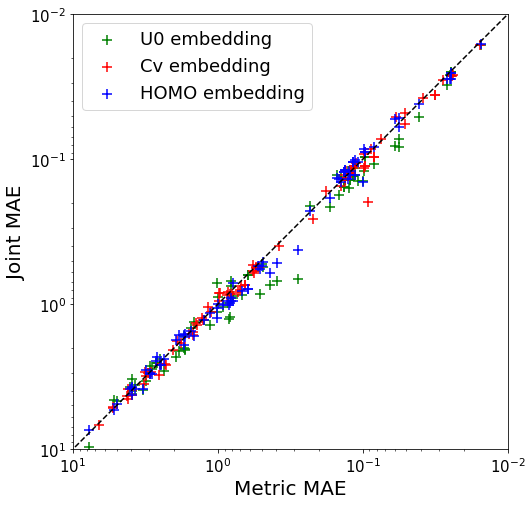

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))

plt.rcParams['font.family'] = 'Arial'

plt.scatter(metric_mae1, joint_mae1, color='green', marker="+", label='U0 embedding', s=100)
plt.scatter(metric_mae2, joint_mae2, color='red', marker="+", label='Cv embedding', s=100)
plt.scatter(metric_mae3, joint_mae3, color='blue',marker="+", label='HOMO embedding', s=100)

plt.xscale('log', basex=10)
plt.yscale('log', basey=10)

x = np.arange(0, 100, 00.1)
y=x
plt.plot(x, y,linestyle="dashed", color="black")


plt.xlim(10, 0.01)
plt.ylim(10, 0.01)

plt.xticks([10, 1, 0.1, 0.01],  fontsize=15)
plt.yticks([10, 1, 0.1, 0.01],  fontsize=15)

plt.xlabel('Metric MAE',fontsize=20)
plt.ylabel('Joint MAE',fontsize=20)

plt.legend(fontsize=18)

plt.axes().set_aspect('equal')
#plt.savefig("rdkit_MAE_inverse.png", format="png", dpi=300)
plt.show()